## Trigger Warning: Sexual Assault, Rape

### All the data here is from individuals who have reported cases, it cannot be an accurate representation of Sexual Assault that occurs everyday.

### Reporting is an individual's choice and is respected.


## <center>DS GA 1007 Final Project</center>
# <center>Analyzing Sexual Assault Crimes in New York City</center>
<center>Abirami R</center>
<center>ar7115</center>

### Main questions:

- Are nightclubs unsafe?
- Is it actually unsafe to go out at night?
- Are certain neighborhoods potentially more prone to crime than others?
- Which age group is most vulnerable?
- How long does it take to report a crime? 
Answered with * next to them

## Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Setting figure size of all figures to read graphs better

In [2]:
sns.set(rc={'figure.figsize':(25,20)})

### Importing the dataset 
Source: https://data.cityofnewyork.us/Public-Safety/Rape-Sex-Crimes-Based-on-NYPD-Complaint-Data-Histo/9inw-asyf 

Explanation of the dataset: https://www.opendatanetwork.com/dataset/data.cityofnewyork.us/5uac-w243 

In [3]:
df_test = pd.read_csv('NYPD_Complaint_Data.csv', low_memory=False)
df = pd.DataFrame(df_test)

Size of the dataset

In [4]:
df.shape

(118218, 35)

### Dropping columns which are not relevant to proving hypothesis

In [5]:
df.drop(['CMPLNT_NUM'], axis = 1, inplace = True)
df.drop(['ADDR_PCT_CD'], axis = 1, inplace = True)
df.drop(['KY_CD'], axis = 1, inplace = True)
df.drop(['PD_CD'], axis = 1, inplace = True)
df.drop(['STATION_NAME'], axis = 1, inplace = True)
df.drop(['TRANSIT_DISTRICT'], axis = 1, inplace = True)
df.drop(['X_COORD_CD'], axis = 1, inplace = True)
df.drop(['Y_COORD_CD'], axis = 1, inplace = True)
df.drop(['JURISDICTION_CODE'], axis = 1, inplace = True)
df.drop(['Latitude'], axis = 1, inplace = True)
df.drop(['Longitude'], axis = 1, inplace = True)
df.drop(['Lat_Lon'], axis = 1, inplace = True)
df.drop(['HOUSING_PSA'], axis = 1, inplace = True)

First 5 rows of all the columns in the dataframe which will be used for analysis

In [6]:
df.head()

CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT CMPLNT_TO_TM      RPT_DT   OFNS_DESC  \
0   09/18/2018     18:30:00   09/18/2018     18:45:00  09/18/2018  SEX CRIMES   
1   07/02/2018     23:20:00   07/02/2018     23:40:00  07/03/2018  SEX CRIMES   
2   02/01/2017     08:00:00          NaN          NaN  10/26/2018  SEX CRIMES   
3   07/13/2018     23:30:00   07/14/2018     04:00:00  07/14/2018        RAPE   
4   02/25/2018     00:01:00   02/25/2018     20:00:00  02/26/2018  SEX CRIMES   

                         PD_DESC CRM_ATPT_CPTD_CD   LAW_CAT_CD        BORO_NM  \
0               SEXUAL ABUSE 3,2        COMPLETED  MISDEMEANOR       BROOKLYN   
1               SEXUAL ABUSE 3,2        COMPLETED  MISDEMEANOR      MANHATTAN   
2  SEXUAL MISCONDUCT,INTERCOURSE        COMPLETED  MISDEMEANOR  STATEN ISLAND   
3                         RAPE 1        COMPLETED       FELONY         QUEENS   
4               SEXUAL ABUSE 3,2        COMPLETED  MISDEMEANOR      MANHATTAN   

   ...           JURIS_DESC PARKS_NM HADEVELOPT SUSP_AGE_GROUP SUSP_RACE  \
0  ...     N.Y. POLICE DEPT      NaN        NaN          25-44     BLACK   
1  ...     N.Y. POLICE DEPT      NaN        NaN        UNKNOWN     BLACK   
2  ...     N.Y. POLICE DEPT      NaN        NaN        UNKNOWN   UNKNOWN   
3  ...     N.Y. POLICE DEPT      NaN        NaN          25-44     WHITE   
4  ...  N.Y. TRANSIT POLICE      NaN        NaN            NaN       NaN   

  SUSP_SEX                PATROL_BORO VIC_AGE_GROUP VIC_RACE VIC_SEX  
0        M    PATROL BORO BKLYN NORTH         18-24    BLACK       F  
1        M      PATROL BORO MAN NORTH         18-24    WHITE       F  
2        U  PATROL BORO STATEN ISLAND           <18    BLACK       F  
3        M   PATROL BORO QUEENS NORTH         25-44    WHITE       F  
4      NaN      PATROL BORO MAN SOUTH         45-64    BLACK       M  

[5 rows x 22 columns]

Understanding datatypes of all the columns in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118218 entries, 0 to 118217
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   CMPLNT_FR_DT       118206 non-null  object
 1   CMPLNT_FR_TM       118218 non-null  object
 2   CMPLNT_TO_DT       89956 non-null   object
 3   CMPLNT_TO_TM       89989 non-null   object
 4   RPT_DT             118218 non-null  object
 5   OFNS_DESC          118218 non-null  object
 6   PD_DESC            118218 non-null  object
 7   CRM_ATPT_CPTD_CD   118218 non-null  object
 8   LAW_CAT_CD         118218 non-null  object
 9   BORO_NM            118154 non-null  object
 10  LOC_OF_OCCUR_DESC  97707 non-null   object
 11  PREM_TYP_DESC      117534 non-null  object
 12  JURIS_DESC         118218 non-null  object
 13  PARKS_NM           758 non-null     object
 14  HADEVELOPT         6511 non-null    object
 15  SUSP_AGE_GROUP     58142 non-null   object
 16  SUSP_RACE          8

### Calculating out the time of day, number of days and hours the sexual assault occured and number of days it took for the victim to report the incident.

In [8]:
new_df = pd.to_datetime(df.CMPLNT_FR_DT.astype(str) + ' ' + df.CMPLNT_FR_TM.astype(str), errors='coerce')
df.insert(2, 'datetime_from', new_df)

In [9]:
new_df = pd.to_datetime(df.CMPLNT_TO_DT.astype(str) + ' ' +df.CMPLNT_TO_TM.astype(str), errors='coerce')
df.insert(2, 'datetime_to', new_df)

In [10]:
df['datetime_to'] = pd.to_datetime(df['datetime_to'])
df['datetime_from'] = pd.to_datetime(df['datetime_from'])
df['days_crime'] =(df.datetime_to - df.datetime_from).astype('timedelta64[D]')
df['hours_crime'] =(df.datetime_to - df.datetime_from).astype('timedelta64[h]')

In [11]:
df['TimeOfDay'] = pd.to_datetime(df.CMPLNT_FR_TM, format='%H:%M:%S')
a = df.assign(dept_session=pd.cut(df.TimeOfDay.dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))
df['TimeOfDay'] = a['dept_session']

In [12]:
df['RPT_DT'] = pd.to_datetime(df['RPT_DT']) 
df['CMPLNT_TO_DT'] = pd.to_datetime(df['CMPLNT_TO_DT'])
df['days_report'] =(df.RPT_DT - df.CMPLNT_TO_DT).astype('timedelta64[D]')

In [13]:
df.head()

CMPLNT_FR_DT CMPLNT_FR_TM         datetime_to       datetime_from  \
0   09/18/2018     18:30:00 2018-09-18 18:45:00 2018-09-18 18:30:00   
1   07/02/2018     23:20:00 2018-07-02 23:40:00 2018-07-02 23:20:00   
2   02/01/2017     08:00:00                 NaT 2017-02-01 08:00:00   
3   07/13/2018     23:30:00 2018-07-14 04:00:00 2018-07-13 23:30:00   
4   02/25/2018     00:01:00 2018-02-25 20:00:00 2018-02-25 00:01:00   

  CMPLNT_TO_DT CMPLNT_TO_TM     RPT_DT   OFNS_DESC  \
0   2018-09-18     18:45:00 2018-09-18  SEX CRIMES   
1   2018-07-02     23:40:00 2018-07-03  SEX CRIMES   
2          NaT          NaN 2018-10-26  SEX CRIMES   
3   2018-07-14     04:00:00 2018-07-14        RAPE   
4   2018-02-25     20:00:00 2018-02-26  SEX CRIMES   

                         PD_DESC CRM_ATPT_CPTD_CD  ... SUSP_RACE SUSP_SEX  \
0               SEXUAL ABUSE 3,2        COMPLETED  ...     BLACK        M   
1               SEXUAL ABUSE 3,2        COMPLETED  ...     BLACK        M   
2  SEXUAL MISCONDUCT,INTERCOURSE        COMPLETED  ...   UNKNOWN        U   
3                         RAPE 1        COMPLETED  ...     WHITE        M   
4               SEXUAL ABUSE 3,2        COMPLETED  ...       NaN      NaN   

                 PATROL_BORO VIC_AGE_GROUP VIC_RACE VIC_SEX days_crime  \
0    PATROL BORO BKLYN NORTH         18-24    BLACK       F        0.0   
1      PATROL BORO MAN NORTH         18-24    WHITE       F        0.0   
2  PATROL BORO STATEN ISLAND           <18    BLACK       F        NaN   
3   PATROL BORO QUEENS NORTH         25-44    WHITE       F        0.0   
4      PATROL BORO MAN SOUTH         45-64    BLACK       M        0.0   

  hours_crime  TimeOfDay days_report  
0         0.0  Afternoon         0.0  
1         0.0    Evening         1.0  
2         NaN    Morning         NaN  
3         4.0    Evening         0.0  
4        19.0        NaN         1.0  

[5 rows x 28 columns]

### Handling NaN values

In [14]:
df['BORO_NM'] = df['BORO_NM'].fillna("UNKNOWN") 

In [15]:
df['LOC_OF_OCCUR_DESC'] = df['LOC_OF_OCCUR_DESC'].fillna("UNKNOWN")

In [16]:
df['PREM_TYP_DESC'] = df['PREM_TYP_DESC'].fillna("UNKNOWN")

In [17]:
df['SUSP_AGE_GROUP'] = df['SUSP_AGE_GROUP'].fillna("OTHER")

In [18]:
df['PATROL_BORO'] = df['PATROL_BORO'].fillna("UNKNOWN")

In [19]:
df['VIC_AGE_GROUP'] = df['VIC_AGE_GROUP'].fillna("MISSING")

In [20]:
df = df.loc[~(df['SUSP_RACE'].isin(['OTHER']) & df.filter(like='Value').eq(0).all(1))]

### Correcting minor errors in the dataset

In [21]:
df['VIC_SEX'].value_counts()

F    98319
M    17649
E     2118
D      129
Name: VIC_SEX, dtype: int64

In [22]:
df['VIC_SEX'] = df['VIC_SEX'].replace(['E', 'D'], ['NB', 'NB'])

In [23]:
df['VIC_SEX'].value_counts()

F     98319
M     17649
NB     2247
Name: VIC_SEX, dtype: int64

In [24]:
df['VIC_RACE'].value_counts()

BLACK                             38657
WHITE HISPANIC                    33840
WHITE                             19526
UNKNOWN                           11969
ASIAN / PACIFIC ISLANDER           7265
BLACK HISPANIC                     6640
AMERICAN INDIAN/ALASKAN NATIVE      316
OTHER                                 2
Name: VIC_RACE, dtype: int64

In [25]:
df['VIC_AGE_GROUP'].value_counts()

<18        56723
25-44      27467
18-24      19367
45-64       5902
MISSING     4821
UNKNOWN     3233
65+          700
-2             1
908            1
-1             1
Name: VIC_AGE_GROUP, dtype: int64

In [26]:
df = df.loc[~(df['VIC_AGE_GROUP'].isin(['-2','908','-1']) & df.filter(like='Value').eq(0).all(1))]

In [27]:
df['VIC_AGE_GROUP'].value_counts()

<18        56723
25-44      27467
18-24      19367
45-64       5902
MISSING     4821
UNKNOWN     3233
65+          700
Name: VIC_AGE_GROUP, dtype: int64

In [28]:
df['PATROL_BORO'].value_counts()

PATROL BORO BRONX            23048
PATROL BORO BKLYN NORTH      18627
PATROL BORO BKLYN SOUTH      17765
PATROL BORO MAN SOUTH        14633
PATROL BORO QUEENS NORTH     14078
PATROL BORO MAN NORTH        13857
PATROL BORO QUEENS SOUTH     12018
PATROL BORO STATEN ISLAND     4171
UNKNOWN                         16
Name: PATROL_BORO, dtype: int64

In [29]:
df['SUSP_SEX'].value_counts()

M    70320
F     6722
U     4790
Name: SUSP_SEX, dtype: int64

In [30]:
df['SUSP_RACE'].value_counts()

BLACK                             29365
WHITE HISPANIC                    19774
UNKNOWN                           14840
WHITE                              8430
BLACK HISPANIC                     5487
ASIAN / PACIFIC ISLANDER           4247
AMERICAN INDIAN/ALASKAN NATIVE      382
Name: SUSP_RACE, dtype: int64

In [31]:
df['SUSP_AGE_GROUP'].value_counts()

OTHER      60074
25-44      23945
UNKNOWN    10902
18-24       9014
45-64       8662
<18         4515
65+         1094
-978           1
2018           1
-941           1
2020           1
-928           1
1017           1
324            1
Name: SUSP_AGE_GROUP, dtype: int64

In [32]:
df = df.loc[~(df['SUSP_AGE_GROUP'].isin(['-978','2018','-941', '2020', '-928', '1017', '324']) & df.filter(like='Value').eq(0).all(1))]

In [33]:
df['SUSP_AGE_GROUP'].value_counts()

OTHER      60074
25-44      23945
UNKNOWN    10902
18-24       9014
45-64       8662
<18         4515
65+         1094
Name: SUSP_AGE_GROUP, dtype: int64

In [34]:
df['JURIS_DESC'].value_counts()

N.Y. POLICE DEPT                     98310
N.Y. HOUSING POLICE                  11102
N.Y. TRANSIT POLICE                   7605
PORT AUTHORITY                         358
OTHER                                  243
DEPT OF CORRECTIONS                    230
HEALTH & HOSP CORP                     125
POLICE DEPT NYC                        110
NYC PARKS                               38
N.Y. STATE POLICE                       19
U.S. PARK POLICE                        14
N.Y. STATE PARKS                        14
LONG ISLAND RAILRD                      10
METRO NORTH                             10
STATN IS RAPID TRANS                     5
NEW YORK CITY SHERIFF OFFICE             4
TRI-BORO BRDG TUNNL                      4
AMTRACK                                  4
NYC DEPT ENVIRONMENTAL PROTECTION        1
Name: JURIS_DESC, dtype: int64

In [35]:
df['PREM_TYP_DESC'].value_counts()

RESIDENCE - APT. HOUSE        45175
RESIDENCE-HOUSE               16453
STREET                        14939
RESIDENCE - PUBLIC HOUSING    10929
TRANSIT - NYC SUBWAY           7511
                              ...  
PHOTO/COPY                        9
DAYCARE FACILITY                  6
ATM                               3
LOAN COMPANY                      2
TRAMWAY                           1
Name: PREM_TYP_DESC, Length: 73, dtype: int64

In [36]:
df['PARKS_NM'].value_counts()

CENTRAL PARK                      77
CONEY ISLAND BEACH & BOARDWALK    38
PROSPECT PARK                     34
FLUSHING MEADOWS CORONA PARK      27
FOREST PARK                       16
                                  ..
FULTON PARK                        1
MSGR. MCGOLRICK PARK               1
STAR SPANGLED PLAYGROUND           1
FRANZ SIGEL PARK                   1
FORT TOTTEN PARK                   1
Name: PARKS_NM, Length: 277, dtype: int64

In [37]:
df['HADEVELOPT'].value_counts()

VAN DYKE I                  145
CASTLE HILL                 129
PINK                        116
LINDEN                      115
INGERSOLL                   113
                           ... 
MACOMBS ROAD                  1
OCEANSIDE-OCEAN BAY APTS      1
JENNINGS STREET               1
BRONX RIVER ADDITION          1
MORRISANIA                    1
Name: HADEVELOPT, Length: 244, dtype: int64

In [38]:
df['LOC_OF_OCCUR_DESC'].value_counts()

INSIDE         85006
UNKNOWN        20510
FRONT OF       10652
REAR OF         1060
OPPOSITE OF      978
Name: LOC_OF_OCCUR_DESC, dtype: int64

In [39]:
df['BORO_NM'].value_counts()

BROOKLYN         36383
MANHATTAN        28530
QUEENS           26020
BRONX            23038
STATEN ISLAND     4171
UNKNOWN             64
Name: BORO_NM, dtype: int64

In [40]:
df['LAW_CAT_CD'].value_counts()

MISDEMEANOR    75794
FELONY         42412
Name: LAW_CAT_CD, dtype: int64

In [41]:
df['CRM_ATPT_CPTD_CD'].value_counts()

COMPLETED    113367
ATTEMPTED      4839
Name: CRM_ATPT_CPTD_CD, dtype: int64

In [42]:
df['OFNS_DESC'].value_counts()

SEX CRIMES    95073
RAPE          23133
Name: OFNS_DESC, dtype: int64

In [43]:
df['PD_DESC'].value_counts()

SEXUAL ABUSE 3,2                  46305
CHILD, ENDANGERING WELFARE        24045
RAPE 1                            15003
SODOMY 1                           6060
SEXUAL ABUSE                       5245
SEXUAL MISCONDUCT,INTERCOURSE      4953
AGGRAVATED SEXUAL ASBUSE           4411
RAPE 3                             3382
RAPE 1,ATTEMPT                     2505
RAPE 2                             2243
OBSCENE MATERIAL - UNDER 17 YE     1761
SODOMY 3                            612
COURSE OF SEXUAL CONDUCT AGAIN      462
SEXUAL MISCONDUCT,DEVIATE           354
SODOMY 2                            343
OBSCENITY 1                         205
SEX CRIMES                          162
OBSCENITY, PERFORMANCE 3            101
OBSCENITY, MATERIAL 3                32
INCEST                               10
FAC. SEXUAL OFFENSE W/CONTROLL        5
INCEST 3                              3
SODOMY,CONSENSUAL                     3
ABORTIONAL ARTICLES,ISSUING           1
Name: PD_DESC, dtype: int64

In [44]:
df["days_crime"].value_counts()

0.0       70933
1.0        1773
30.0        777
2.0         748
29.0        520
          ...  
2707.0        1
1724.0        1
2939.0        1
4130.0        1
3386.0        1
Name: days_crime, Length: 1725, dtype: int64

## Graphical Analysis

Extracting year from the Complaint From Date column (CMPLNT_FR_DT) to understand the number of sexual assault crimes that happened over the years

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, '1919.0'),
  Text(1, 0, '1955.0'),
  Text(2, 0, '1960.0'),
  Text(3, 0, '1965.0'),
  Text(4, 0, '1966.0'),
  Text(5, 0, '1967.0'),
  Text(6, 0, '1968.0'),
  Text(7, 0, '1969.0'),
  Text(8, 0, '1970.0'),
  Text(9, 0, '1971.0'),
  Text(10, 0, '1972.0'),
  Text(11, 0, '1973.0'),
  Text(12, 0, '1974.0'),
  Text(13, 0, '1975.0'),
  Text(14, 0, '1976.0'),
  Text(15, 0, '1977.0'),
  Text(16, 0, '1978.0'),
  Text(17, 0, '1979.0'),
  Text(18, 0, '1980.0'),
  Text(19, 0, '1981.0'),
  Text(20, 0, '1982.0'),
  Text(21, 0, '1983.0'),
  Text(22, 0, '1984.0'),
  Text(23, 0, '1985.0'),
  Text(24, 0, '1986.0'),
  Text(25, 0, '1987.0'),
  Text(26, 0, '1988.0'),
  Text(27, 0, '1989.0'),
  Text(28, 0, '1990.0'),
  Text(29, 

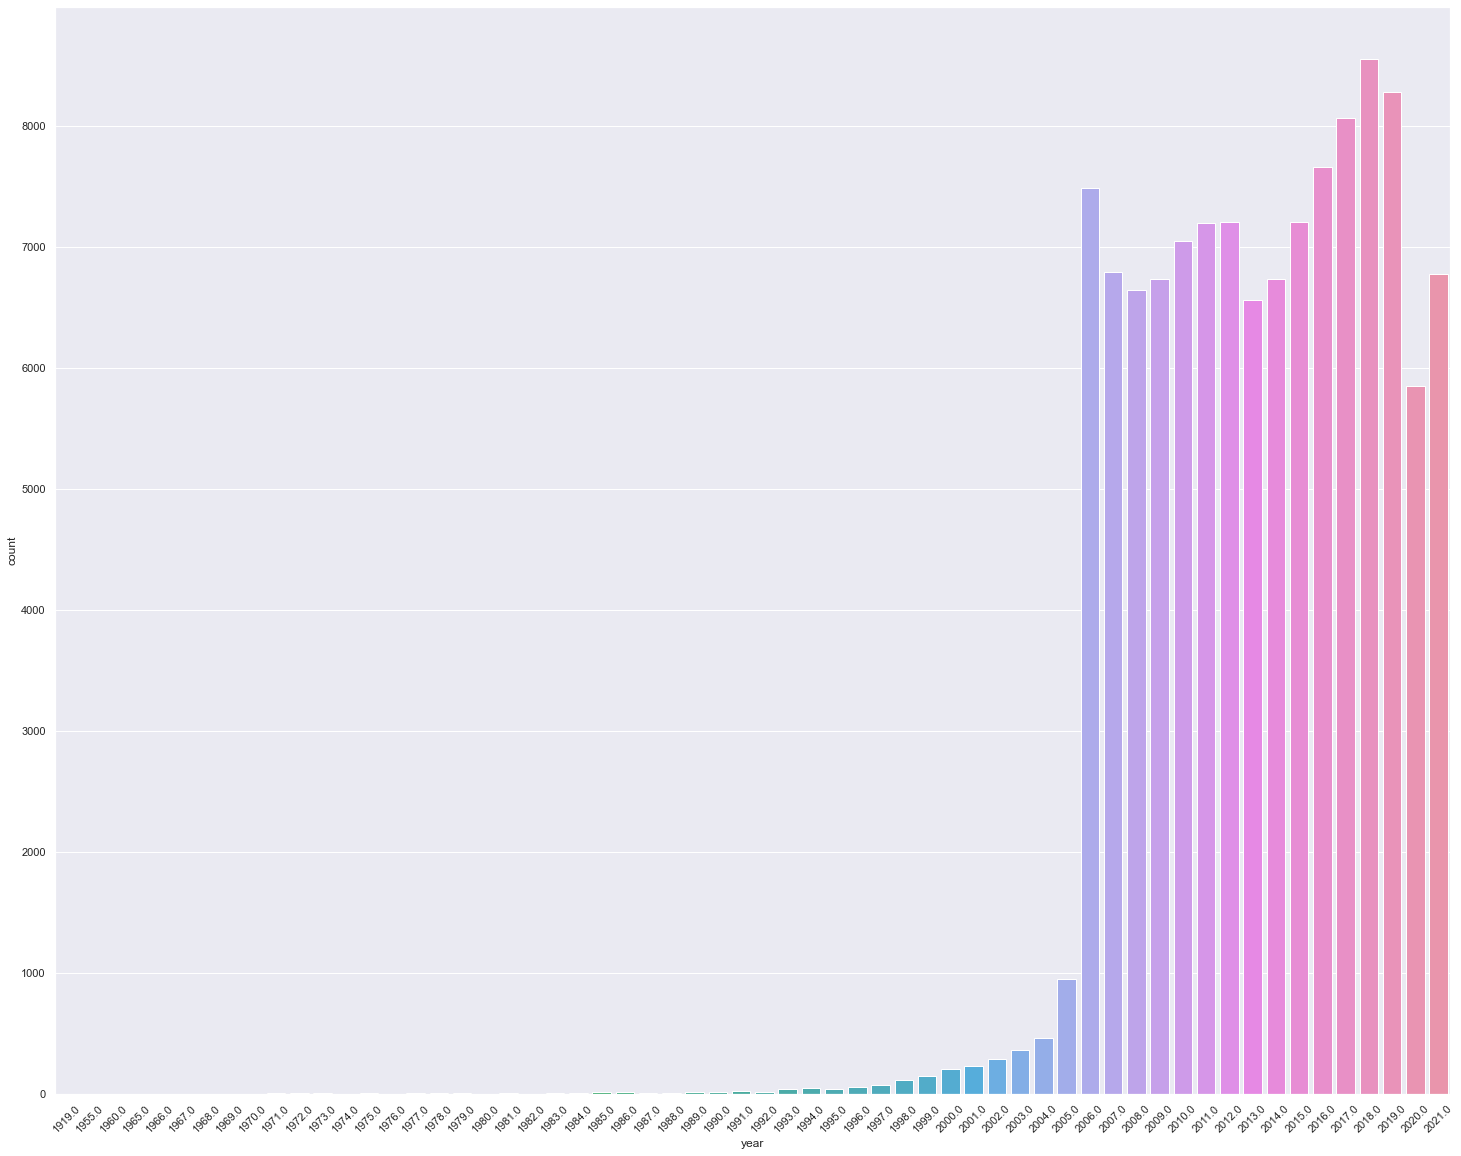

In [45]:
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors = 'coerce')
df['year'] = df['CMPLNT_FR_DT'].dt.year
sns.countplot(x='year', data=df)
plt.xticks(rotation=45)

The highest number of incidents occuring were in 2018. The sudden increase and decrease of the number of corresponds to some major cases being reported in the media and thus spreading awareness on reporting.

Corresponding to the "Me Too" movement on MySpace starting in 2006, there is a sudden spike in awareness.

<AxesSubplot:xlabel='month', ylabel='count'>

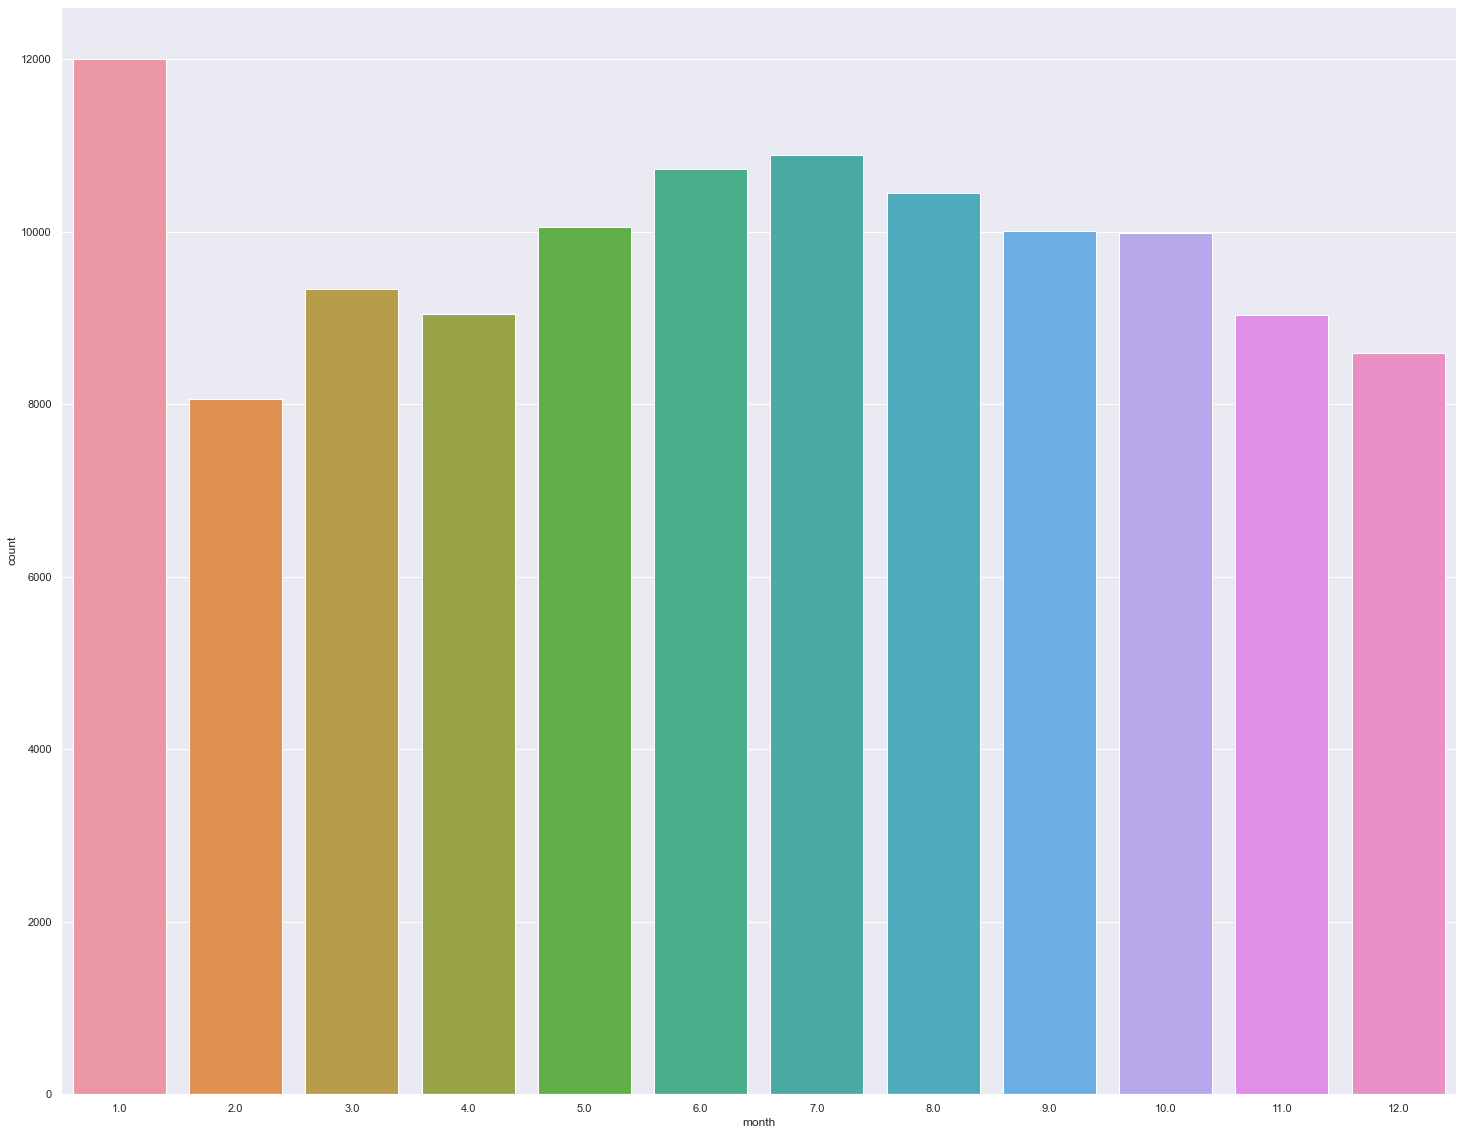

In [46]:
df['month'] = df['CMPLNT_FR_DT'].dt.month
sns.countplot(x='month', data=df)

The month where most sexual harassment crimes begin is in January followed by August.

<AxesSubplot:xlabel='year', ylabel='count'>

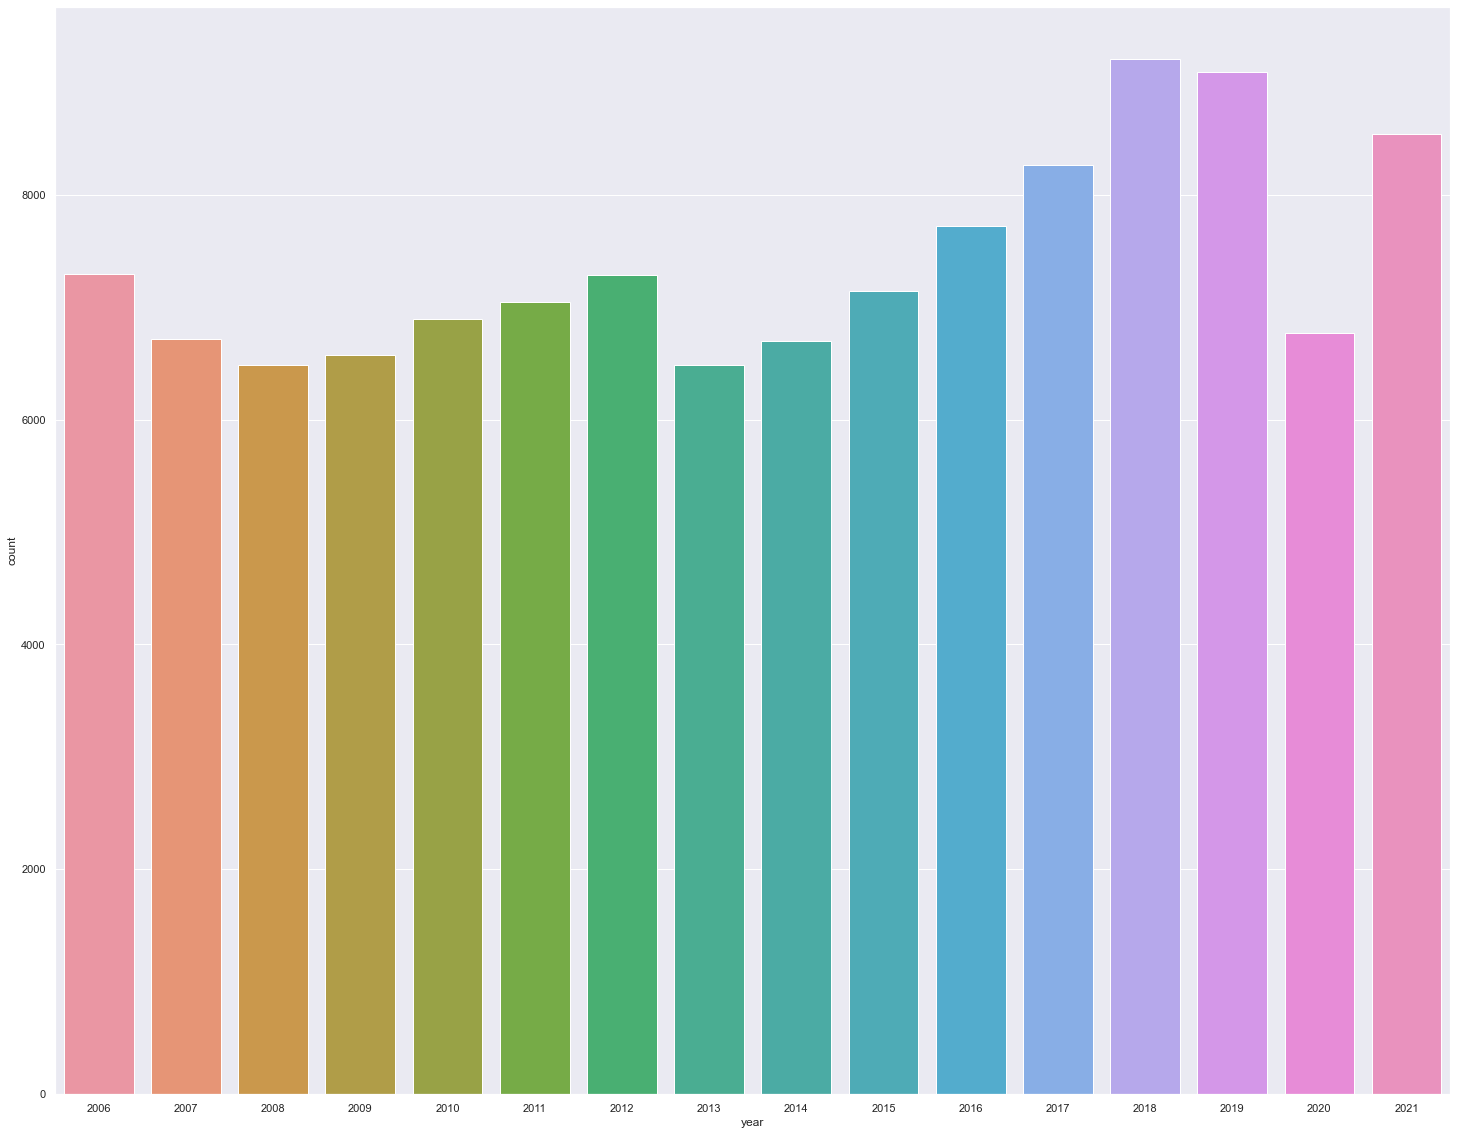

In [47]:
df['RPT_DT'] = pd.to_datetime(df['RPT_DT'], errors = 'coerce')
df['year'] = df['RPT_DT'].dt.year
sns.countplot(x='year', data=df)

Reported years start from 2006, there is no data available for reports before that. The year where maximum cases were reported was in 2018.

<AxesSubplot:xlabel='TimeOfDay', ylabel='count'>

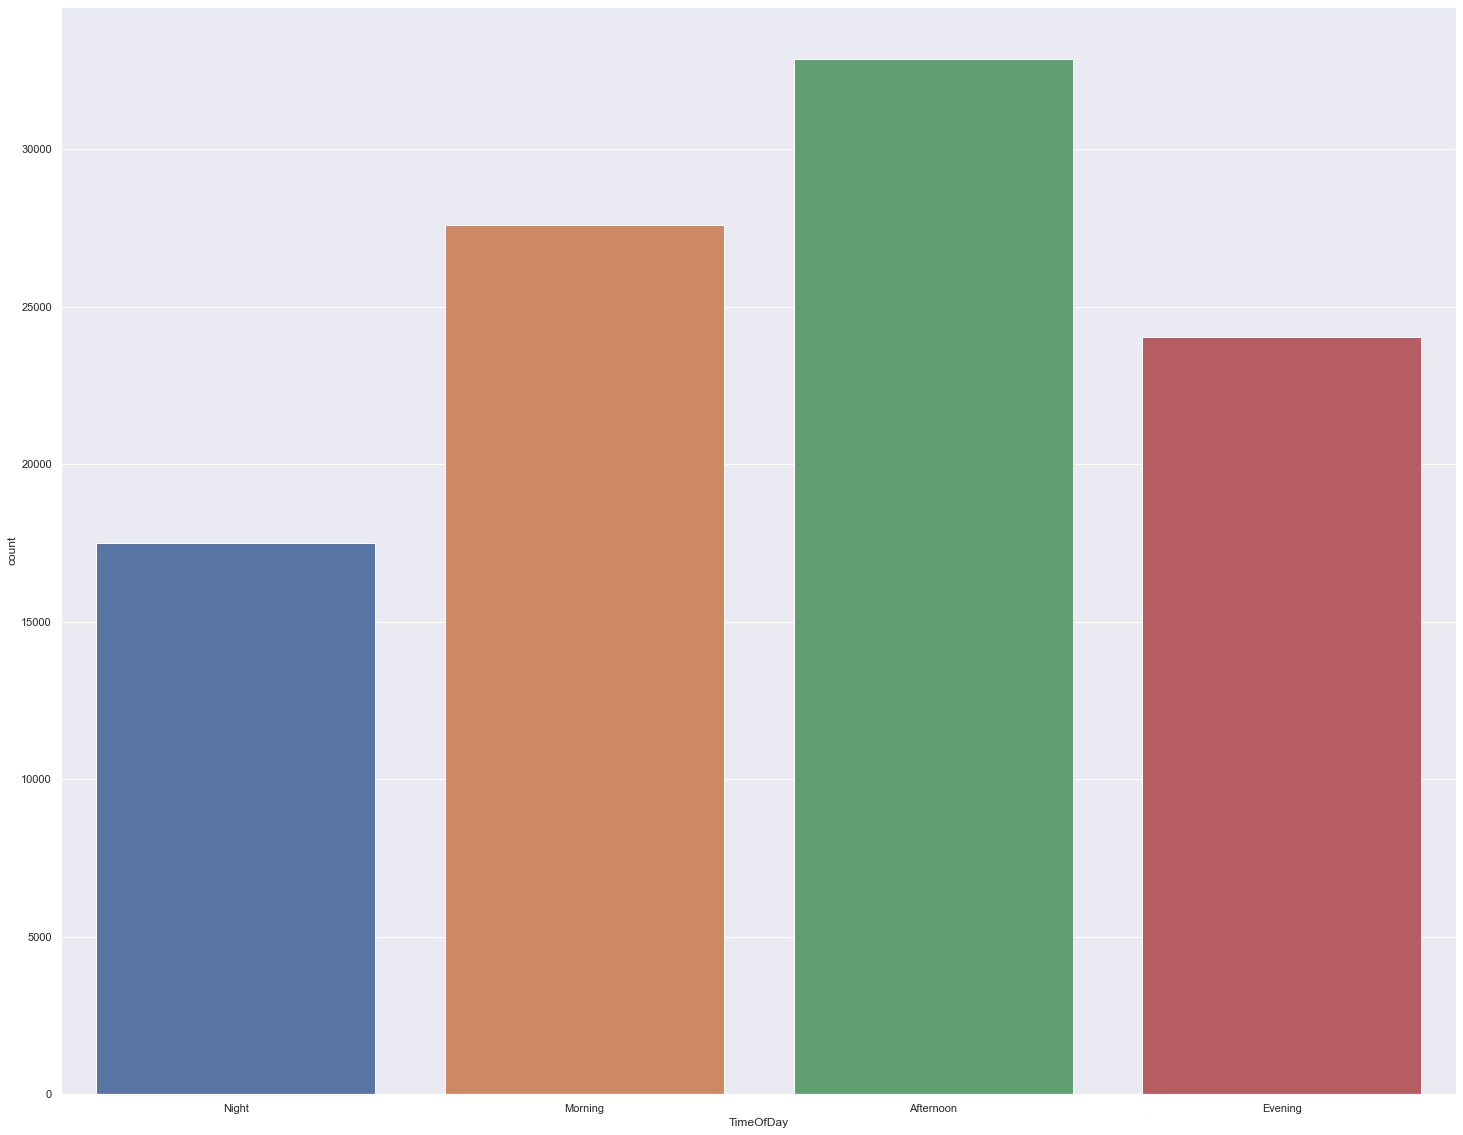

In [48]:
sns.countplot(x=df["TimeOfDay"])

#### Most sexual assault crimes take place in the afternoon, followed by morning hours. Night seems to be the safest. *

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'PATROL BORO BKLYN NORTH'),
  Text(1, 0, 'PATROL BORO MAN NORTH'),
  Text(2, 0, 'PATROL BORO STATEN ISLAND'),
  Text(3, 0, 'PATROL BORO QUEENS NORTH'),
  Text(4, 0, 'PATROL BORO MAN SOUTH'),
  Text(5, 0, 'PATROL BORO BRONX'),
  Text(6, 0, 'PATROL BORO BKLYN SOUTH'),
  Text(7, 0, 'PATROL BORO QUEENS SOUTH'),
  Text(8, 0, 'UNKNOWN')])

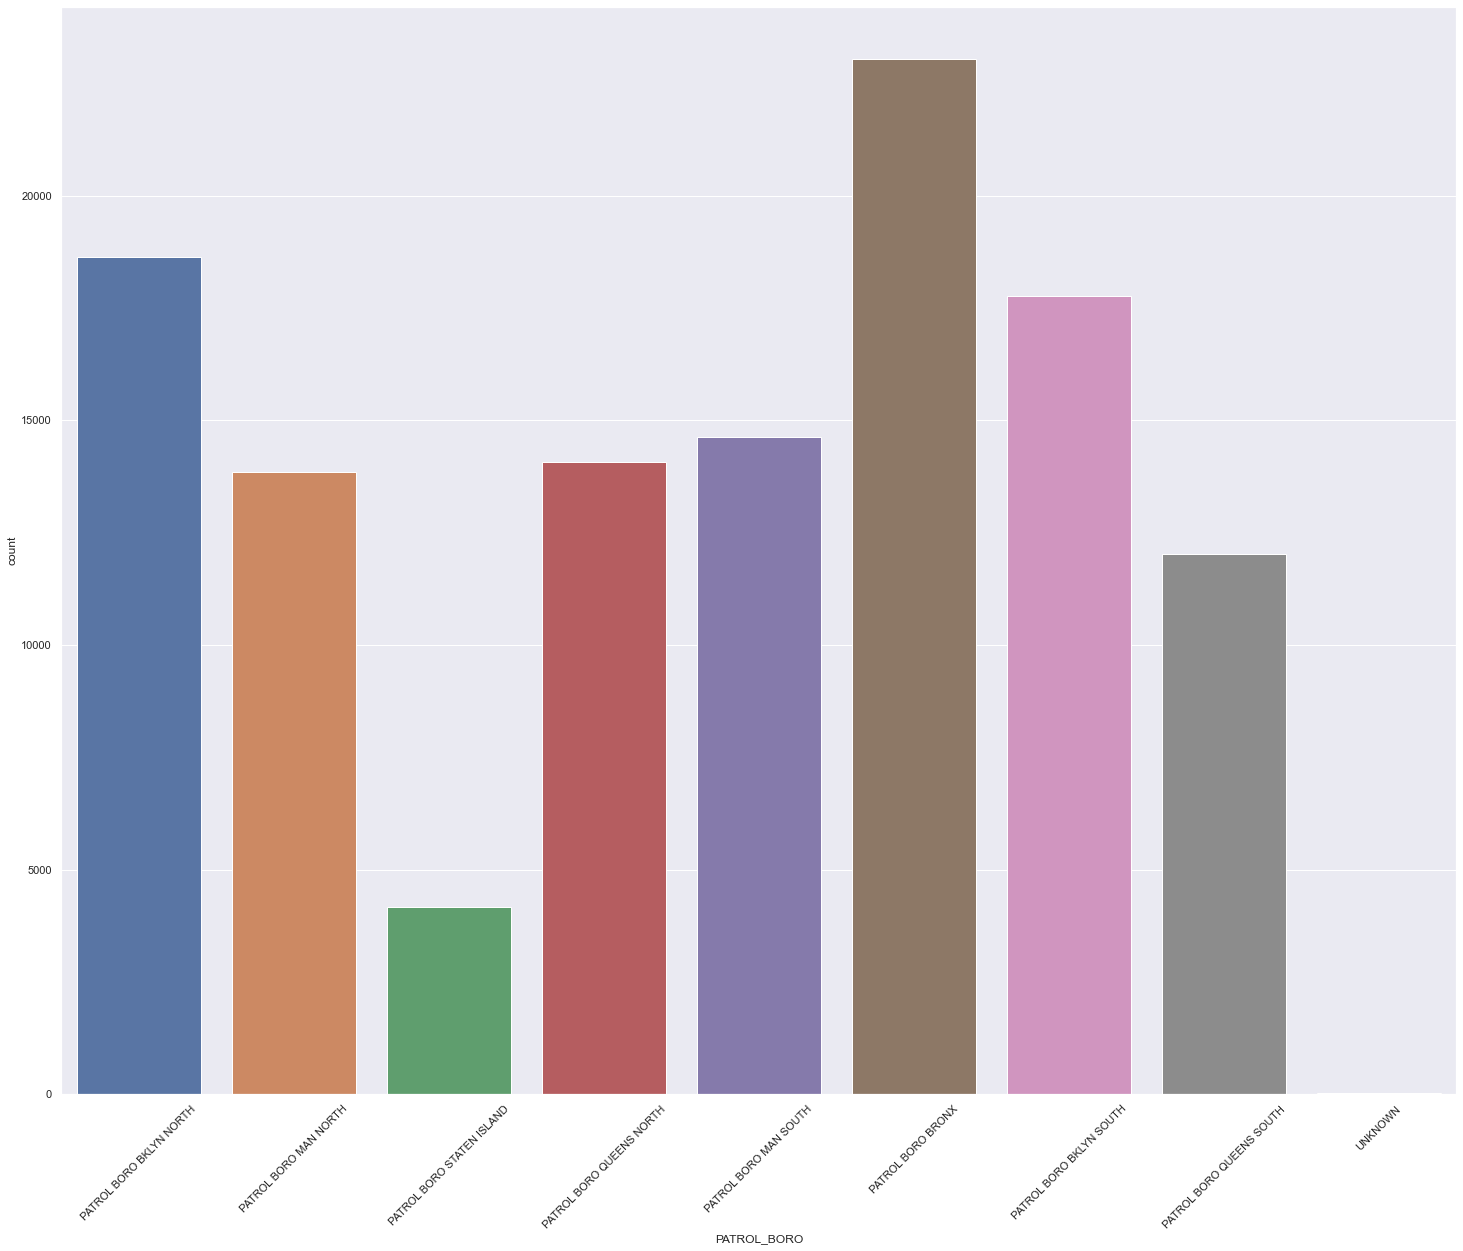

In [49]:
sns.countplot(x=df["PATROL_BORO"])
plt.xticks(rotation=45)

The maximum number of sexual harassment crimes have occured in the Bronx, followed by Brooklyn North. 

<AxesSubplot:xlabel='VIC_AGE_GROUP', ylabel='count'>

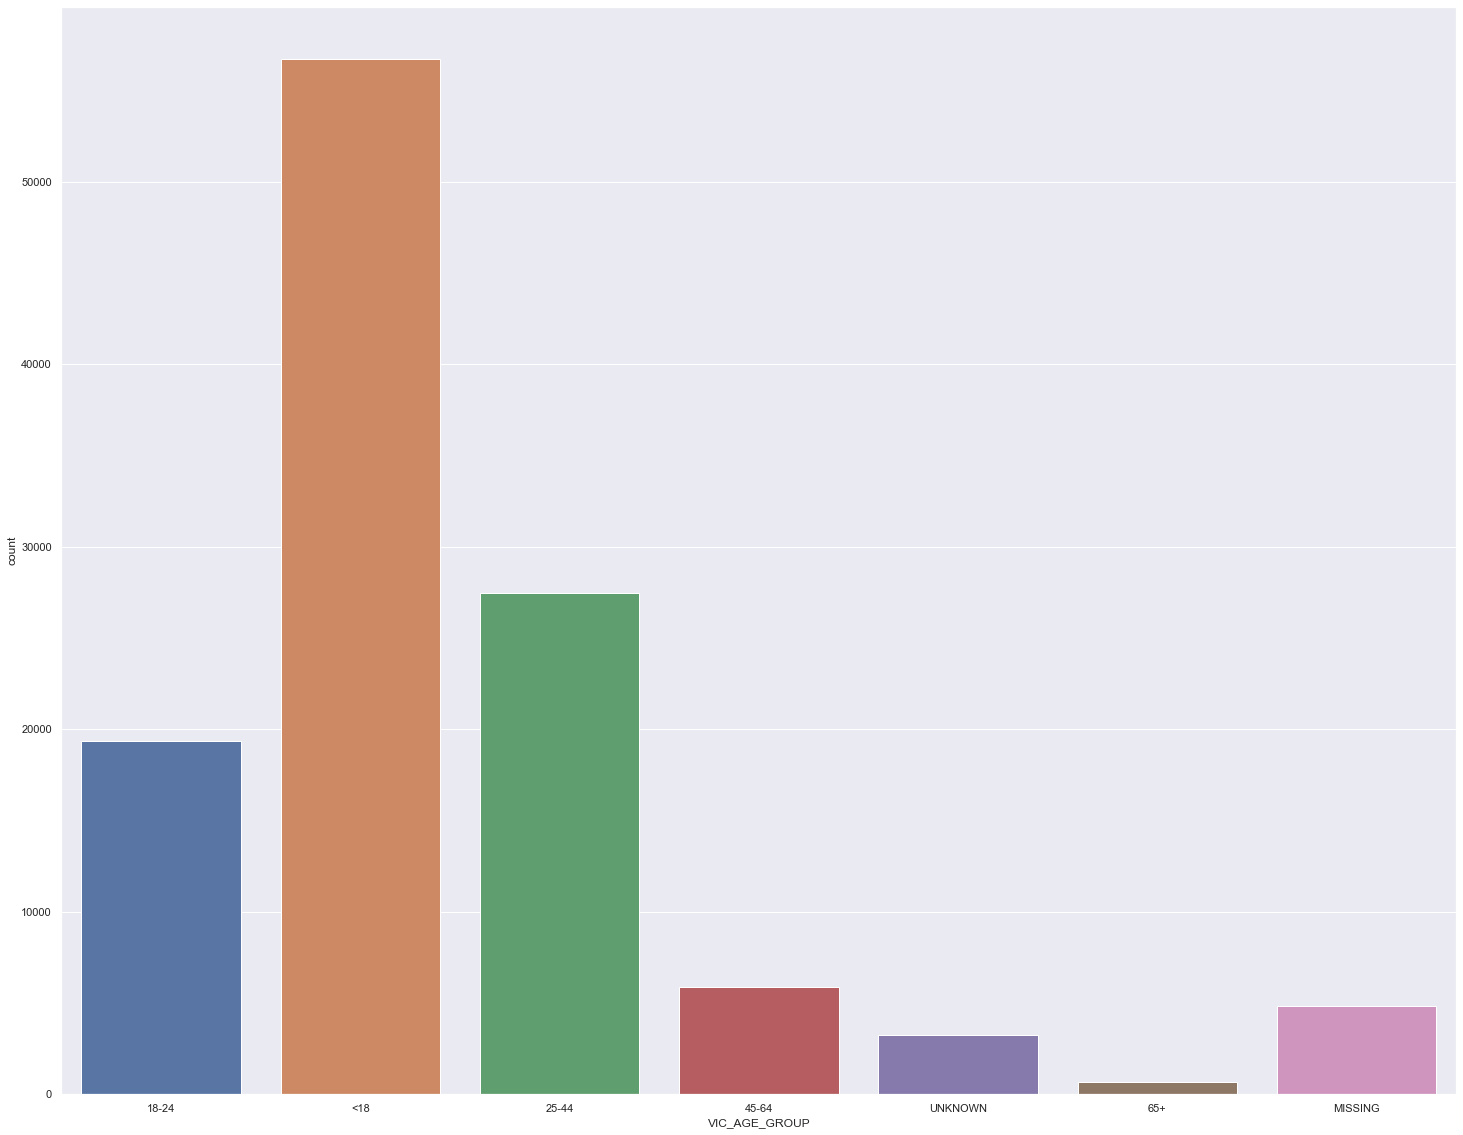

In [50]:
sns.countplot(x=df["VIC_AGE_GROUP"])

The age group most vulnerable are less than 18 years of age, which is significantly higher than the number of individuals between the ages 24 and 44.

<AxesSubplot:xlabel='VIC_SEX', ylabel='count'>

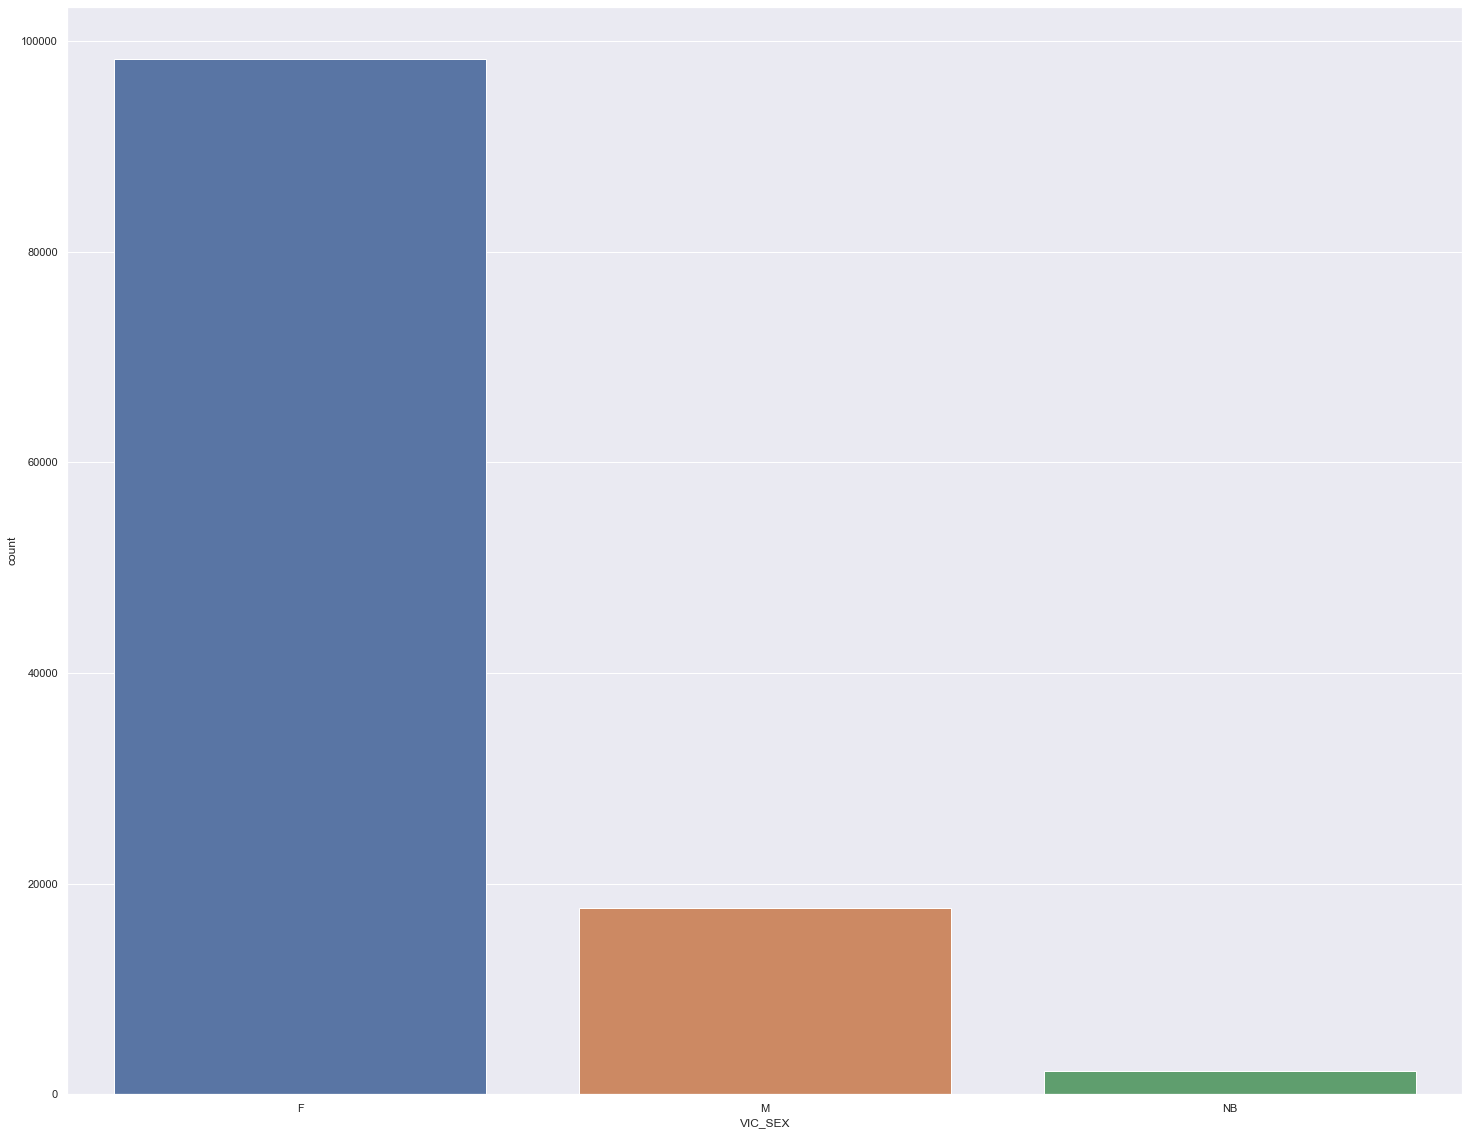

In [51]:
sns.countplot(x=df["VIC_SEX"])

The most vulnerable sex is female.

<AxesSubplot:xlabel='OFNS_DESC', ylabel='count'>

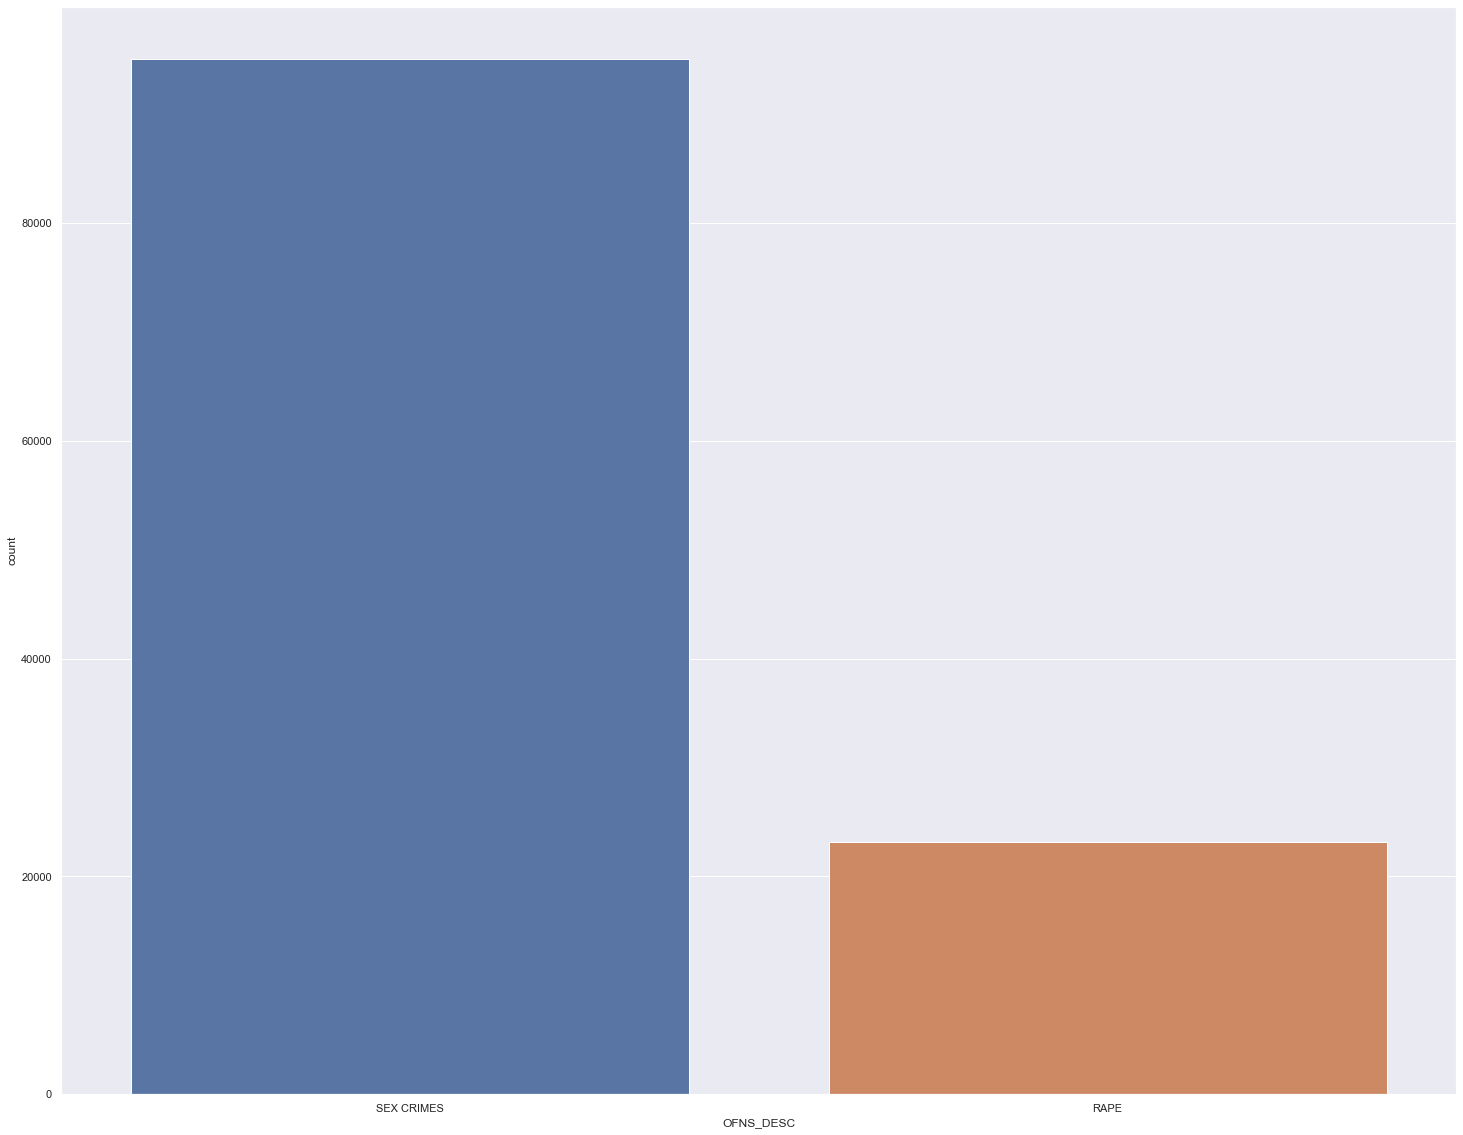

In [52]:
sns.countplot(x=df["OFNS_DESC"])

Most of the offences are categorized as sex crimes compared to rapes.

<AxesSubplot:xlabel='SUSP_SEX', ylabel='count'>

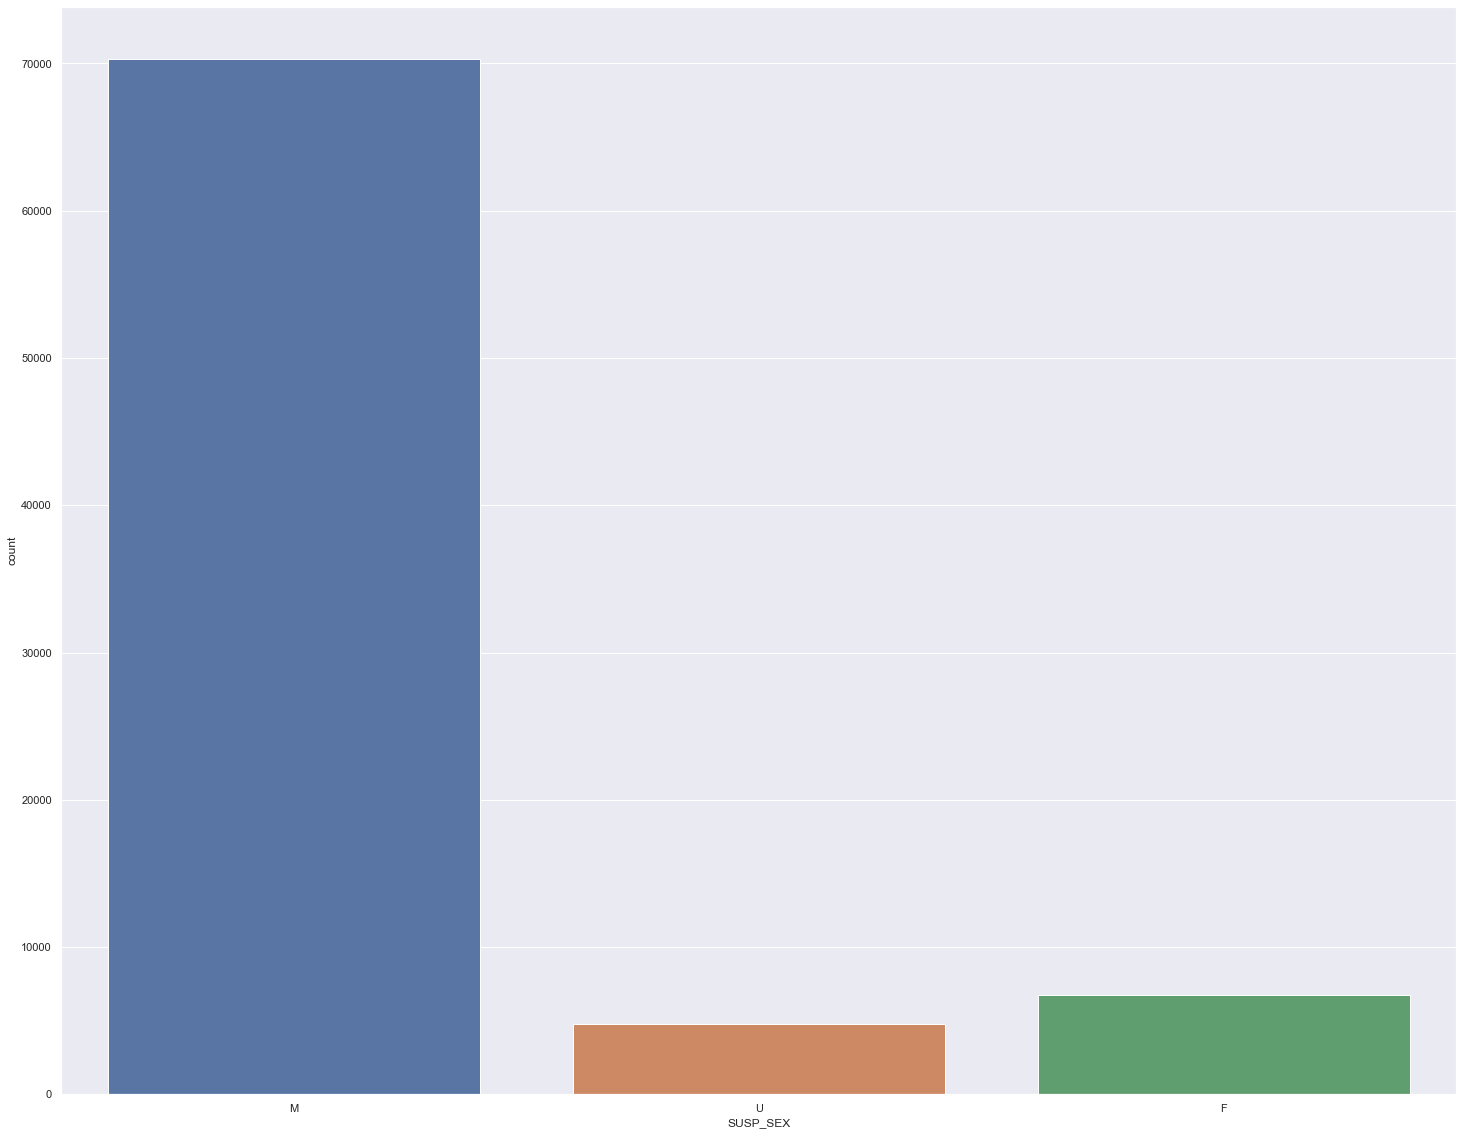

In [53]:
sns.countplot(x=df["SUSP_SEX"])

The suspects are mostly identified as male.

<AxesSubplot:xlabel='SUSP_RACE', ylabel='count'>

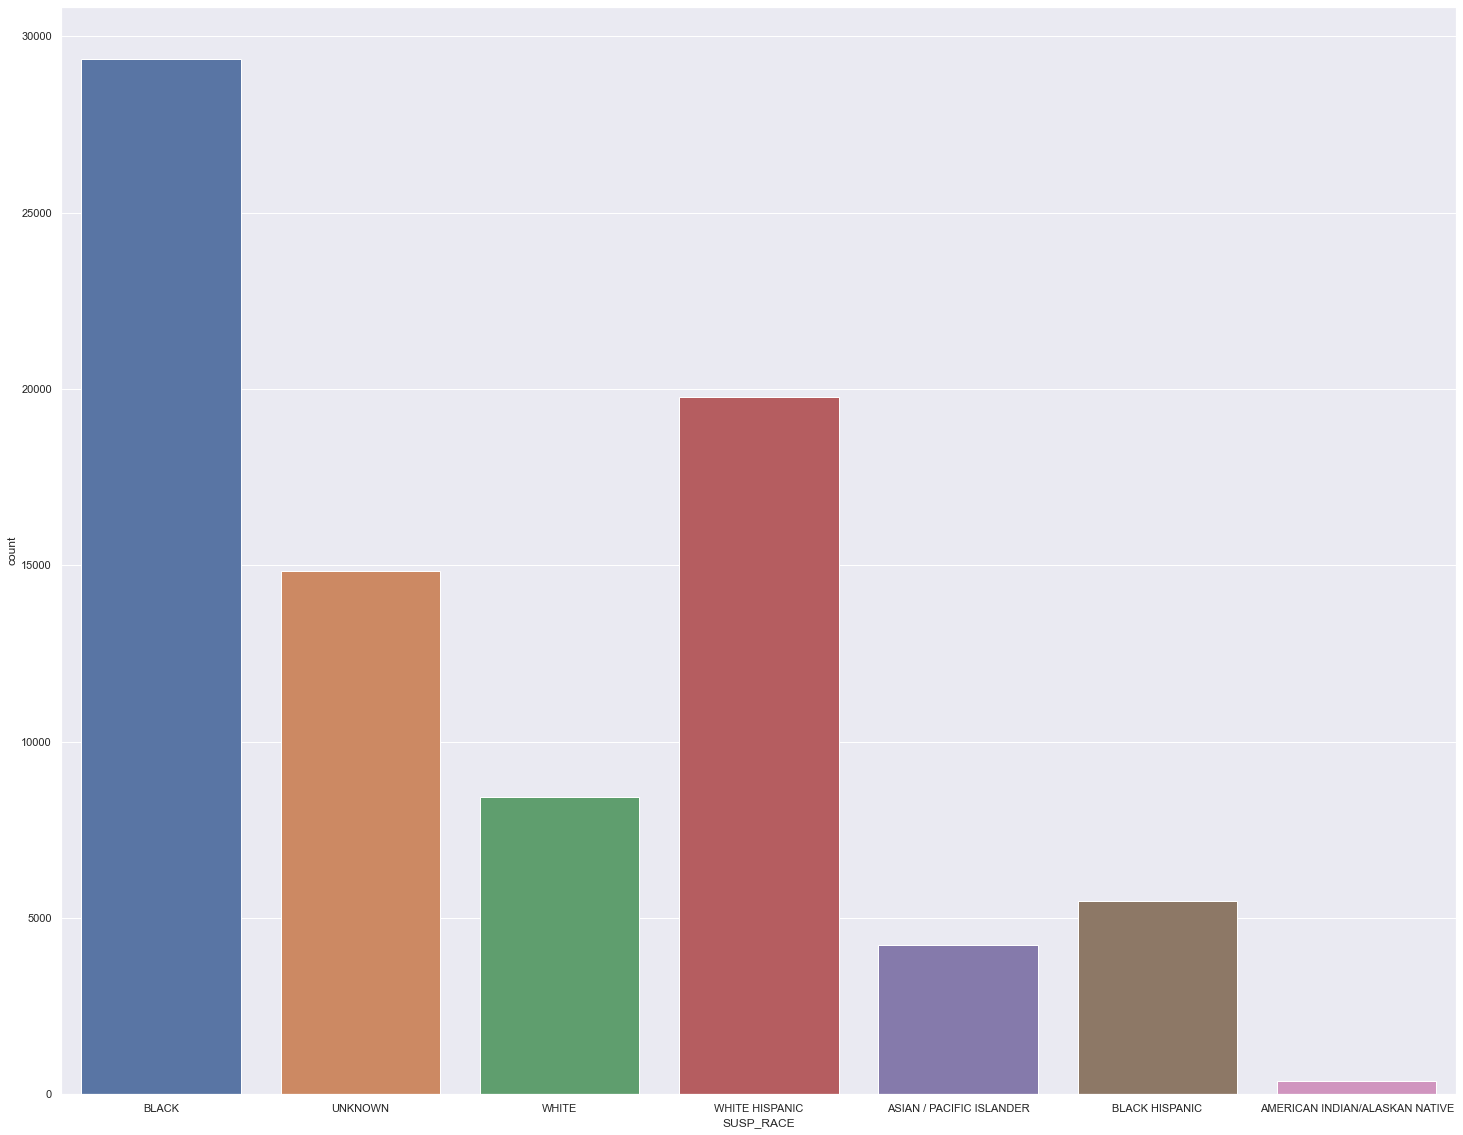

In [54]:
sns.countplot(x=df["SUSP_RACE"])

Most of the suspects have been categorized as Black, followed by White Hispanic.

<AxesSubplot:xlabel='SUSP_AGE_GROUP', ylabel='count'>

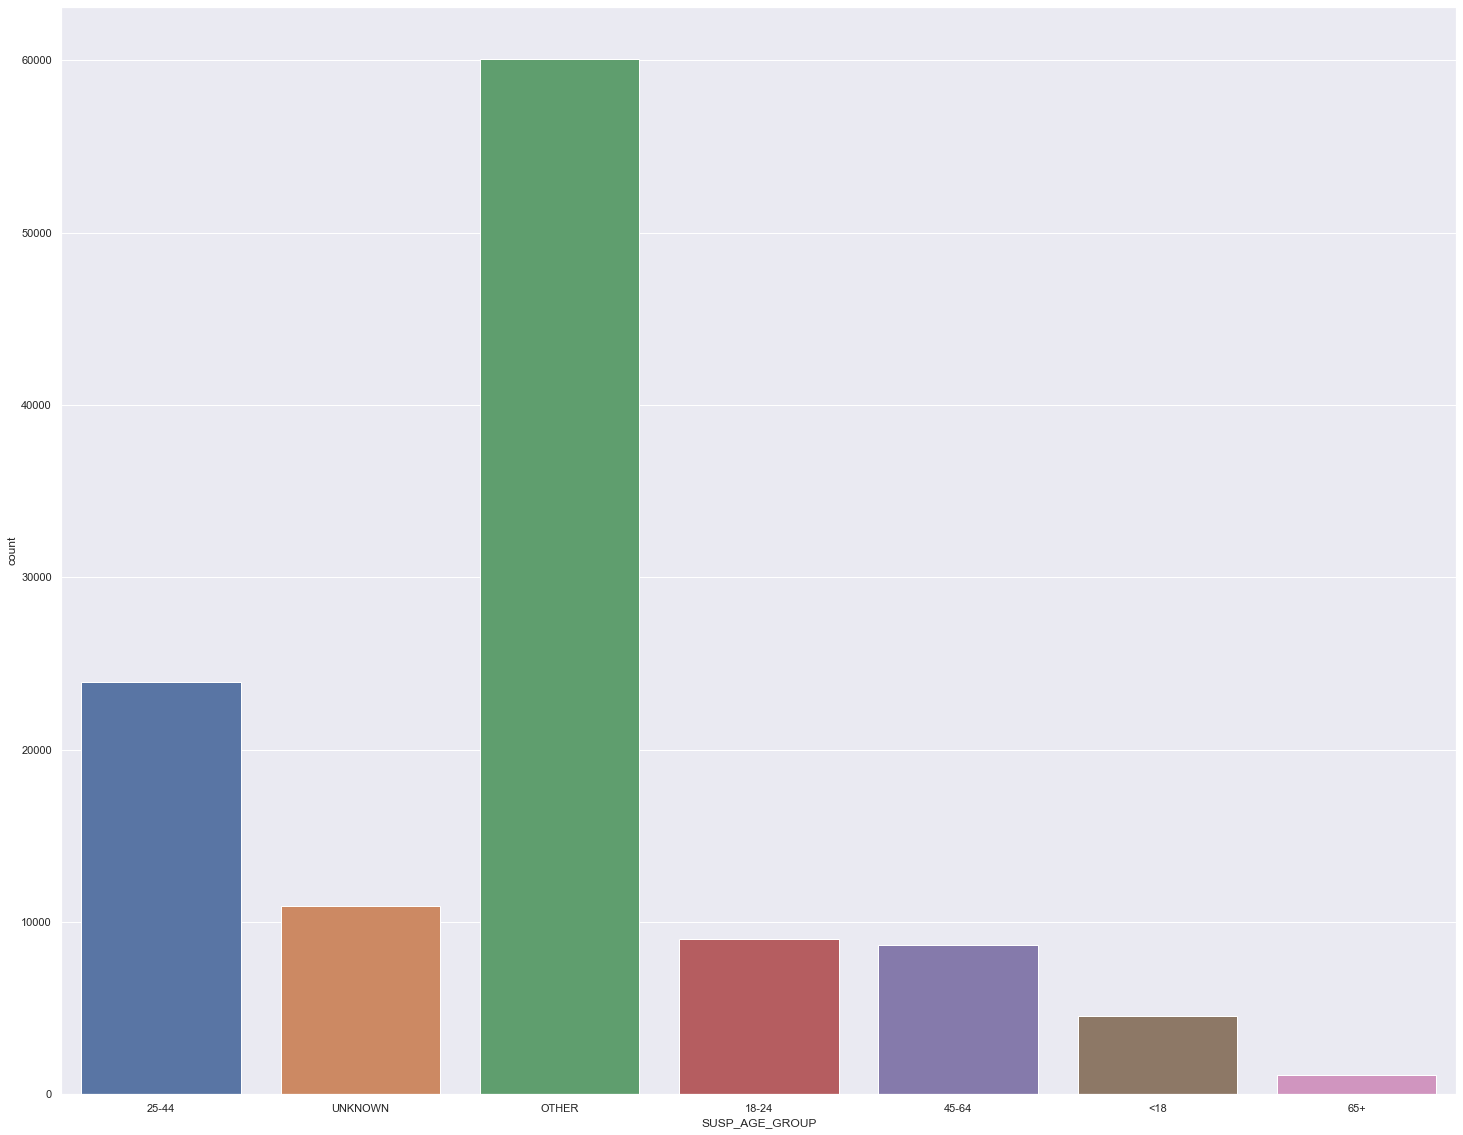

In [55]:
sns.countplot(x=df["SUSP_AGE_GROUP"])

The suspect age group has mostly been unidentifiable. From the data reported accurately, the age group is between 25 and 44.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'N.Y. POLICE DEPT'),
  Text(1, 0, 'N.Y. TRANSIT POLICE'),
  Text(2, 0, 'N.Y. HOUSING POLICE'),
  Text(3, 0, 'PORT AUTHORITY'),
  Text(4, 0, 'HEALTH & HOSP CORP'),
  Text(5, 0, 'NEW YORK CITY SHERIFF OFFICE'),
  Text(6, 0, 'OTHER'),
  Text(7, 0, 'DEPT OF CORRECTIONS'),
  Text(8, 0, 'LONG ISLAND RAILRD'),
  Text(9, 0, 'NYC PARKS'),
  Text(10, 0, 'POLICE DEPT NYC'),
  Text(11, 0, 'METRO NORTH'),
  Text(12, 0, 'N.Y. STATE POLICE'),
  Text(13, 0, 'U.S. PARK POLICE'),
  Text(14, 0, 'STATN IS RAPID TRANS'),
  Text(15, 0, 'N.Y. STATE PARKS'),
  Text(16, 0, 'TRI-BORO BRDG TUNNL'),
  Text(17, 0, 'AMTRACK'),
  Text(18, 0, 'NYC DEPT ENVIRONMENTAL PROTECTION')])

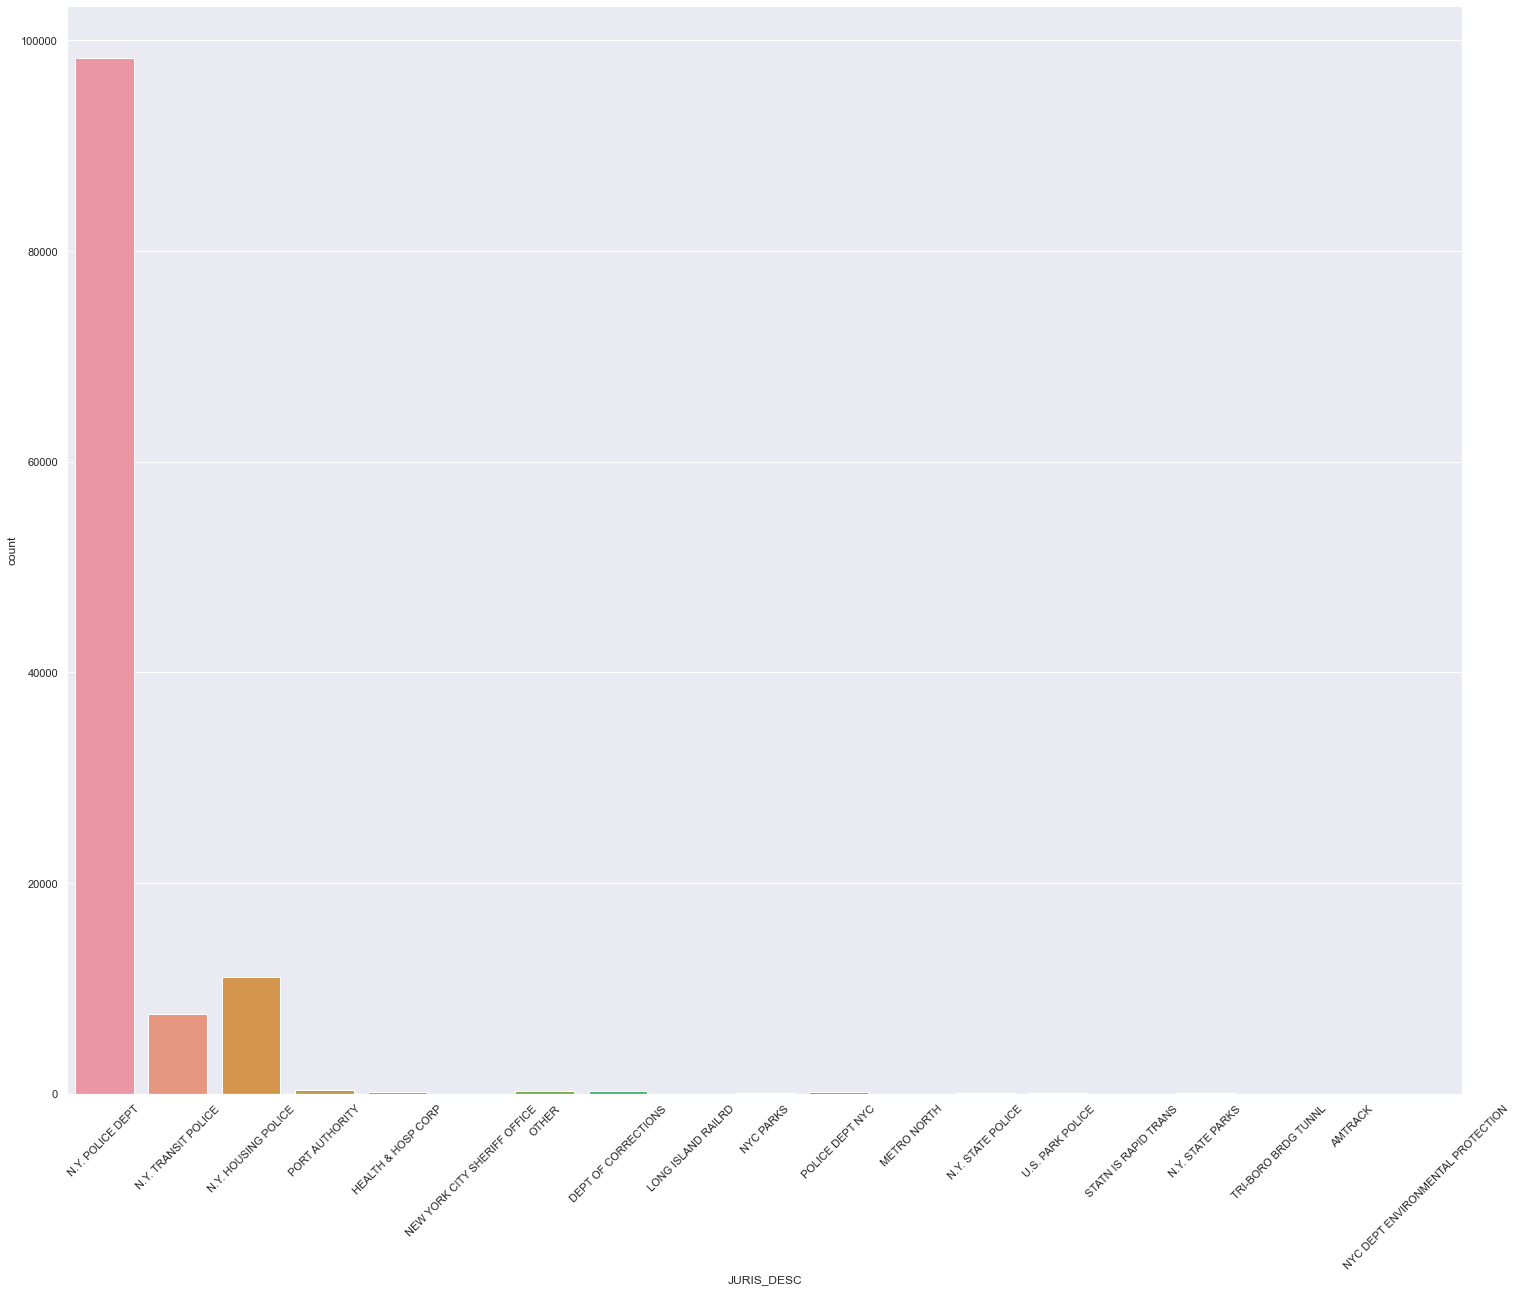

In [56]:
sns.countplot(x=df["JURIS_DESC"])
plt.xticks(rotation=45)

Most reports are under NYPD, which is significantly higher than the others.

<AxesSubplot:xlabel='BORO_NM', ylabel='count'>

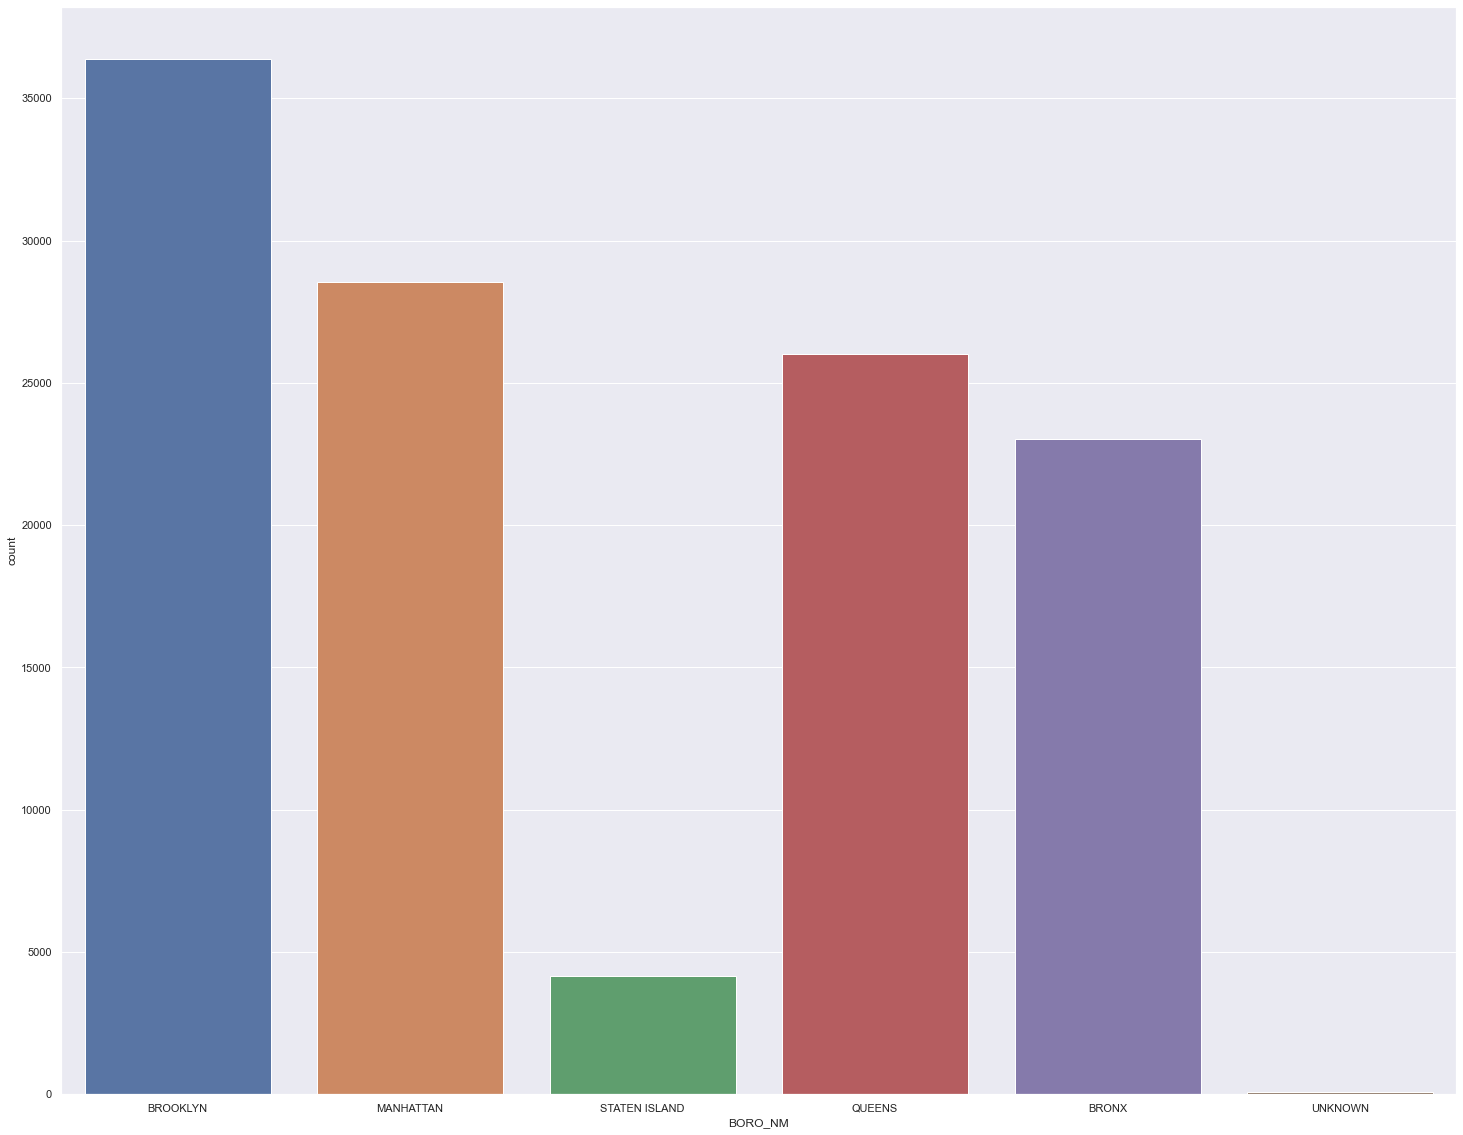

In [57]:
sns.countplot(x=df["BORO_NM"])

#### Most incidents have occured in Brooklyn, followed by Manhattan and Queens. *

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'SEXUAL ABUSE 3,2'),
  Text(1, 0, 'SEXUAL MISCONDUCT,INTERCOURSE'),
  Text(2, 0, 'RAPE 1'),
  Text(3, 0, 'CHILD, ENDANGERING WELFARE'),
  Text(4, 0, 'RAPE 1,ATTEMPT'),
  Text(5, 0, 'RAPE 2'),
  Text(6, 0, 'SEXUAL ABUSE'),
  Text(7, 0, 'RAPE 3'),
  Text(8, 0, 'AGGRAVATED SEXUAL ASBUSE'),
  Text(9, 0, 'SODOMY 1'),
  Text(10, 0, 'OBSCENE MATERIAL - UNDER 17 YE'),
  Text(11, 0, 'SODOMY 3'),
  Text(12, 0, 'SEXUAL MISCONDUCT,DEVIATE'),
  Text(13, 0, 'COURSE OF SEXUAL CONDUCT AGAIN'),
  Text(14, 0, 'SODOMY 2'),
  Text(15, 0, 'SEX CRIMES'),
  Text(16, 0, 'OBSCENITY, PERFORMANCE 3'),
  Text(17, 0, 'OBSCENITY 1'),
  Text(18, 0, 'OBSCENITY, MATERIAL 3'),
  Text(19, 0, 'INCEST'),
  Text(20, 0, 'FAC. SEXUAL OFFENSE W/CONTROLL'),
  Text(21, 0, 'INCEST 3'),
  Text(22, 0, 'SODOMY,CONSENSUAL'),
  Text(23, 0, 'ABORTIONAL ARTICLES,ISSUING')])

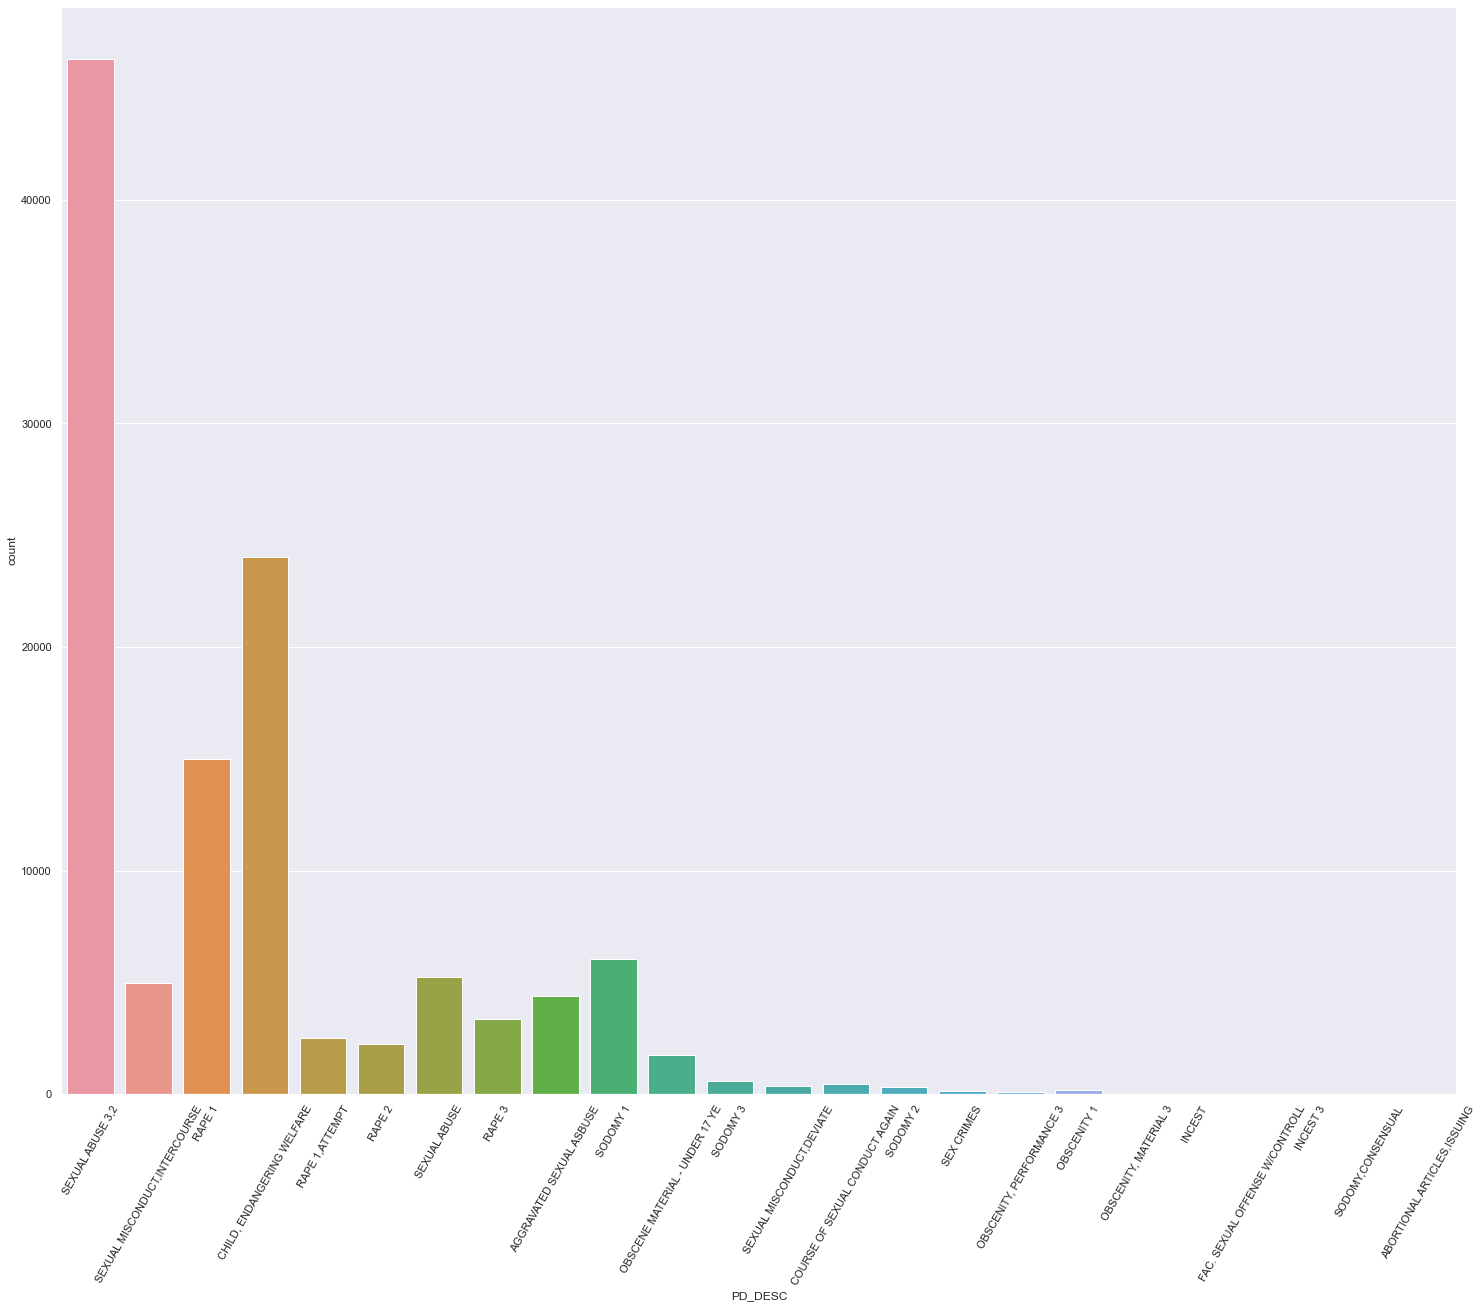

In [58]:
sns.countplot(x=df["PD_DESC"])
plt.xticks(rotation=60)

Internal classification corresponding with PD code shows that the highest number of crimes are classified as Sexual Abuse 3,2 which is significantly higher than all the other parameters, followed by Rape 1.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'RESIDENCE - APT. HOUSE'),
  Text(1, 0, 'RESIDENCE-HOUSE'),
  Text(2, 0, 'STREET'),
  Text(3, 0, 'RESIDENCE - PUBLIC HOUSING'),
  Text(4, 0, 'TRANSIT - NYC SUBWAY'),
  Text(5, 0, 'OTHER'),
  Text(6, 0, 'PUBLIC SCHOOL'),
  Text(7, 0, 'HOTEL/MOTEL'),
  Text(8, 0, 'PARK/PLAYGROUND'),
  Text(9, 0, 'HOSPITAL')])

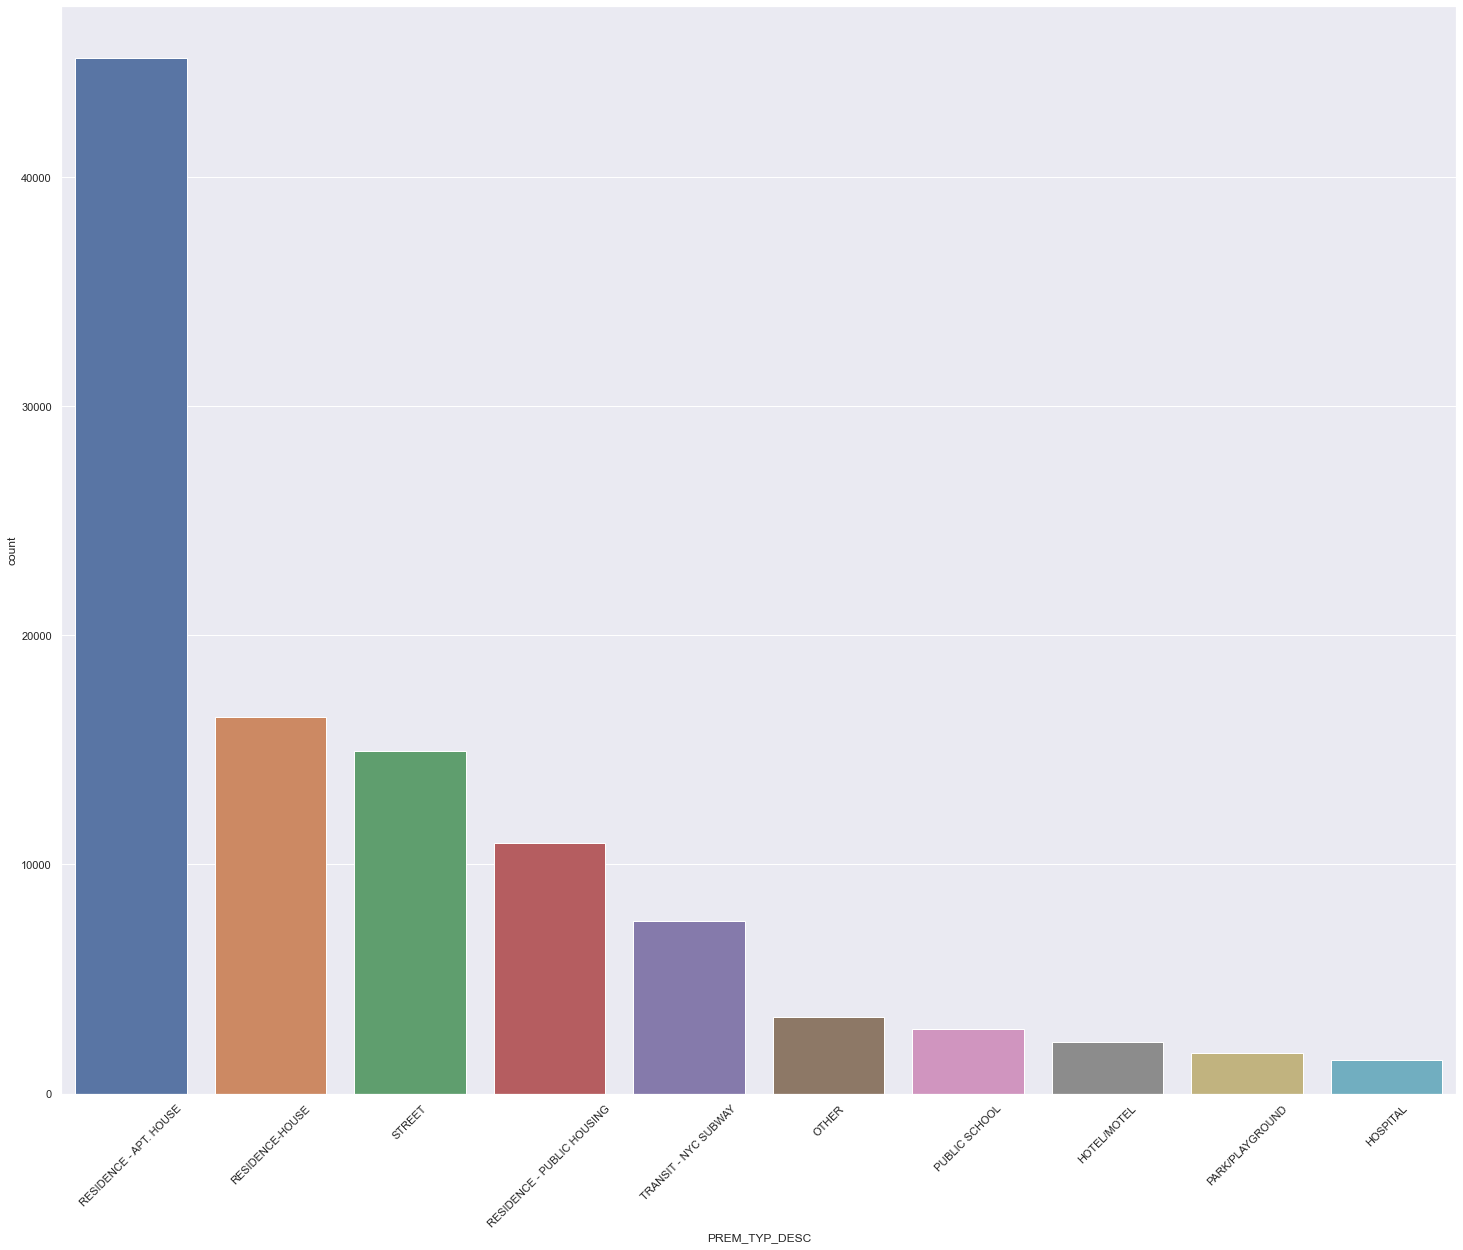

In [59]:
sns.countplot(x=df["PREM_TYP_DESC"], order=pd.value_counts(df["PREM_TYP_DESC"]).iloc[:10].index)
plt.xticks(rotation=45)

#### The location of most harassments happens in apartments, followed by individual homes and streets. *

<AxesSubplot:xlabel='CRM_ATPT_CPTD_CD', ylabel='count'>

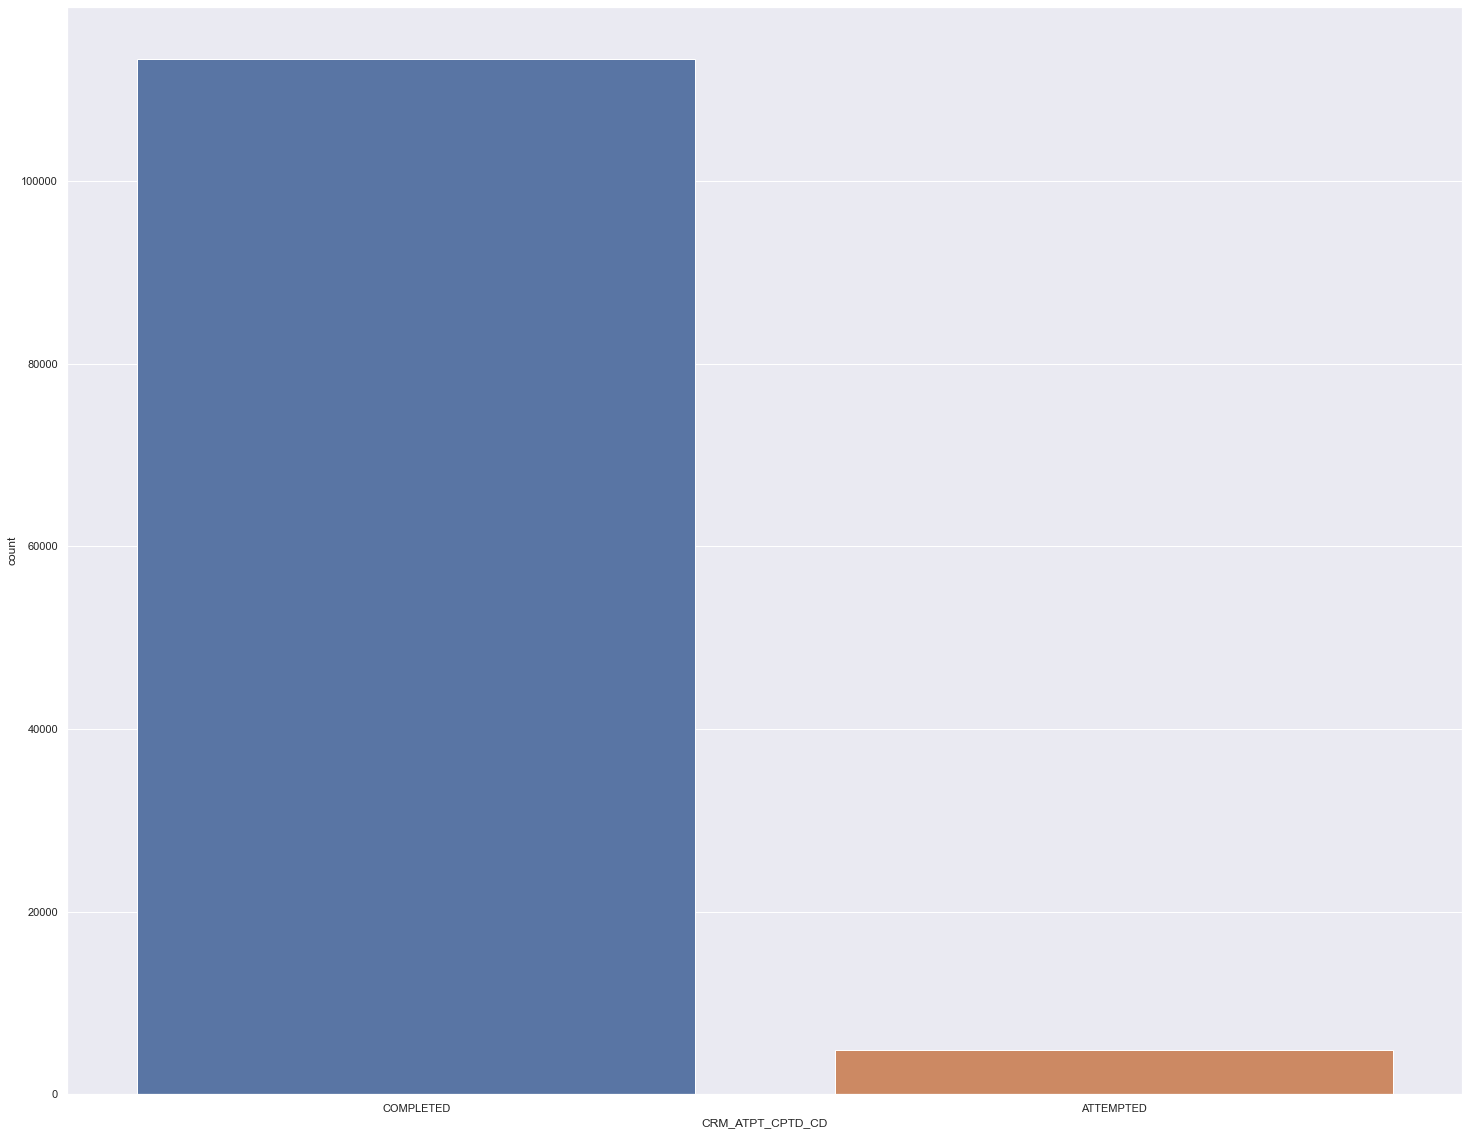

In [60]:
sns.countplot(x=df["CRM_ATPT_CPTD_CD"])

In most cases reported, the assault had been completed.

<AxesSubplot:xlabel='VIC_RACE', ylabel='count'>

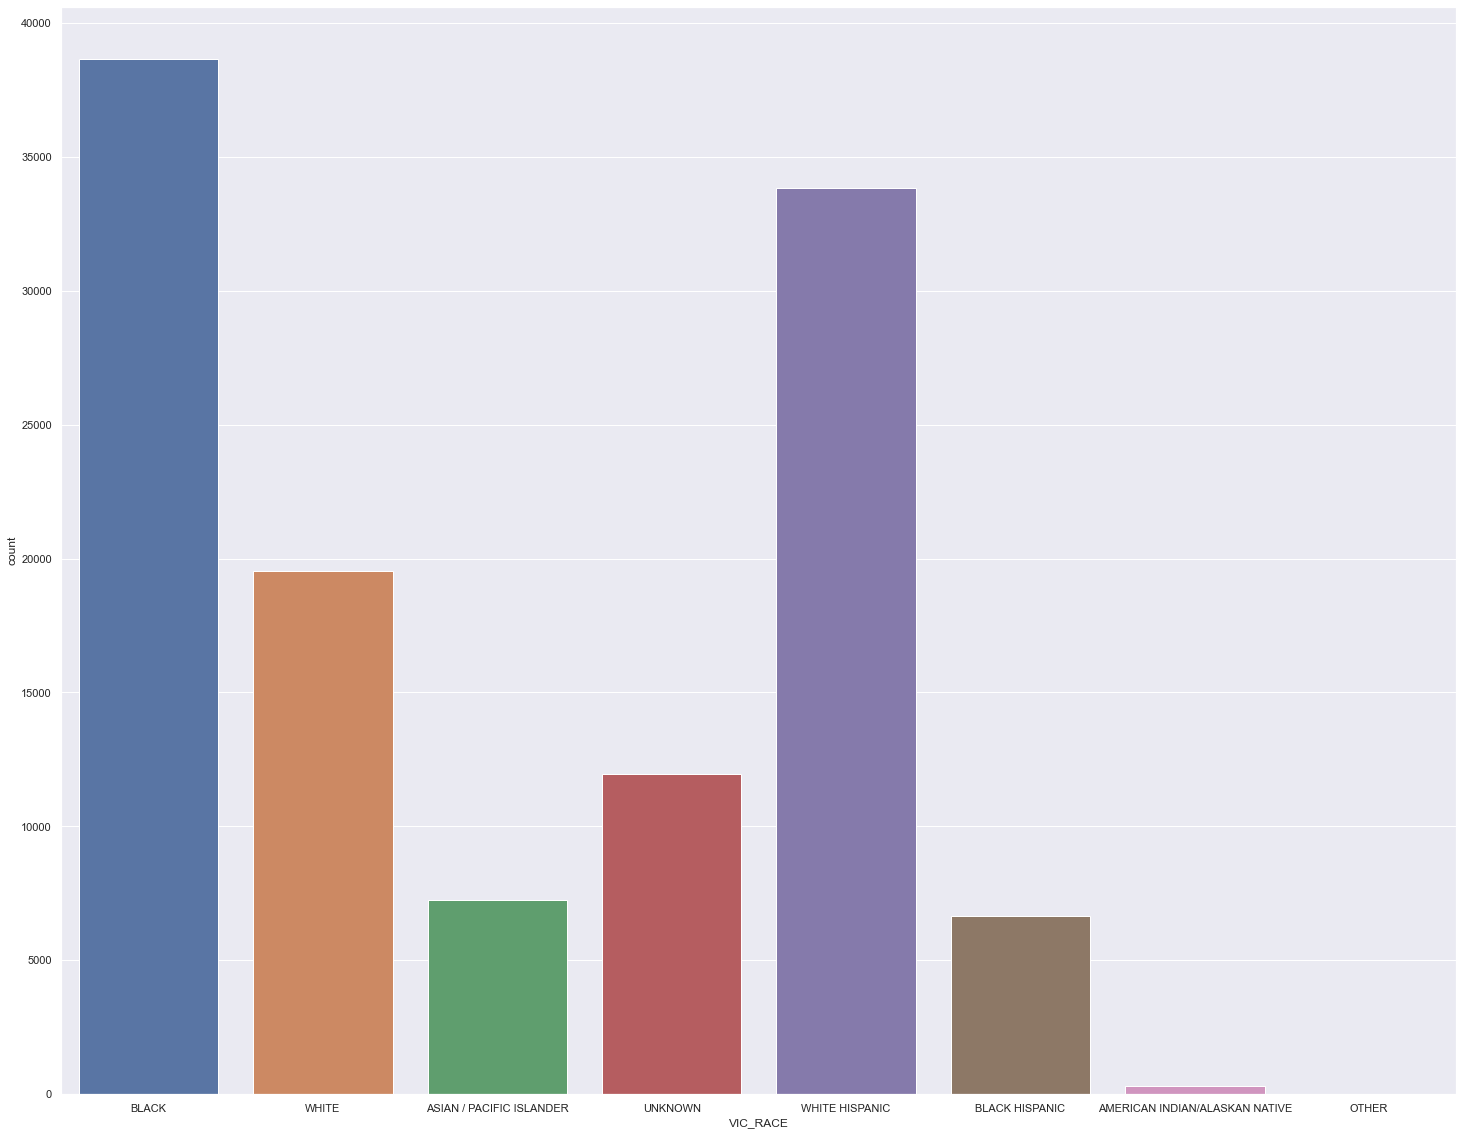

In [61]:
sns.countplot(x=df["VIC_RACE"])

The most vulnerable ethnicity individuals who identify as Black, followed by White Hispanics.

## Number of days it took to report with respect to all parameters *

<AxesSubplot:xlabel='VIC_AGE_GROUP', ylabel='days_report'>

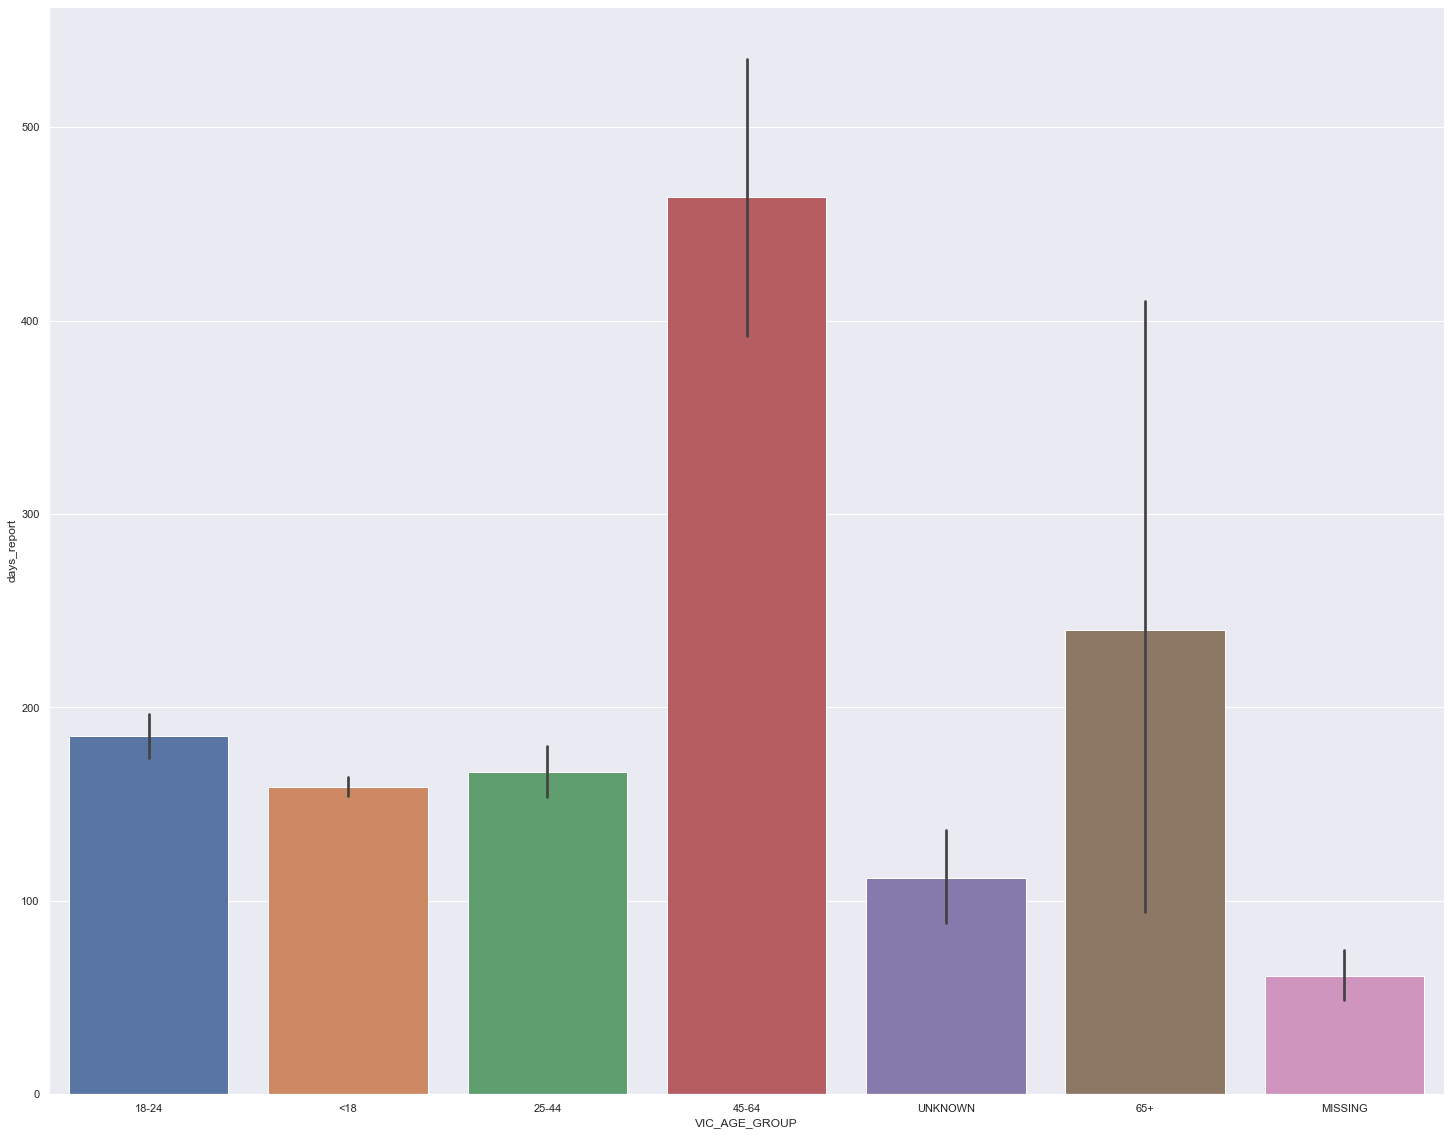

In [62]:
sns.barplot(data = df, x = 'VIC_AGE_GROUP', y = 'days_report')

The age group which takes the longest to report is between 45 to 64, followed by individuals who are above 65.

<AxesSubplot:xlabel='OFNS_DESC', ylabel='days_report'>

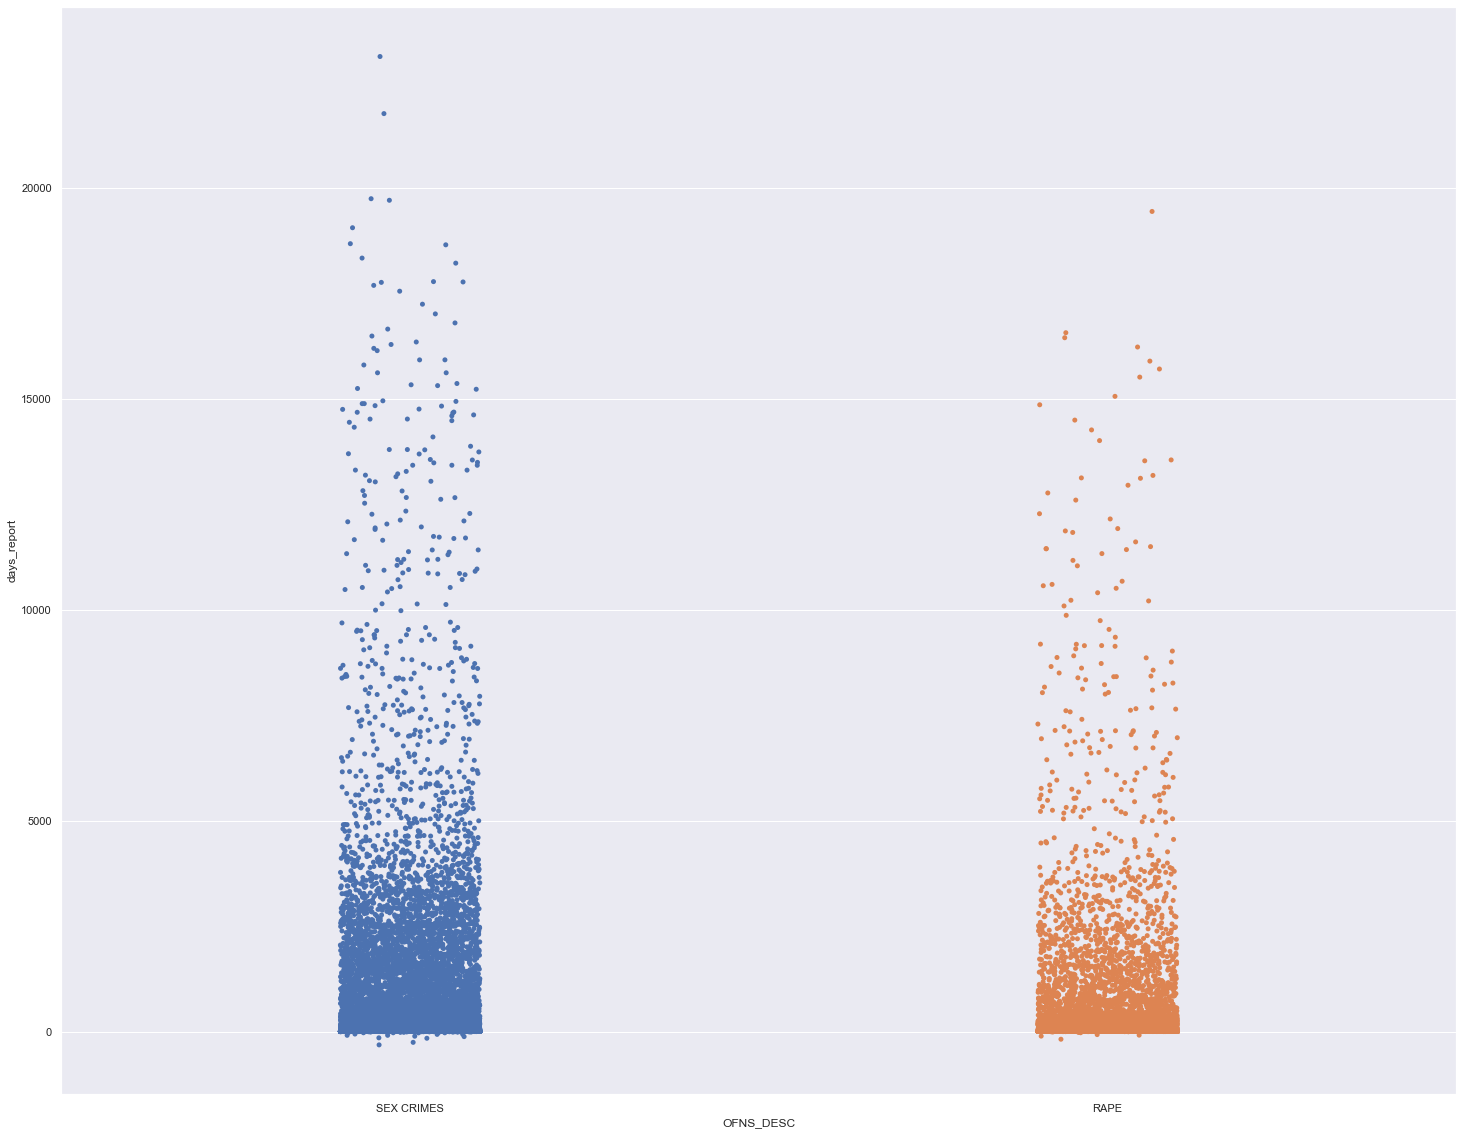

In [63]:
sns.stripplot(data = df, x = 'OFNS_DESC', y = 'days_report')

Most individuals report sex crimes under 5,000 days whereas most rapes are reported under 2,500 days

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SEXUAL ABUSE 3,2'),
  Text(1, 0, 'CHILD, ENDANGERING WELFARE'),
  Text(2, 0, 'RAPE 1'),
  Text(3, 0, 'SODOMY 1'),
  Text(4, 0, 'SEXUAL ABUSE'),
  Text(5, 0, 'SEXUAL MISCONDUCT,INTERCOURSE'),
  Text(6, 0, 'AGGRAVATED SEXUAL ASBUSE'),
  Text(7, 0, 'RAPE 3'),
  Text(8, 0, 'RAPE 1,ATTEMPT'),
  Text(9, 0, 'RAPE 2')])

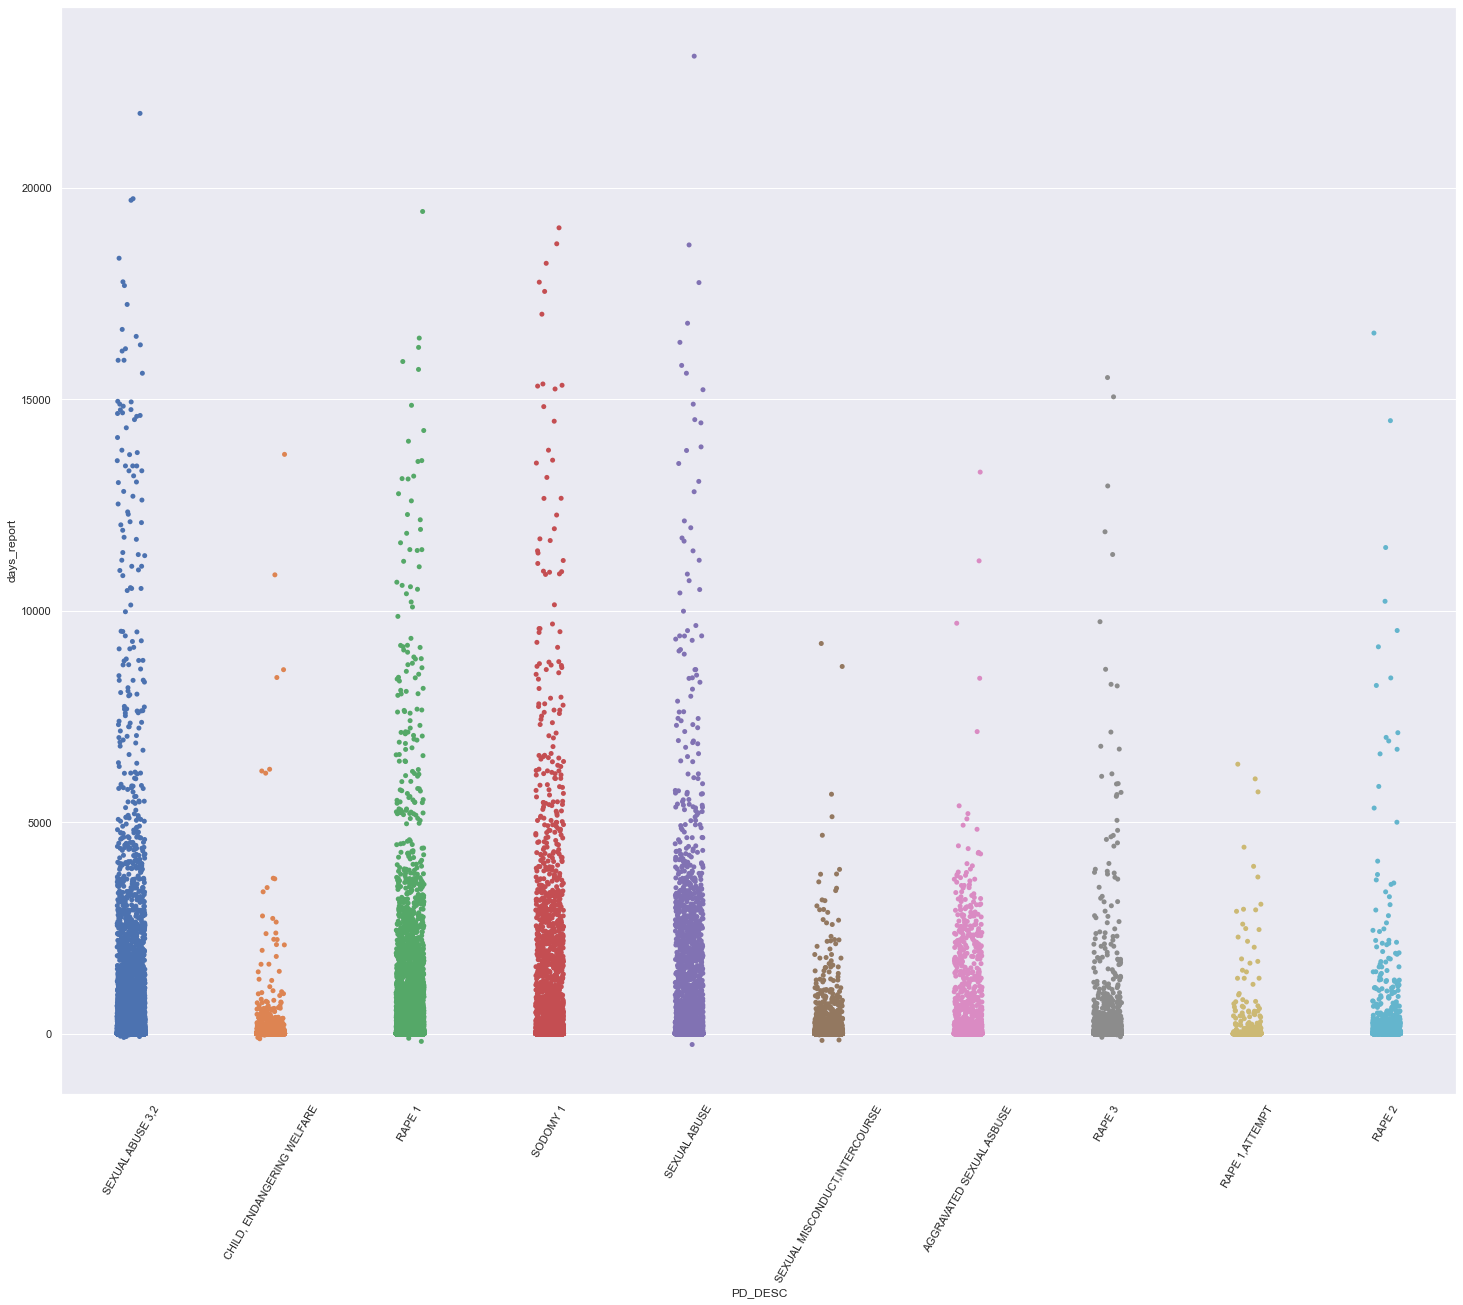

In [64]:
sns.stripplot(data = df, x = 'PD_DESC', y = 'days_report', order=pd.value_counts(df["PD_DESC"]).iloc[:10].index)
plt.xticks(rotation=60)

The number of sexual assault crimes that were reported after 5,000 days are mostly Sexual Abuse 3,2 followed by Sexual Abuse, Rape 1 and Sodomy 1.

<AxesSubplot:xlabel='CRM_ATPT_CPTD_CD', ylabel='days_report'>

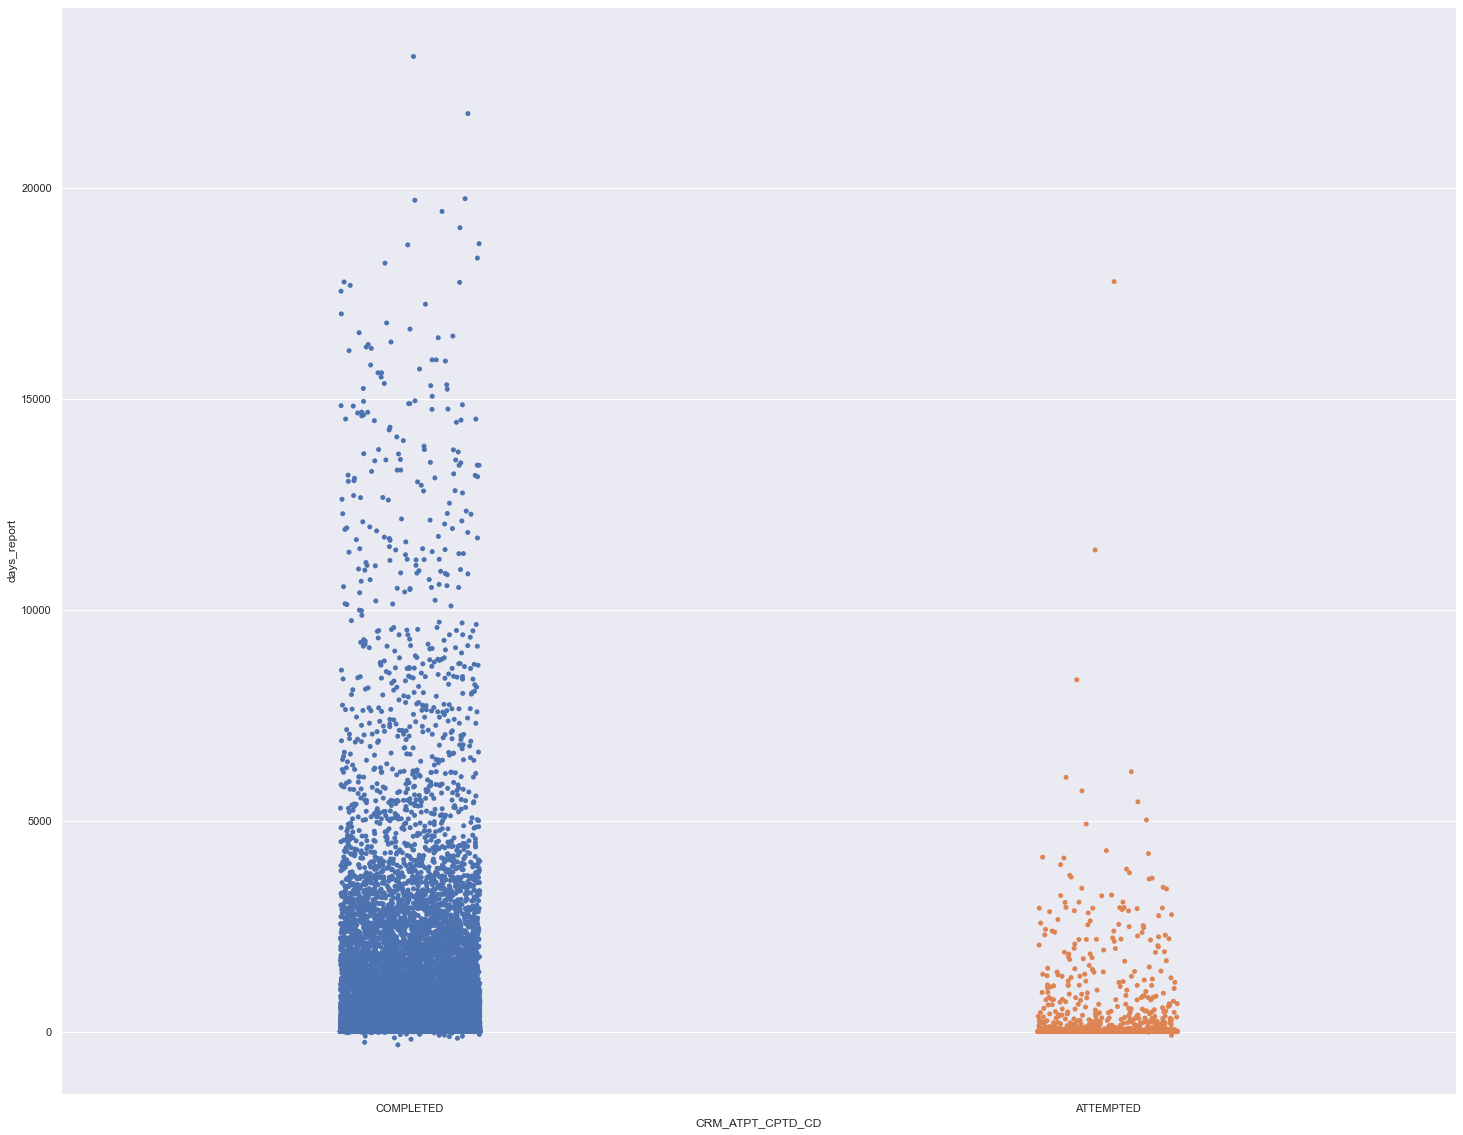

In [65]:
sns.stripplot(data = df, x = 'CRM_ATPT_CPTD_CD', y = 'days_report')

Most attempted crimes were reported under 1,000 days. Crimes that were completed take significantly longer to be reported.

<AxesSubplot:xlabel='LAW_CAT_CD', ylabel='days_report'>

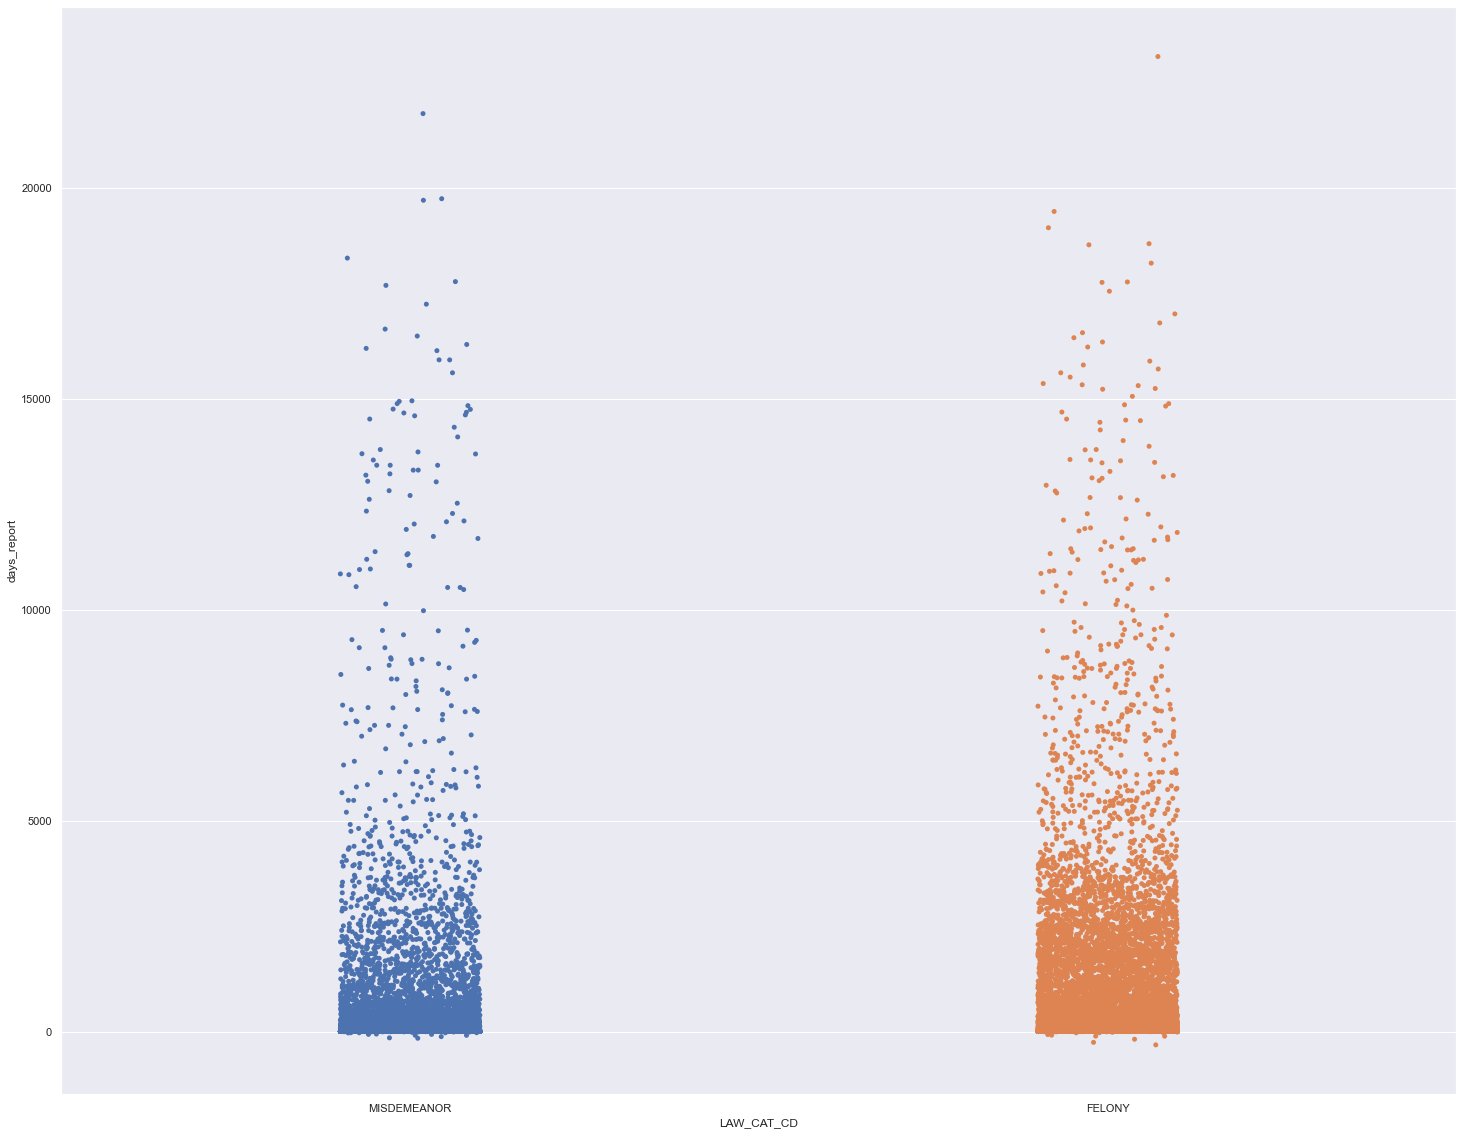

In [66]:
sns.stripplot(data = df, x = 'LAW_CAT_CD', y = 'days_report')

Most Felonies are reported under 5,000 days whereas Misdemeanors are reported under 2,500 days.

<AxesSubplot:xlabel='BORO_NM', ylabel='days_report'>

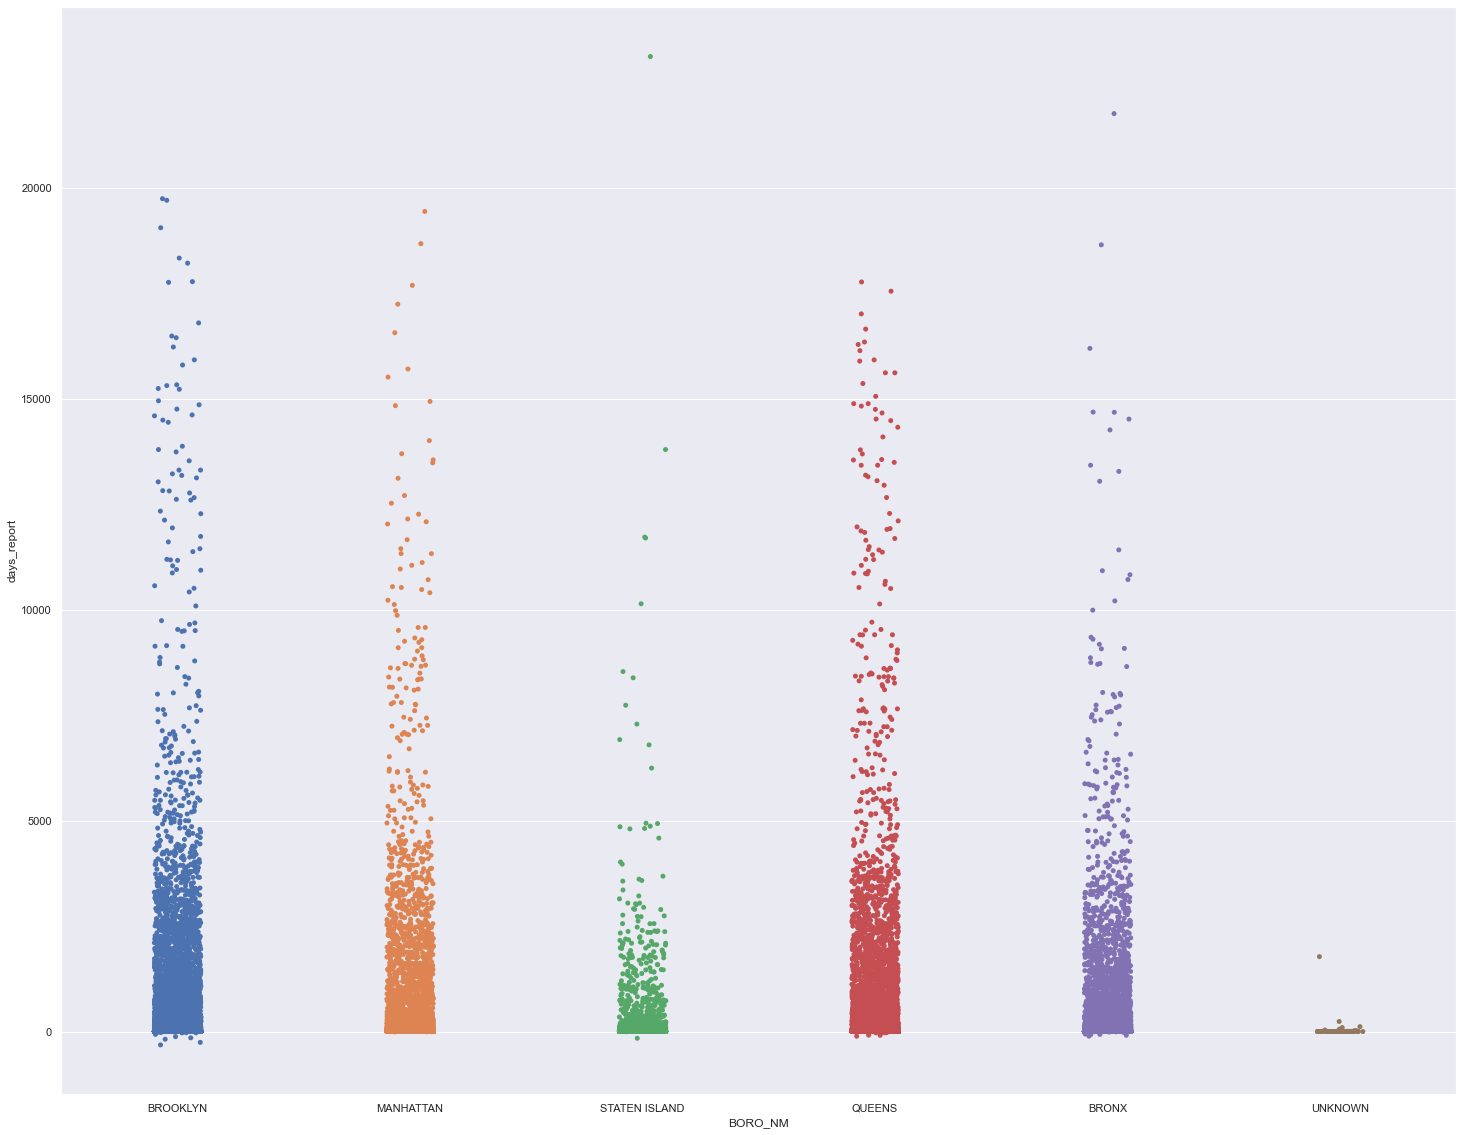

In [67]:
sns.stripplot(data = df, x = 'BORO_NM', y = 'days_report')

Crimes that occur in Brooklyn and Queens are reported are reported over a longer period of time whereas the ones that occur in Staten Island are reported faster.

<AxesSubplot:xlabel='LOC_OF_OCCUR_DESC', ylabel='days_report'>

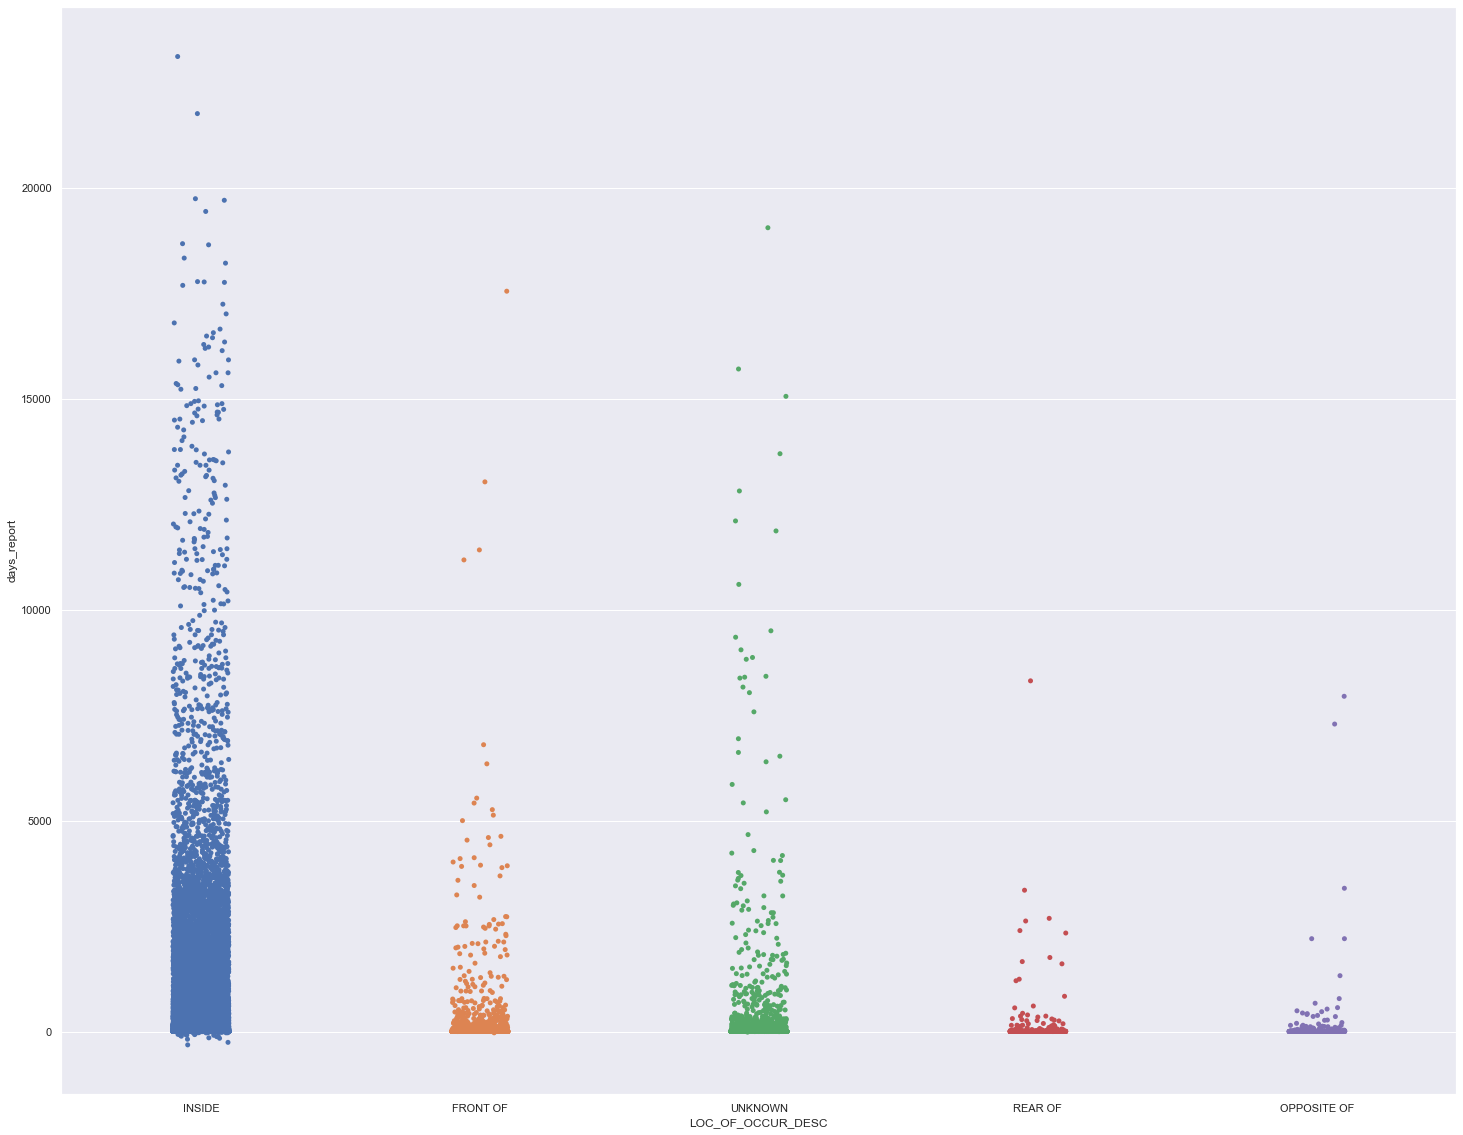

In [68]:
sns.stripplot(data = df, x = 'LOC_OF_OCCUR_DESC', y = 'days_report')

Most Sexual Assault crimes take place inside a particular place.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'RESIDENCE - APT. HOUSE'),
  Text(1, 0, 'RESIDENCE-HOUSE'),
  Text(2, 0, 'STREET'),
  Text(3, 0, 'RESIDENCE - PUBLIC HOUSING'),
  Text(4, 0, 'TRANSIT - NYC SUBWAY'),
  Text(5, 0, 'OTHER'),
  Text(6, 0, 'PUBLIC SCHOOL'),
  Text(7, 0, 'HOTEL/MOTEL'),
  Text(8, 0, 'PARK/PLAYGROUND'),
  Text(9, 0, 'HOSPITAL')])

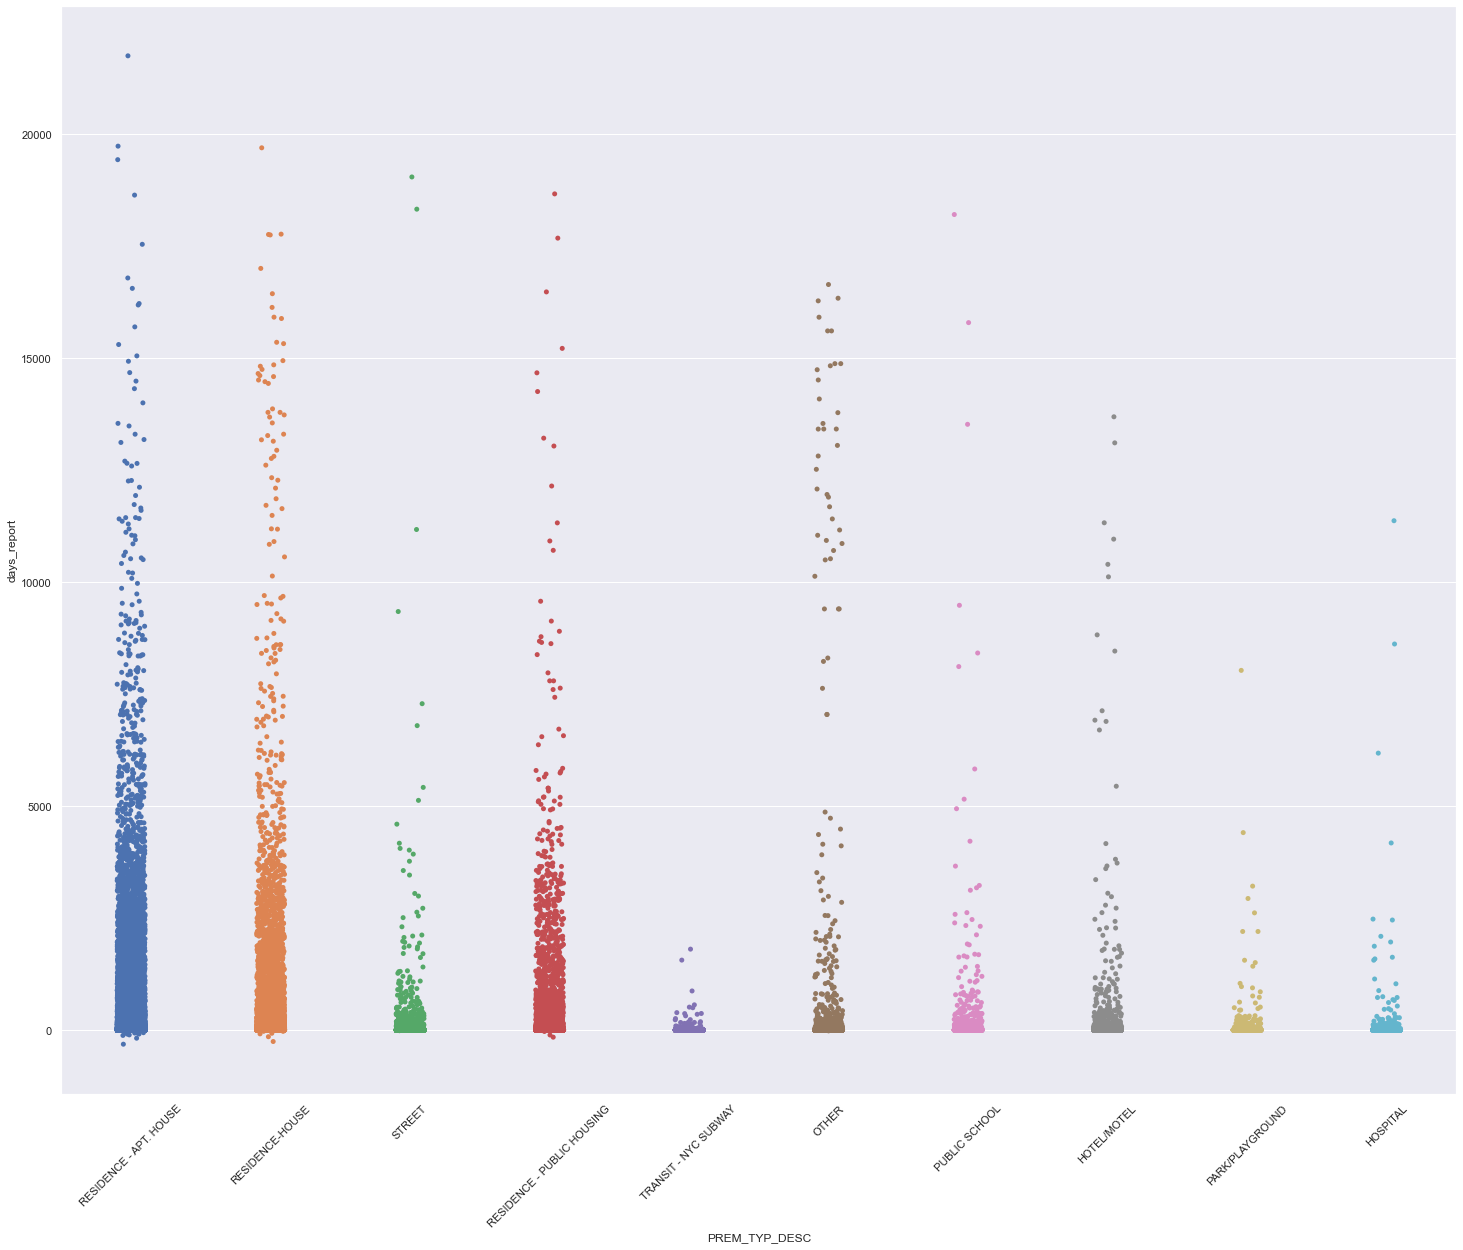

In [69]:
sns.stripplot(data = df, x = 'PREM_TYP_DESC', y = 'days_report', order=pd.value_counts(df["PREM_TYP_DESC"]).iloc[:10].index)
plt.xticks(rotation=45)

The crimes that take place in residential contexts take much longer to report.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'N.Y. POLICE DEPT'),
  Text(1, 0, 'N.Y. TRANSIT POLICE'),
  Text(2, 0, 'N.Y. HOUSING POLICE'),
  Text(3, 0, 'PORT AUTHORITY'),
  Text(4, 0, 'HEALTH & HOSP CORP'),
  Text(5, 0, 'NEW YORK CITY SHERIFF OFFICE'),
  Text(6, 0, 'OTHER'),
  Text(7, 0, 'DEPT OF CORRECTIONS'),
  Text(8, 0, 'LONG ISLAND RAILRD'),
  Text(9, 0, 'NYC PARKS'),
  Text(10, 0, 'POLICE DEPT NYC'),
  Text(11, 0, 'METRO NORTH'),
  Text(12, 0, 'N.Y. STATE POLICE'),
  Text(13, 0, 'U.S. PARK POLICE'),
  Text(14, 0, 'STATN IS RAPID TRANS'),
  Text(15, 0, 'N.Y. STATE PARKS'),
  Text(16, 0, 'TRI-BORO BRDG TUNNL'),
  Text(17, 0, 'AMTRACK'),
  Text(18, 0, 'NYC DEPT ENVIRONMENTAL PROTECTION')])

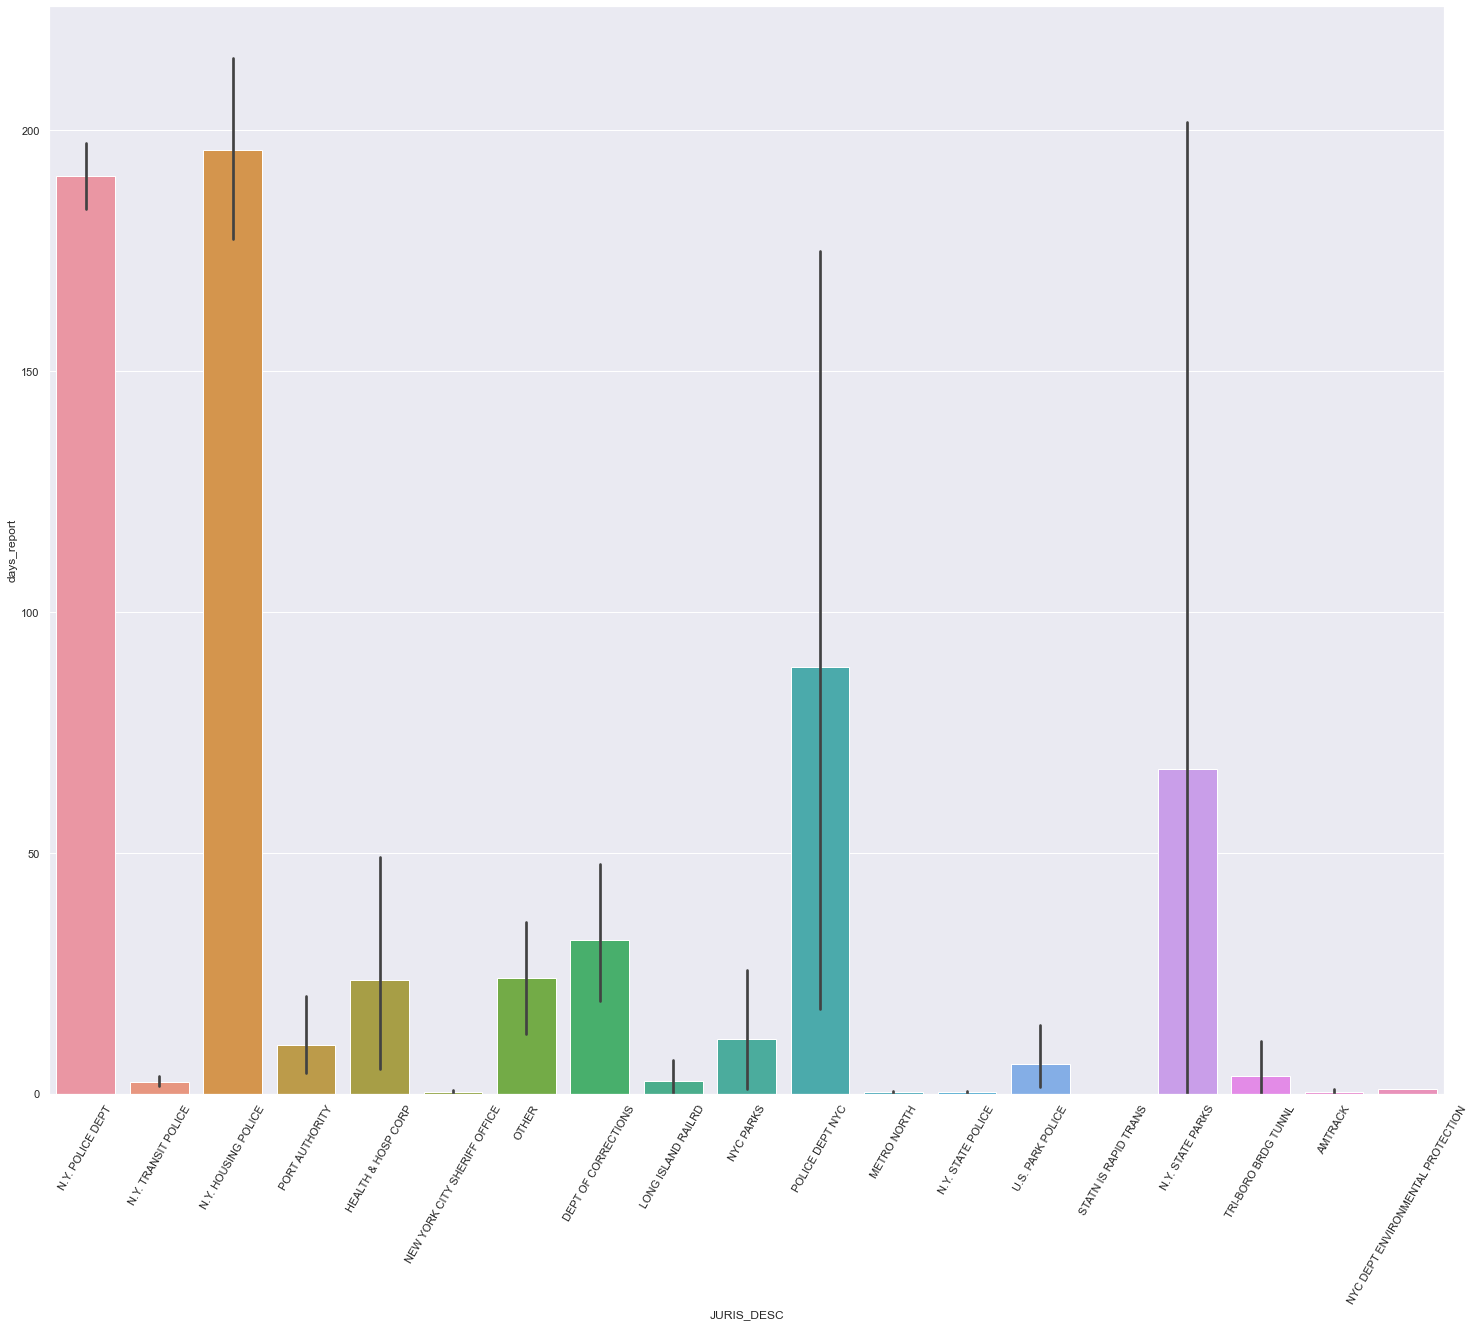

In [70]:
sns.barplot(data = df, x = 'JURIS_DESC', y = 'days_report')
plt.xticks(rotation=60)

The crimes that take longest to report belong to the NY Housing Police jurisdiction, followed by NYPD. 

<AxesSubplot:xlabel='SUSP_AGE_GROUP', ylabel='days_report'>

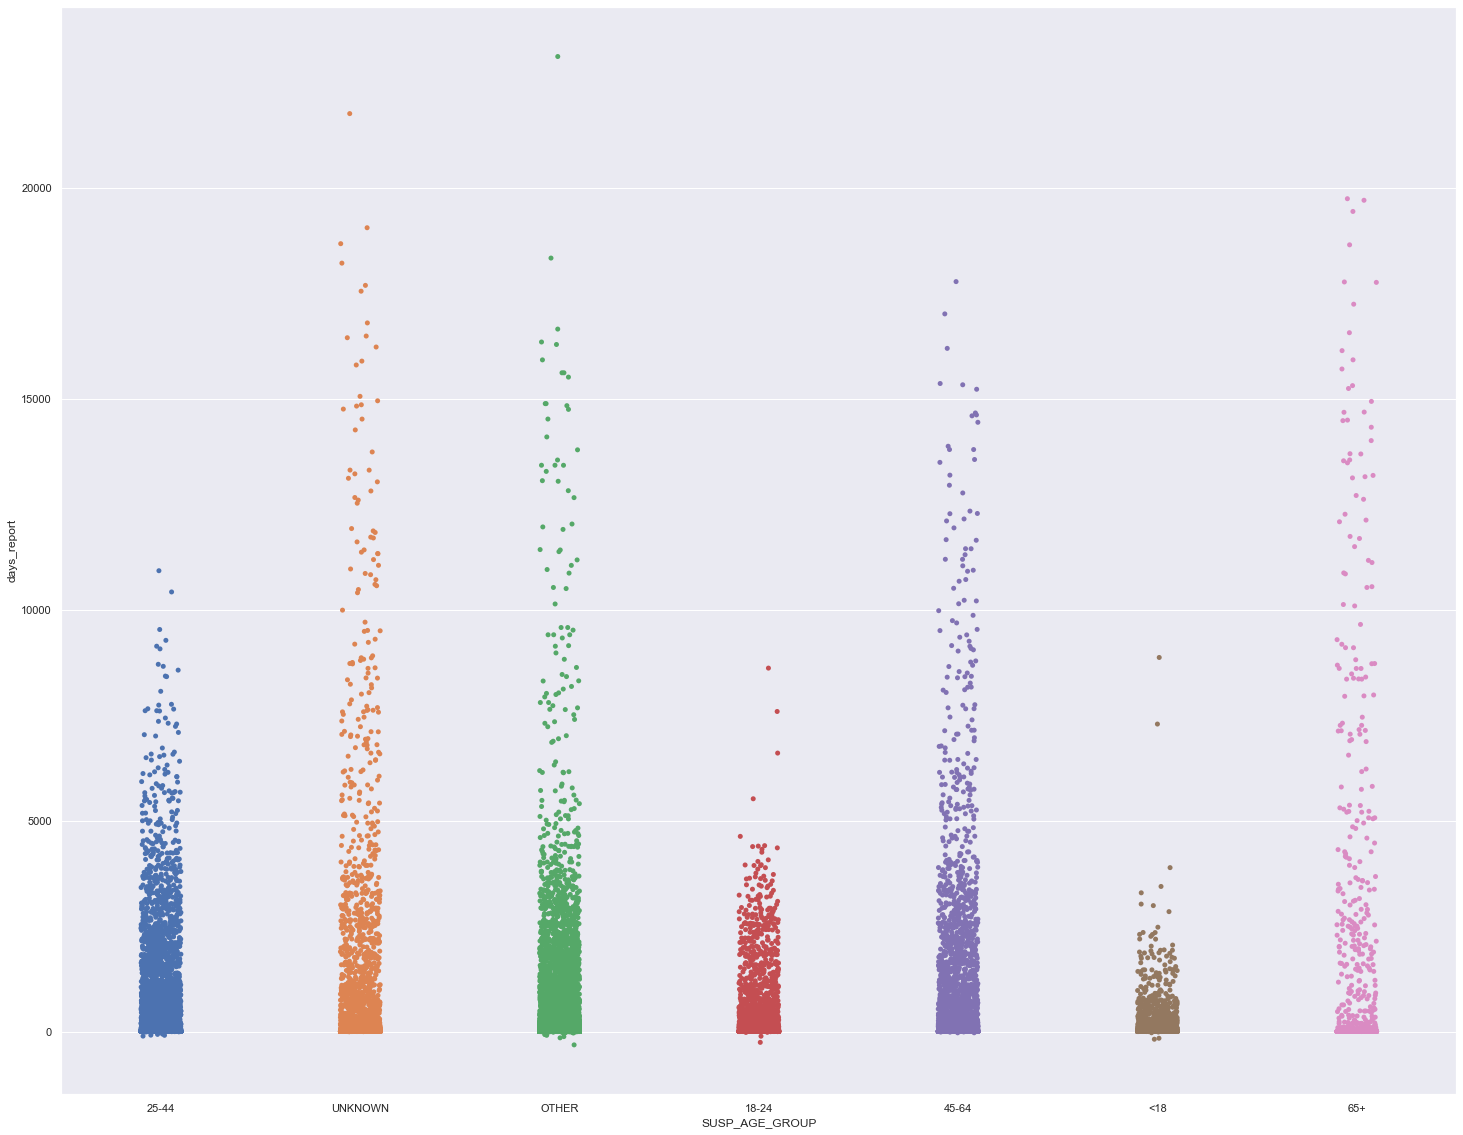

In [71]:
sns.stripplot(data = df, x = 'SUSP_AGE_GROUP', y = 'days_report')

When the age group of the suspect is unknown, cases take much longer to be reported, followed by suspects who are between 44 and 64.

<AxesSubplot:xlabel='SUSP_RACE', ylabel='days_report'>

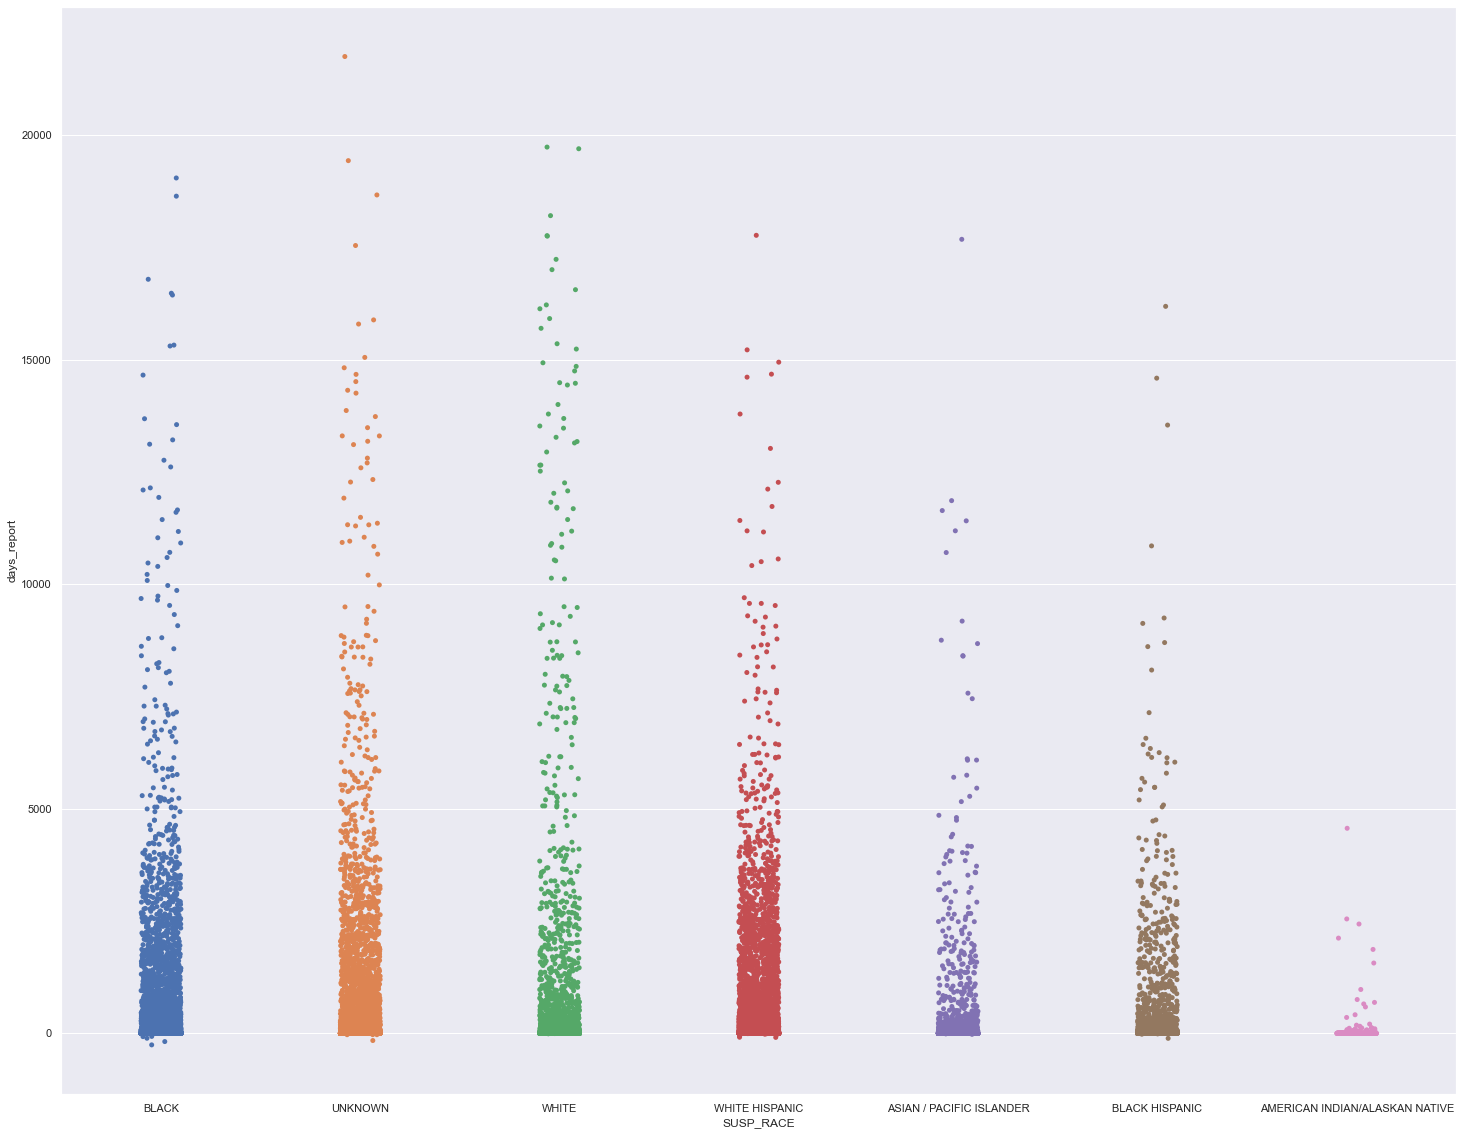

In [72]:
sns.stripplot(data = df, x = 'SUSP_RACE', y = 'days_report')

When the suspect's race is White, individuals take longest to report, followed by Black and when the suspect's ethnicity is Unknown.

<AxesSubplot:xlabel='SUSP_SEX', ylabel='days_report'>

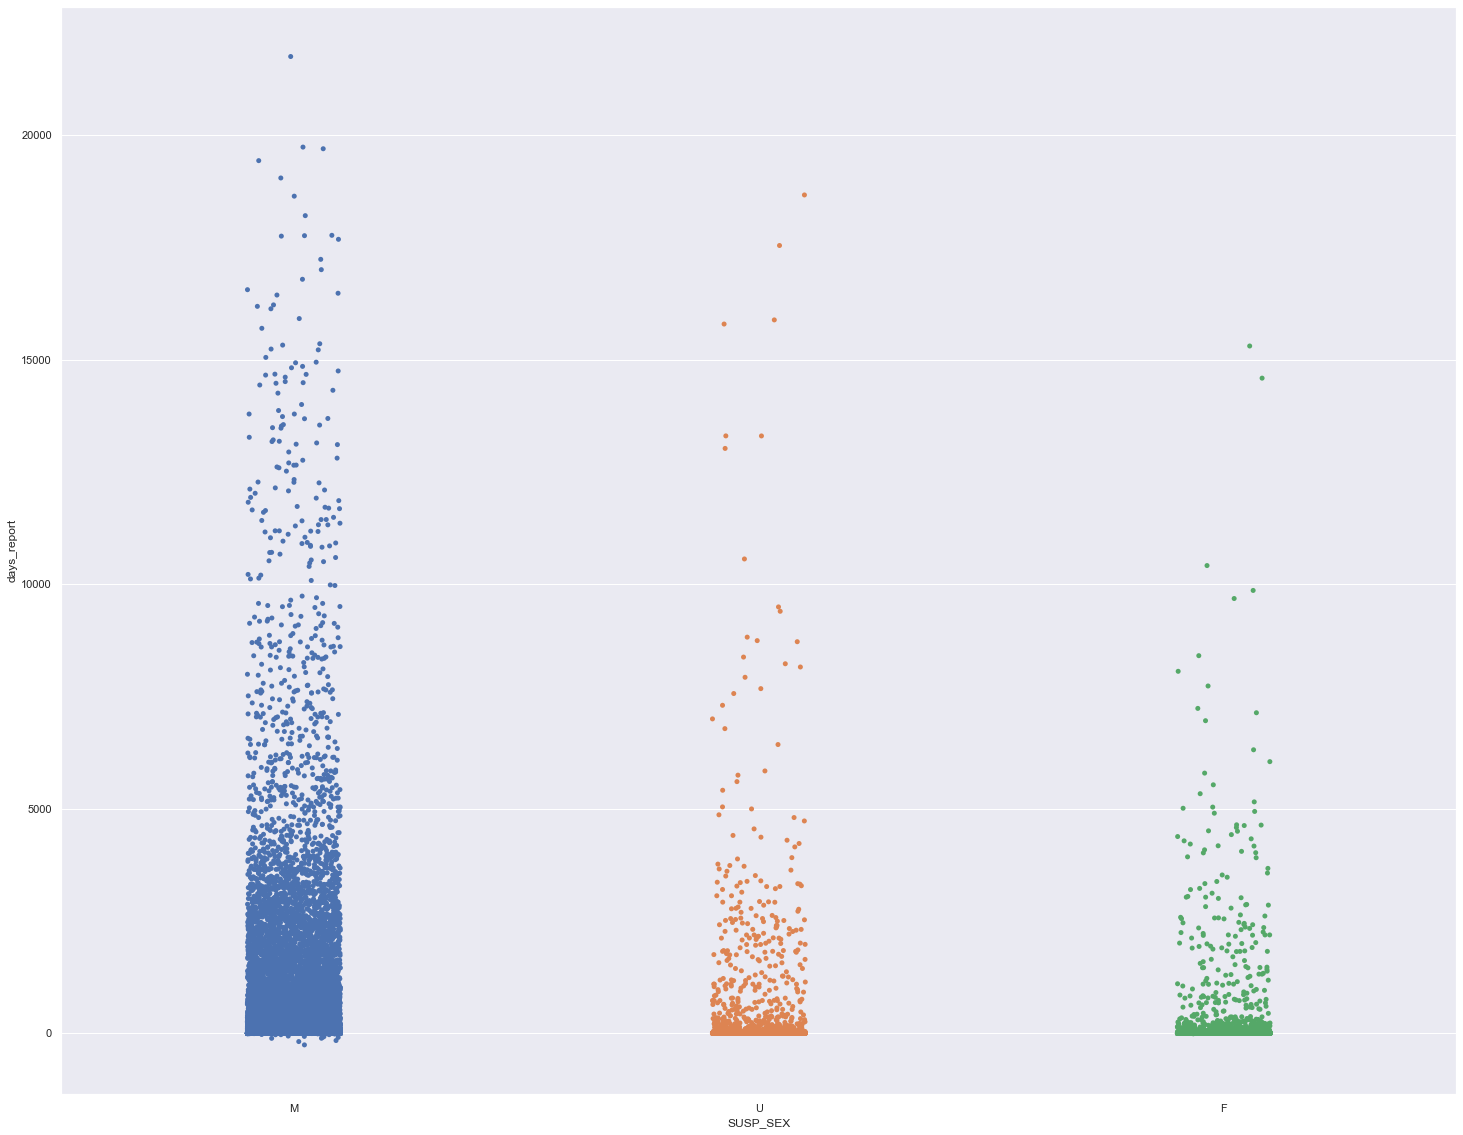

In [73]:
sns.stripplot(data = df, x = 'SUSP_SEX', y = 'days_report')

When the suspect is a Male, individuals take longer to report, followed by individuals whose ethnicity is Unknown.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'PATROL BORO BKLYN NORTH'),
  Text(1, 0, 'PATROL BORO MAN NORTH'),
  Text(2, 0, 'PATROL BORO STATEN ISLAND'),
  Text(3, 0, 'PATROL BORO QUEENS NORTH'),
  Text(4, 0, 'PATROL BORO MAN SOUTH'),
  Text(5, 0, 'PATROL BORO BRONX'),
  Text(6, 0, 'PATROL BORO BKLYN SOUTH'),
  Text(7, 0, 'PATROL BORO QUEENS SOUTH'),
  Text(8, 0, 'UNKNOWN')])

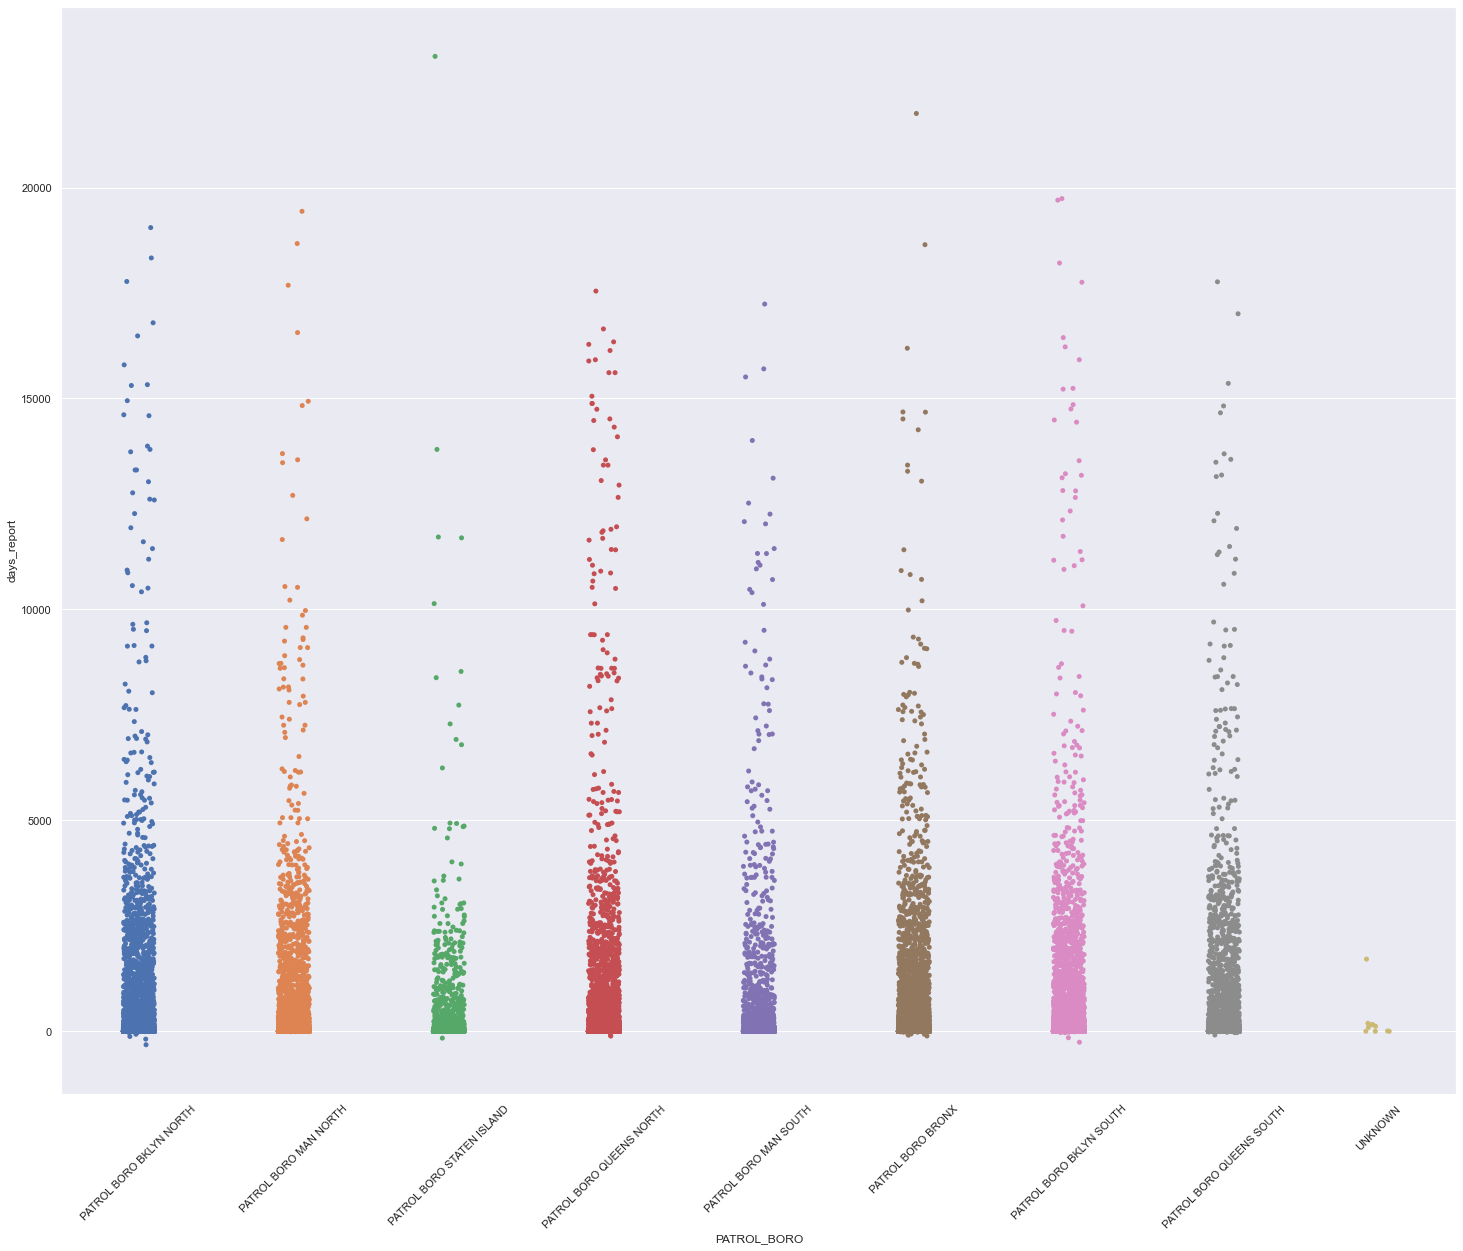

In [74]:
sns.stripplot(data = df, x = 'PATROL_BORO', y = 'days_report')
plt.xticks(rotation=45)

Under Patrol Borough Queens North and Brooklyn North, individuals take longest to report.

<AxesSubplot:xlabel='VIC_AGE_GROUP', ylabel='days_report'>

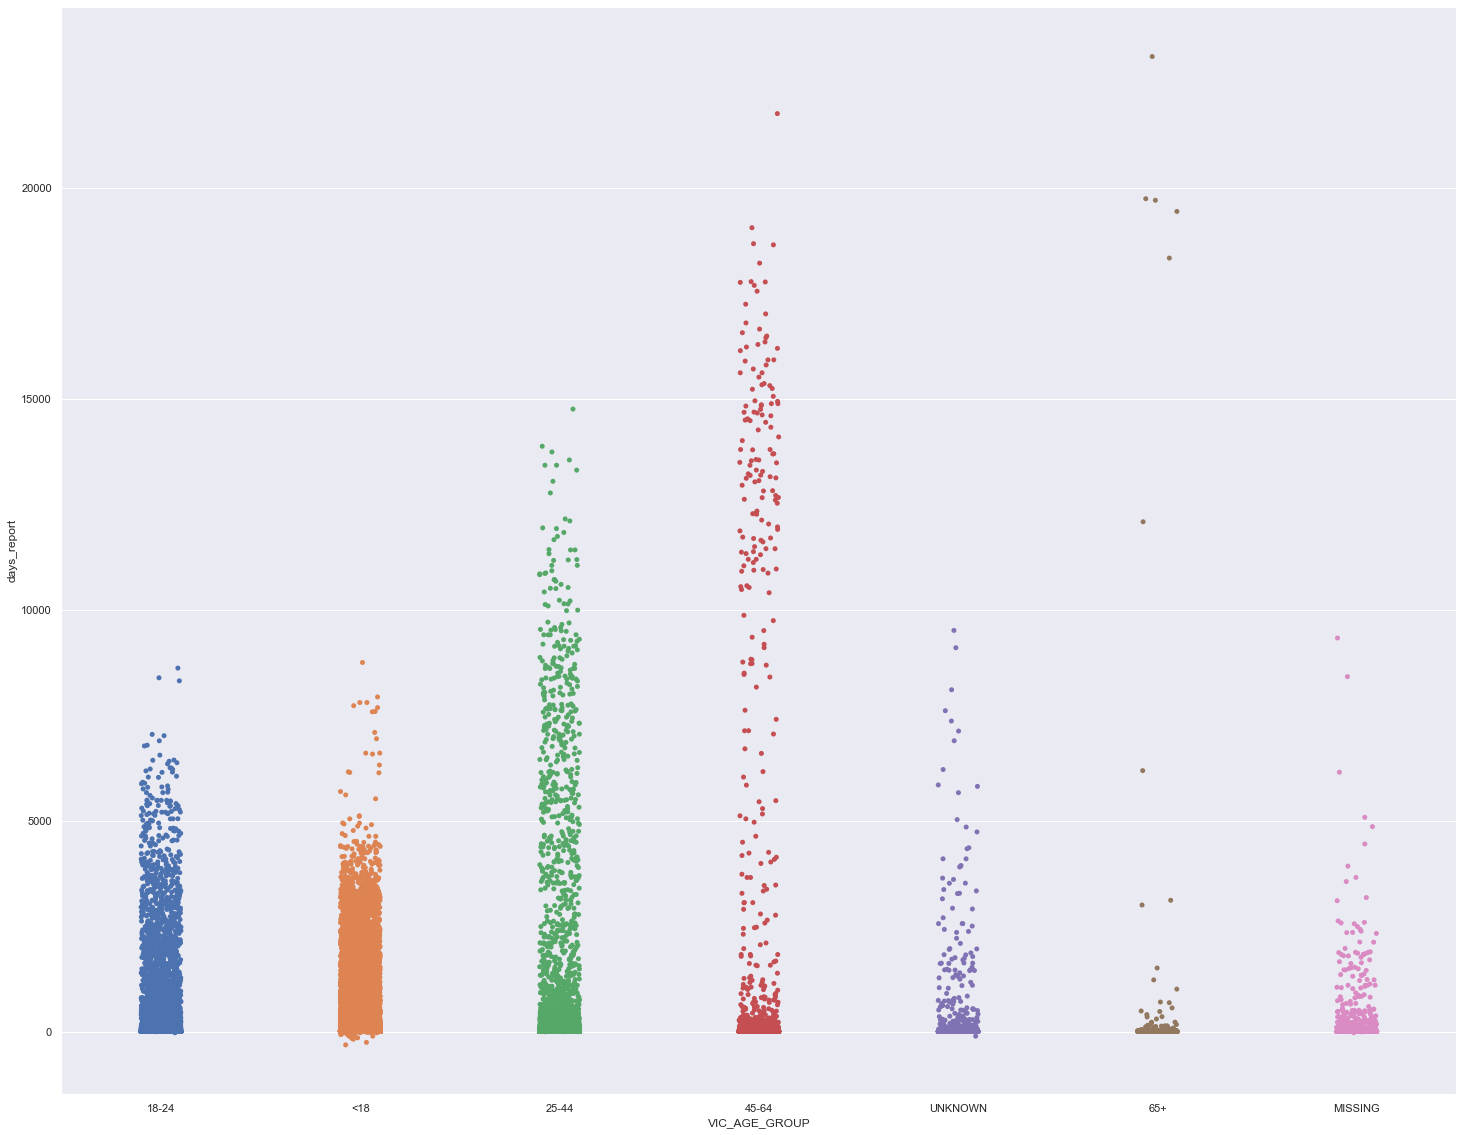

In [75]:
sns.stripplot(data = df, x = 'VIC_AGE_GROUP', y = 'days_report')

Majority victims below the age of 18 reported crimes in under 5,000 days and between 45 and 64 took longest to report cases.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'BLACK'),
  Text(1, 0, 'WHITE'),
  Text(2, 0, 'ASIAN / PACIFIC ISLANDER'),
  Text(3, 0, 'UNKNOWN'),
  Text(4, 0, 'WHITE HISPANIC'),
  Text(5, 0, 'BLACK HISPANIC'),
  Text(6, 0, 'AMERICAN INDIAN/ALASKAN NATIVE'),
  Text(7, 0, 'OTHER')])

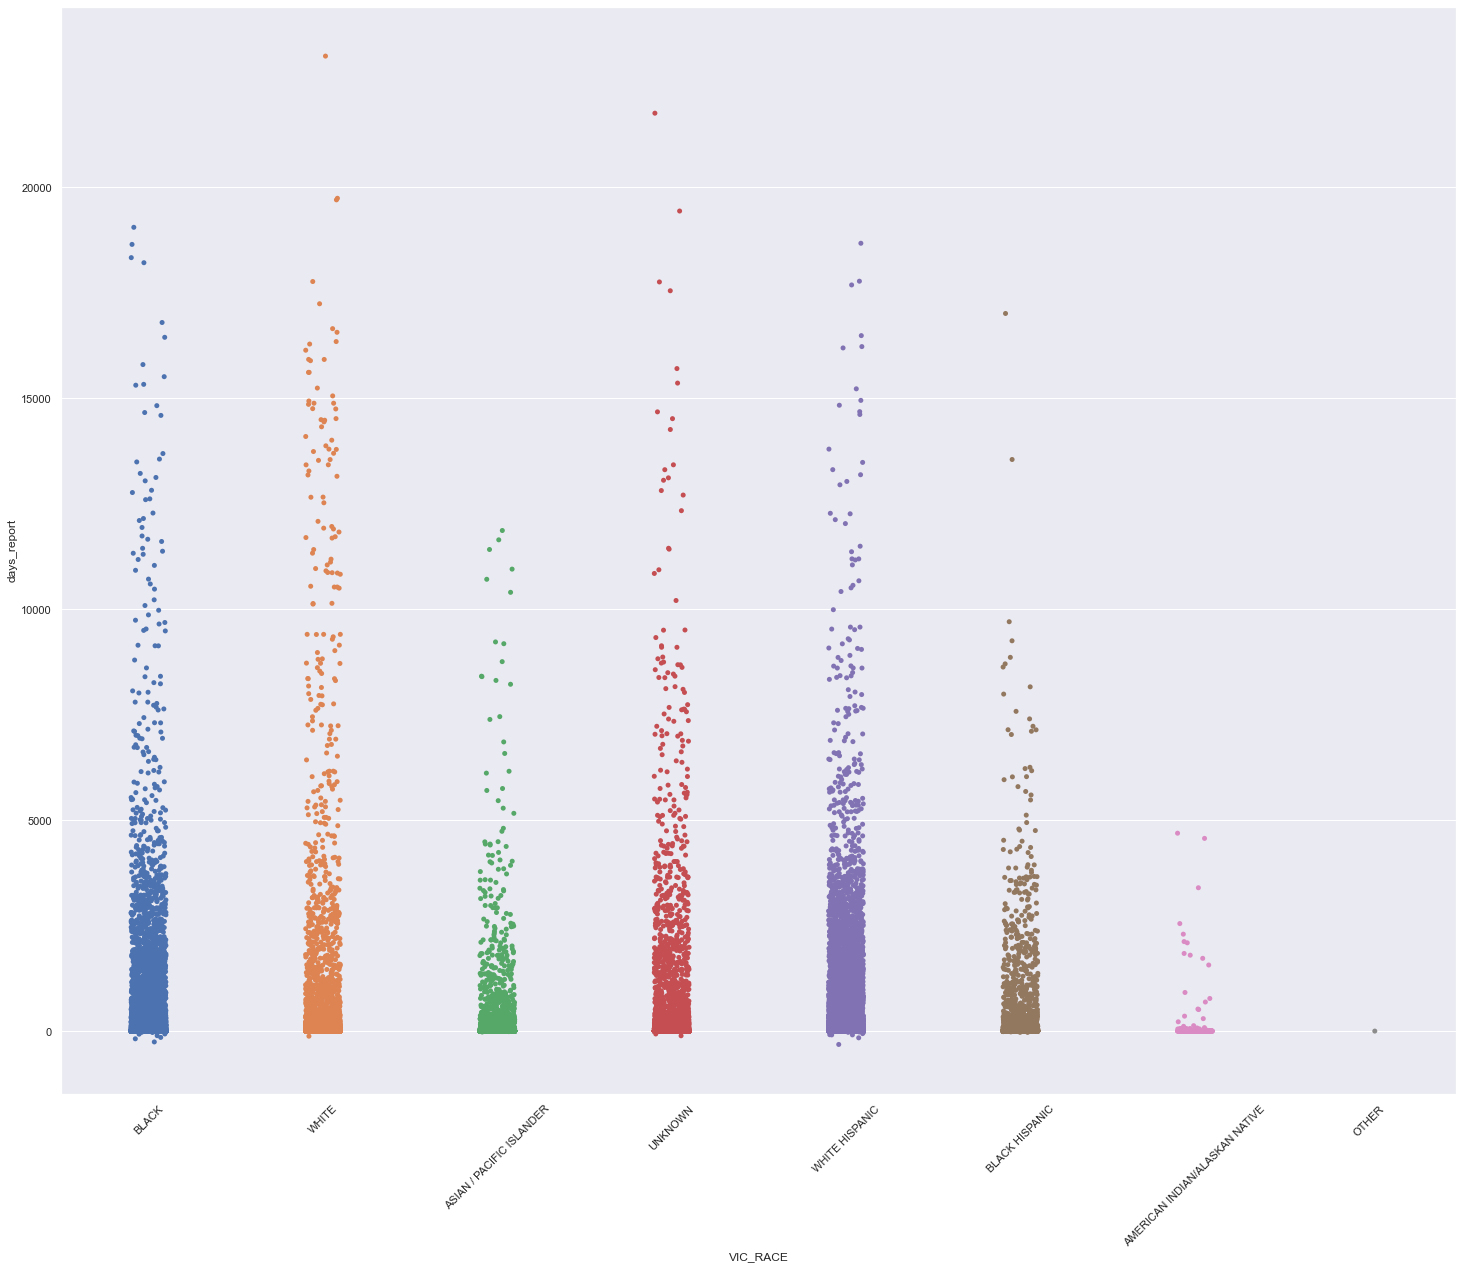

In [76]:
sns.stripplot(data = df, x = 'VIC_RACE', y = 'days_report')
plt.xticks(rotation=45)

Victims who identify as Black and victims who identify White took longest to report.

<AxesSubplot:xlabel='VIC_SEX', ylabel='days_report'>

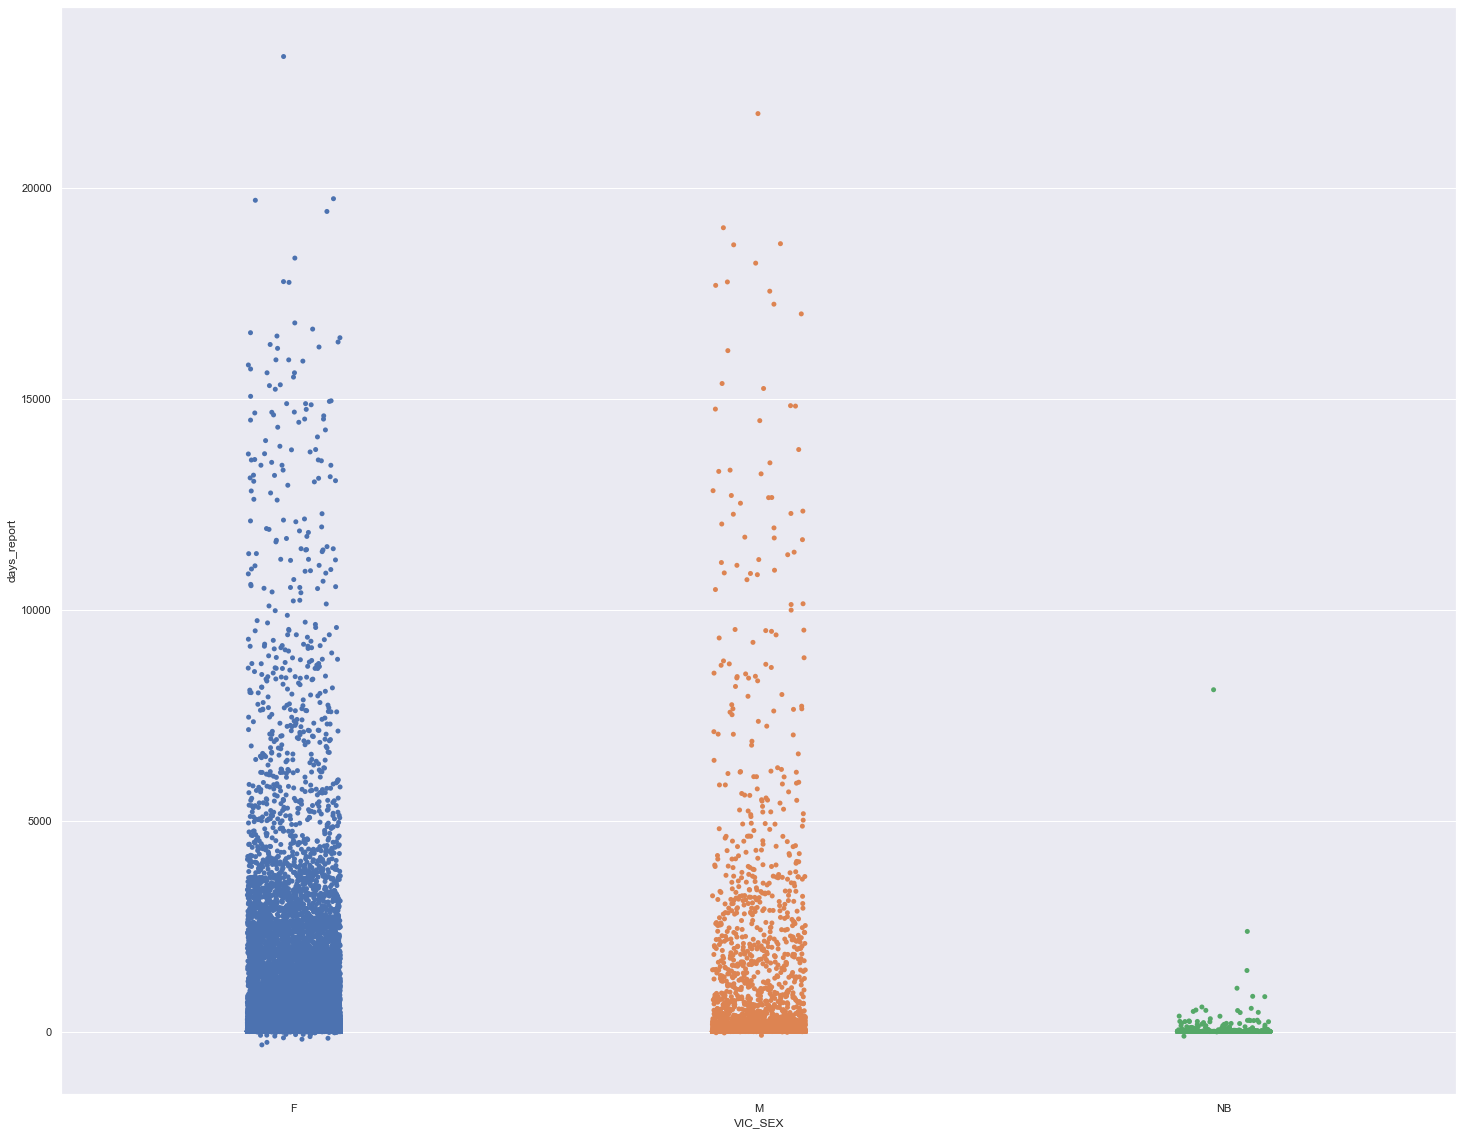

In [77]:
sns.stripplot(data = df, x = 'VIC_SEX', y = 'days_report')

Most victims who are Female report under 5,000 days whereas victims who identify as Male report under 1,500 days.

<AxesSubplot:xlabel='TimeOfDay', ylabel='days_report'>

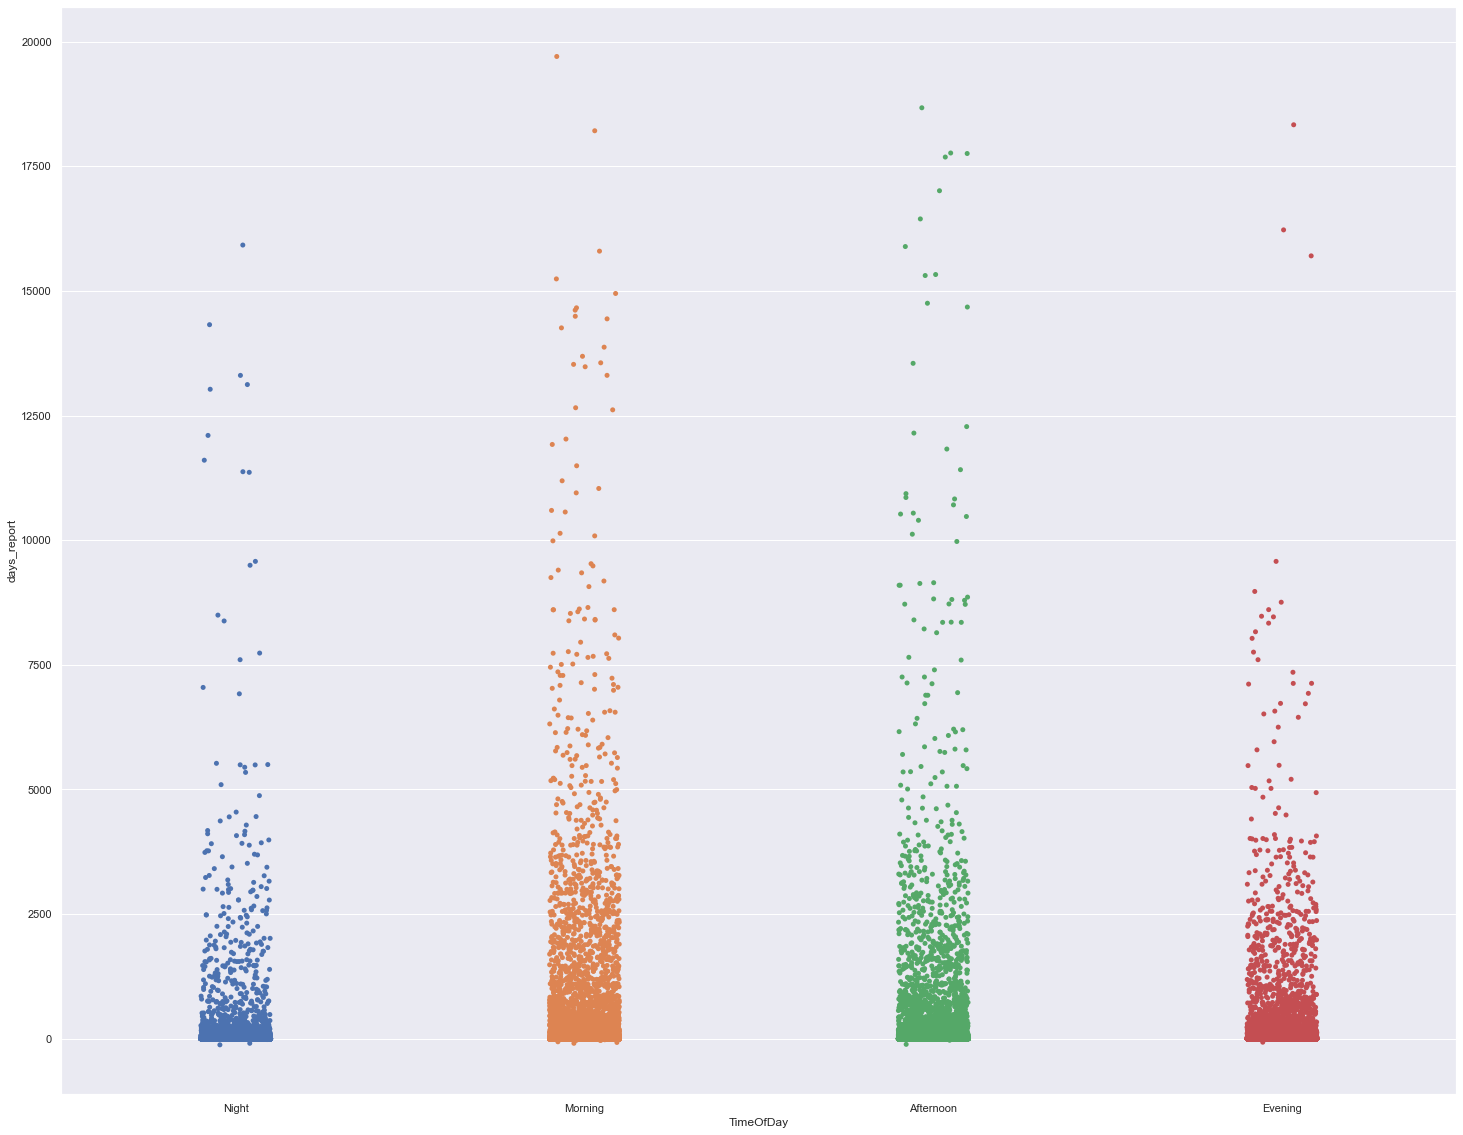

In [78]:
sns.stripplot(data = df, x = 'TimeOfDay', y = 'days_report')

Individuals who experienced Sexual Harassment in the morning hours took longer to report crimes compared to other times of the day.

## Offence description

<AxesSubplot:xlabel='OFNS_DESC', ylabel='count'>

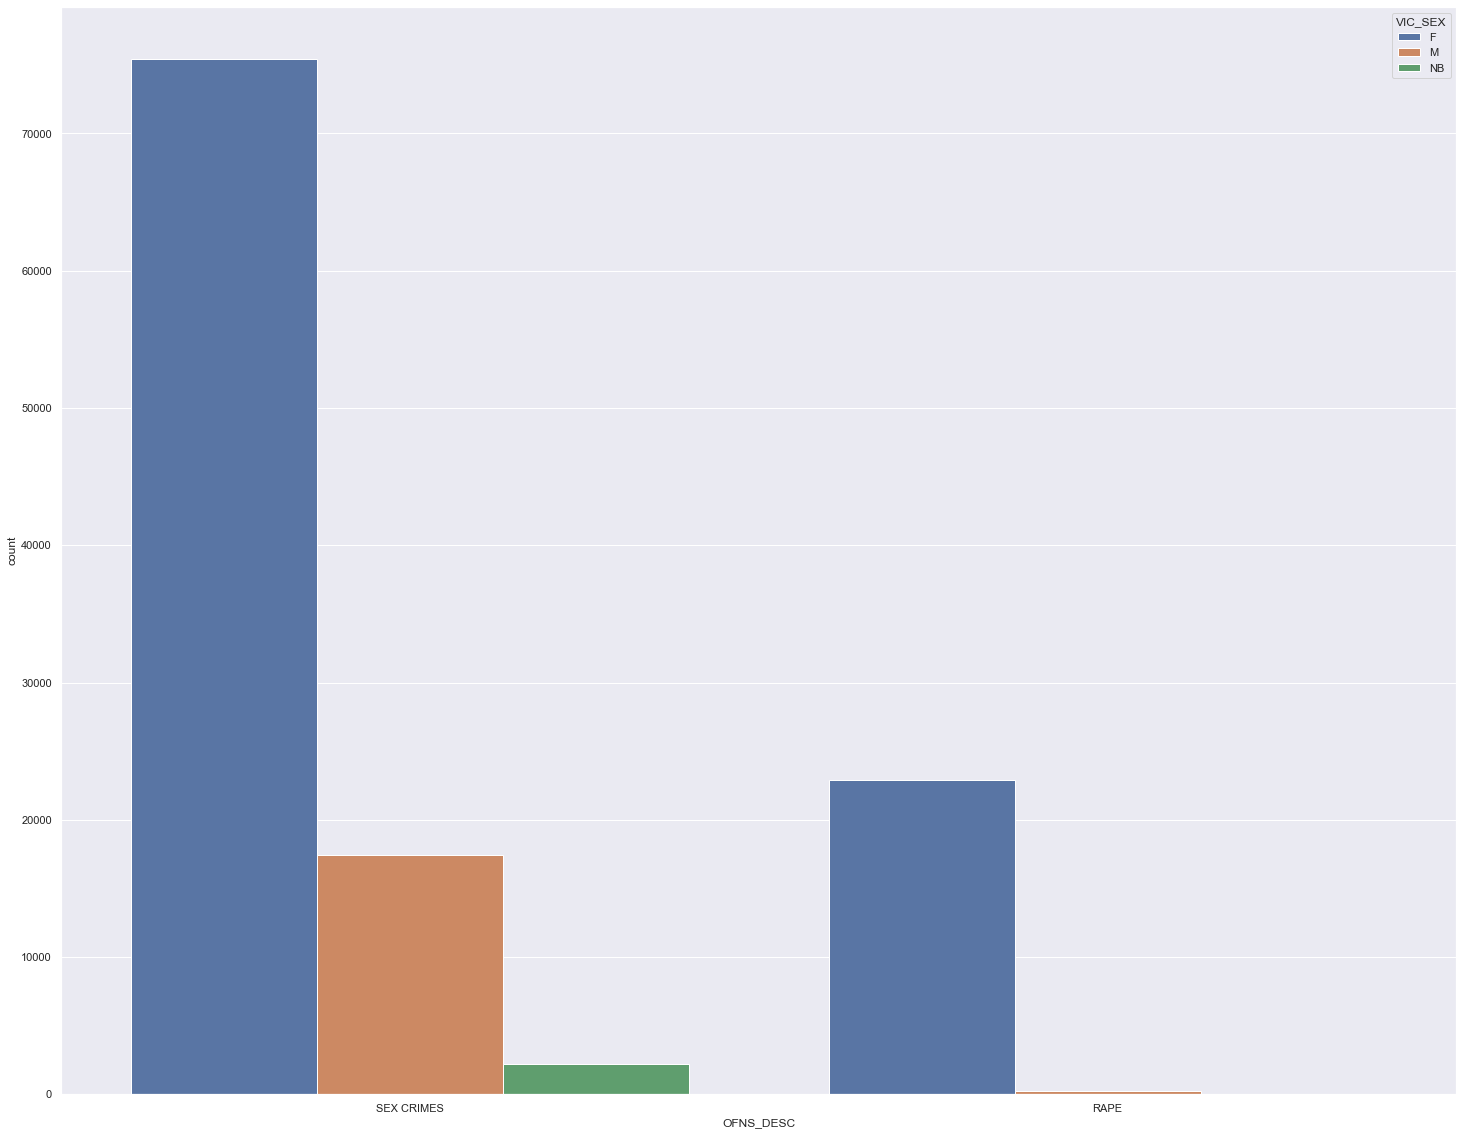

In [79]:
sns.countplot(data = df, x = 'OFNS_DESC', hue = 'VIC_SEX')

Sex crimes and rapes that happen to Female identifying individuals are significantly higher than other individuals.

<AxesSubplot:xlabel='OFNS_DESC', ylabel='count'>

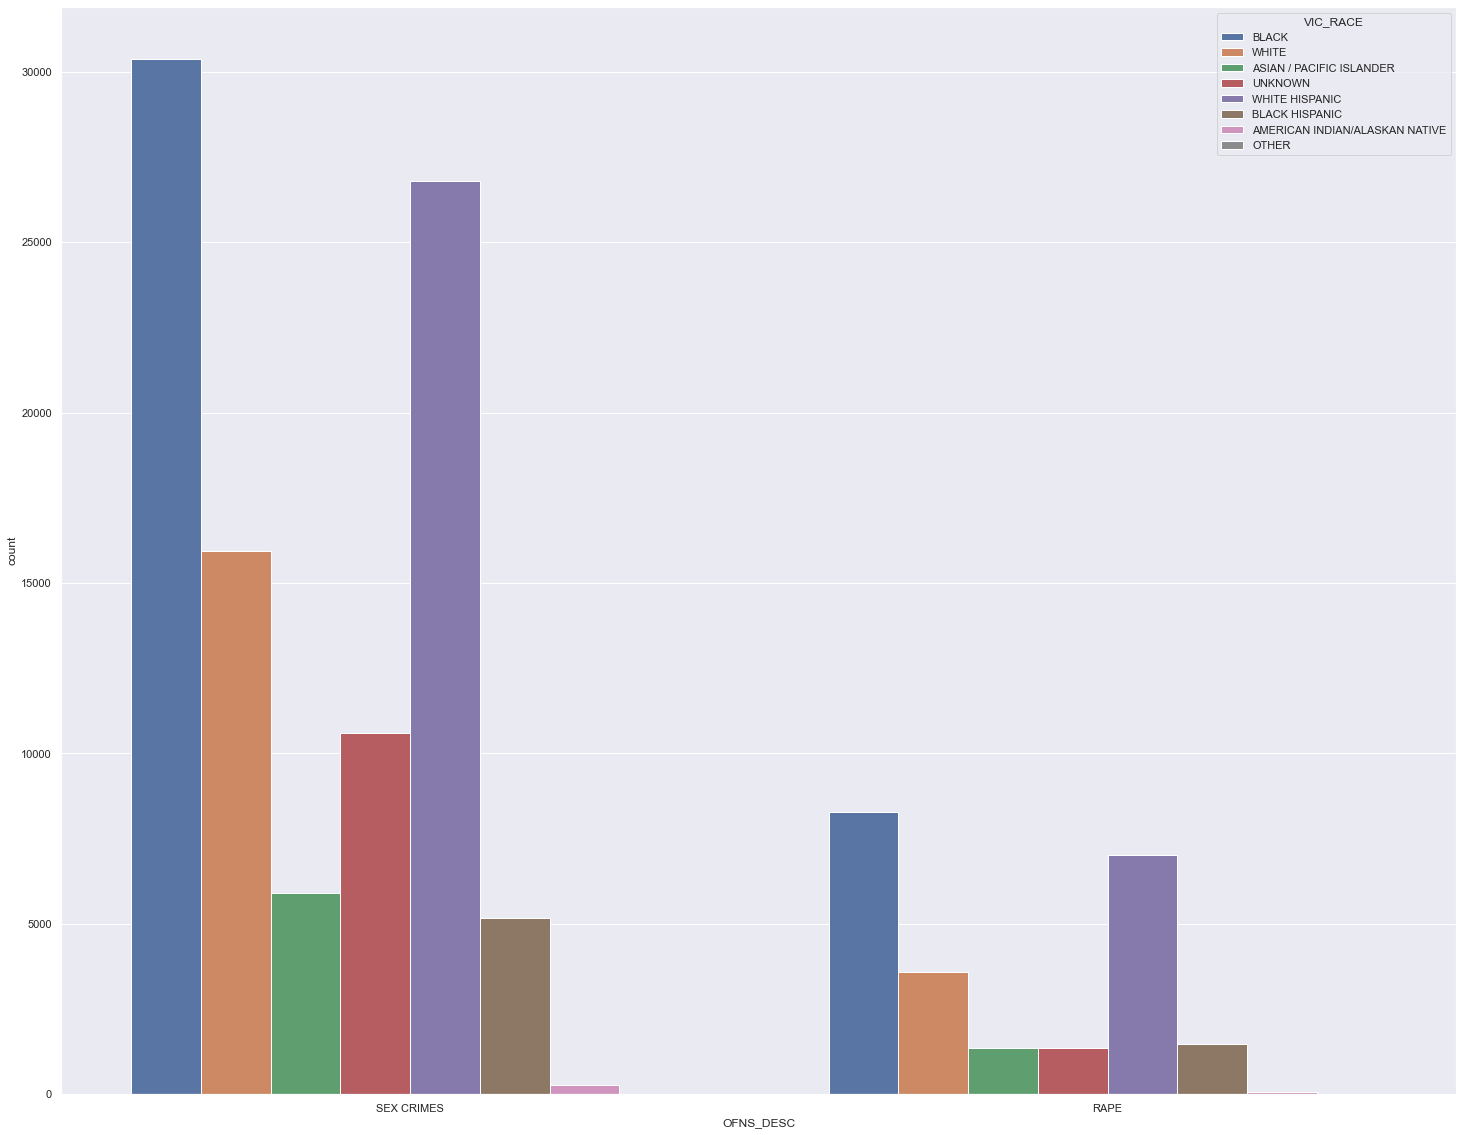

In [80]:
sns.countplot(data = df, x = 'OFNS_DESC', hue = 'VIC_RACE')

For Sex Crimes most victims are individuals who identify as Black, White Hispanic and White. For Rape, most victims are individuals who identify as Black and White Hispanic.

<AxesSubplot:xlabel='OFNS_DESC', ylabel='count'>

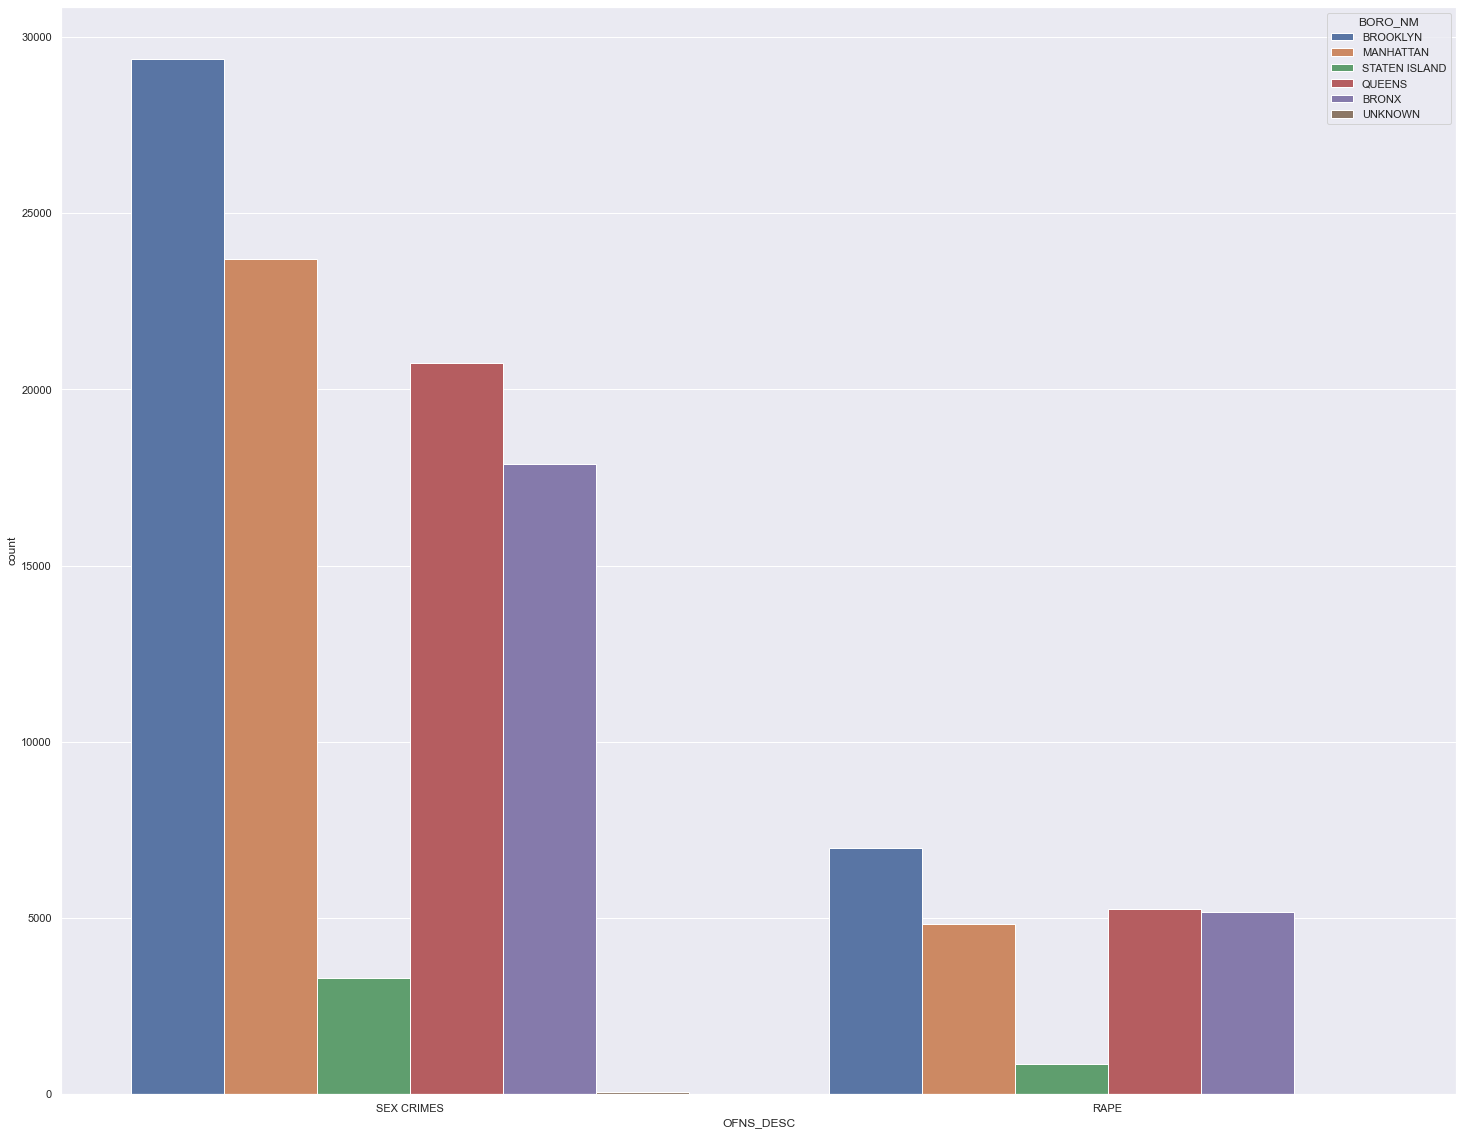

In [81]:
sns.countplot(data = df, x = 'OFNS_DESC', hue = 'BORO_NM')

Rapes occur in all boroughs almost equally (except Staten Island) whereas Sex Crimes differ significantly with the highest number occuring in Brooklyn followed by Manhattan.

<AxesSubplot:xlabel='OFNS_DESC', ylabel='count'>

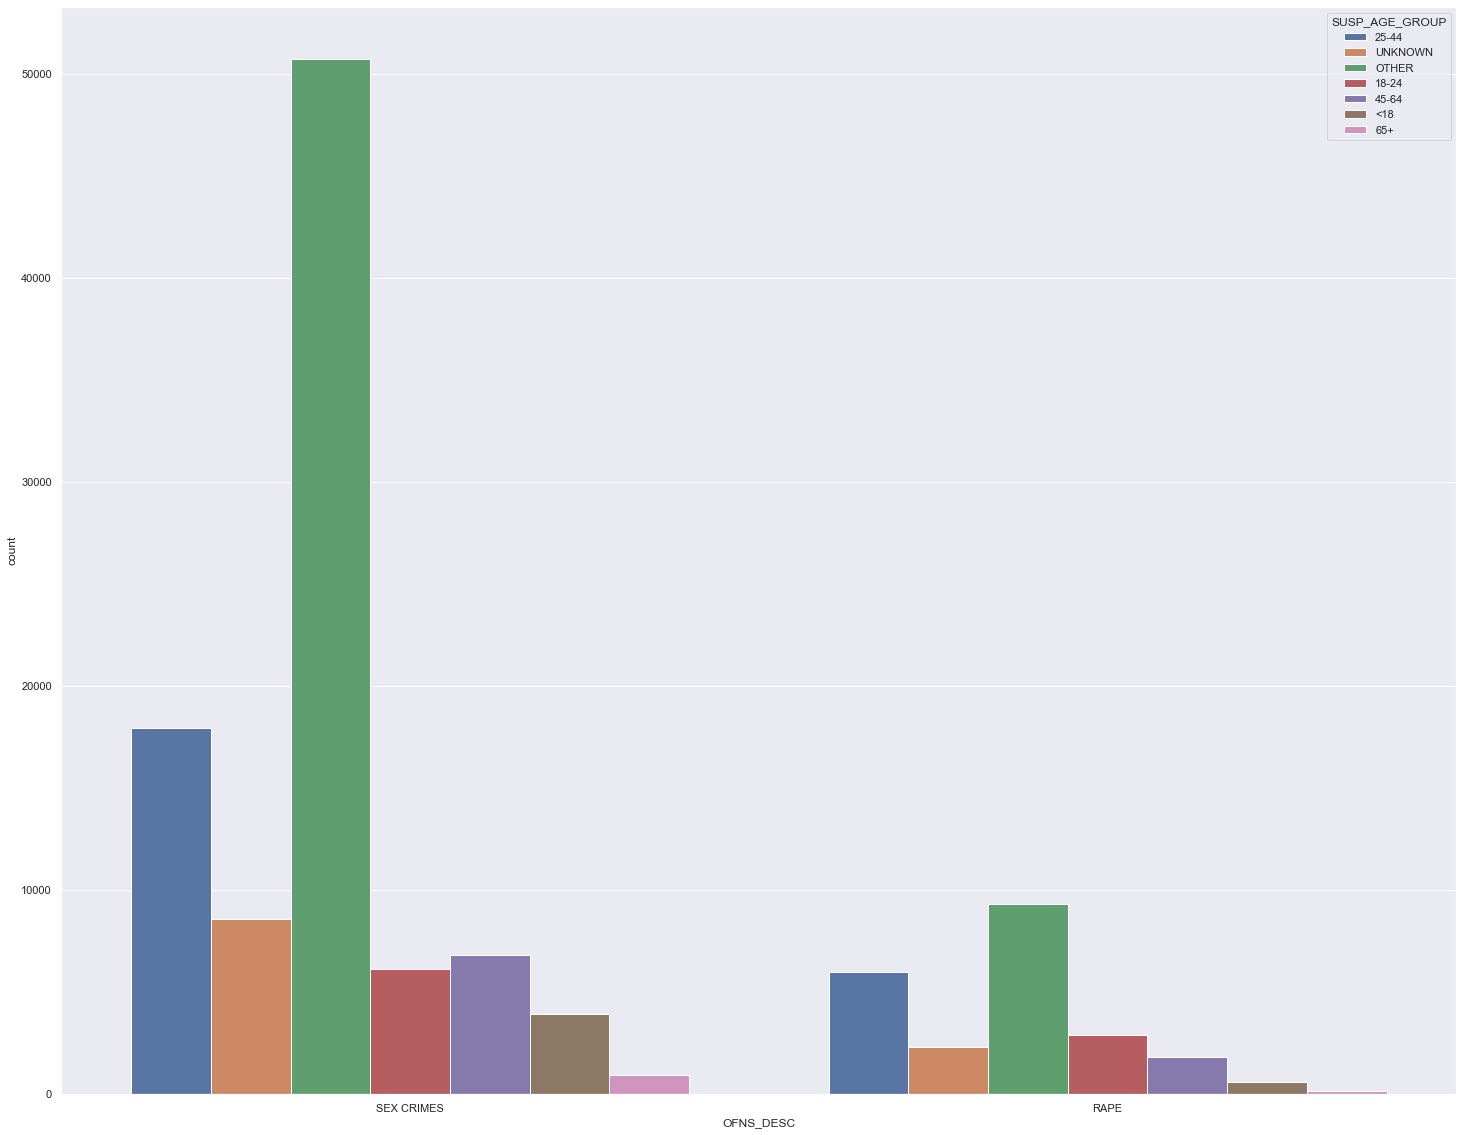

In [82]:
sns.countplot(data = df, x = 'OFNS_DESC', hue = 'SUSP_AGE_GROUP')

Most sex crimes and rapes have suspects with unknown age group, followed by suspects who are aged between 25 and 44.

<AxesSubplot:xlabel='OFNS_DESC', ylabel='count'>

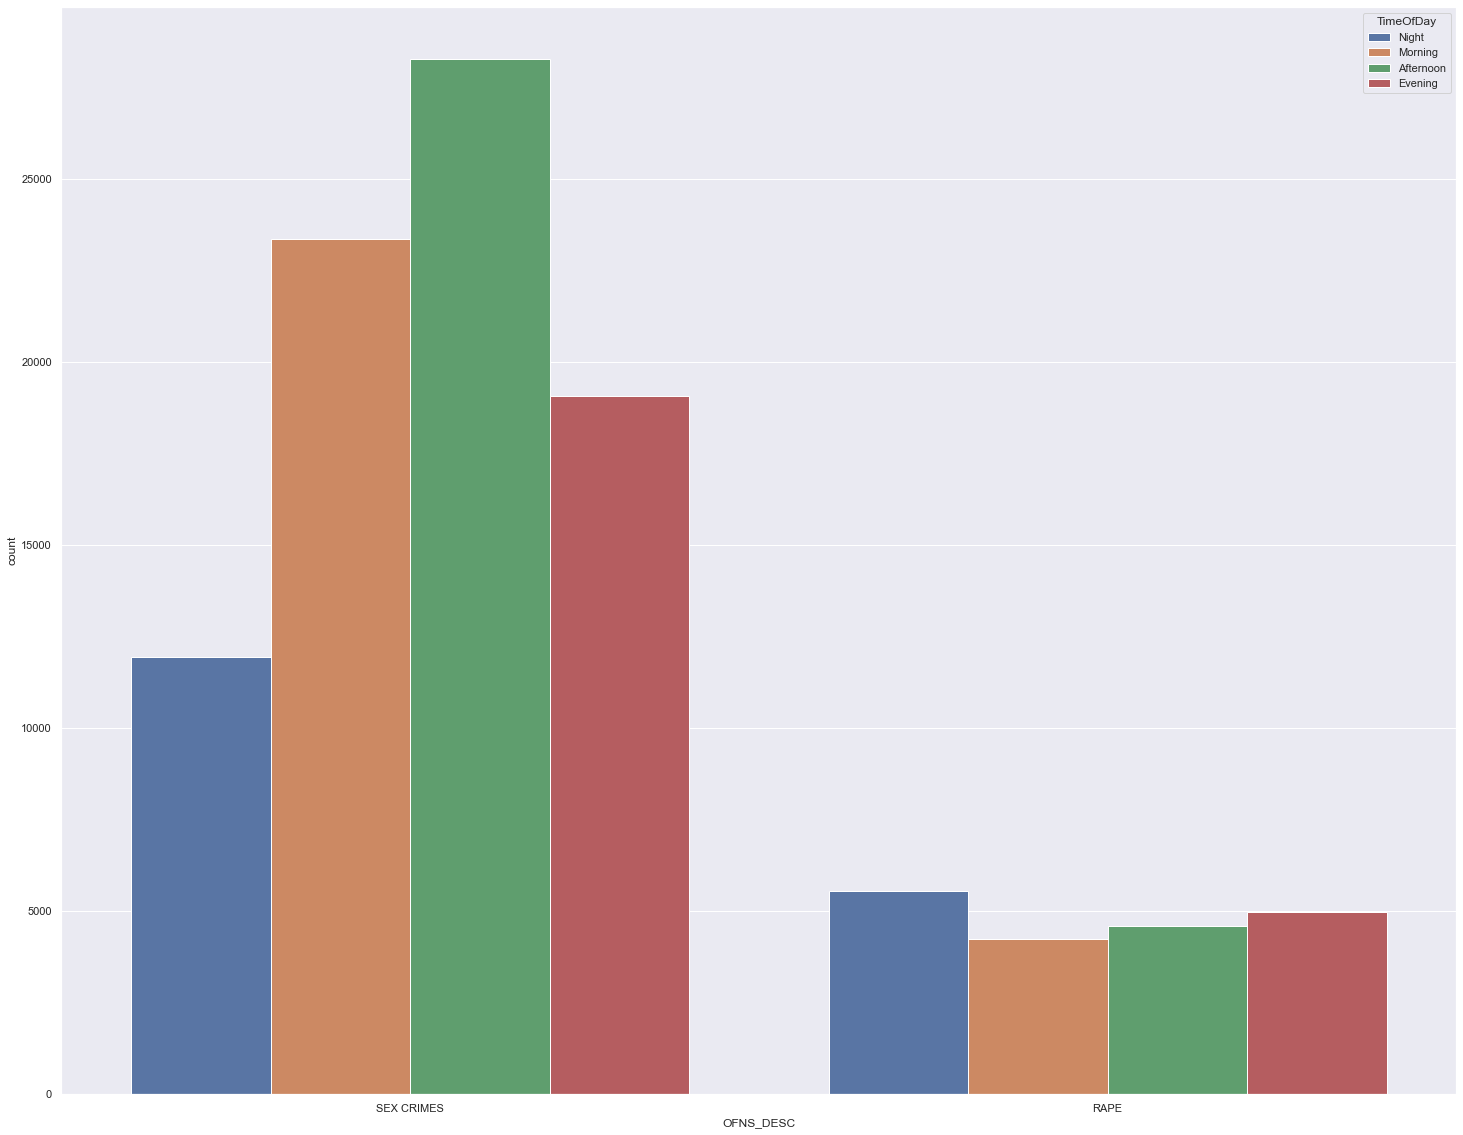

In [83]:
sns.countplot(data = df, x = 'OFNS_DESC', hue = 'TimeOfDay')

Rapes mostly occur at all times of the day (slightly higher at night) whereas sex crimes majorly occur during the afternoon followed by morning.

<AxesSubplot:xlabel='OFNS_DESC', ylabel='count'>

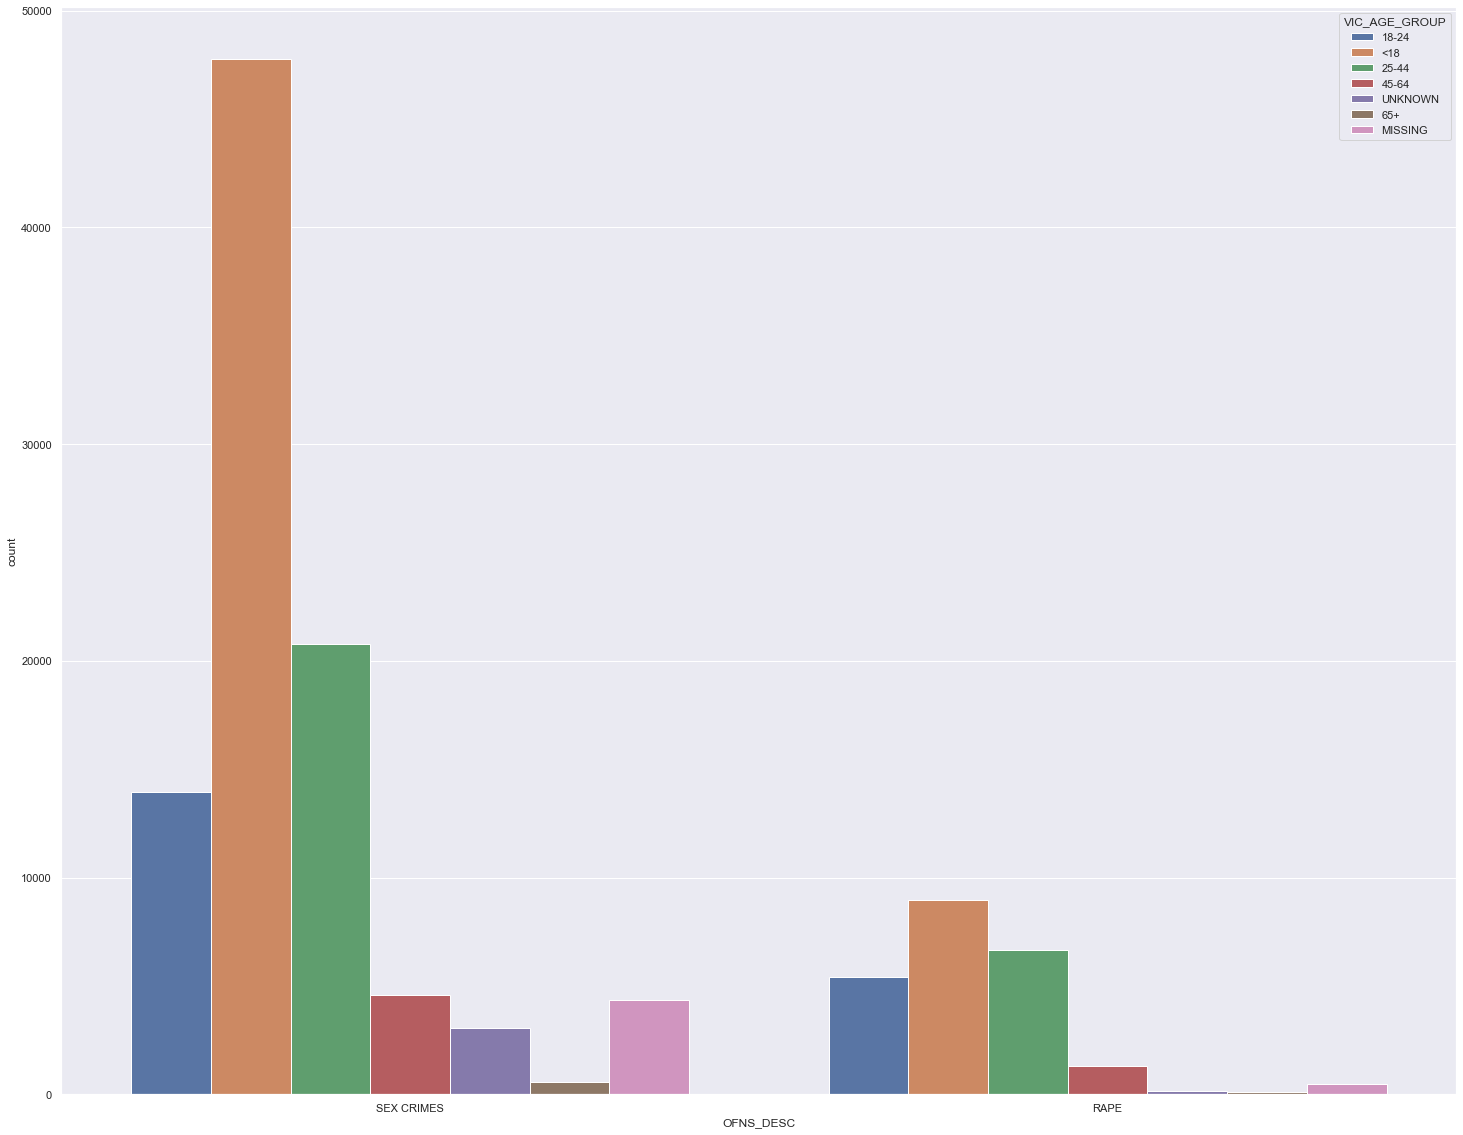

In [84]:
sns.countplot(data = df, x = 'OFNS_DESC', hue = 'VIC_AGE_GROUP')

For sex crimes, the age group below 18 is significantly more vulnerable. For Rapes, the age group below 18 is most vulnerable followed by the 25 to 44 age group. 

<AxesSubplot:xlabel='OFNS_DESC', ylabel='count'>

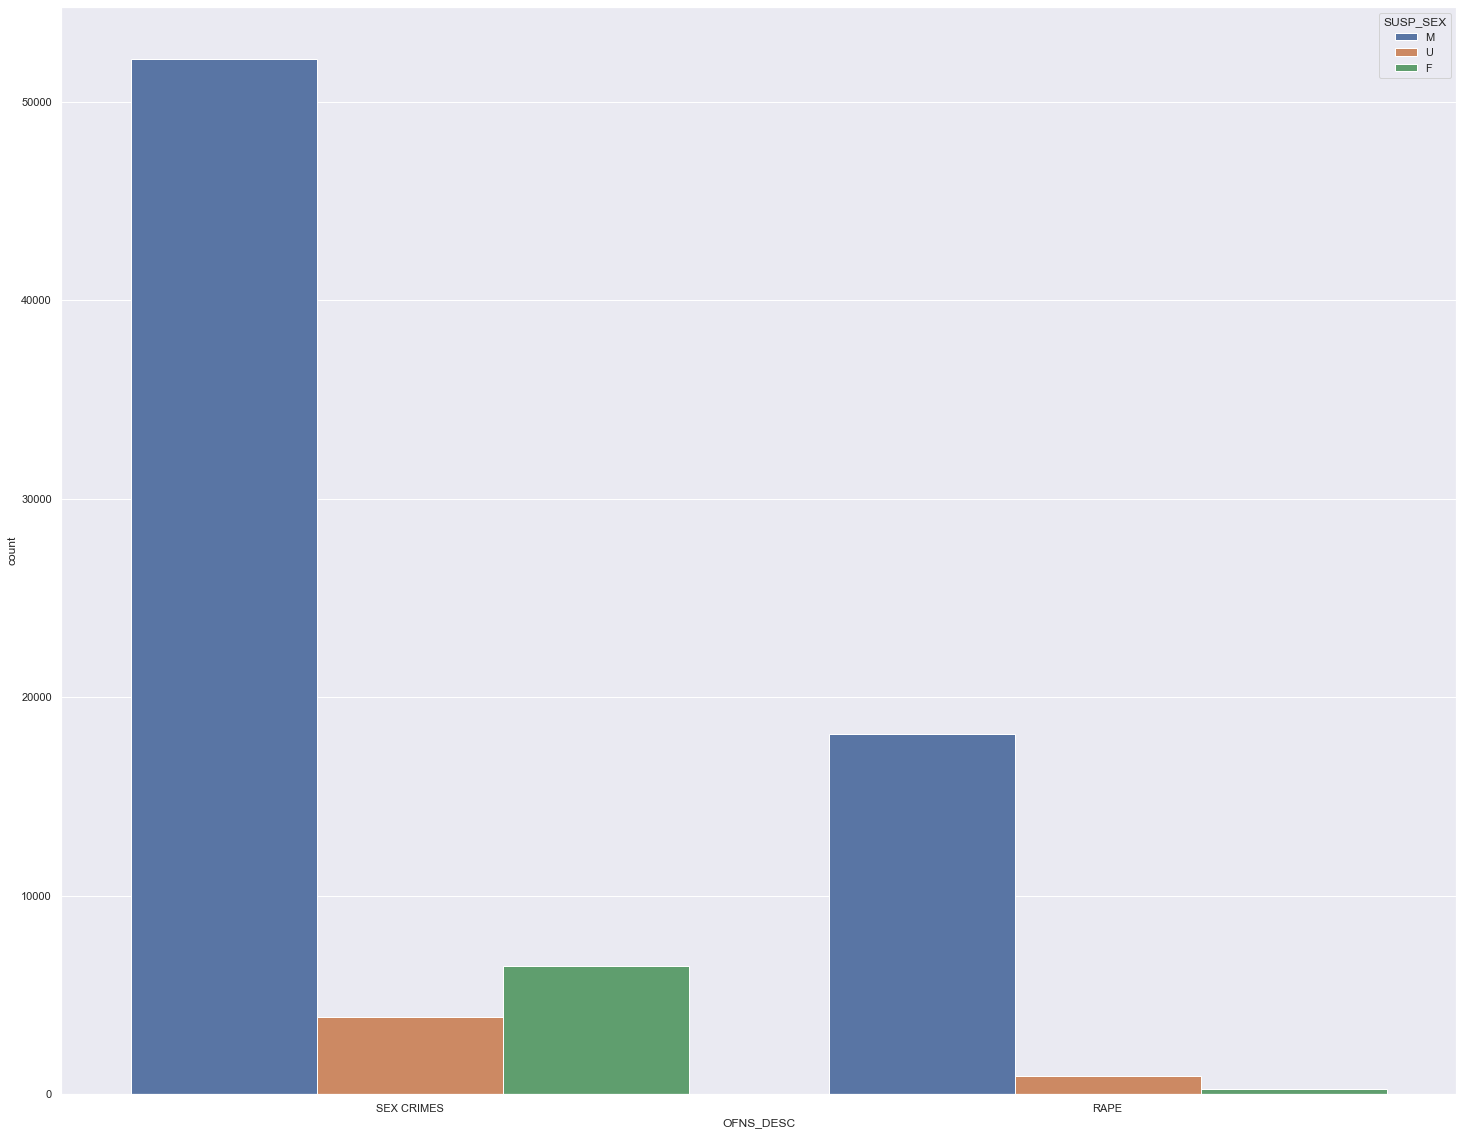

In [85]:
sns.countplot(data = df, x = 'OFNS_DESC', hue = 'SUSP_SEX')

Suspects of sex crimes and rapes are most likeley Male.

<AxesSubplot:xlabel='OFNS_DESC', ylabel='count'>

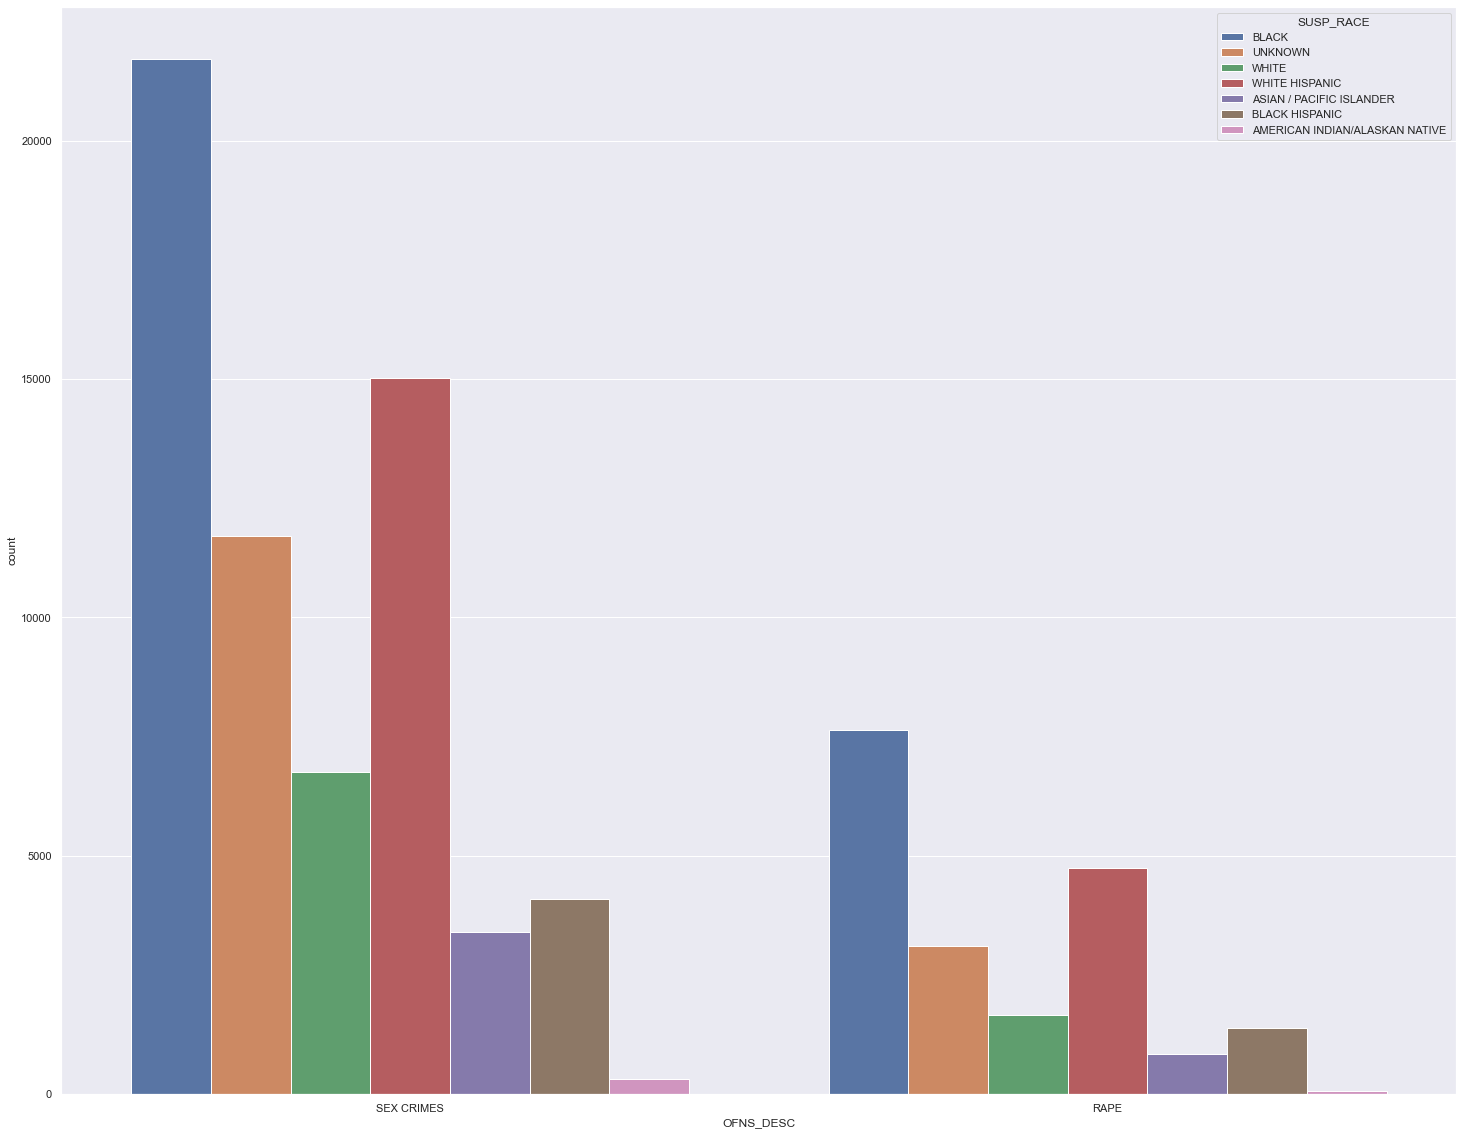

In [86]:
sns.countplot(data = df, x = 'OFNS_DESC', hue = 'SUSP_RACE')

Suspects race is mostly categorized as Black individuals followed by White Hispanic. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'RESIDENCE - APT. HOUSE'),
  Text(1, 0, 'RESIDENCE-HOUSE'),
  Text(2, 0, 'STREET'),
  Text(3, 0, 'RESIDENCE - PUBLIC HOUSING'),
  Text(4, 0, 'TRANSIT - NYC SUBWAY'),
  Text(5, 0, 'OTHER'),
  Text(6, 0, 'PUBLIC SCHOOL'),
  Text(7, 0, 'HOTEL/MOTEL'),
  Text(8, 0, 'PARK/PLAYGROUND'),
  Text(9, 0, 'HOSPITAL')])

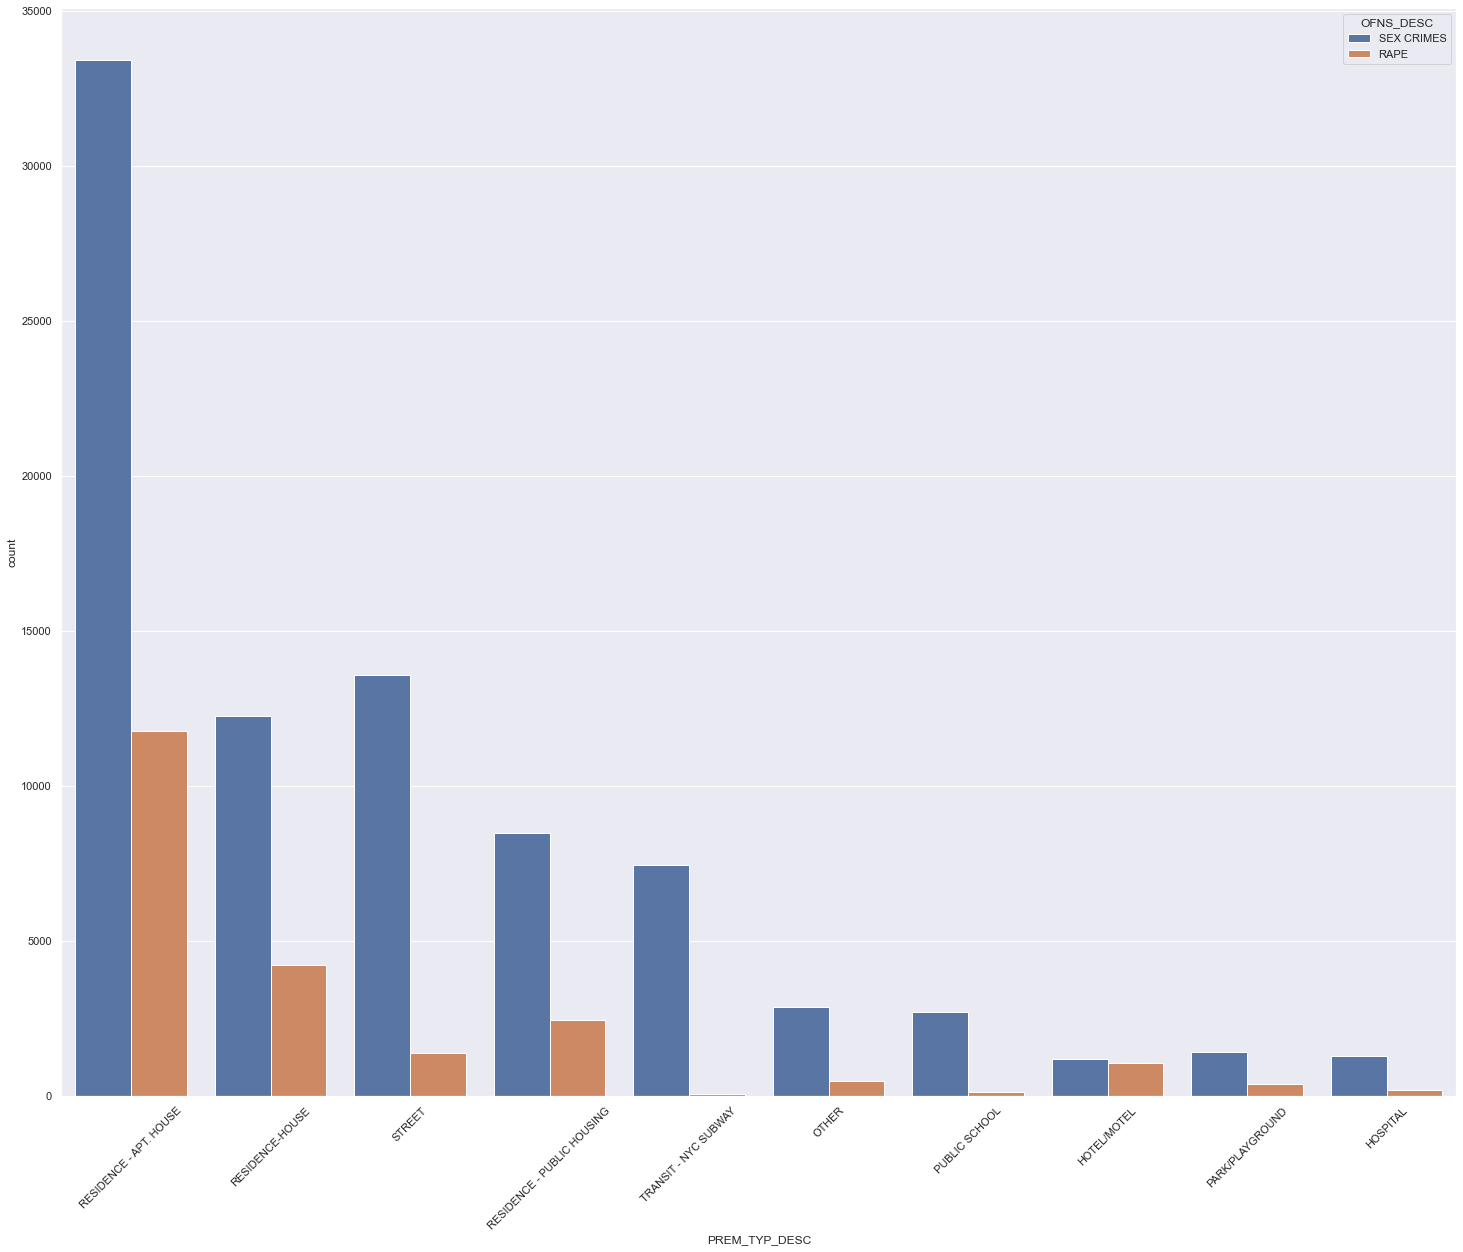

In [87]:
sns.countplot(data = df, hue = 'OFNS_DESC', x = 'PREM_TYP_DESC', order=pd.value_counts(df["PREM_TYP_DESC"]).iloc[:10].index)
plt.xticks(rotation=45)

At most locations, the number of sex crimes occuring is significantly higher than rapes but at a hotels/motels the number of sex crimes and rapes are almost equal.

<AxesSubplot:xlabel='OFNS_DESC', ylabel='count'>

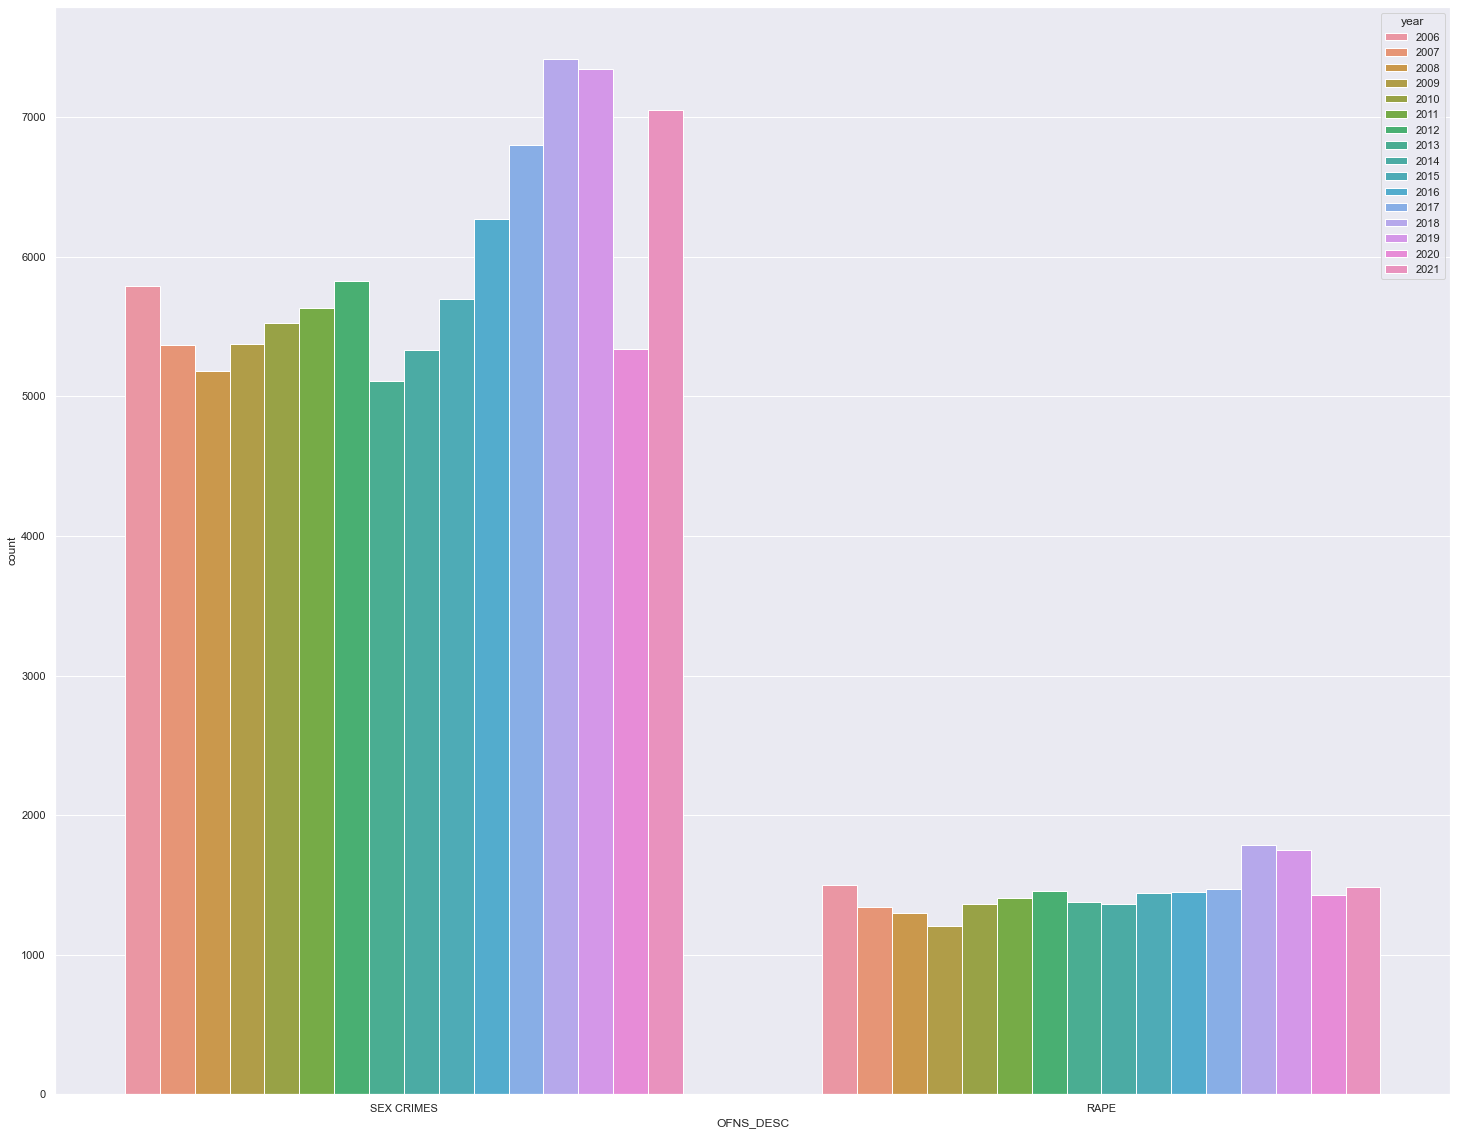

In [88]:
sns.countplot(data = df, x = 'OFNS_DESC', hue = 'year')

The number of sex crimes reported was highest between 2018-19 and there is a significant difference between the number of sex crimes over the years whereas number of rapes reported have been fairly constant with a peak in 2018-19.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'RESIDENCE - APT. HOUSE'),
  Text(1, 0, 'RESIDENCE-HOUSE'),
  Text(2, 0, 'STREET'),
  Text(3, 0, 'RESIDENCE - PUBLIC HOUSING'),
  Text(4, 0, 'TRANSIT - NYC SUBWAY'),
  Text(5, 0, 'OTHER'),
  Text(6, 0, 'PUBLIC SCHOOL'),
  Text(7, 0, 'HOTEL/MOTEL'),
  Text(8, 0, 'PARK/PLAYGROUND'),
  Text(9, 0, 'HOSPITAL')])

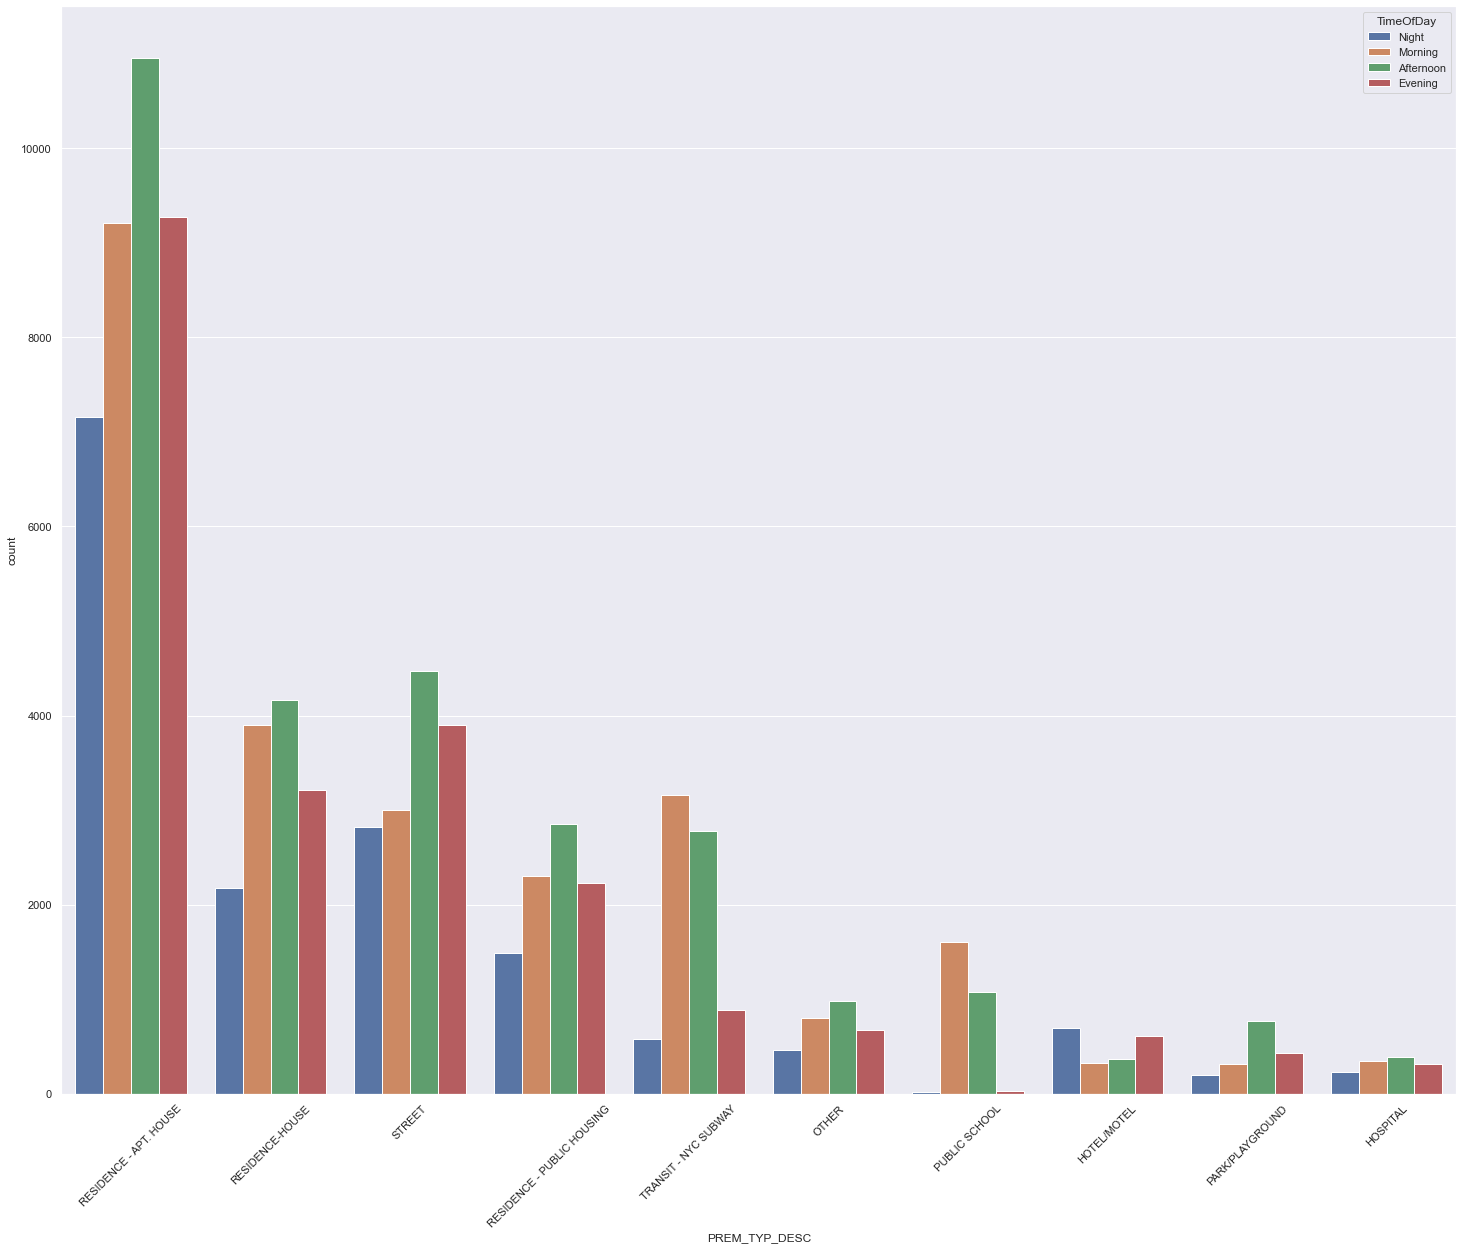

In [89]:
sns.countplot(data = df, hue = 'TimeOfDay', x = 'PREM_TYP_DESC', order=pd.value_counts(df["PREM_TYP_DESC"]).iloc[:10].index)
plt.xticks(rotation=45)

Most crimes occur in the afternoon at most locations except the NYC Transit Subway system where crimes mostly occur in the morning and hotels/motels where most of the crimes occur at night, followed by evenings. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SEXUAL ABUSE 3,2'),
  Text(1, 0, 'CHILD, ENDANGERING WELFARE'),
  Text(2, 0, 'RAPE 1'),
  Text(3, 0, 'SODOMY 1'),
  Text(4, 0, 'SEXUAL ABUSE'),
  Text(5, 0, 'SEXUAL MISCONDUCT,INTERCOURSE'),
  Text(6, 0, 'AGGRAVATED SEXUAL ASBUSE'),
  Text(7, 0, 'RAPE 3'),
  Text(8, 0, 'RAPE 1,ATTEMPT'),
  Text(9, 0, 'RAPE 2')])

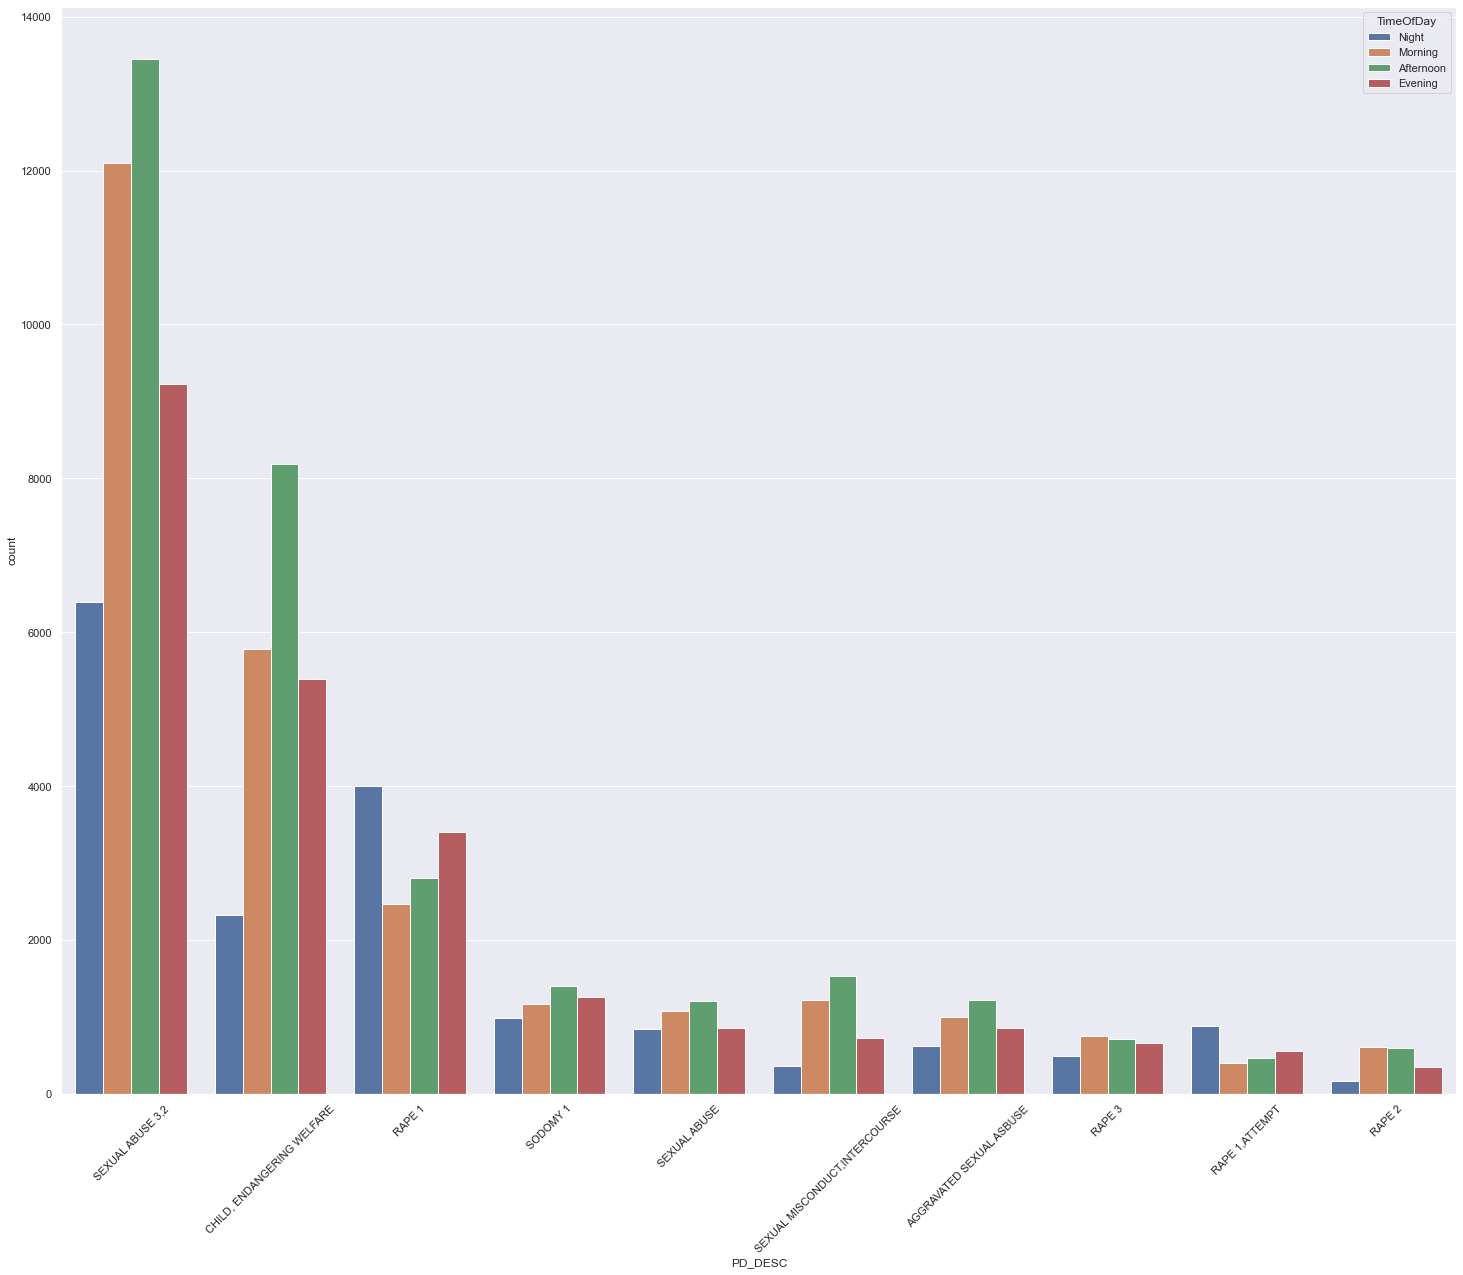

In [90]:
sns.countplot(data = df, hue = 'TimeOfDay', x = 'PD_DESC', order=pd.value_counts(df["PD_DESC"]).iloc[:10].index)
plt.xticks(rotation=45)

Rape 1 and Rape 1 attempts primarily occurs in the evening and night, Rape 2 occurs primarily both in the afternoon and morning hours. All other categories primarily occur during the afternoon.

(array([0, 1]), [Text(0, 0, 'COMPLETED'), Text(1, 0, 'ATTEMPTED')])

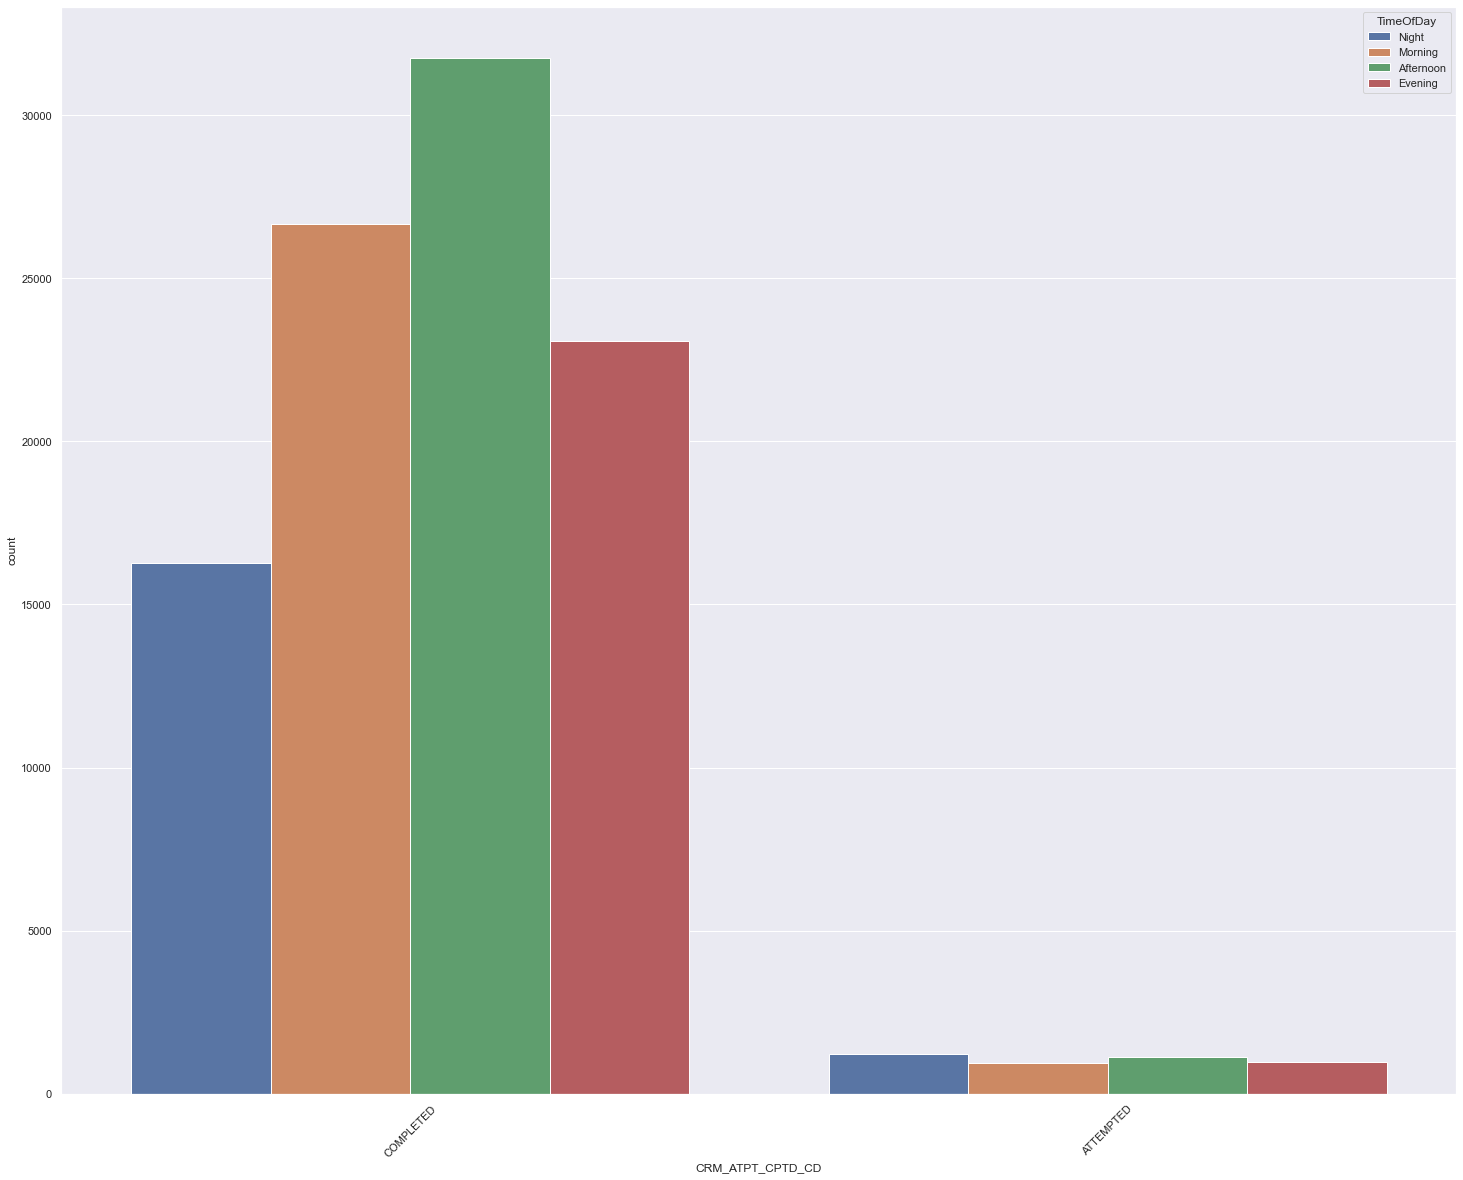

In [91]:
sns.countplot(data = df, hue = 'TimeOfDay', x = 'CRM_ATPT_CPTD_CD')
plt.xticks(rotation=45)

Sexual Harassment crimes are attempted throughout the day almost equally whereas completed crimes begin in the afternoon.

(array([0, 1]), [Text(0, 0, 'MISDEMEANOR'), Text(1, 0, 'FELONY')])

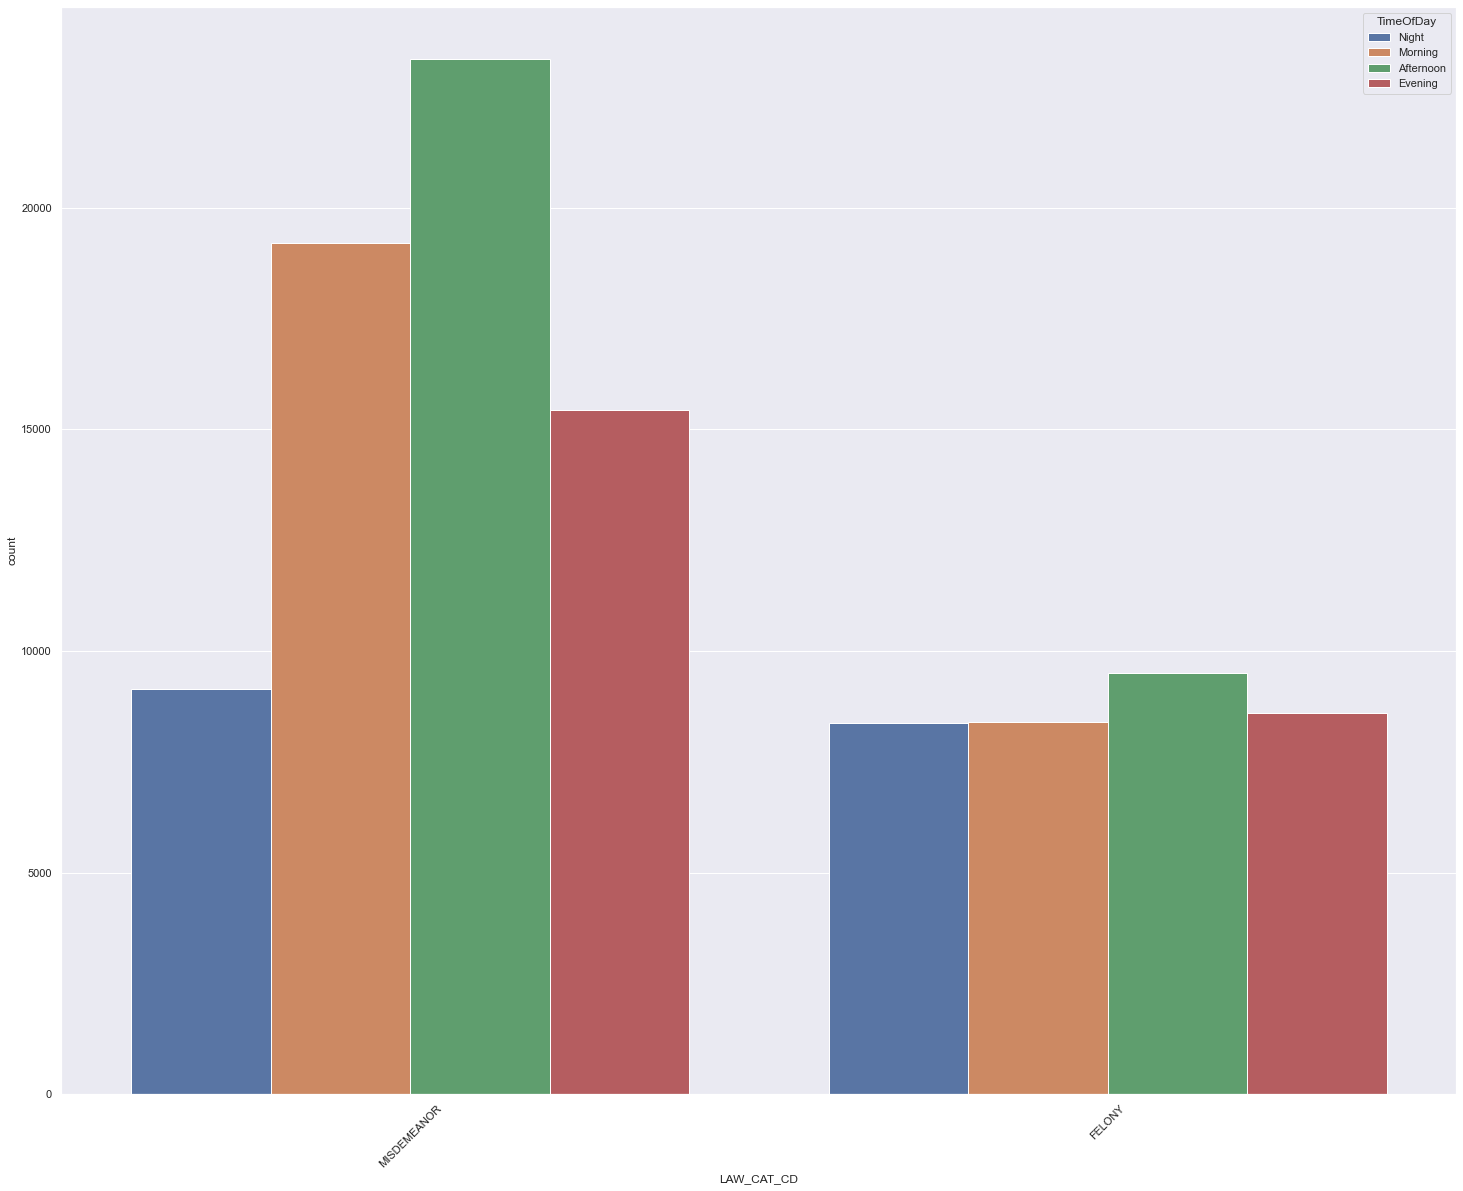

In [92]:
sns.countplot(data = df, hue = 'TimeOfDay', x = 'LAW_CAT_CD')
plt.xticks(rotation=45)

Sexual Harassment crimes are attempted throughout the day almost equally whereas completed crimes begin in the afternoon. 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'BROOKLYN'),
  Text(1, 0, 'MANHATTAN'),
  Text(2, 0, 'STATEN ISLAND'),
  Text(3, 0, 'QUEENS'),
  Text(4, 0, 'BRONX'),
  Text(5, 0, 'UNKNOWN')])

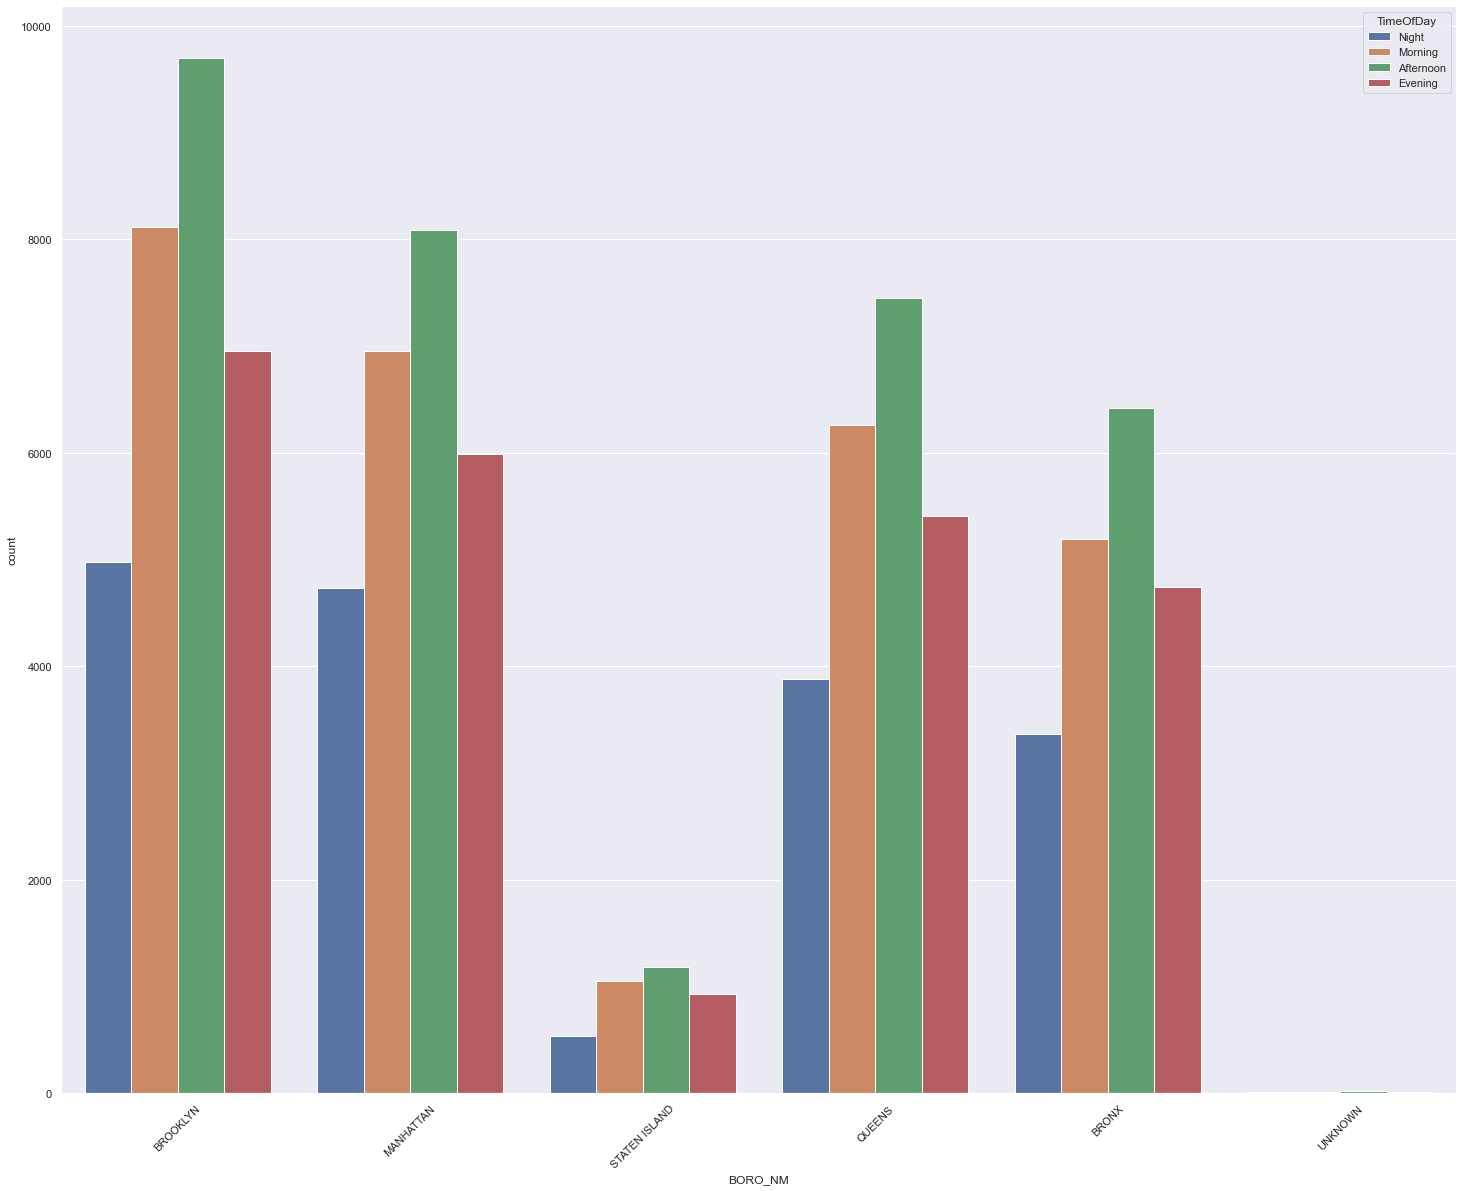

In [93]:
sns.countplot(data = df, hue = 'TimeOfDay', x = 'BORO_NM')
plt.xticks(rotation=45)

All the boroughs follow the same trend for different times of the day.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'INSIDE'),
  Text(1, 0, 'FRONT OF'),
  Text(2, 0, 'UNKNOWN'),
  Text(3, 0, 'REAR OF'),
  Text(4, 0, 'OPPOSITE OF')])

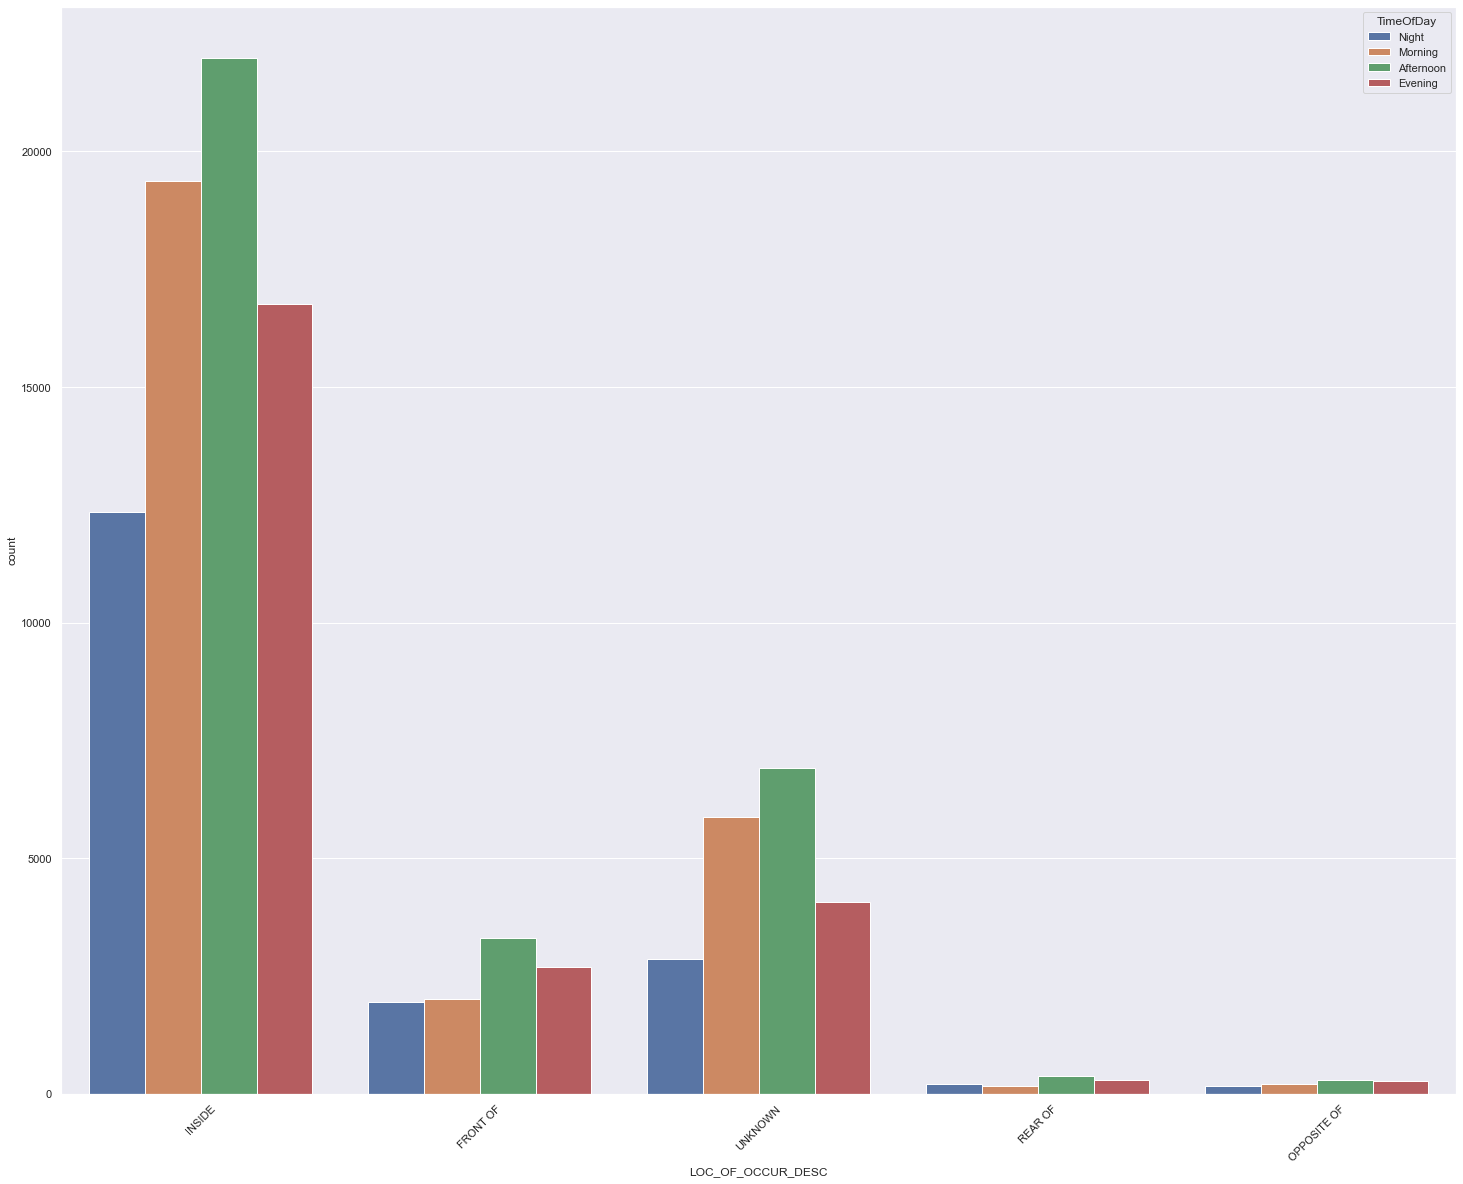

In [94]:
sns.countplot(data = df, hue = 'TimeOfDay', x = 'LOC_OF_OCCUR_DESC')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'N.Y. POLICE DEPT'),
  Text(1, 0, 'N.Y. HOUSING POLICE'),
  Text(2, 0, 'N.Y. TRANSIT POLICE'),
  Text(3, 0, 'PORT AUTHORITY'),
  Text(4, 0, 'OTHER'),
  Text(5, 0, 'DEPT OF CORRECTIONS'),
  Text(6, 0, 'HEALTH & HOSP CORP'),
  Text(7, 0, 'POLICE DEPT NYC'),
  Text(8, 0, 'NYC PARKS'),
  Text(9, 0, 'N.Y. STATE POLICE')])

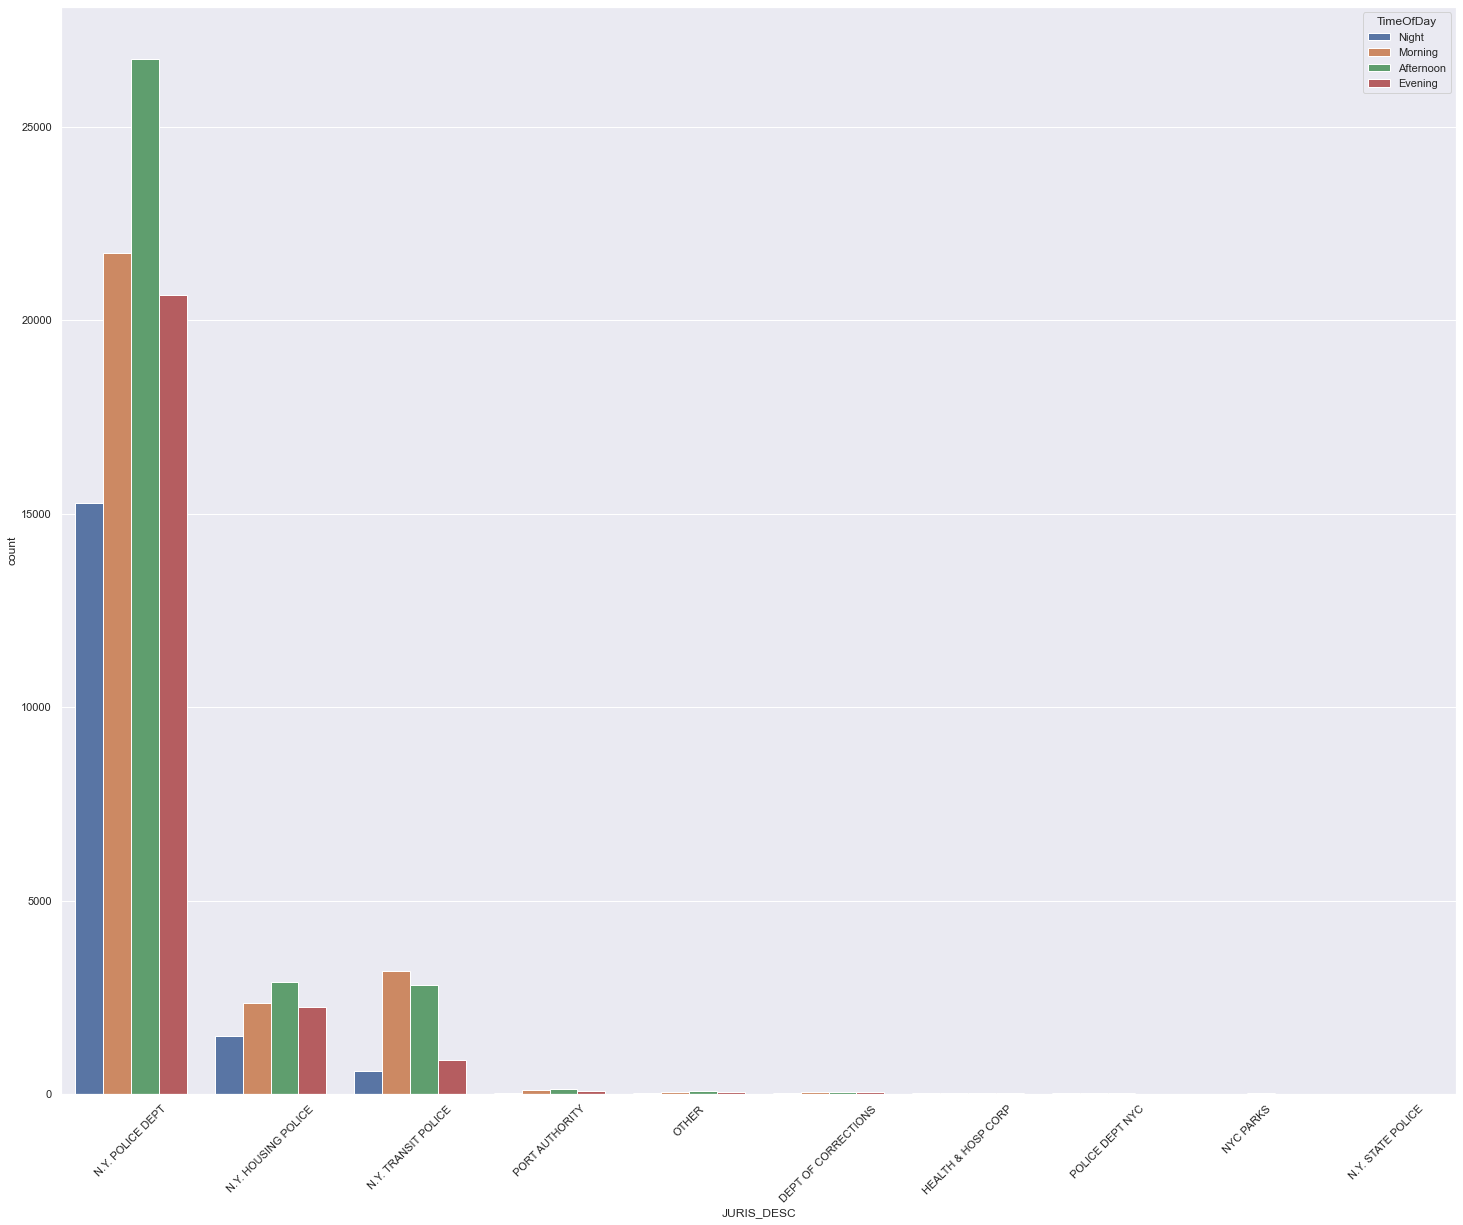

In [95]:
sns.countplot(data = df, hue = 'TimeOfDay', x = 'JURIS_DESC', order=pd.value_counts(df["JURIS_DESC"]).iloc[:10].index)
plt.xticks(rotation=45)

Sexual Harassment crimes which come under NYPD and NY Housing Police mostly occur in the afternoon and morning whereas the crimes that come under NY Transit Police are higher in the morning (although rush hour is morning and evening!)

<AxesSubplot:xlabel='SUSP_AGE_GROUP', ylabel='count'>

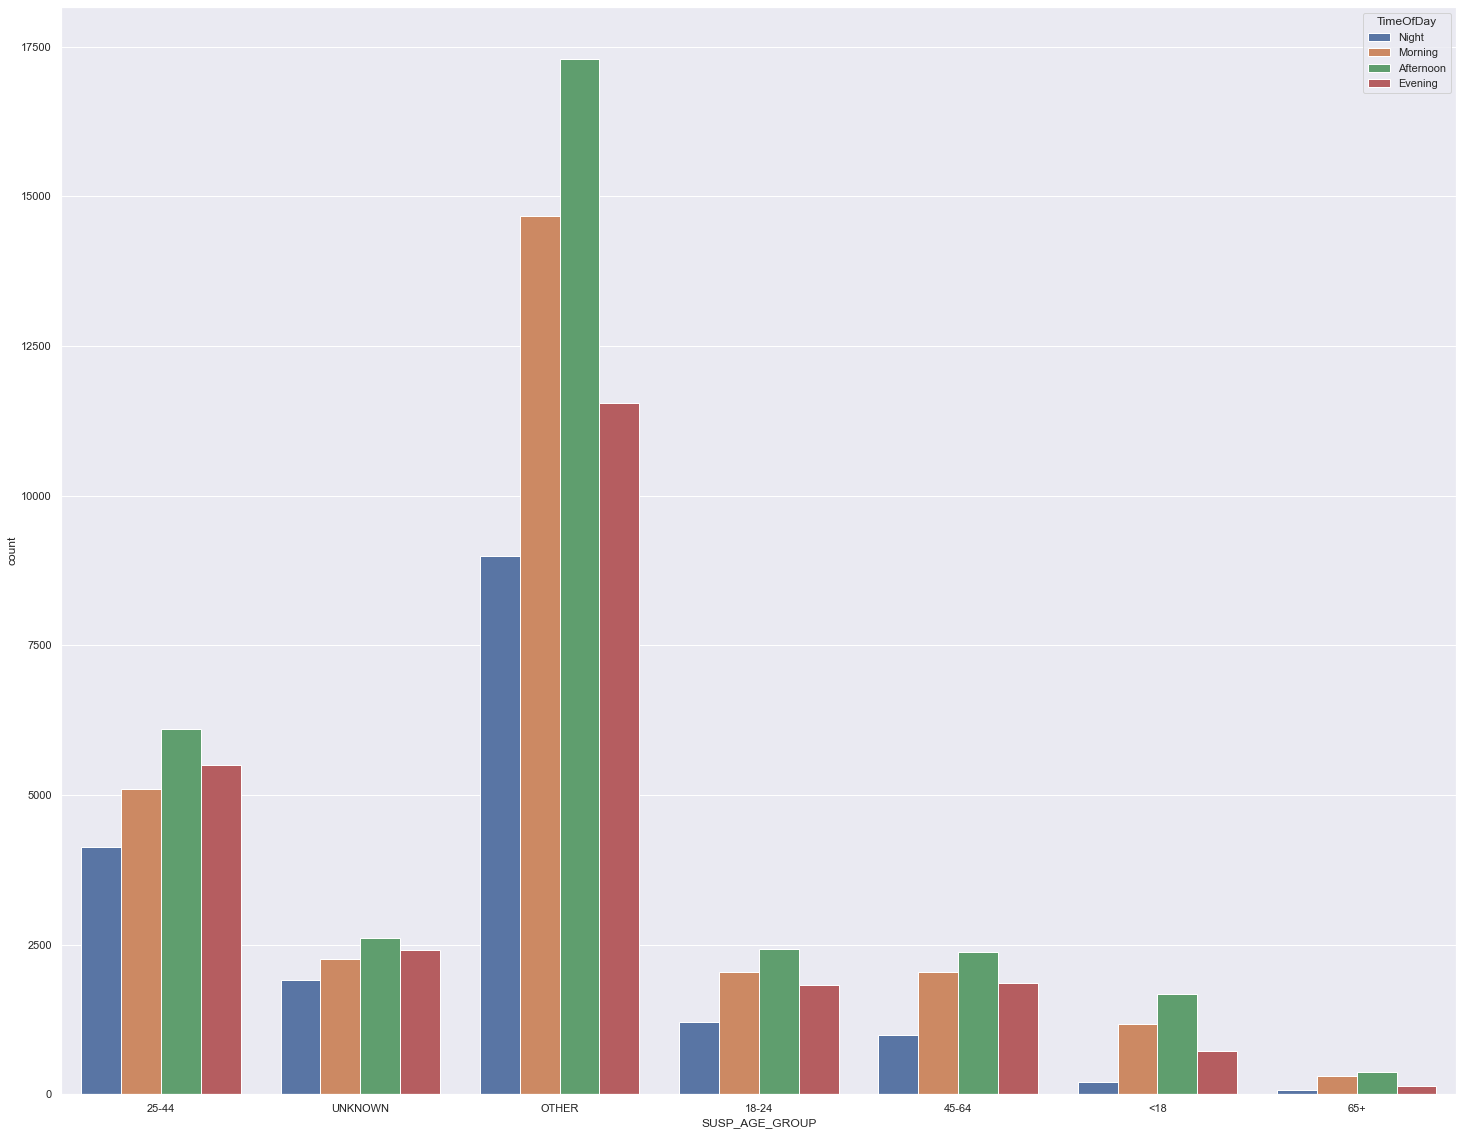

In [96]:
sns.countplot(data = df, hue = 'TimeOfDay', x = 'SUSP_AGE_GROUP')

All the age groups follow the same trend for different times of the day.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'BLACK'),
  Text(1, 0, 'UNKNOWN'),
  Text(2, 0, 'WHITE'),
  Text(3, 0, 'WHITE HISPANIC'),
  Text(4, 0, 'ASIAN / PACIFIC ISLANDER'),
  Text(5, 0, 'BLACK HISPANIC'),
  Text(6, 0, 'AMERICAN INDIAN/ALASKAN NATIVE')])

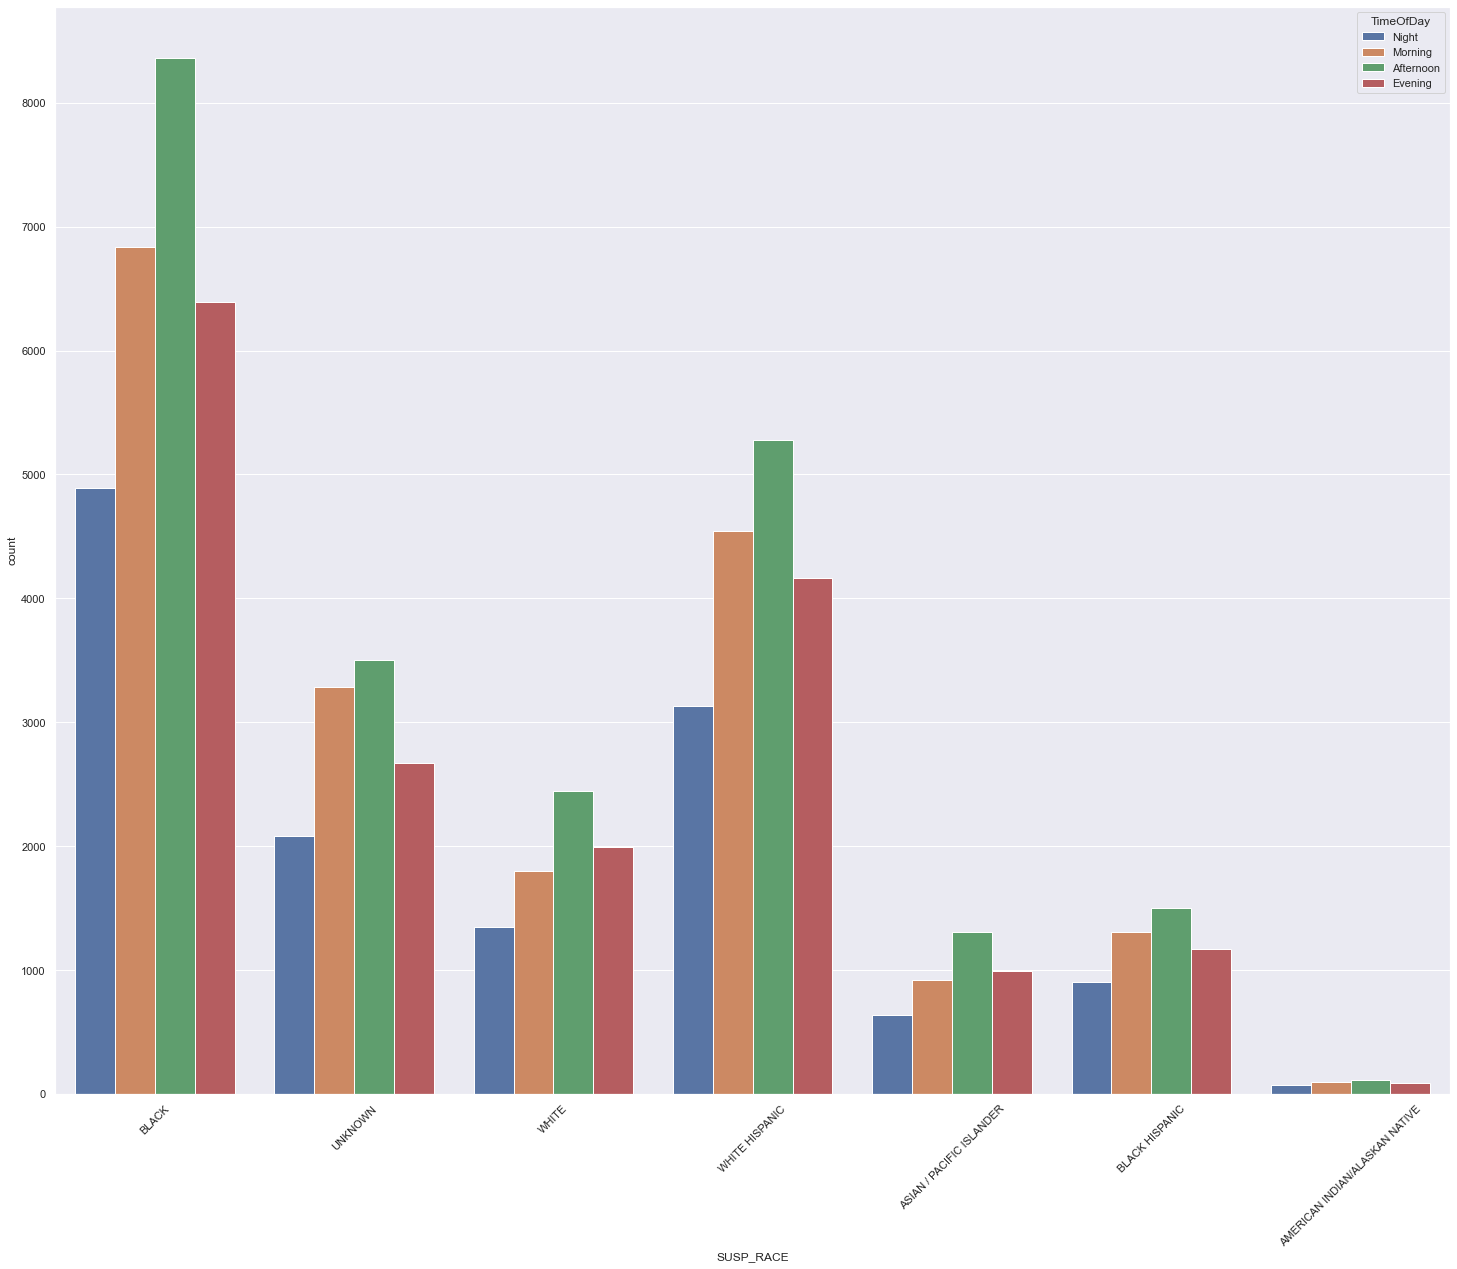

In [97]:
sns.countplot(data = df, hue = 'TimeOfDay', x = 'SUSP_RACE')
plt.xticks(rotation=45)

All the suspect's races follow the same trend for different times of the day.

<AxesSubplot:xlabel='SUSP_SEX', ylabel='count'>

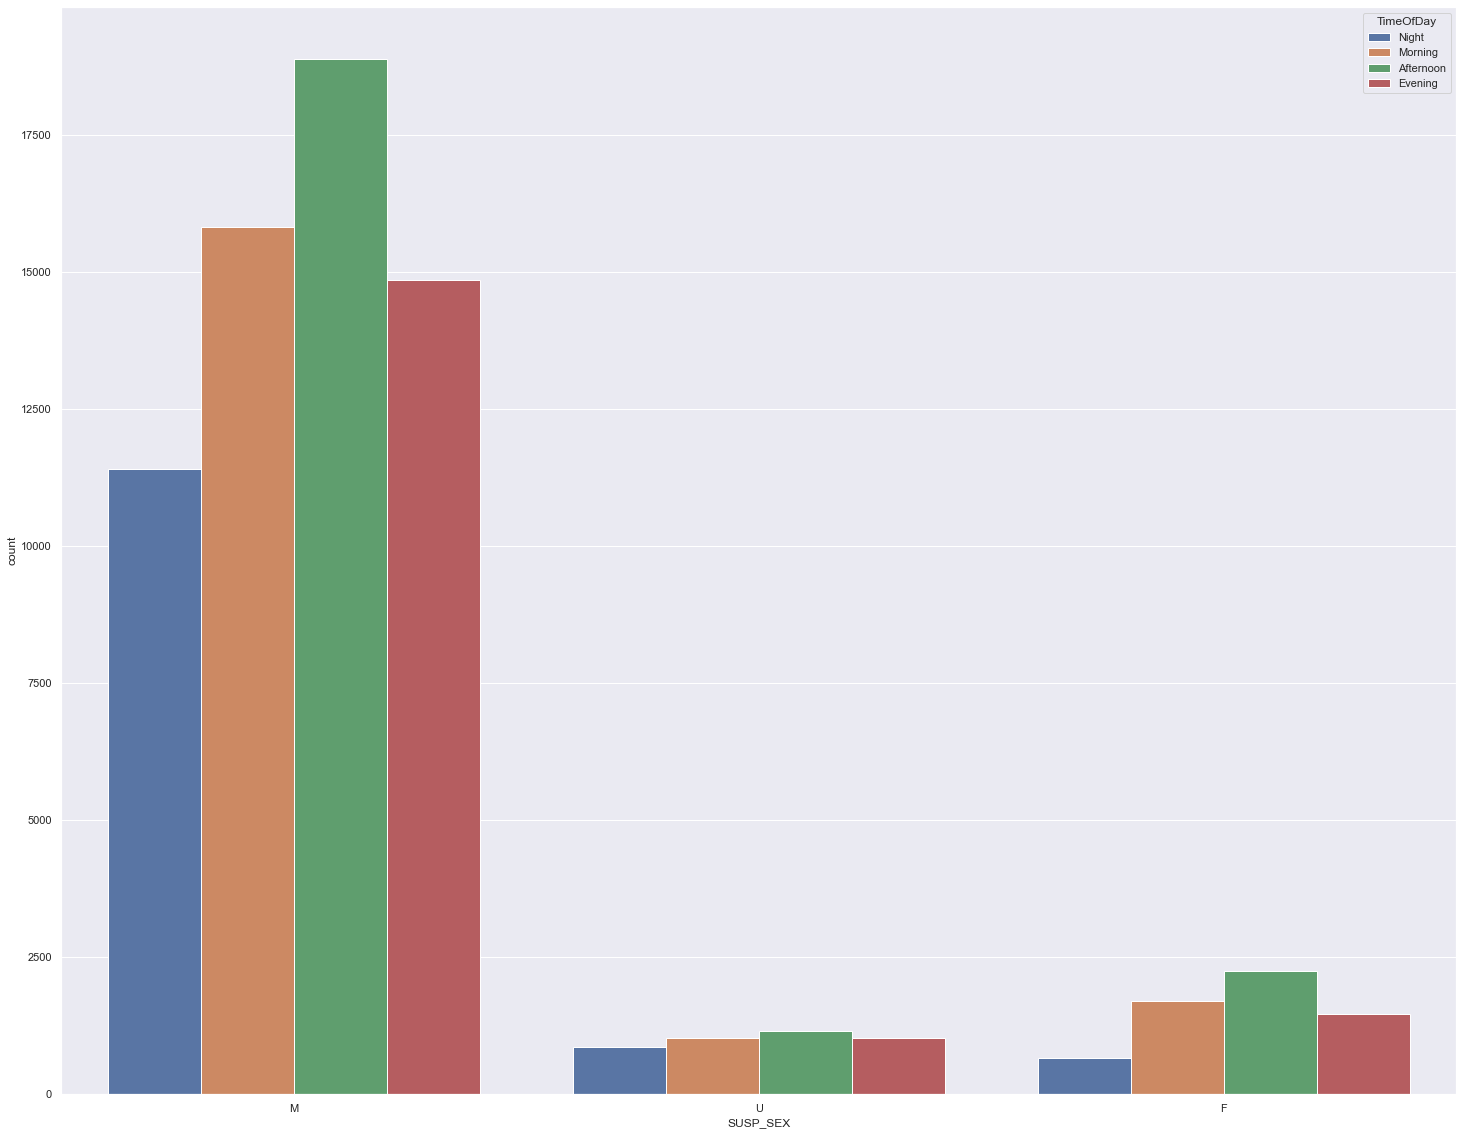

In [98]:
sns.countplot(data = df, hue = 'TimeOfDay', x = 'SUSP_SEX')

All the suspect's sex follow the same trend for different times of the day.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'PATROL BORO BKLYN NORTH'),
  Text(1, 0, 'PATROL BORO MAN NORTH'),
  Text(2, 0, 'PATROL BORO STATEN ISLAND'),
  Text(3, 0, 'PATROL BORO QUEENS NORTH'),
  Text(4, 0, 'PATROL BORO MAN SOUTH'),
  Text(5, 0, 'PATROL BORO BRONX'),
  Text(6, 0, 'PATROL BORO BKLYN SOUTH'),
  Text(7, 0, 'PATROL BORO QUEENS SOUTH'),
  Text(8, 0, 'UNKNOWN')])

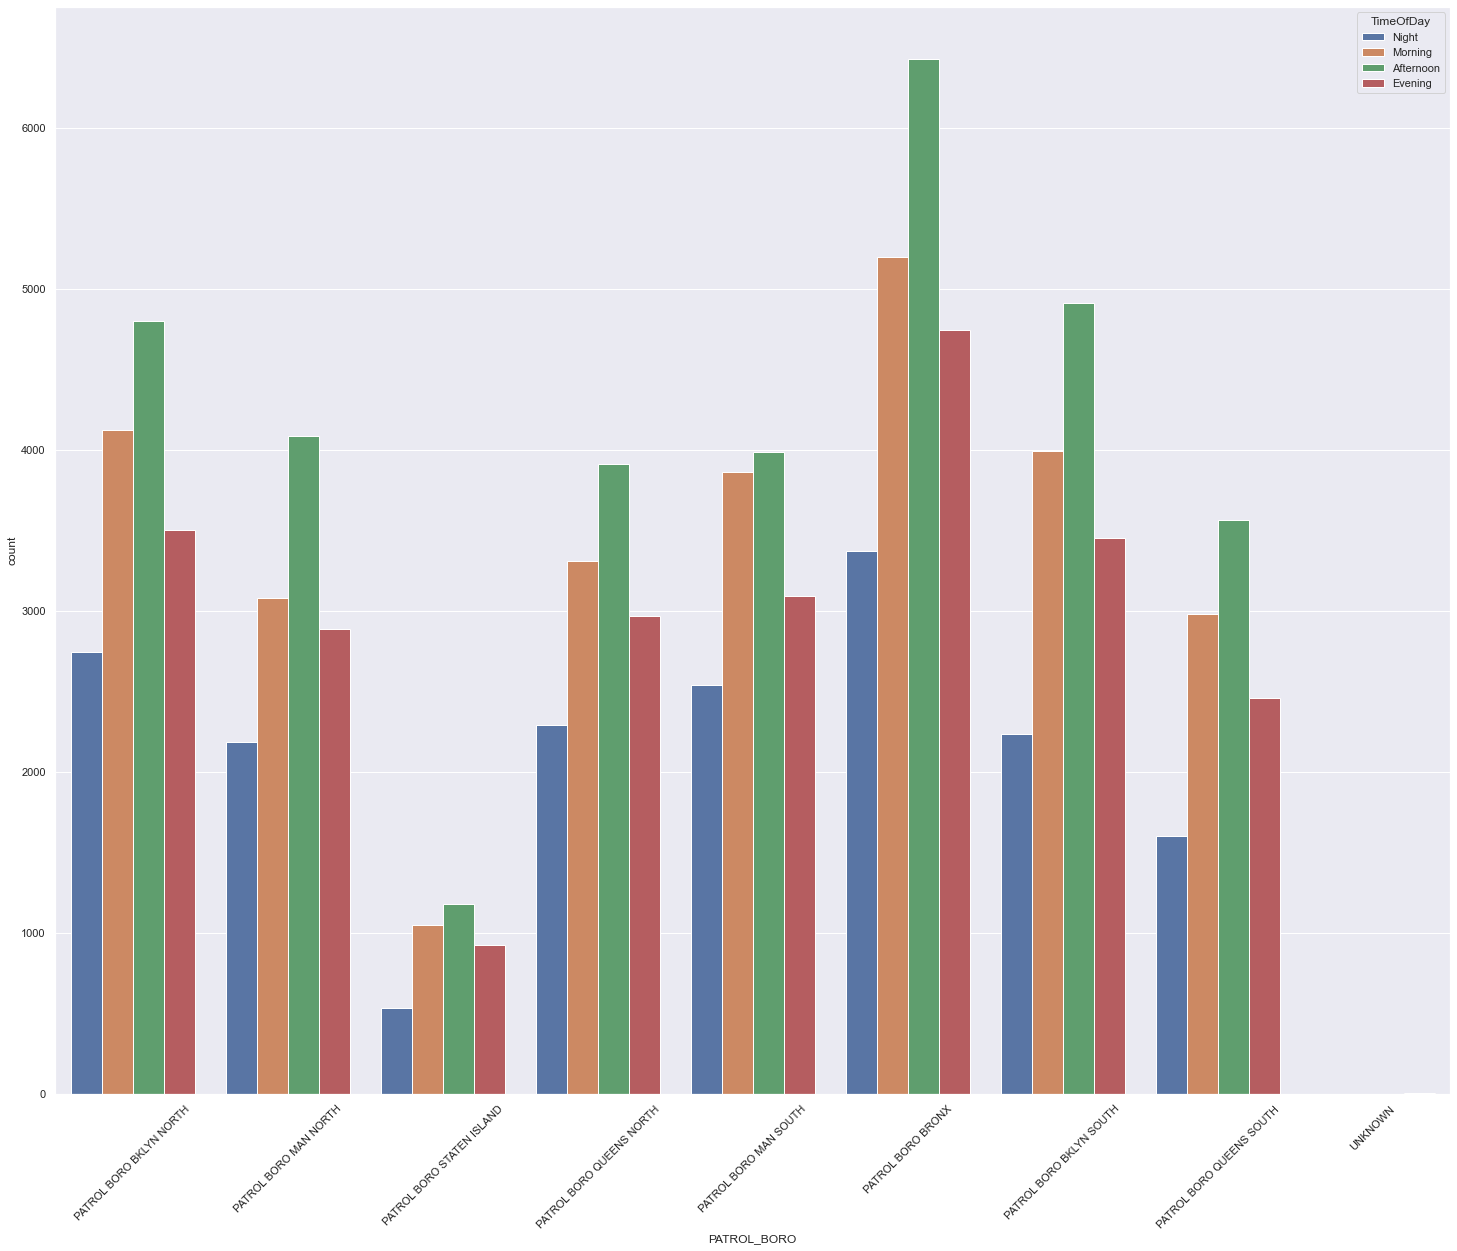

In [99]:
sns.countplot(data = df, hue = 'TimeOfDay', x = 'PATROL_BORO')
plt.xticks(rotation=45)

All Patrol Boroughs follow the same trend for different times of the day.

<AxesSubplot:xlabel='VIC_AGE_GROUP', ylabel='count'>

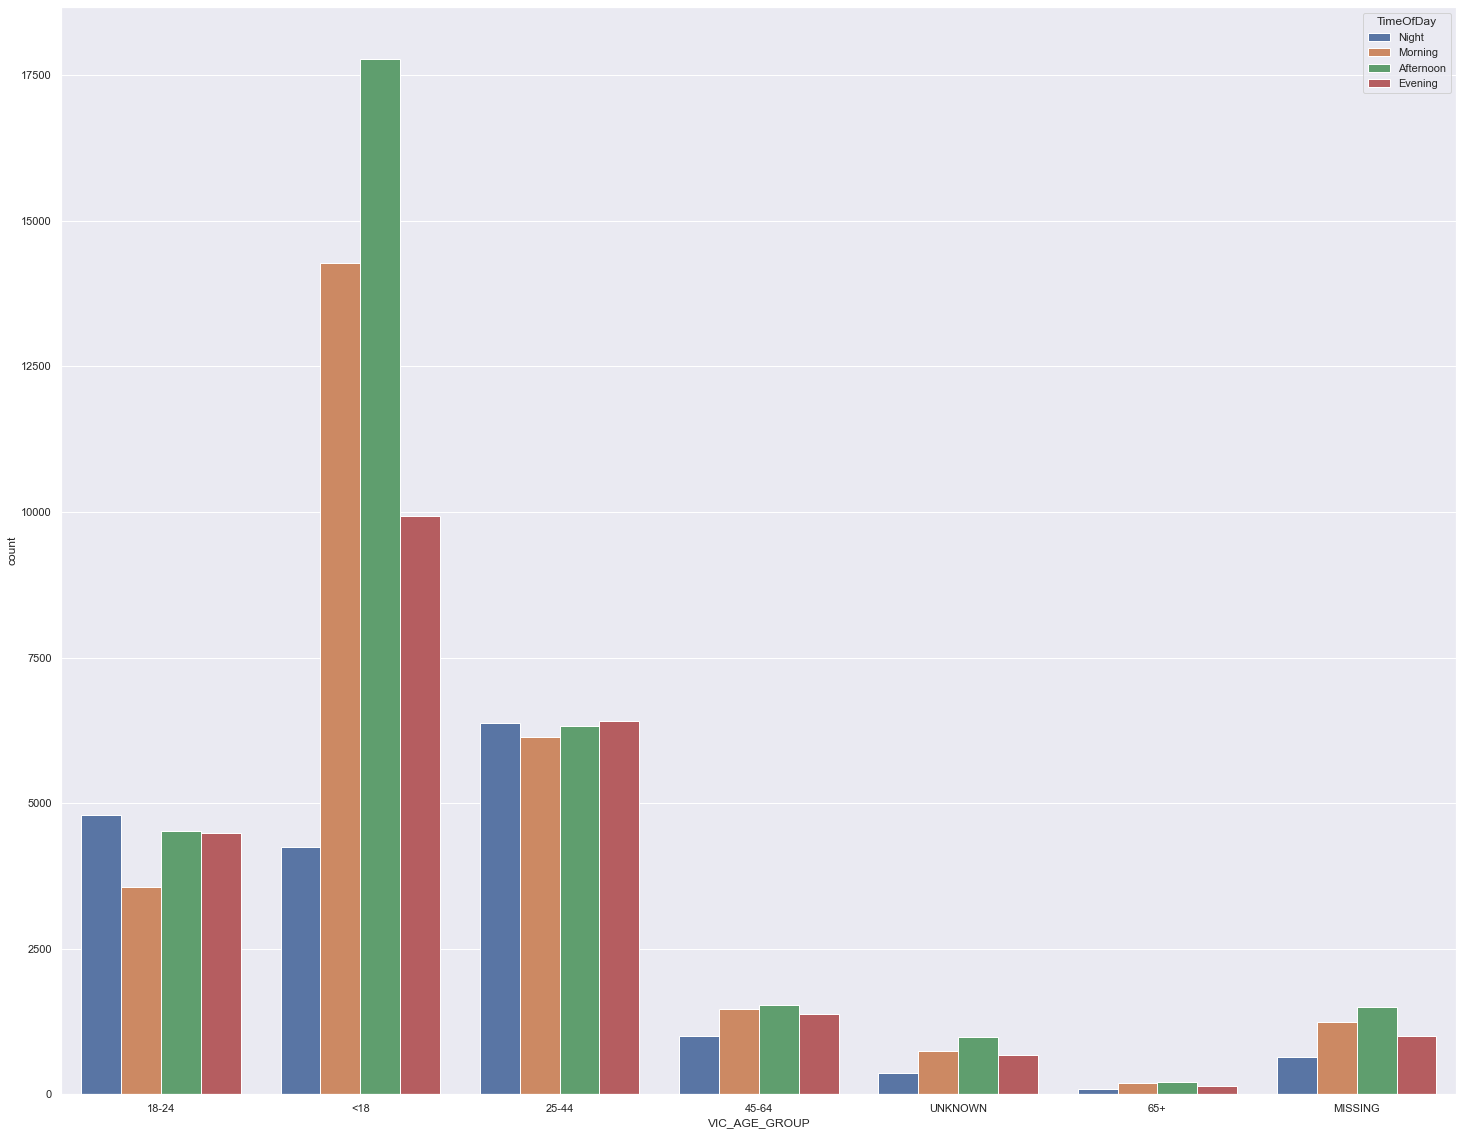

In [100]:
sns.countplot(data = df, hue = 'TimeOfDay', x = 'VIC_AGE_GROUP')

The victim age group between 25 and 44 have vulnerable at all times of the day, ages 18 to 24 are most vulnerable at night, and under 18 and above 65 years are most vulnerable in the afternoon.

<AxesSubplot:xlabel='VIC_SEX', ylabel='count'>

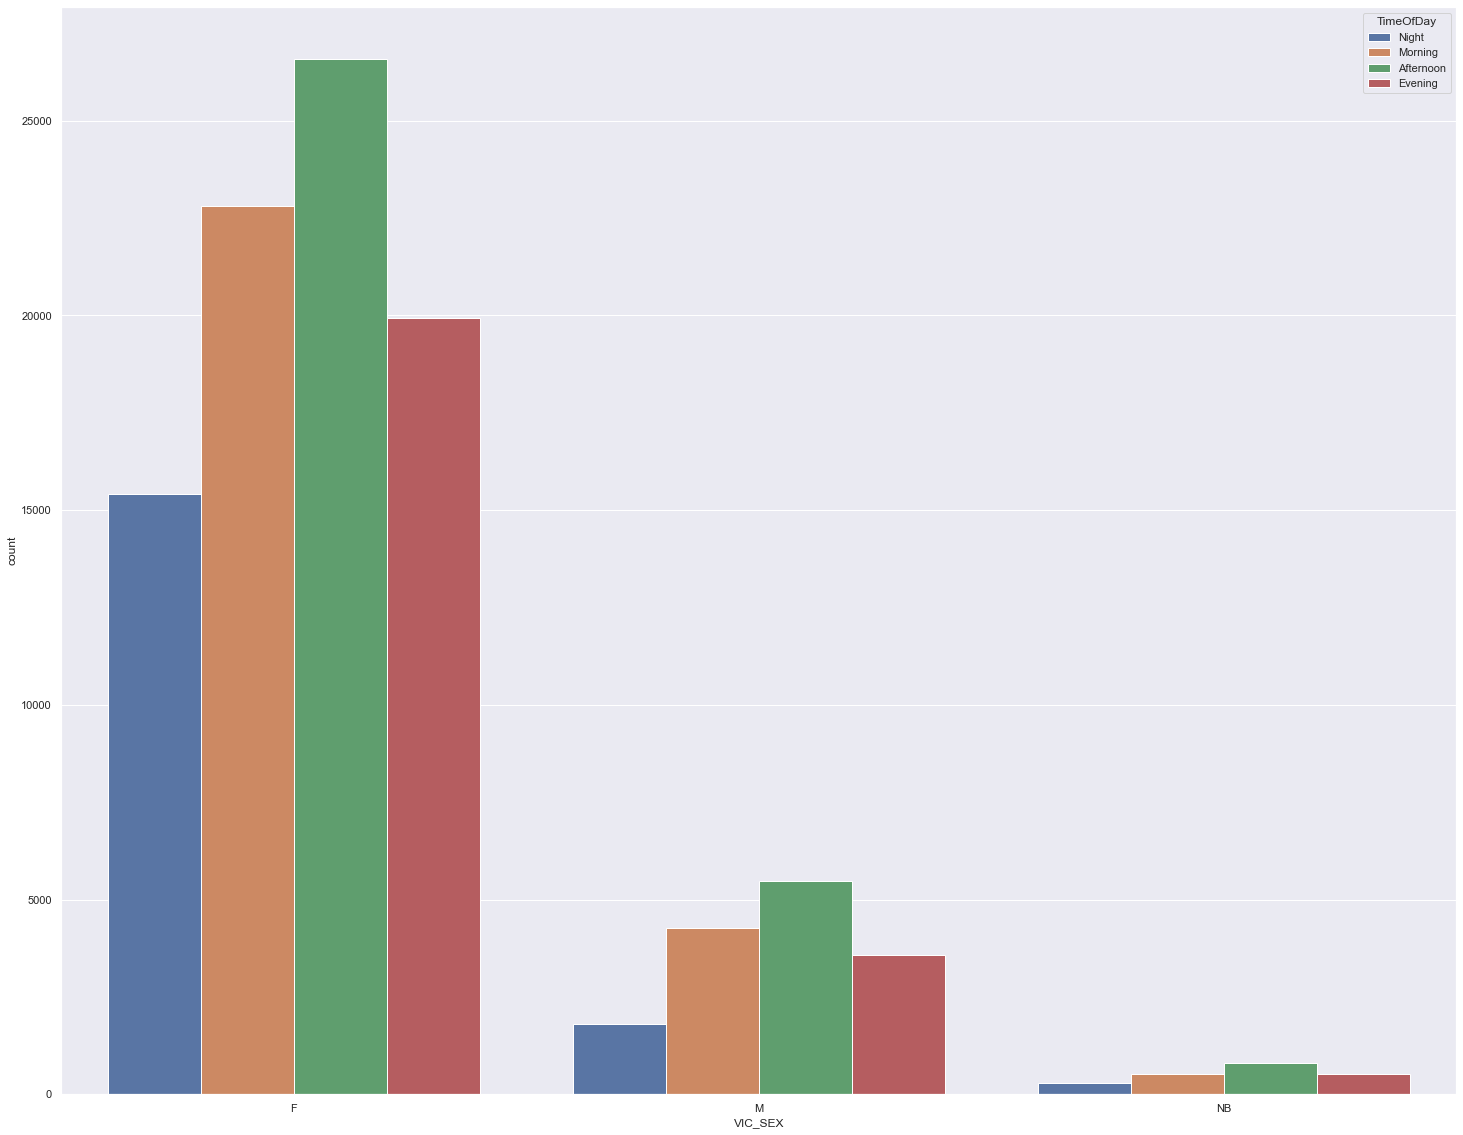

In [101]:
sns.countplot(data = df, hue = 'TimeOfDay', x = 'VIC_SEX')

All victim's sex follow the same trend for different times of the day.

## Specific Locations

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CENTRAL PARK'),
  Text(1, 0, 'CONEY ISLAND BEACH & BOARDWALK'),
  Text(2, 0, 'PROSPECT PARK'),
  Text(3, 0, 'FLUSHING MEADOWS CORONA PARK'),
  Text(4, 0, 'FOREST PARK'),
  Text(5, 0, 'RIVERSIDE PARK'),
  Text(6, 0, 'BRONX PARK'),
  Text(7, 0, 'ROCKAWAY BEACH AND BOARDWALK'),
  Text(8, 0, 'WASHINGTON SQUARE PARK'),
  Text(9, 0, 'MARCUS GARVEY PARK')])

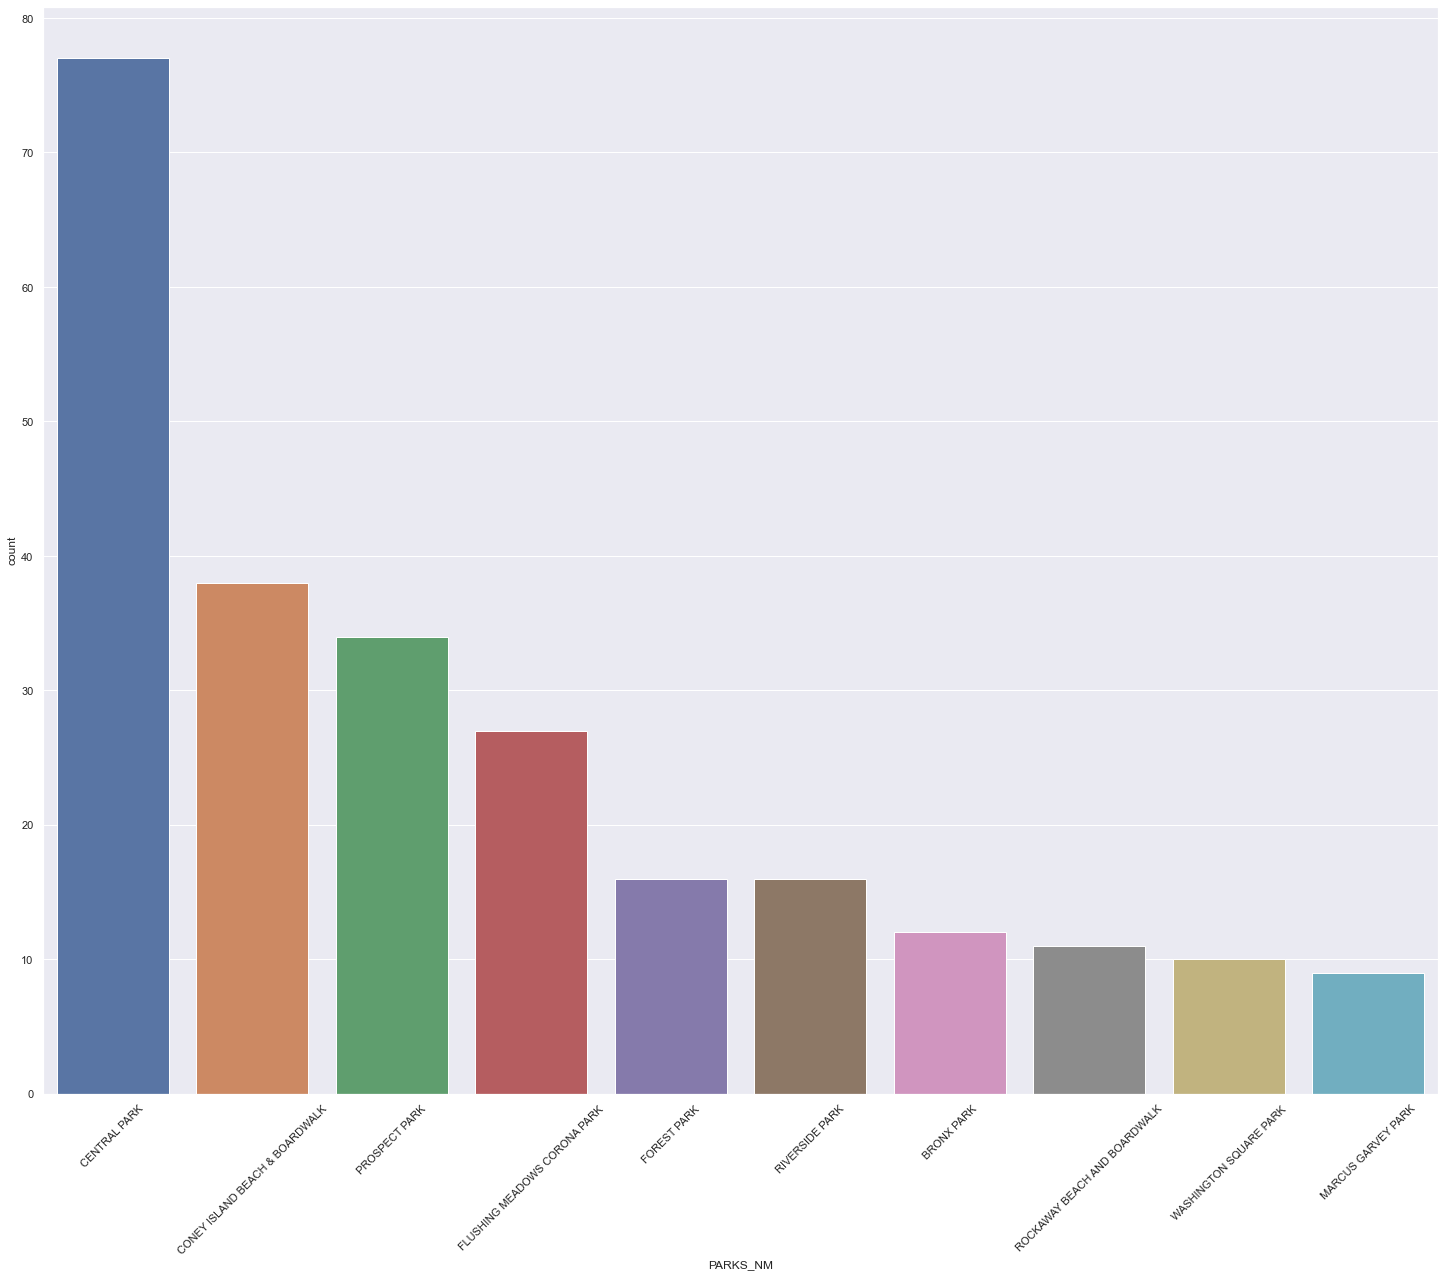

In [102]:
sns.countplot(data = df, x = 'PARKS_NM', order=pd.value_counts(df["PARKS_NM"]).iloc[:10].index)
plt.xticks(rotation=45)

The number of crimes that occur are in Central Park are significantly higher than other parks.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'VAN DYKE I'),
  Text(1, 0, 'CASTLE HILL'),
  Text(2, 0, 'PINK'),
  Text(3, 0, 'LINDEN'),
  Text(4, 0, 'INGERSOLL'),
  Text(5, 0, 'BROWNSVILLE'),
  Text(6, 0, 'TOMPKINS'),
  Text(7, 0, 'MARCY'),
  Text(8, 0, 'CYPRESS HILLS'),
  Text(9, 0, 'SHEEPSHEAD BAY')])

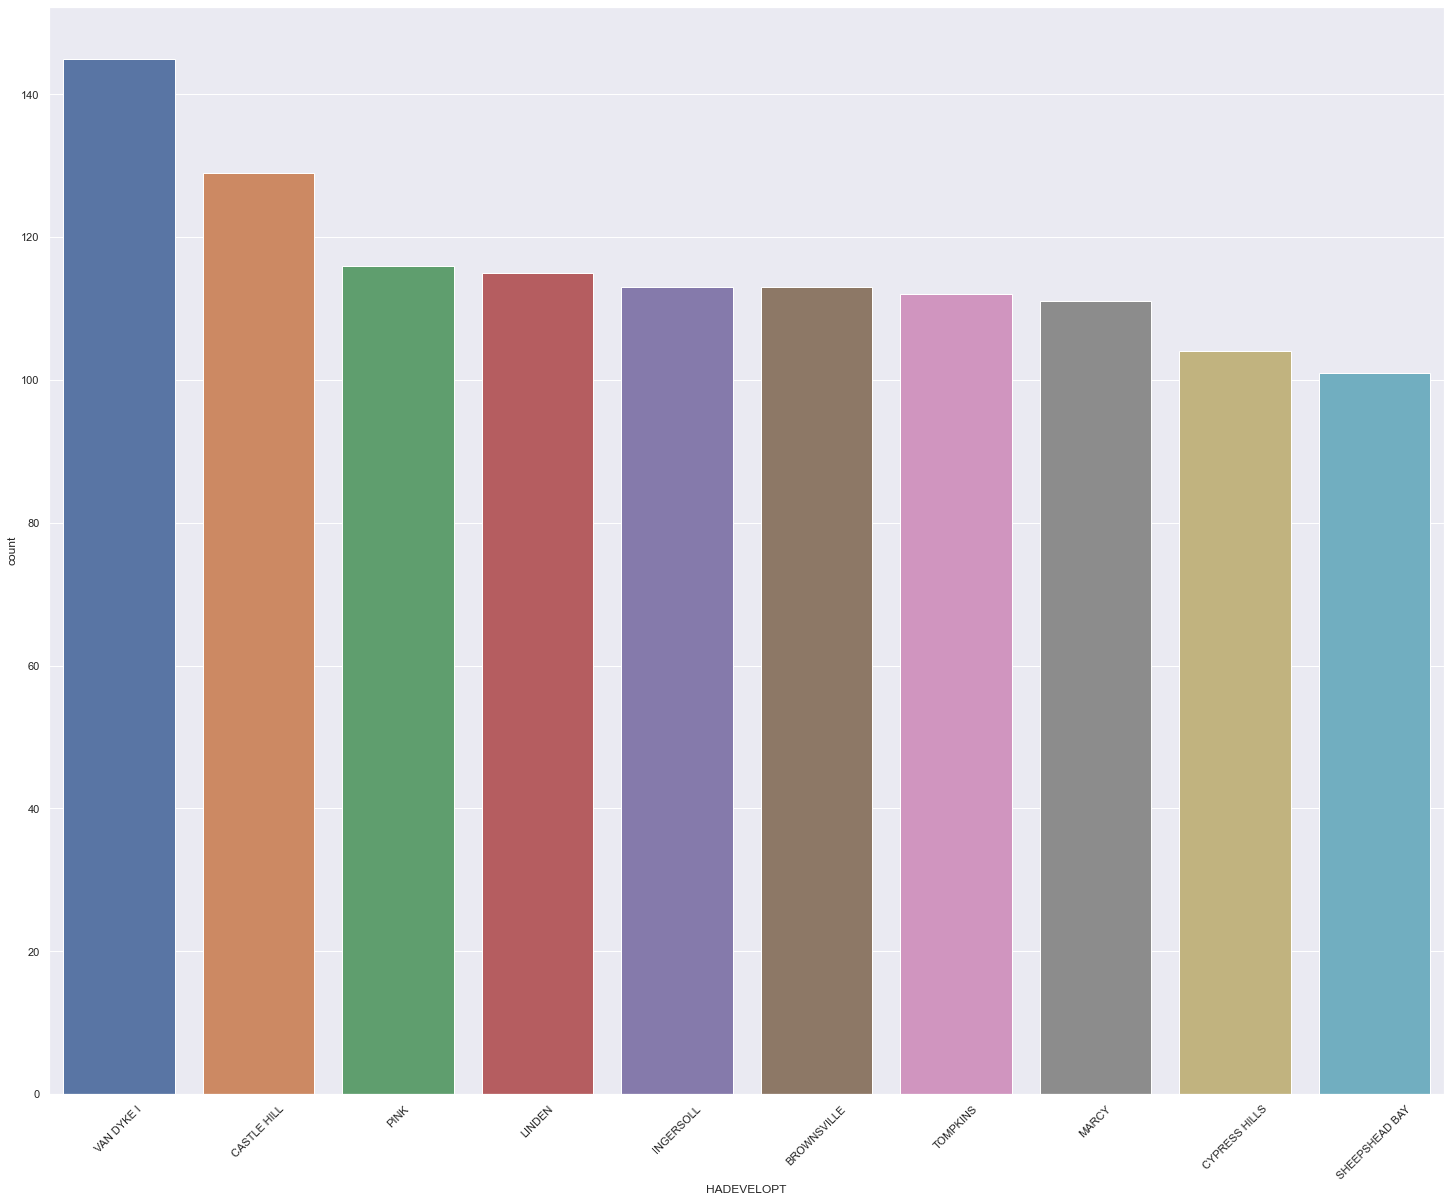

In [103]:
sns.countplot(data = df, x = 'HADEVELOPT', order=pd.value_counts(df["HADEVELOPT"]).iloc[:10].index)
plt.xticks(rotation=45)

Van Dyke 1 housing development has maximum number of sexual assault crimes.

## Suspect Race

<AxesSubplot:xlabel='SUSP_RACE', ylabel='SUSP_SEX'>

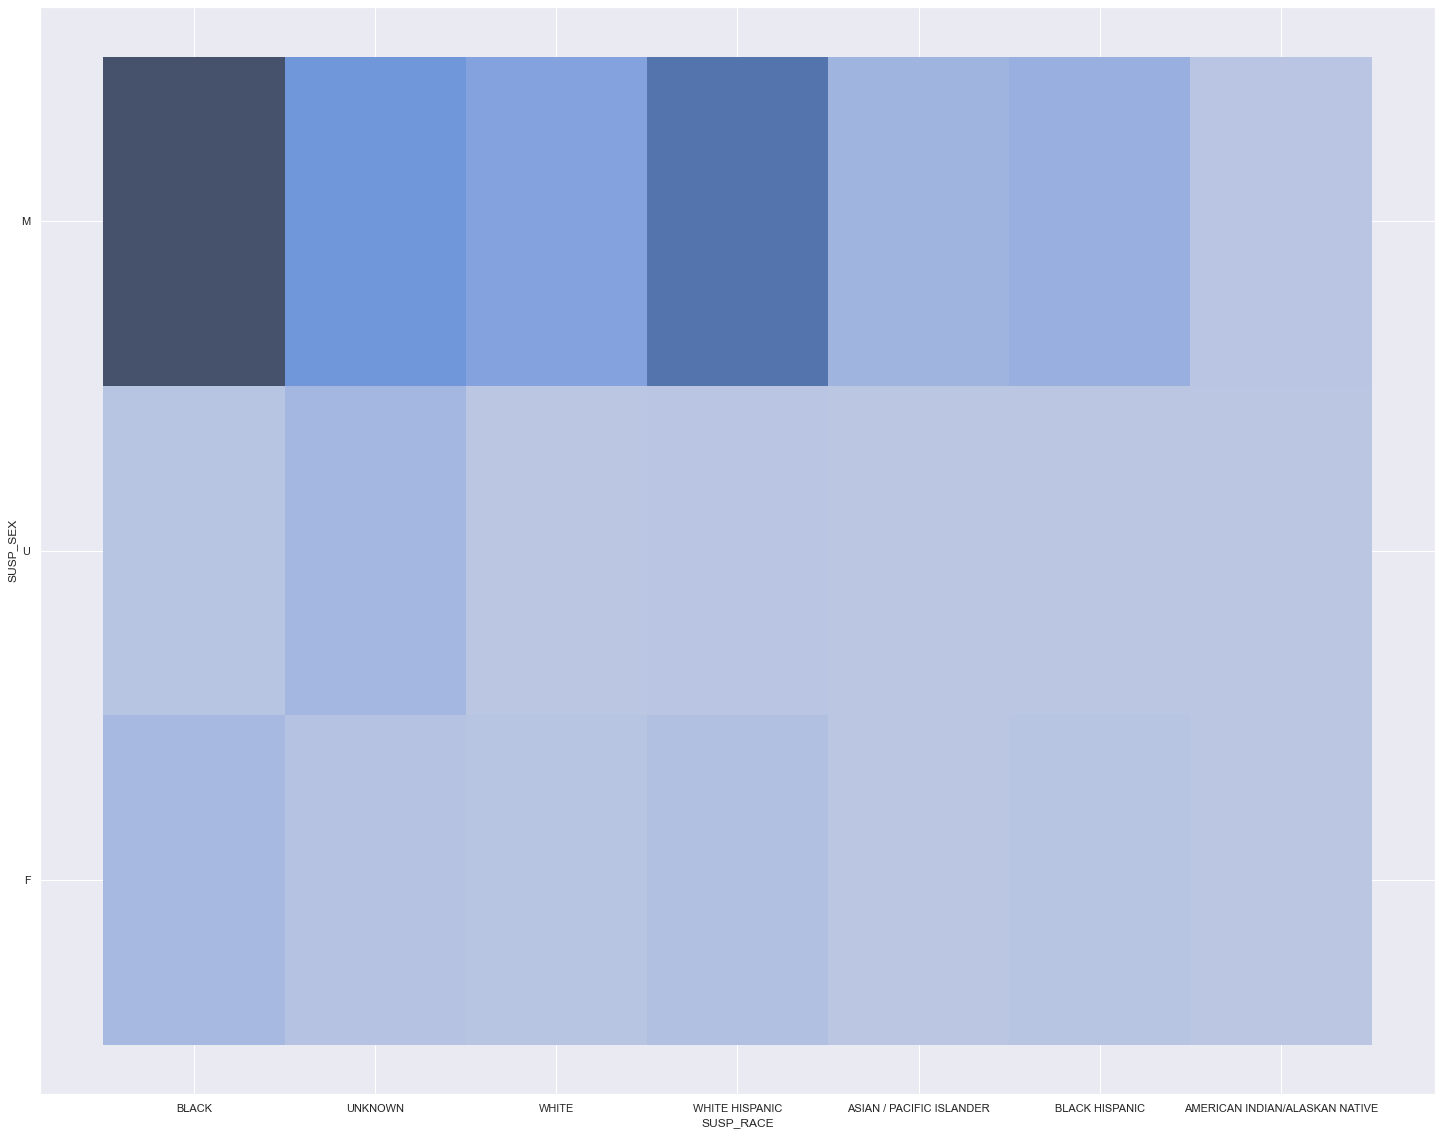

In [104]:
sns.histplot(data = df, x = 'SUSP_RACE', y = 'SUSP_SEX')

Most suspects are Black Male followed by White Hispanic Male.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SEXUAL ABUSE 3,2'),
  Text(1, 0, 'CHILD, ENDANGERING WELFARE'),
  Text(2, 0, 'RAPE 1'),
  Text(3, 0, 'SODOMY 1'),
  Text(4, 0, 'SEXUAL ABUSE'),
  Text(5, 0, 'SEXUAL MISCONDUCT,INTERCOURSE'),
  Text(6, 0, 'AGGRAVATED SEXUAL ASBUSE'),
  Text(7, 0, 'RAPE 3'),
  Text(8, 0, 'RAPE 1,ATTEMPT'),
  Text(9, 0, 'RAPE 2')])

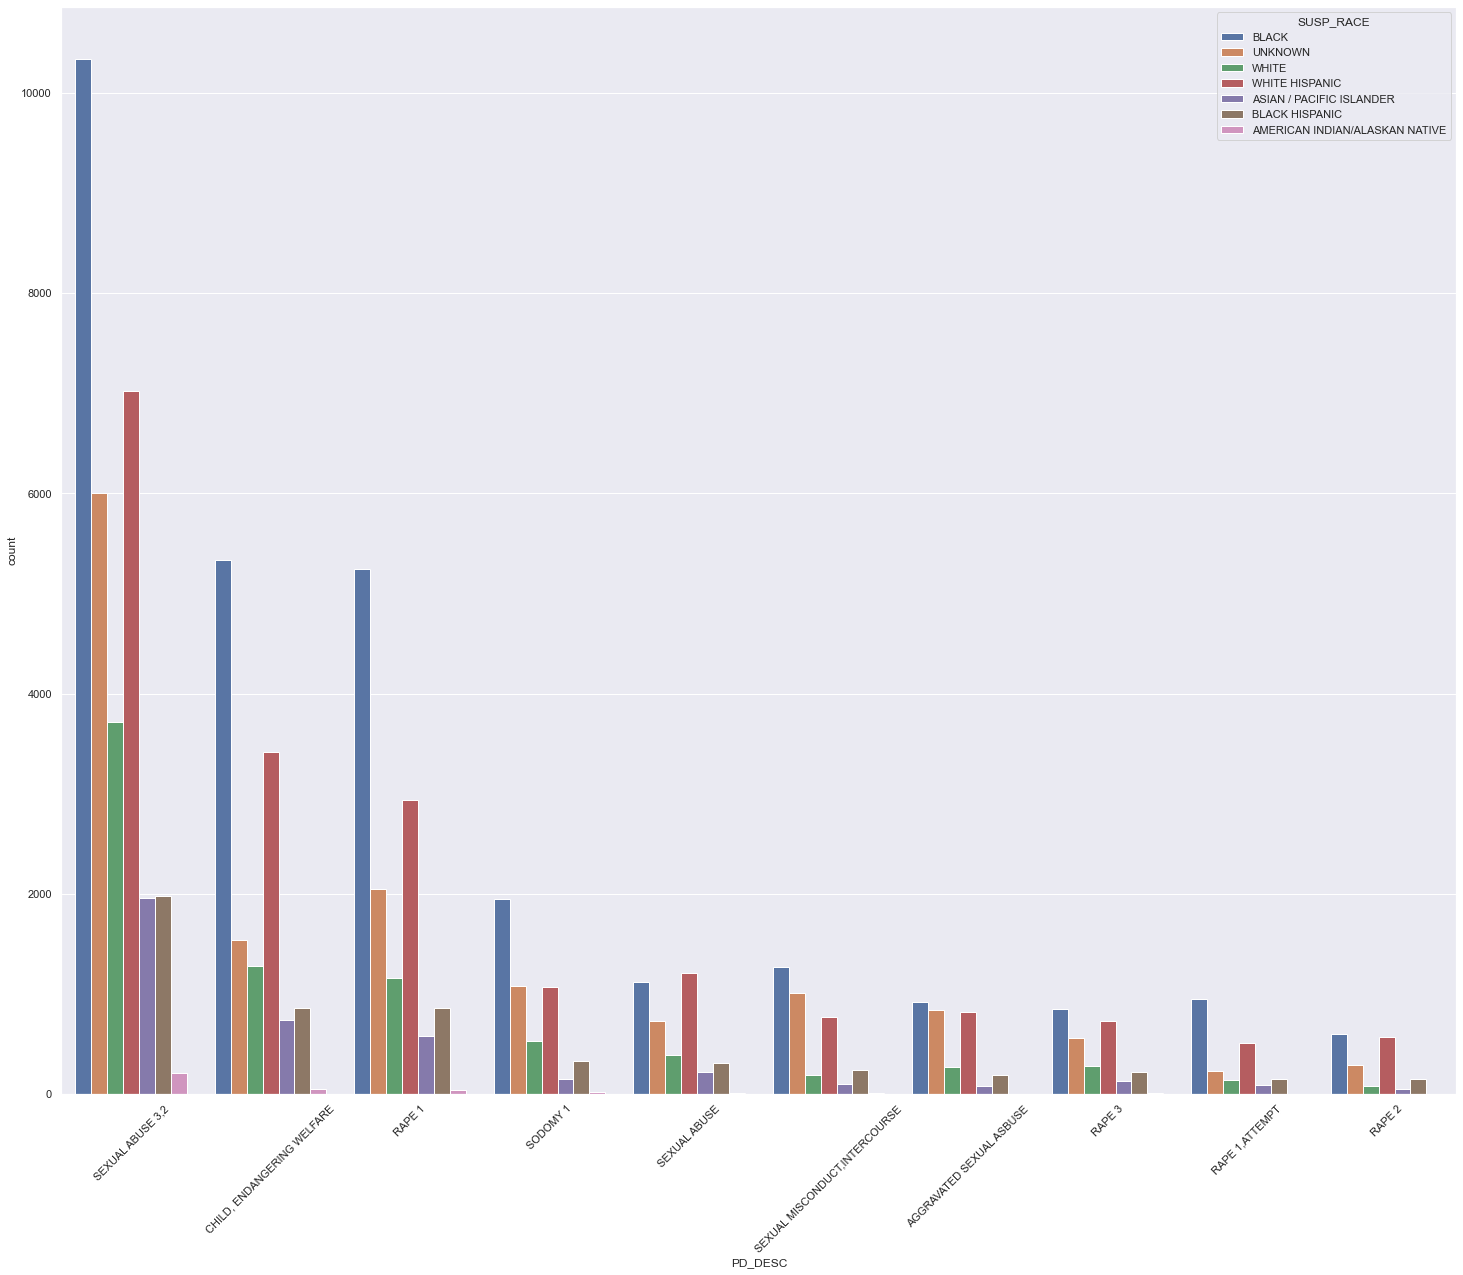

In [105]:
sns.countplot(data = df, hue = 'SUSP_RACE', x = 'PD_DESC', order=pd.value_counts(df["PD_DESC"]).iloc[:10].index)
plt.xticks(rotation=45)

All Police Department Descriptions follow the same trend for all suspect's races.

<AxesSubplot:xlabel='CRM_ATPT_CPTD_CD', ylabel='count'>

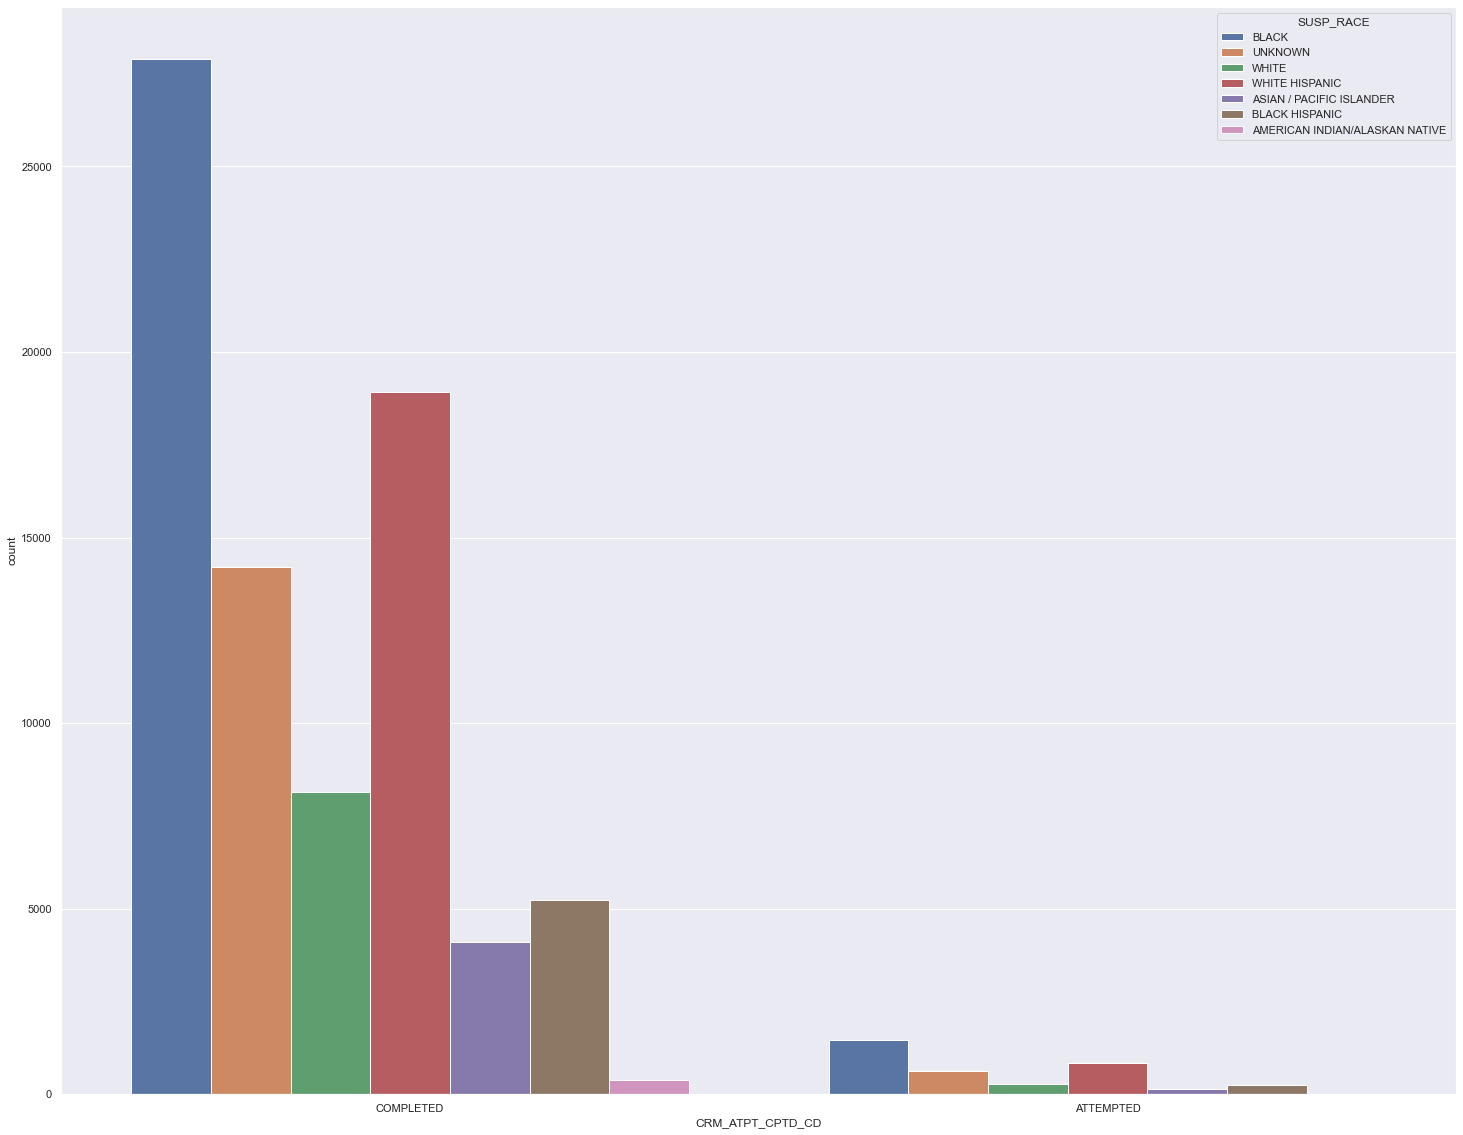

In [106]:
sns.countplot(data = df, hue = 'SUSP_RACE', x = 'CRM_ATPT_CPTD_CD')

Both attempted and completed crimes follow the same trend with respect to race.

<AxesSubplot:xlabel='LAW_CAT_CD', ylabel='count'>

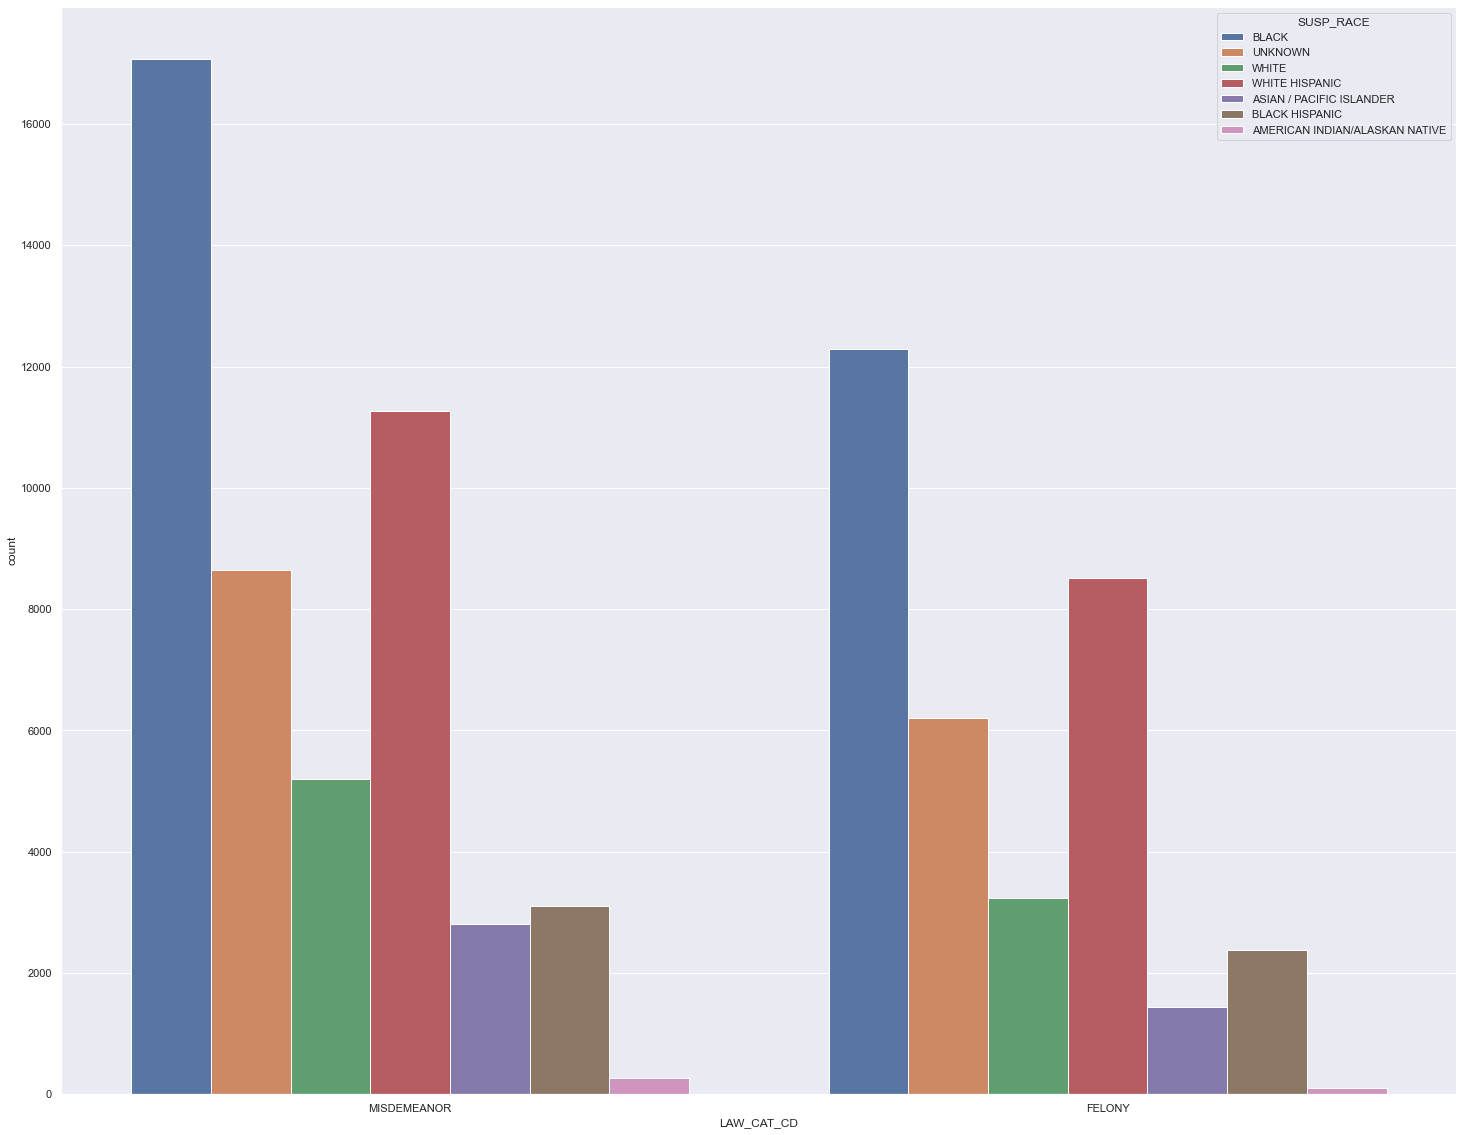

In [107]:
sns.countplot(data = df, hue = 'SUSP_RACE', x = 'LAW_CAT_CD')

Both Misdemeanor and Felonies follow the same trend with respect to race.

<AxesSubplot:xlabel='BORO_NM', ylabel='count'>

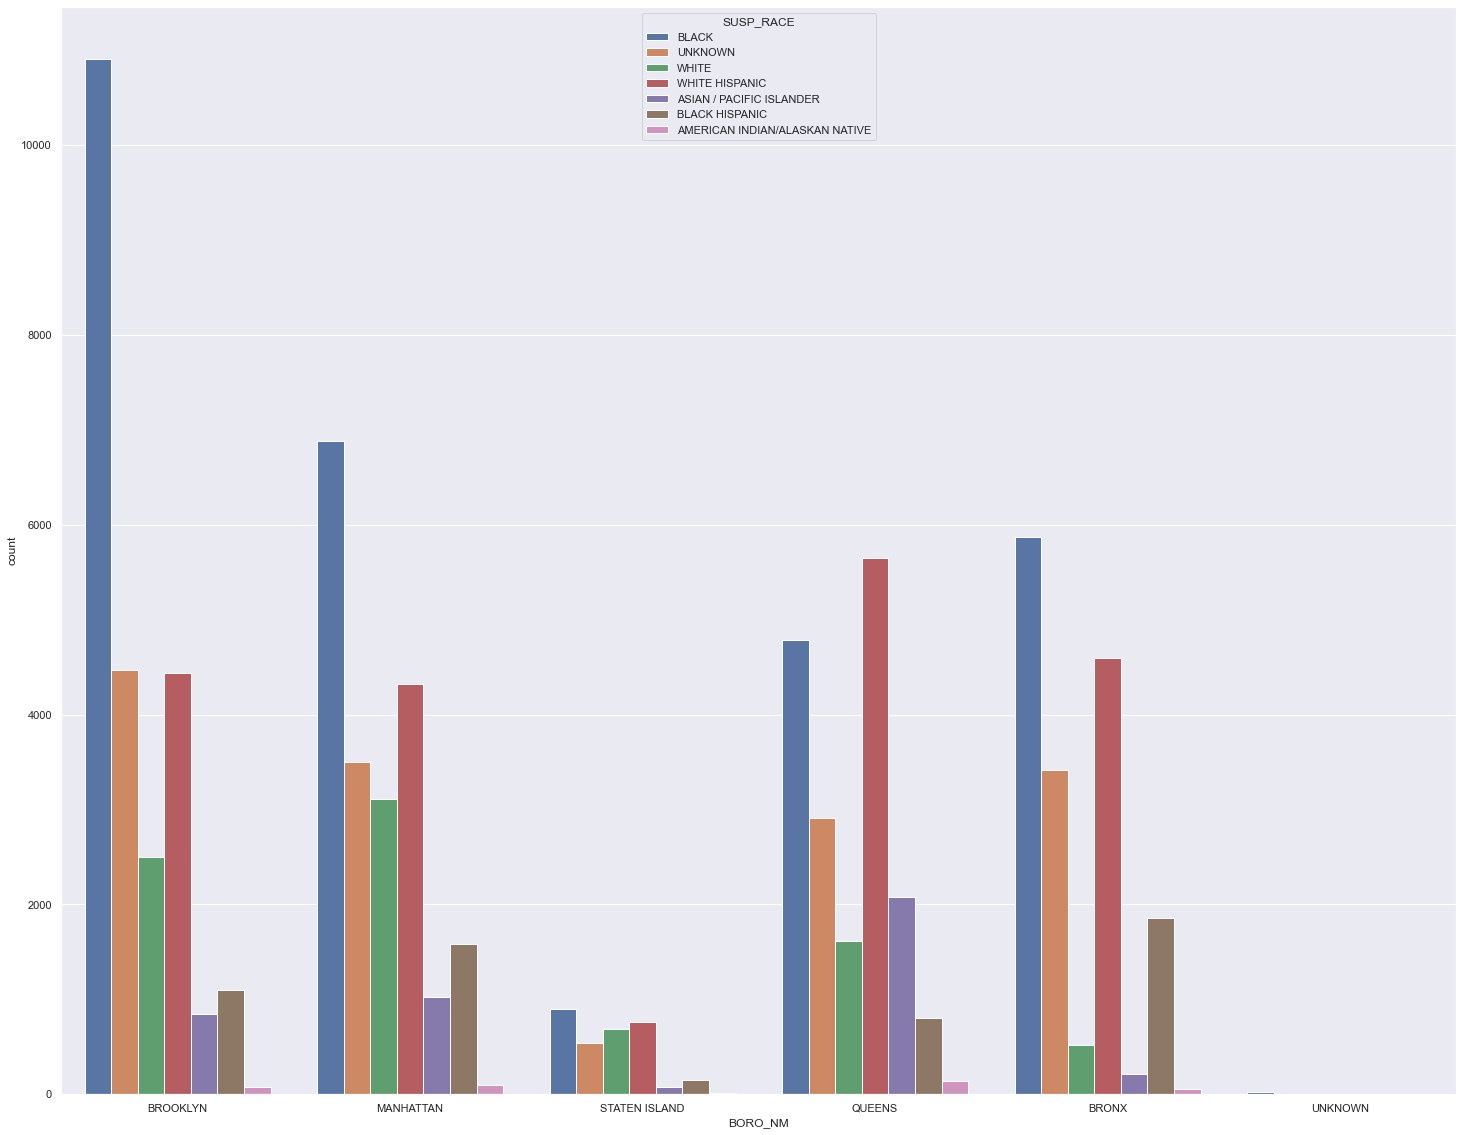

In [108]:
sns.countplot(data = df, hue = 'SUSP_RACE', x = 'BORO_NM')

In Brooklyn, Manhattan, Bronx and Staten Island, most suspect's race is categorized as Black. In Queens, most suspect's race is categorized as White Hispanic.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'N.Y. POLICE DEPT'),
  Text(1, 0, 'N.Y. HOUSING POLICE'),
  Text(2, 0, 'N.Y. TRANSIT POLICE'),
  Text(3, 0, 'PORT AUTHORITY'),
  Text(4, 0, 'OTHER')])

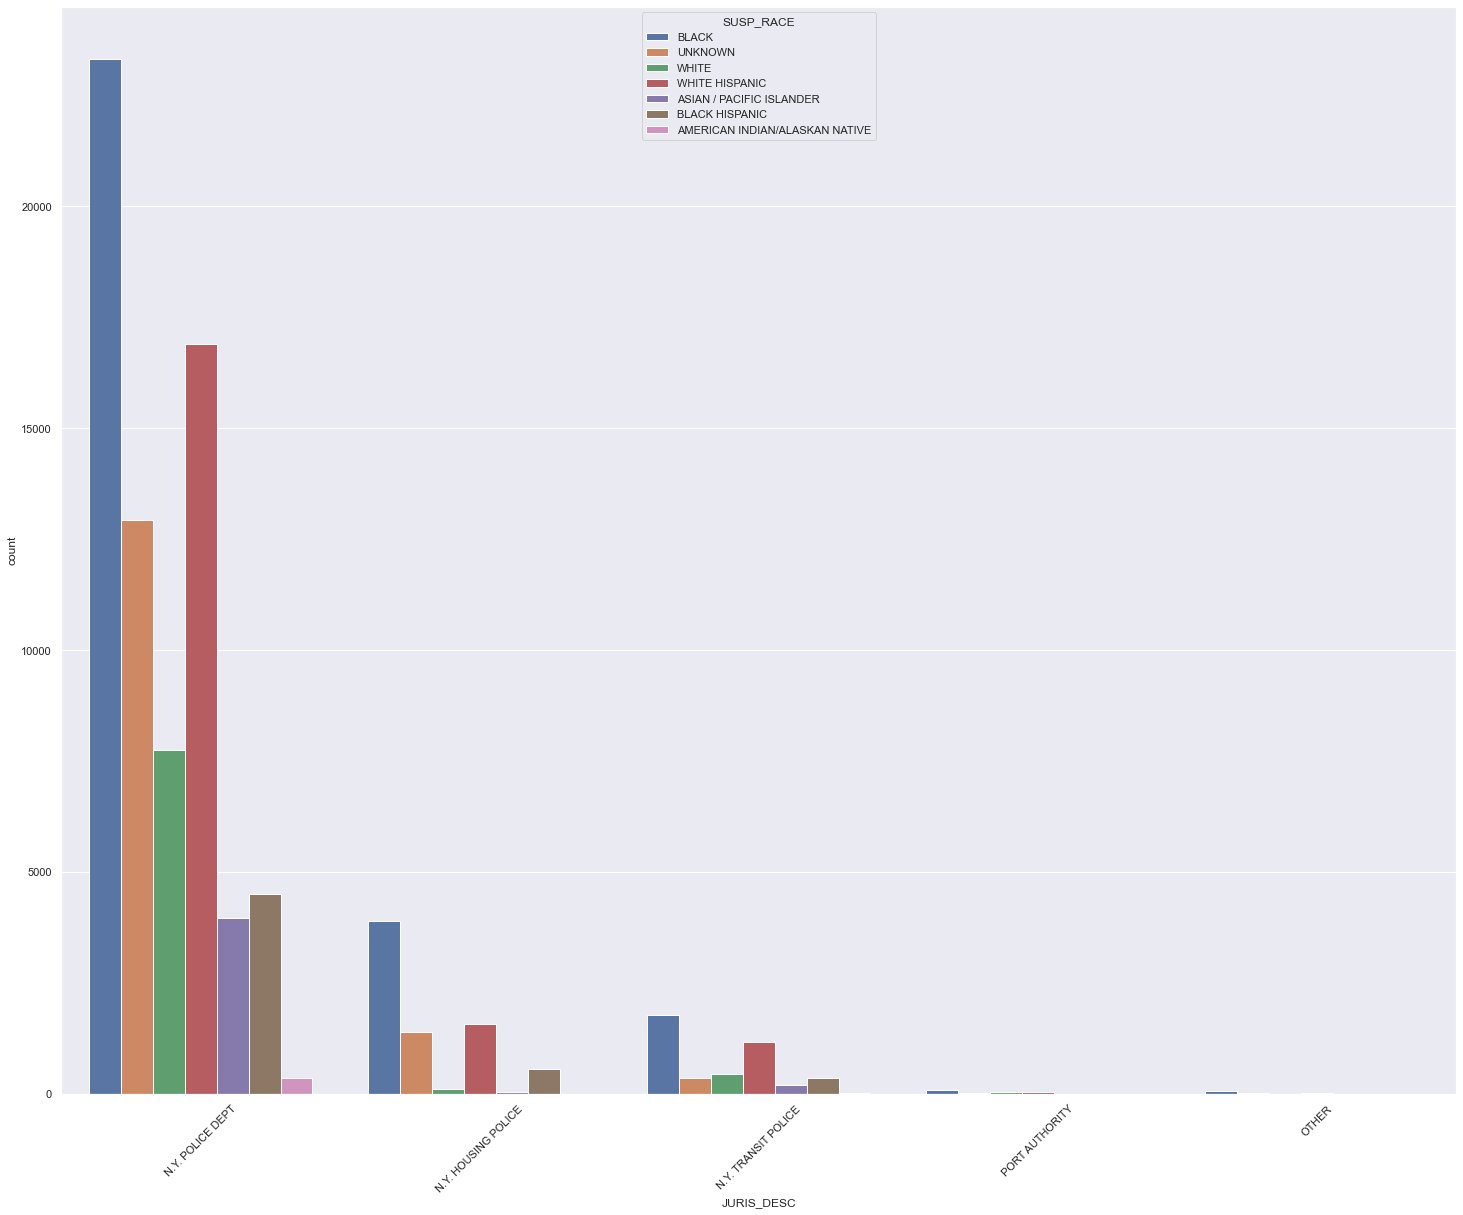

In [109]:
sns.countplot(data = df, hue = 'SUSP_RACE', x = 'JURIS_DESC', order=pd.value_counts(df["JURIS_DESC"]).iloc[:5].index)
plt.xticks(rotation=45)

Jurisdictions follow the same trend with respect to race.

<AxesSubplot:xlabel='SUSP_AGE_GROUP', ylabel='count'>

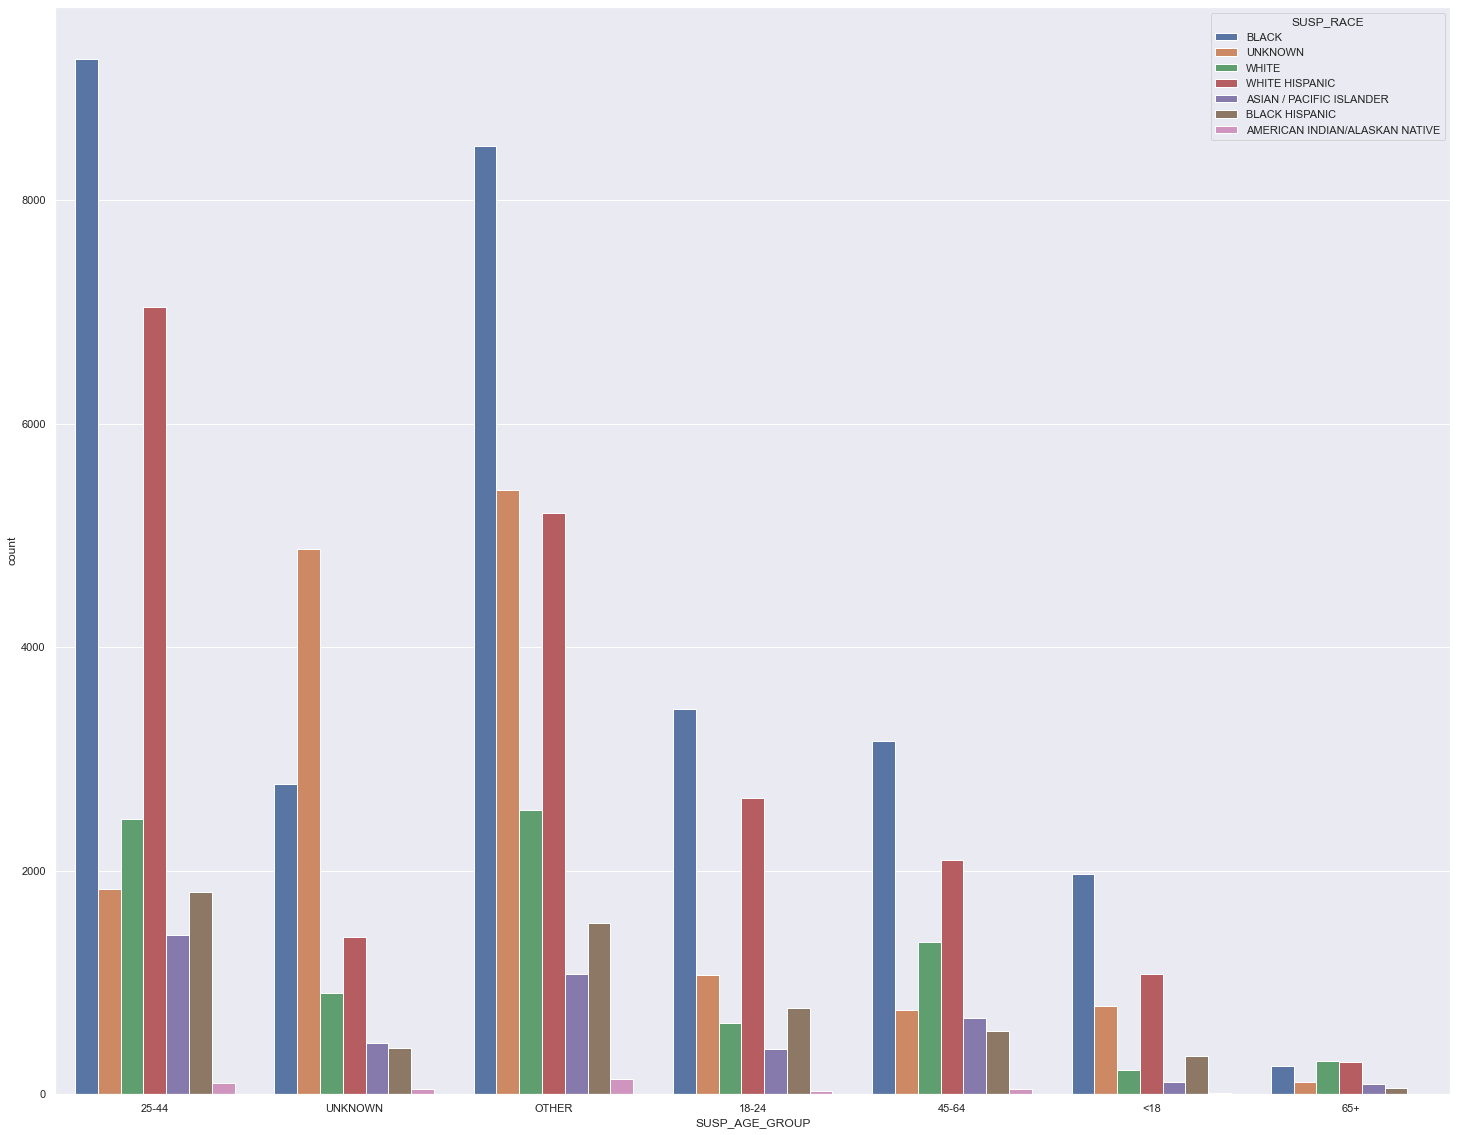

In [110]:
sns.countplot(data = df, hue = 'SUSP_RACE', x = 'SUSP_AGE_GROUP')

When the ethnicity of the suspect is unknwon, most likeley their age group is also unknown. 

<AxesSubplot:xlabel='VIC_AGE_GROUP', ylabel='count'>

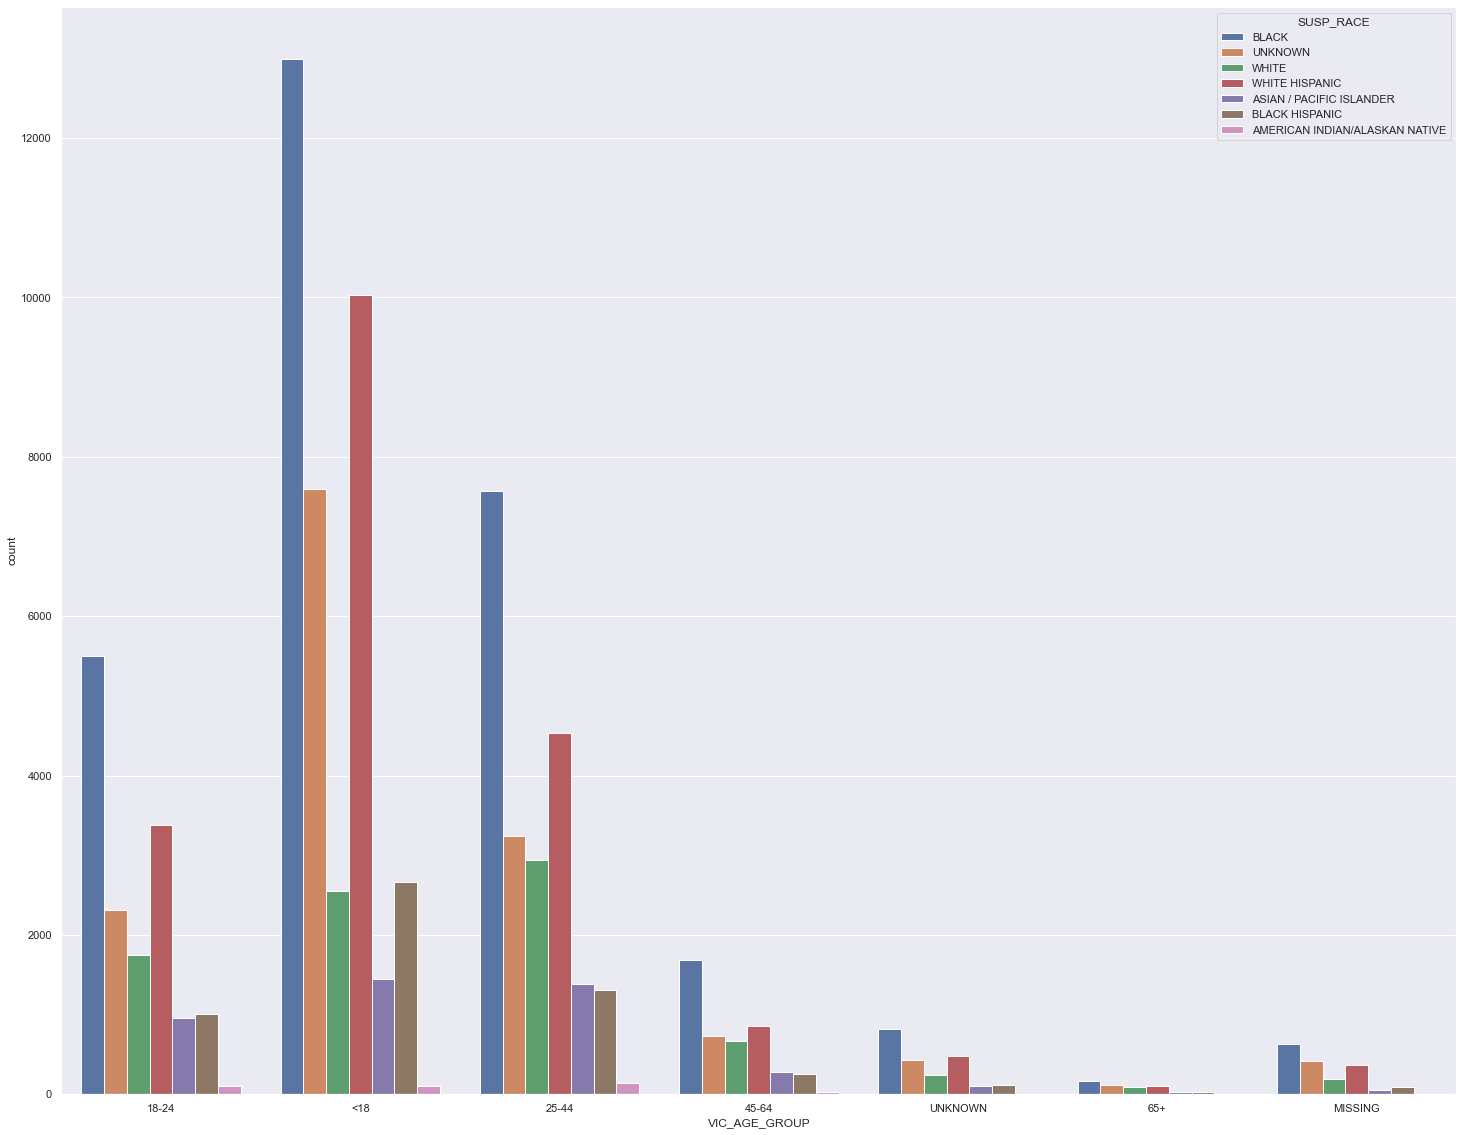

In [111]:
sns.countplot(data = df, hue = 'SUSP_RACE', x = 'VIC_AGE_GROUP')

The trend for Suspect's Race is the same across all age groups of victims.

<AxesSubplot:xlabel='VIC_SEX', ylabel='count'>

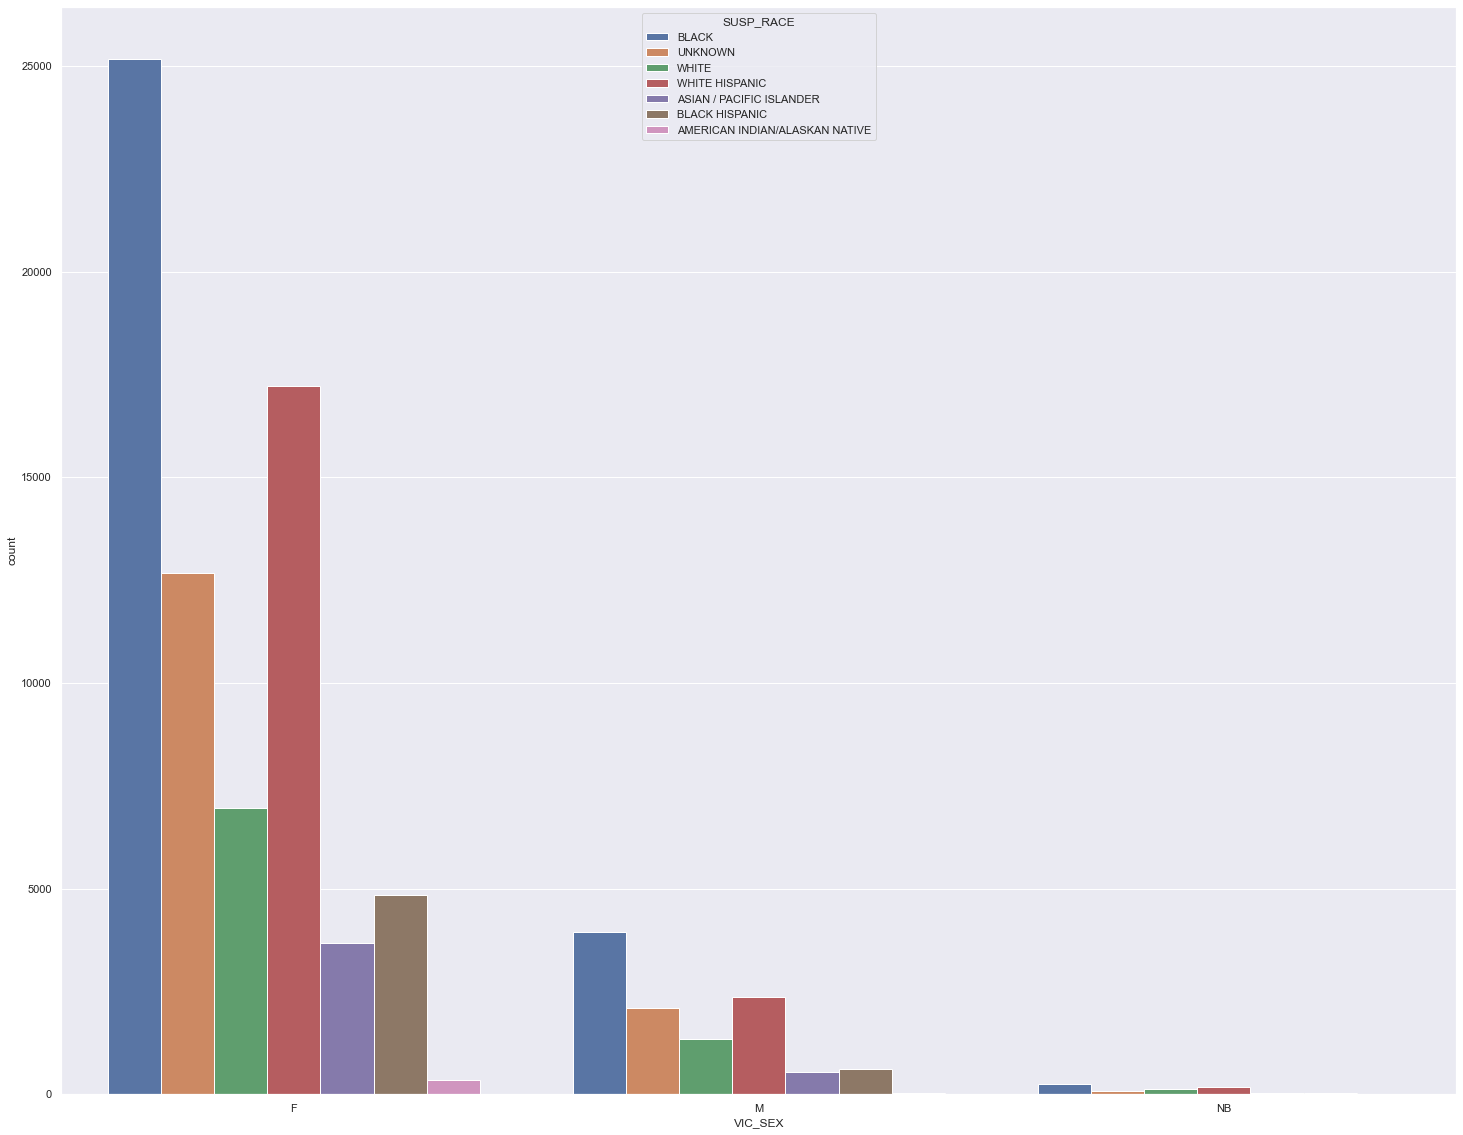

In [112]:
sns.countplot(data = df, hue = 'SUSP_RACE', x = 'VIC_SEX')

Victim's sex follows the same trend with respect to race.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'PATROL BORO BKLYN NORTH'),
  Text(1, 0, 'PATROL BORO MAN NORTH'),
  Text(2, 0, 'PATROL BORO STATEN ISLAND'),
  Text(3, 0, 'PATROL BORO QUEENS NORTH'),
  Text(4, 0, 'PATROL BORO MAN SOUTH'),
  Text(5, 0, 'PATROL BORO BRONX'),
  Text(6, 0, 'PATROL BORO BKLYN SOUTH'),
  Text(7, 0, 'PATROL BORO QUEENS SOUTH'),
  Text(8, 0, 'UNKNOWN')])

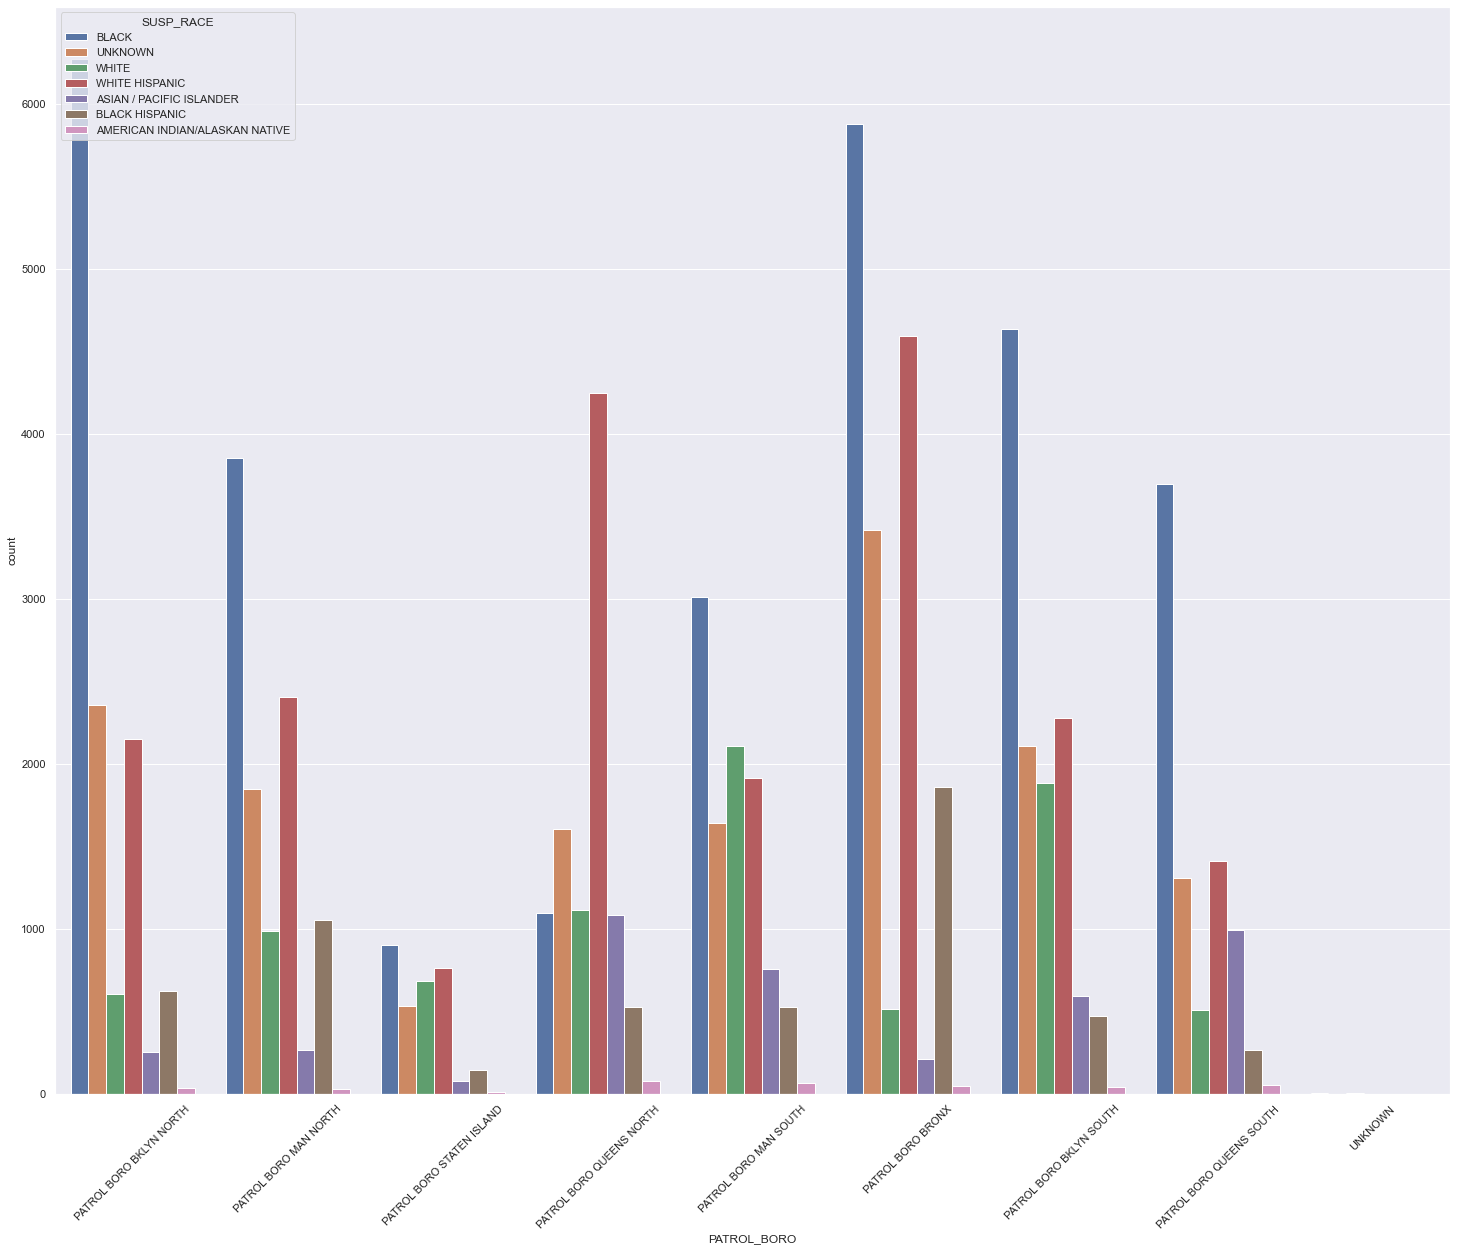

In [113]:
sns.countplot(data = df, hue = 'SUSP_RACE', x = 'PATROL_BORO')
plt.xticks(rotation=45)

In all Patrol Boroughs most sexual assault suspects are Black individuals, except Queens North where White Hispanic individuals are majorly suspects

<AxesSubplot:xlabel='VIC_RACE', ylabel='count'>

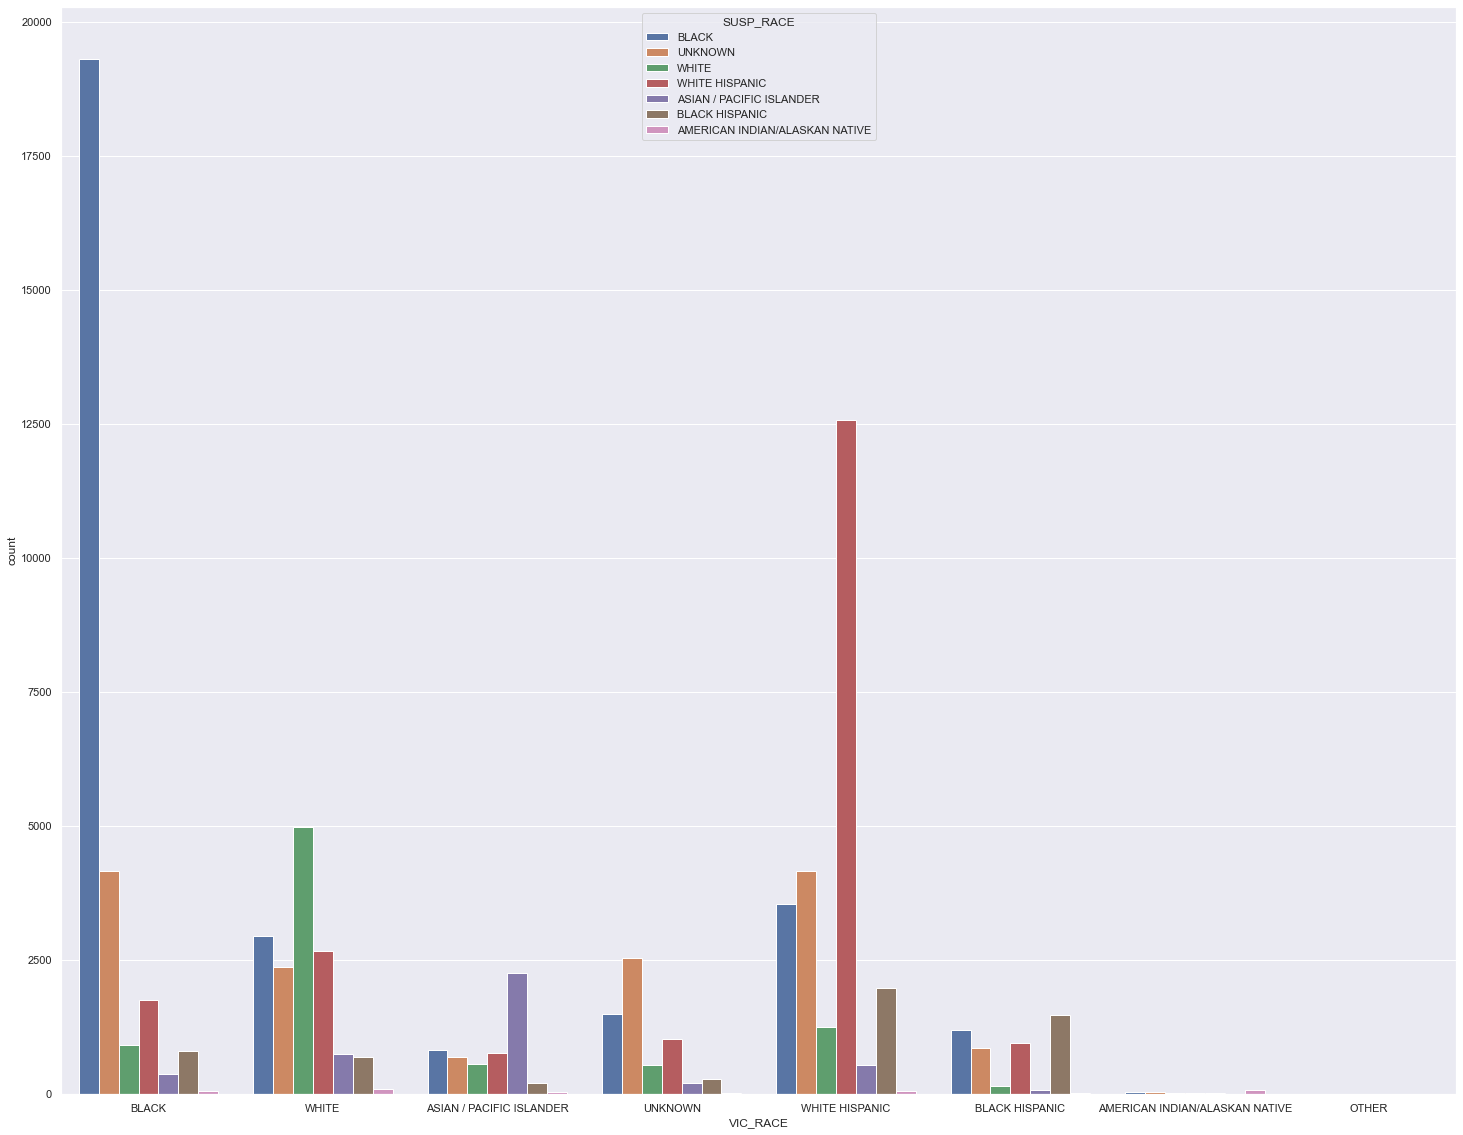

In [114]:
sns.countplot(data = df, hue = 'SUSP_RACE', x = 'VIC_RACE')

The highest number of suspects belong to the same racial cateogry as the victim, specifically Black and White Hispanic.

## Suspect Age Group

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SEXUAL ABUSE 3,2'),
  Text(1, 0, 'CHILD, ENDANGERING WELFARE'),
  Text(2, 0, 'RAPE 1'),
  Text(3, 0, 'SODOMY 1'),
  Text(4, 0, 'SEXUAL ABUSE'),
  Text(5, 0, 'SEXUAL MISCONDUCT,INTERCOURSE'),
  Text(6, 0, 'AGGRAVATED SEXUAL ASBUSE'),
  Text(7, 0, 'RAPE 3'),
  Text(8, 0, 'RAPE 1,ATTEMPT'),
  Text(9, 0, 'RAPE 2')])

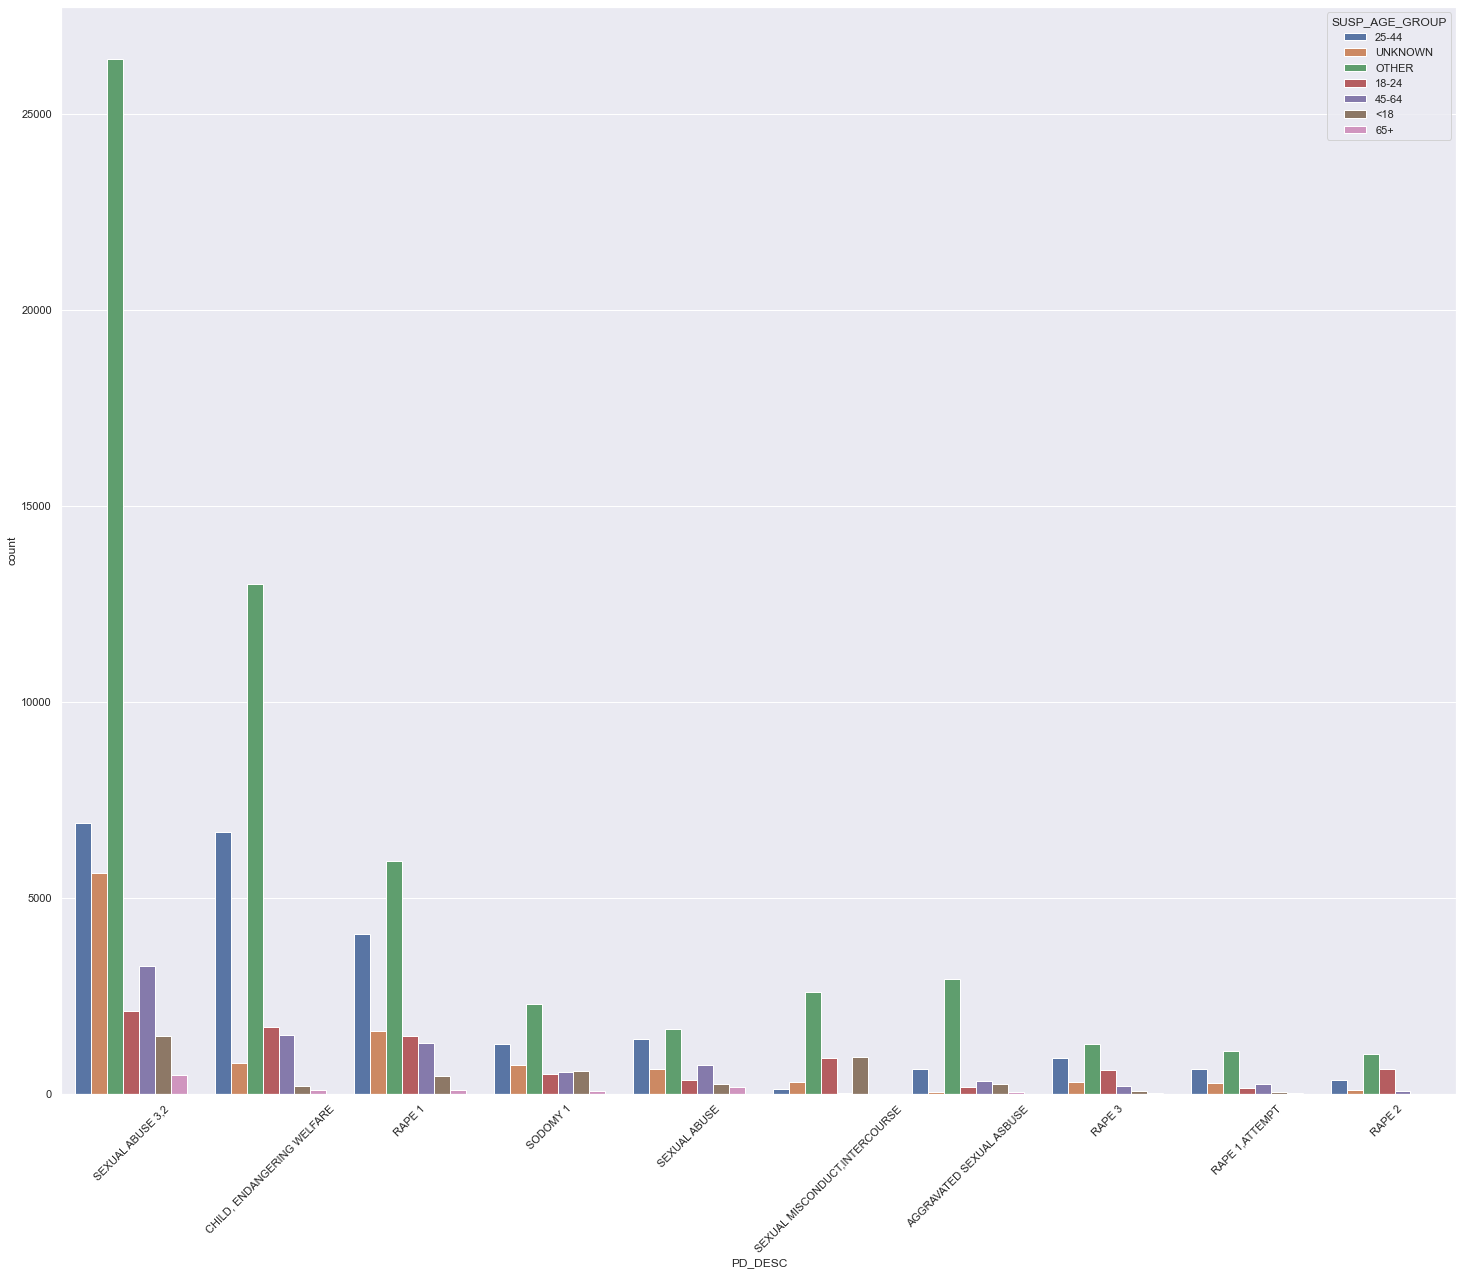

In [115]:
sns.countplot(data = df, hue = 'SUSP_AGE_GROUP', x = 'PD_DESC', order=pd.value_counts(df["PD_DESC"]).iloc[:10].index)
plt.xticks(rotation=45)

The age group of suspects that majorly commit crimes is unknown.

<AxesSubplot:xlabel='CRM_ATPT_CPTD_CD', ylabel='count'>

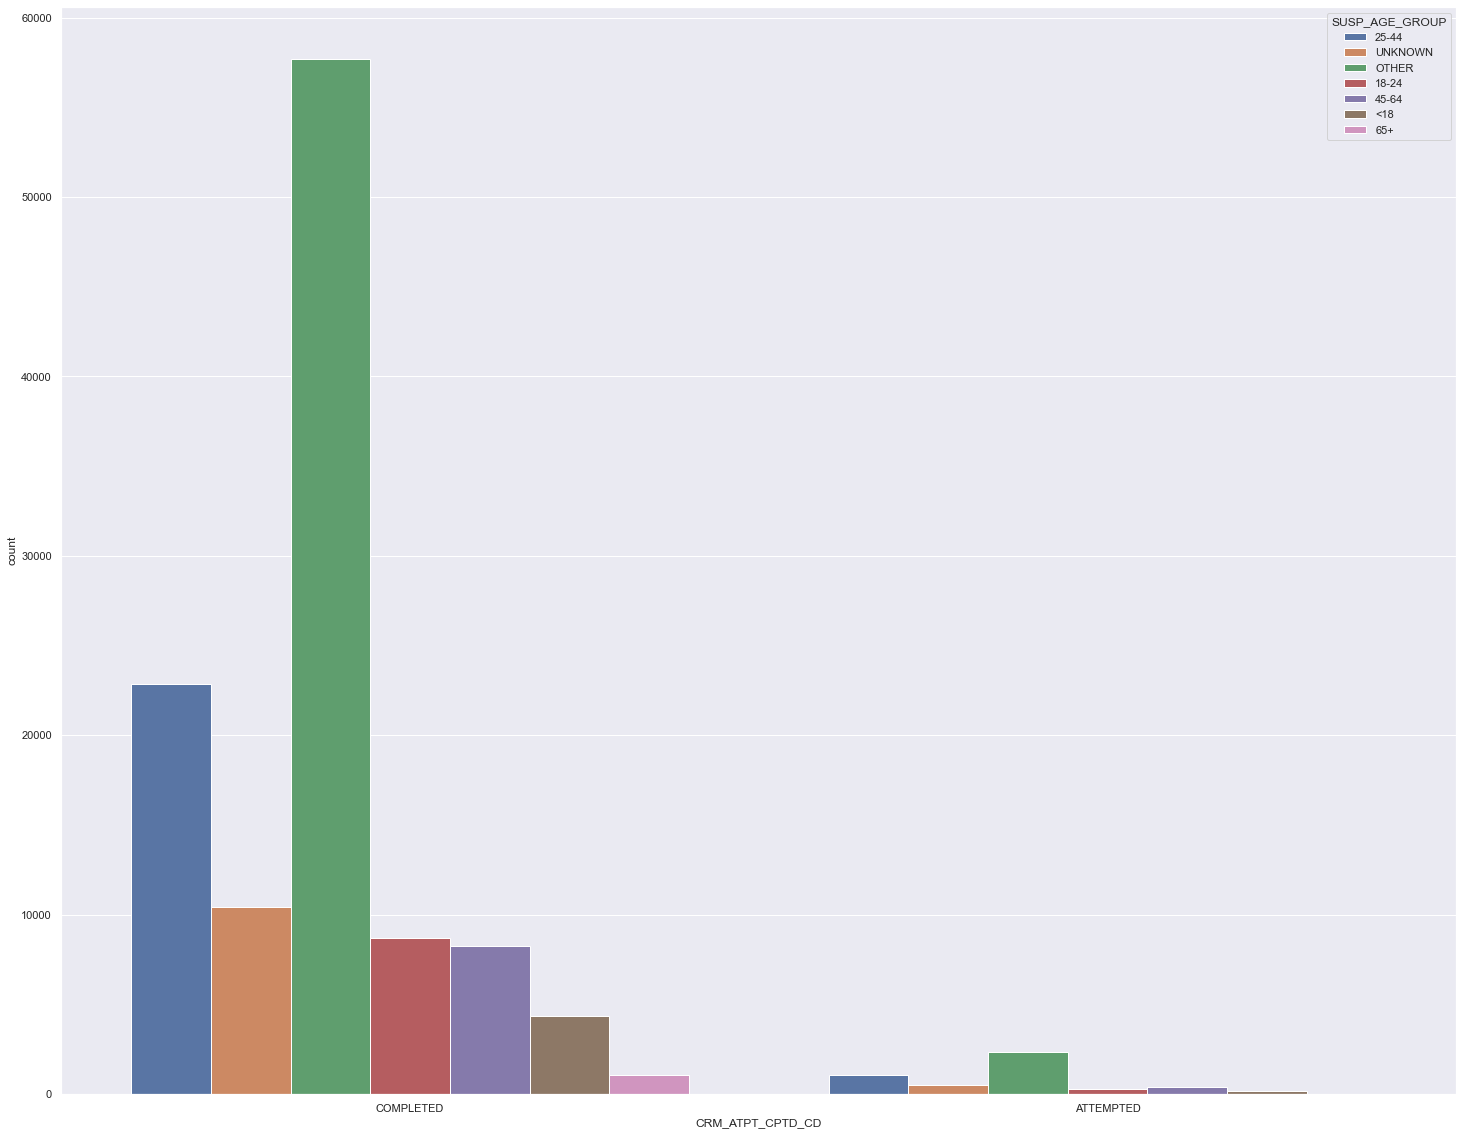

In [116]:
sns.countplot(data = df, hue = 'SUSP_AGE_GROUP', x = 'CRM_ATPT_CPTD_CD')

In most completed Sexual Assault crimes, the data does not have the Suspect's Age.

<AxesSubplot:xlabel='LAW_CAT_CD', ylabel='count'>

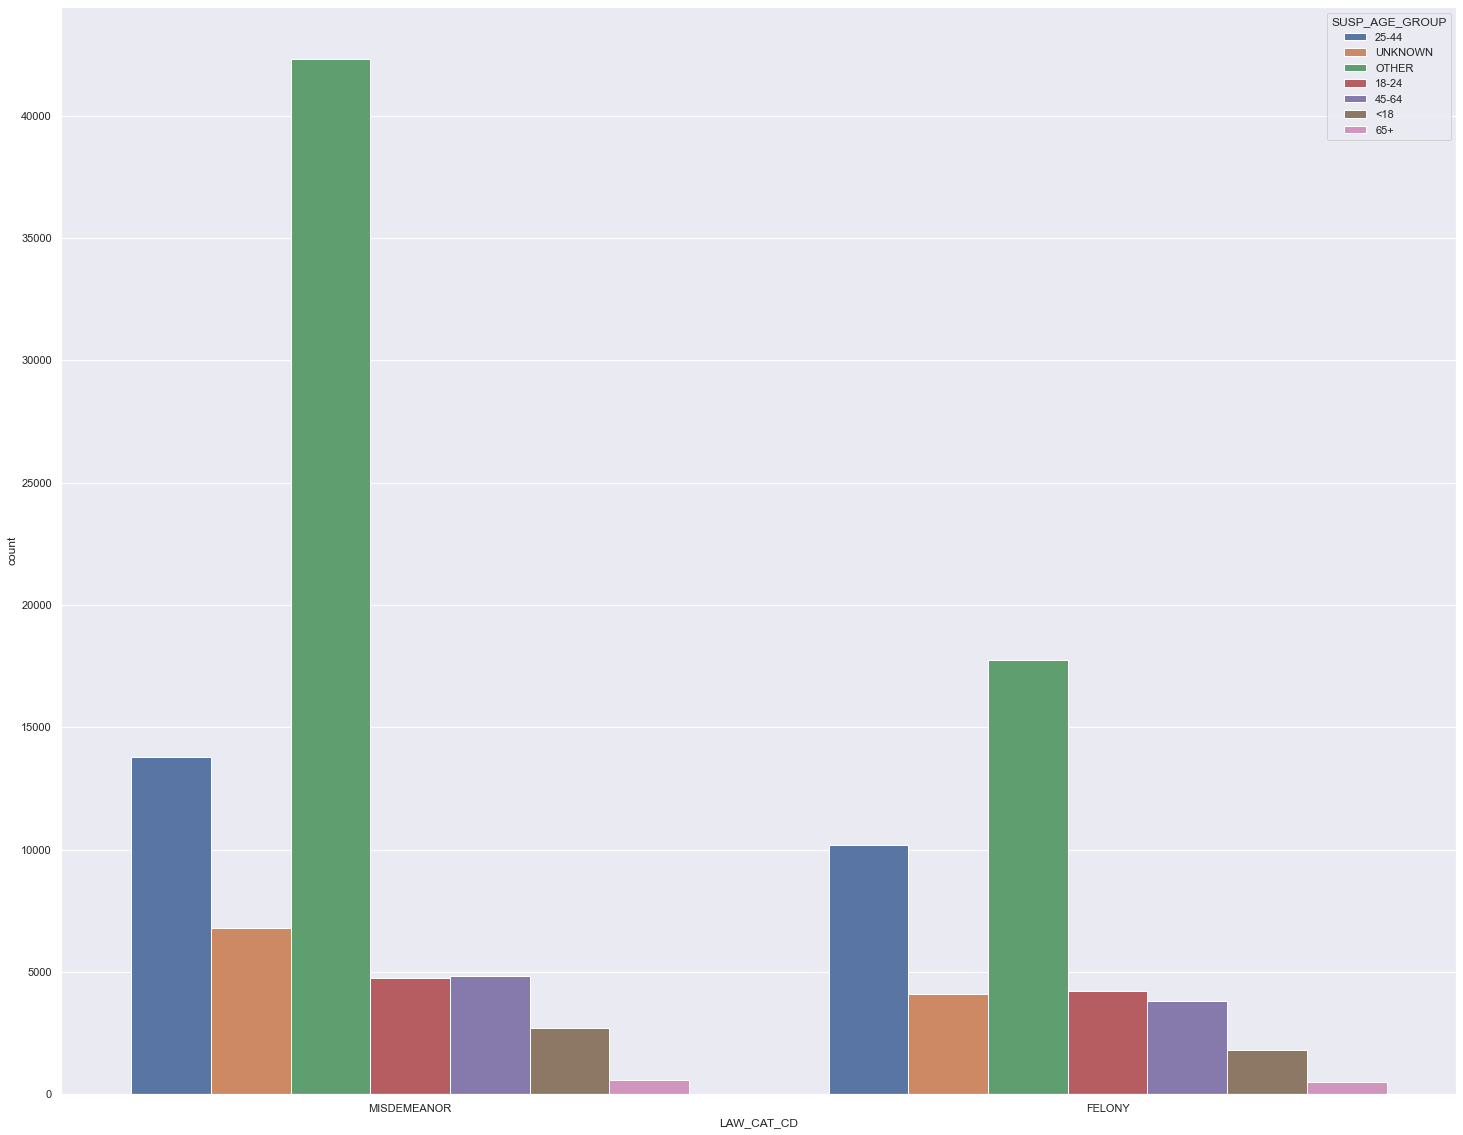

In [117]:
sns.countplot(data = df, hue = 'SUSP_AGE_GROUP', x = 'LAW_CAT_CD')

For Law Category, the data does not have the Suspect's Age for most individuals.

<AxesSubplot:xlabel='BORO_NM', ylabel='count'>

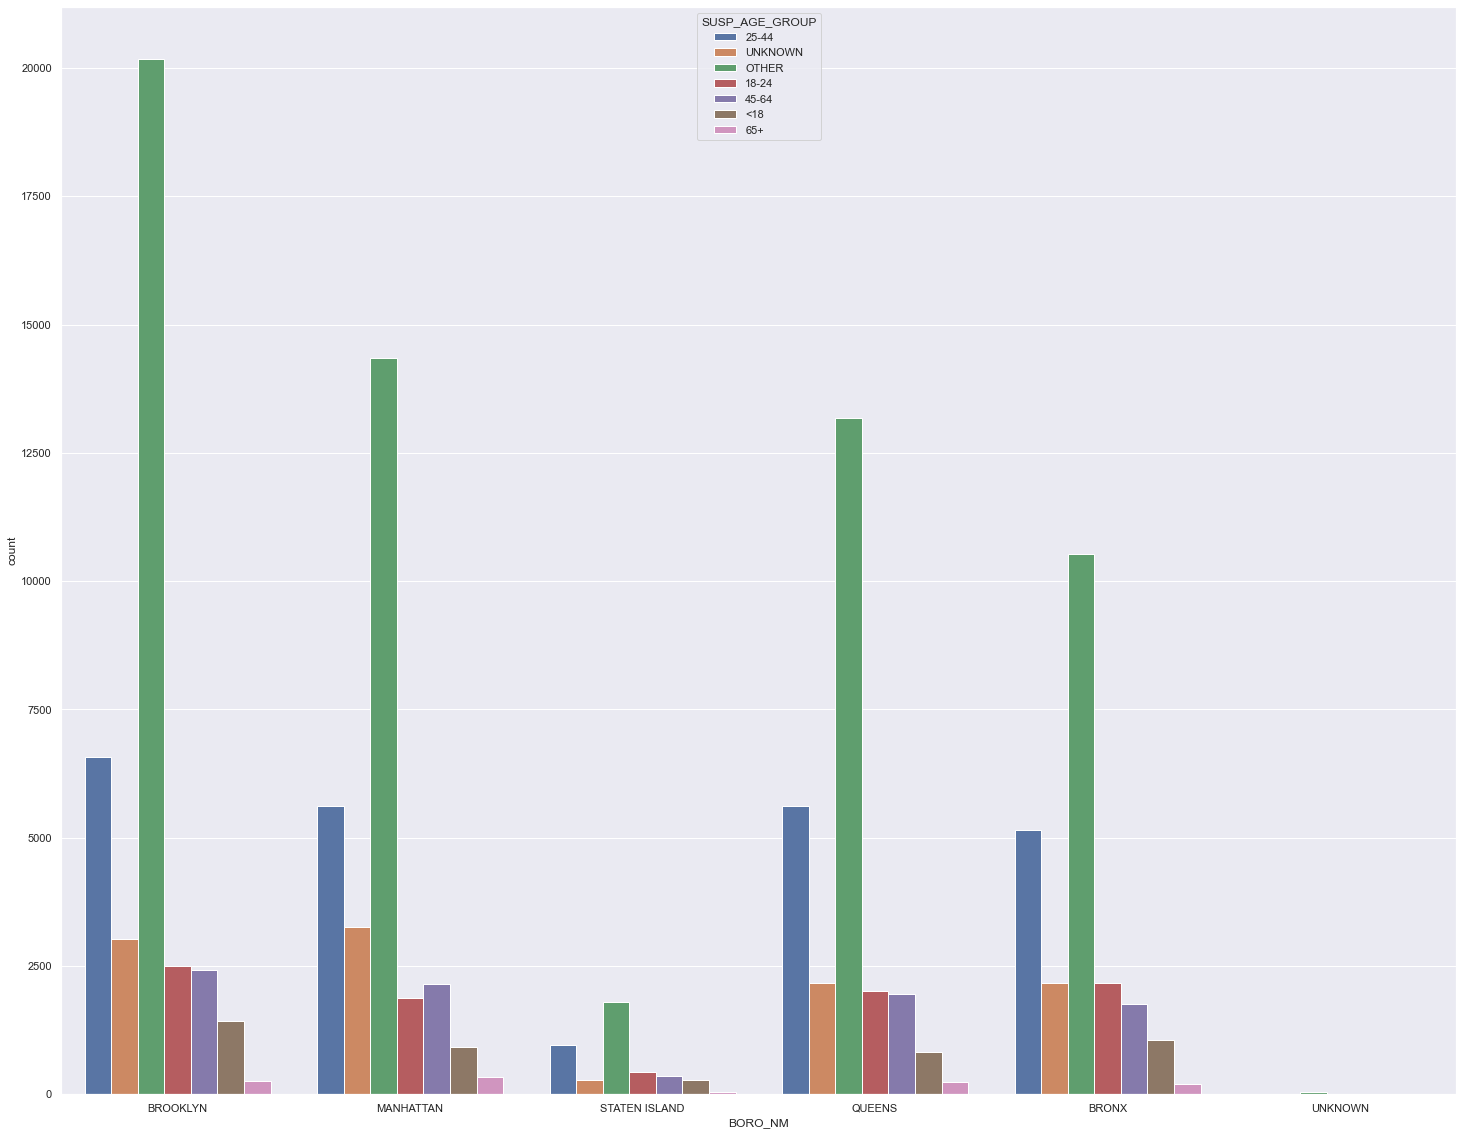

In [118]:
sns.countplot(data = df, hue = 'SUSP_AGE_GROUP', x = 'BORO_NM')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'N.Y. POLICE DEPT'),
  Text(1, 0, 'N.Y. HOUSING POLICE'),
  Text(2, 0, 'N.Y. TRANSIT POLICE'),
  Text(3, 0, 'PORT AUTHORITY'),
  Text(4, 0, 'OTHER')])

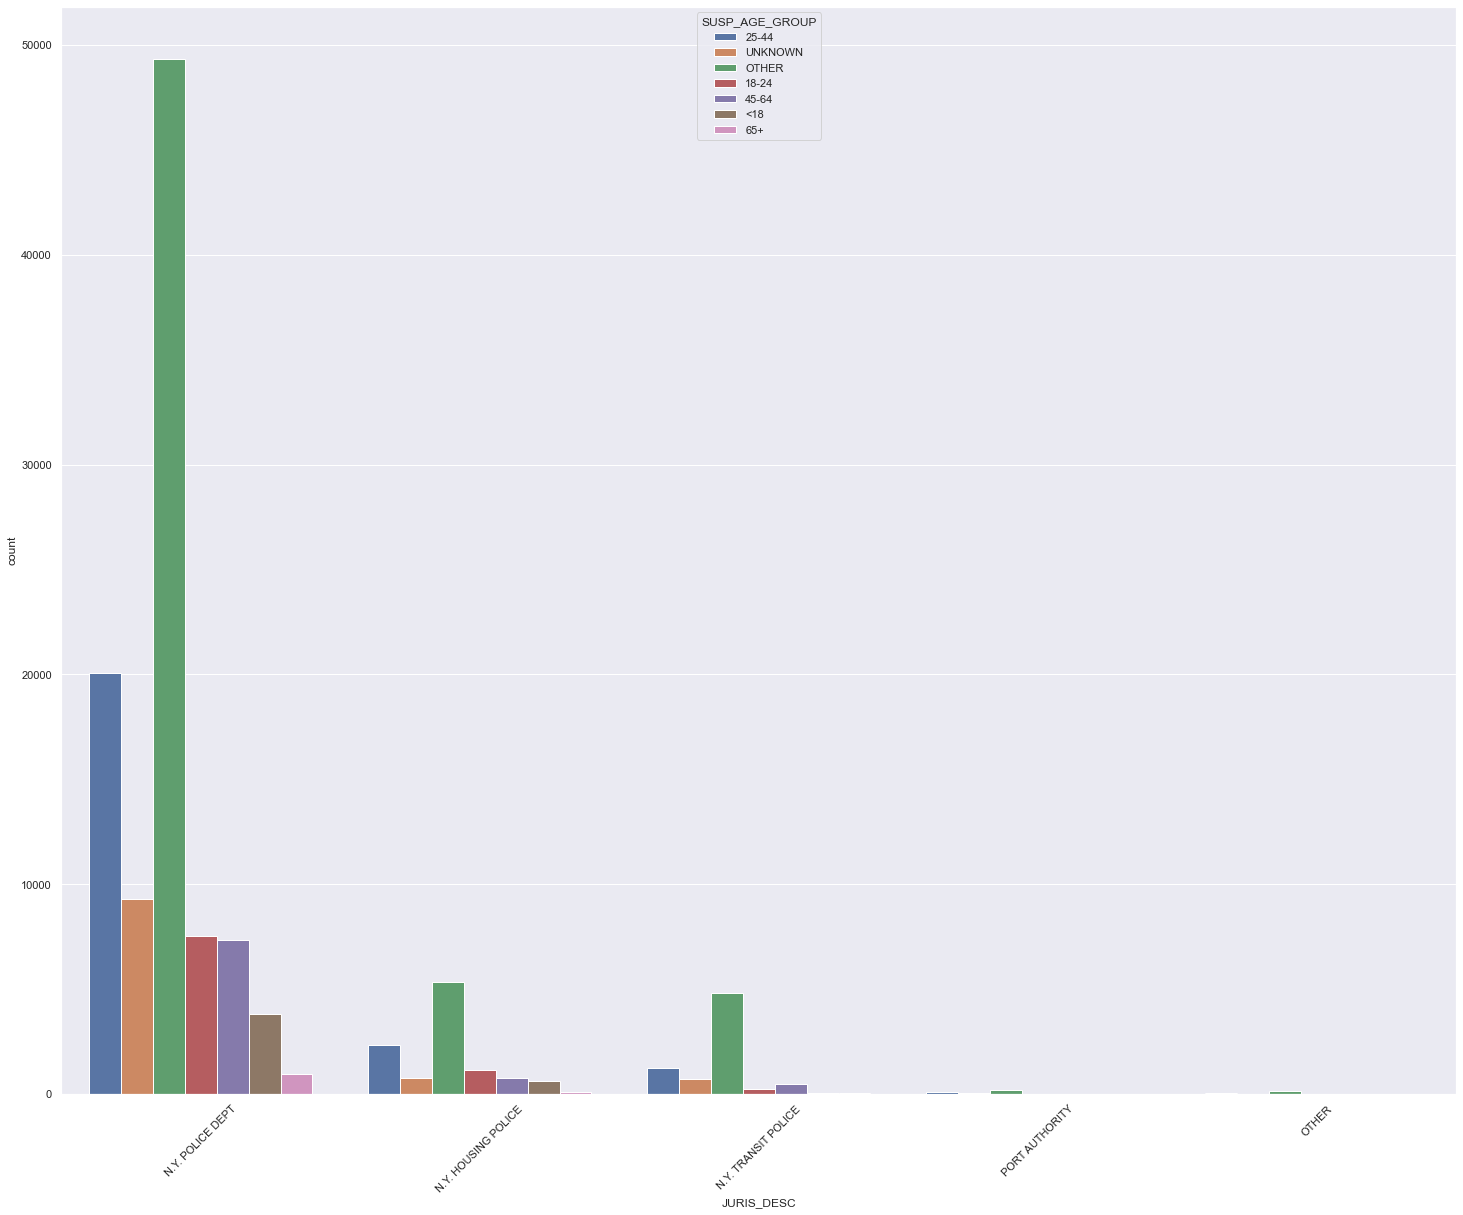

In [119]:
sns.countplot(data = df, hue = 'SUSP_AGE_GROUP', x = 'JURIS_DESC', order=pd.value_counts(df["JURIS_DESC"]).iloc[:5].index)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'PATROL BORO BKLYN NORTH'),
  Text(1, 0, 'PATROL BORO MAN NORTH'),
  Text(2, 0, 'PATROL BORO STATEN ISLAND'),
  Text(3, 0, 'PATROL BORO QUEENS NORTH'),
  Text(4, 0, 'PATROL BORO MAN SOUTH'),
  Text(5, 0, 'PATROL BORO BRONX'),
  Text(6, 0, 'PATROL BORO BKLYN SOUTH'),
  Text(7, 0, 'PATROL BORO QUEENS SOUTH'),
  Text(8, 0, 'UNKNOWN')])

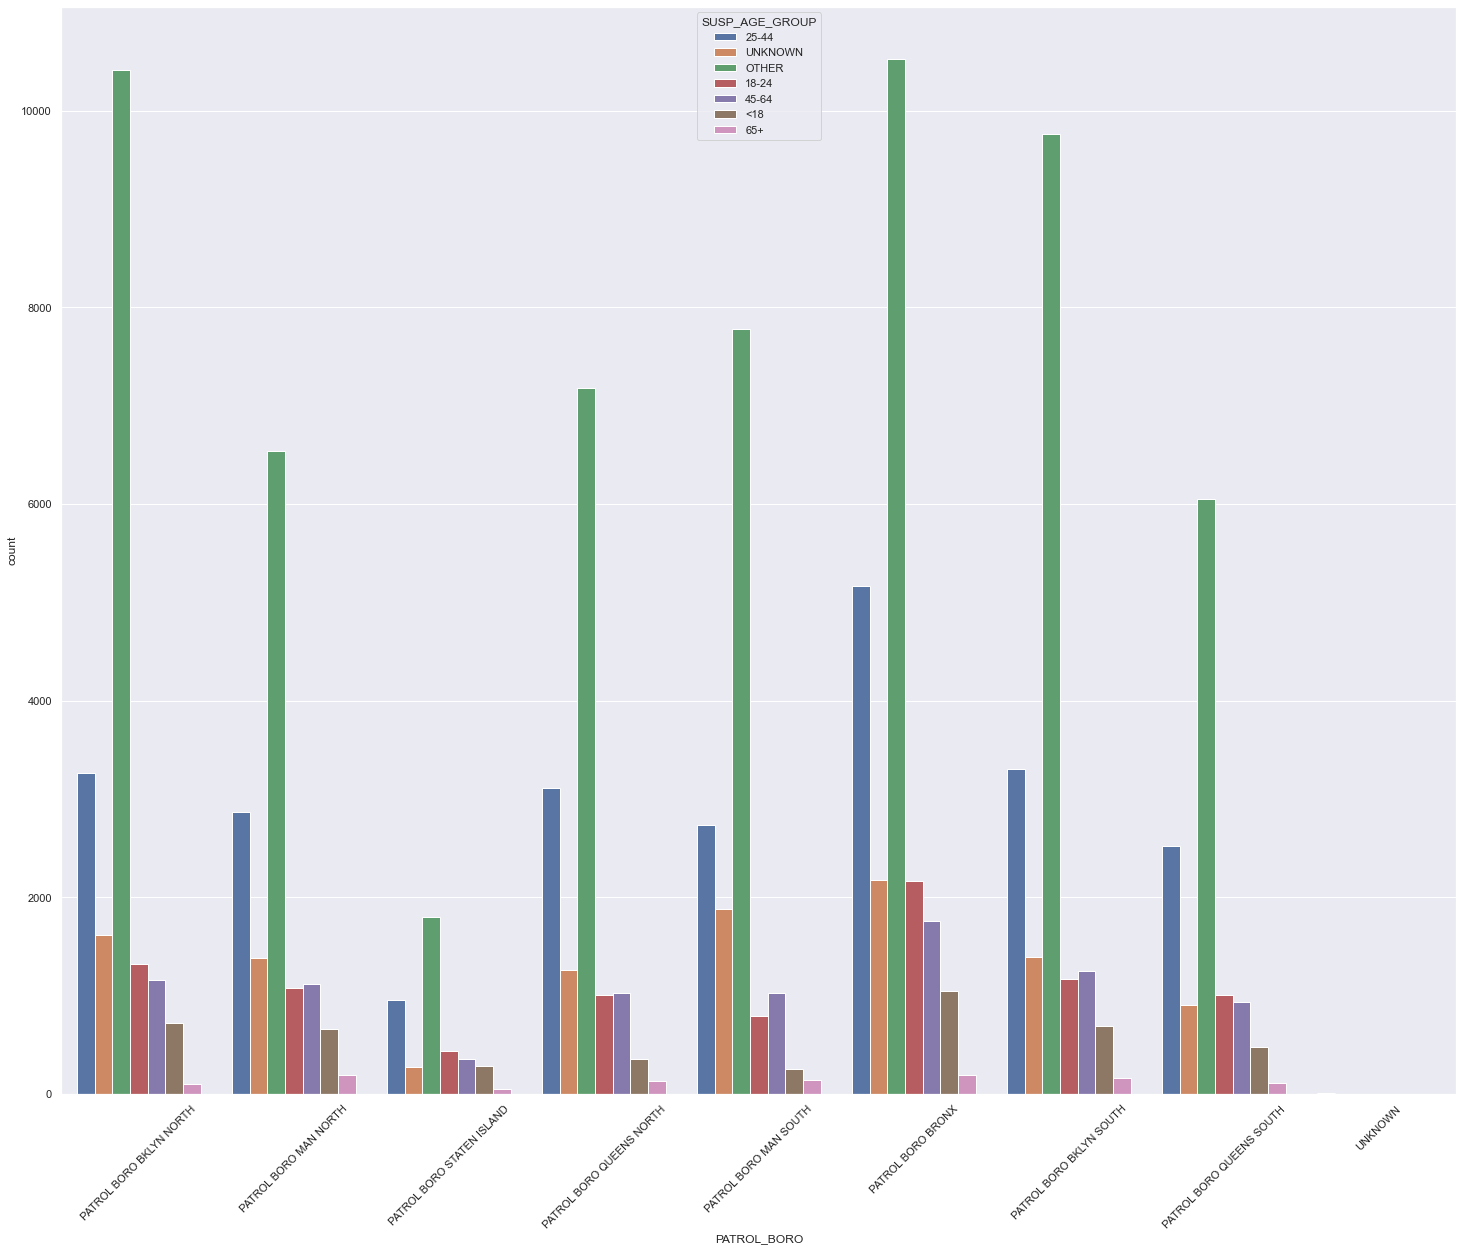

In [120]:
sns.countplot(data = df, hue = 'SUSP_AGE_GROUP', x = 'PATROL_BORO')
plt.xticks(rotation=45)

<AxesSubplot:xlabel='VIC_AGE_GROUP', ylabel='count'>

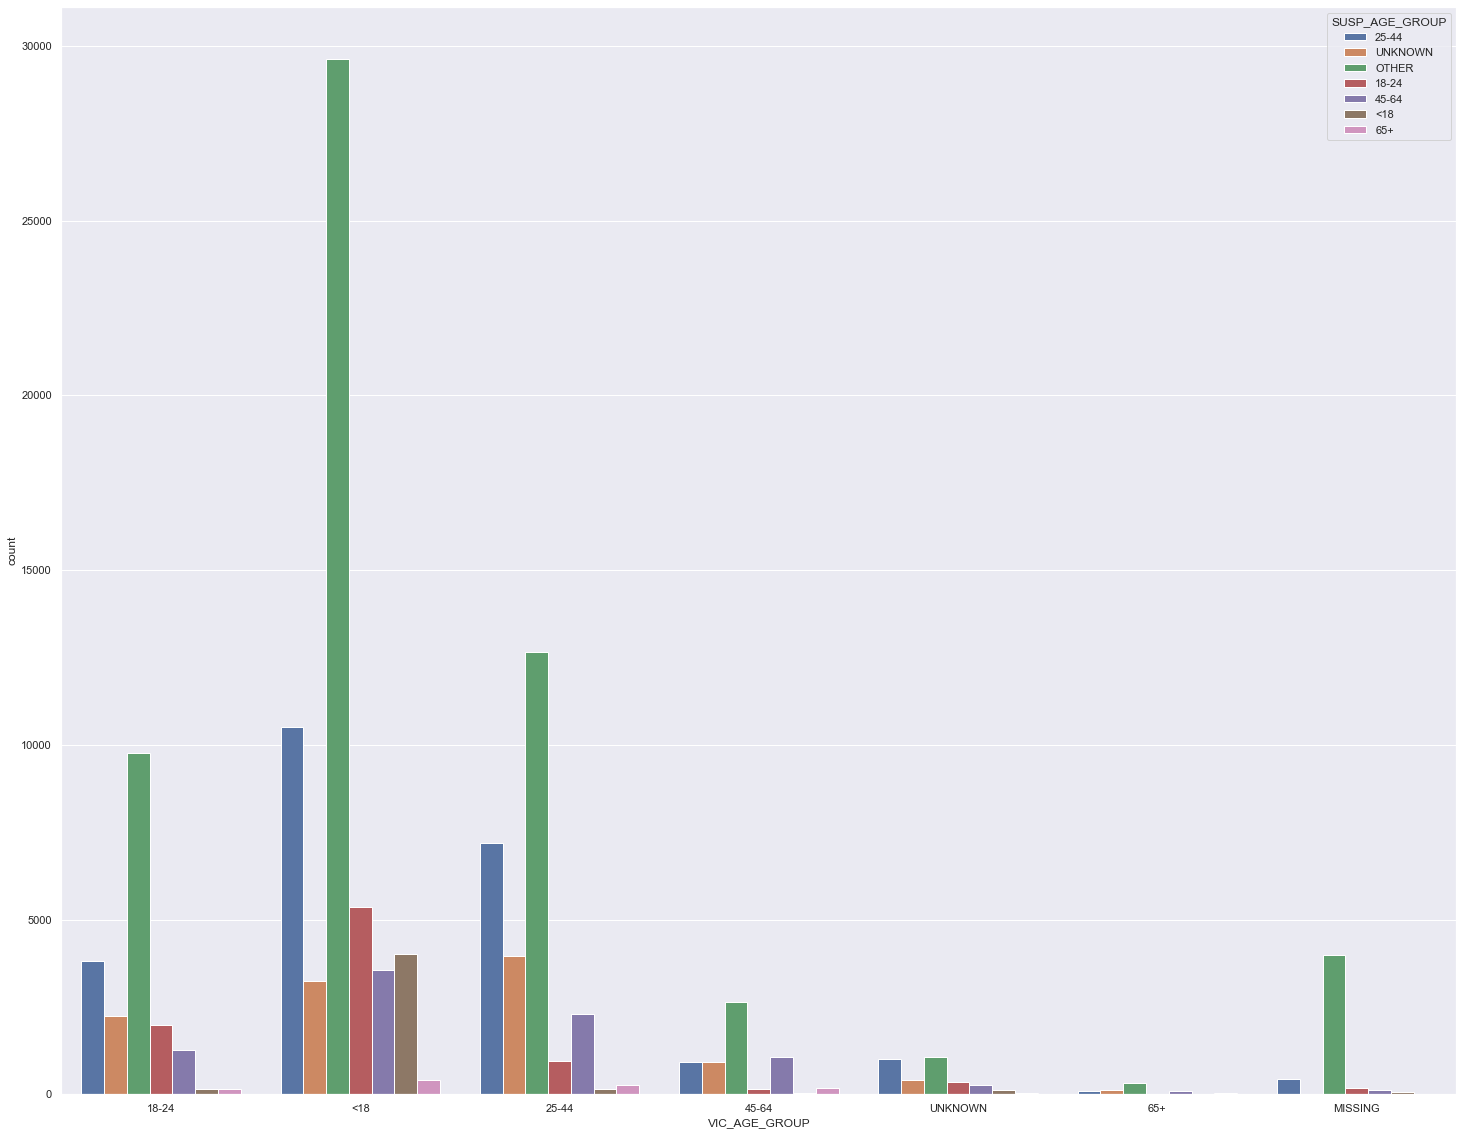

In [121]:
sns.countplot(data = df, hue = 'SUSP_AGE_GROUP', x = 'VIC_AGE_GROUP')

<AxesSubplot:xlabel='VIC_RACE', ylabel='count'>

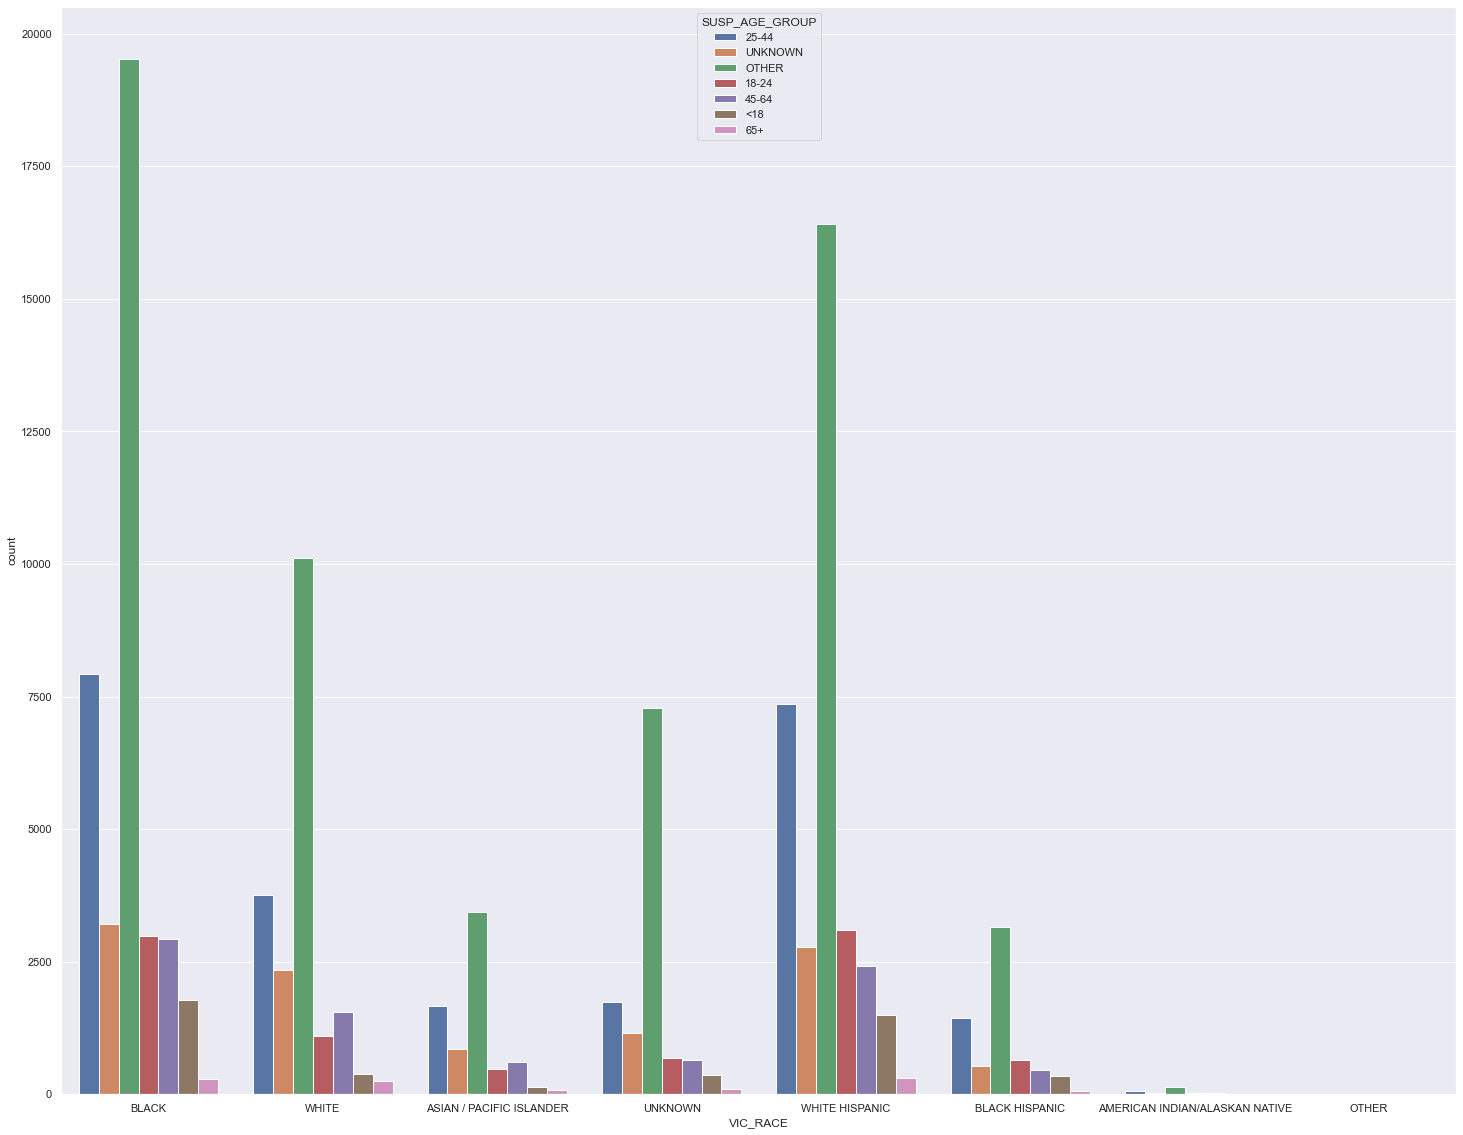

In [122]:
sns.countplot(data = df, hue = 'SUSP_AGE_GROUP', x = 'VIC_RACE')

<AxesSubplot:xlabel='VIC_SEX', ylabel='count'>

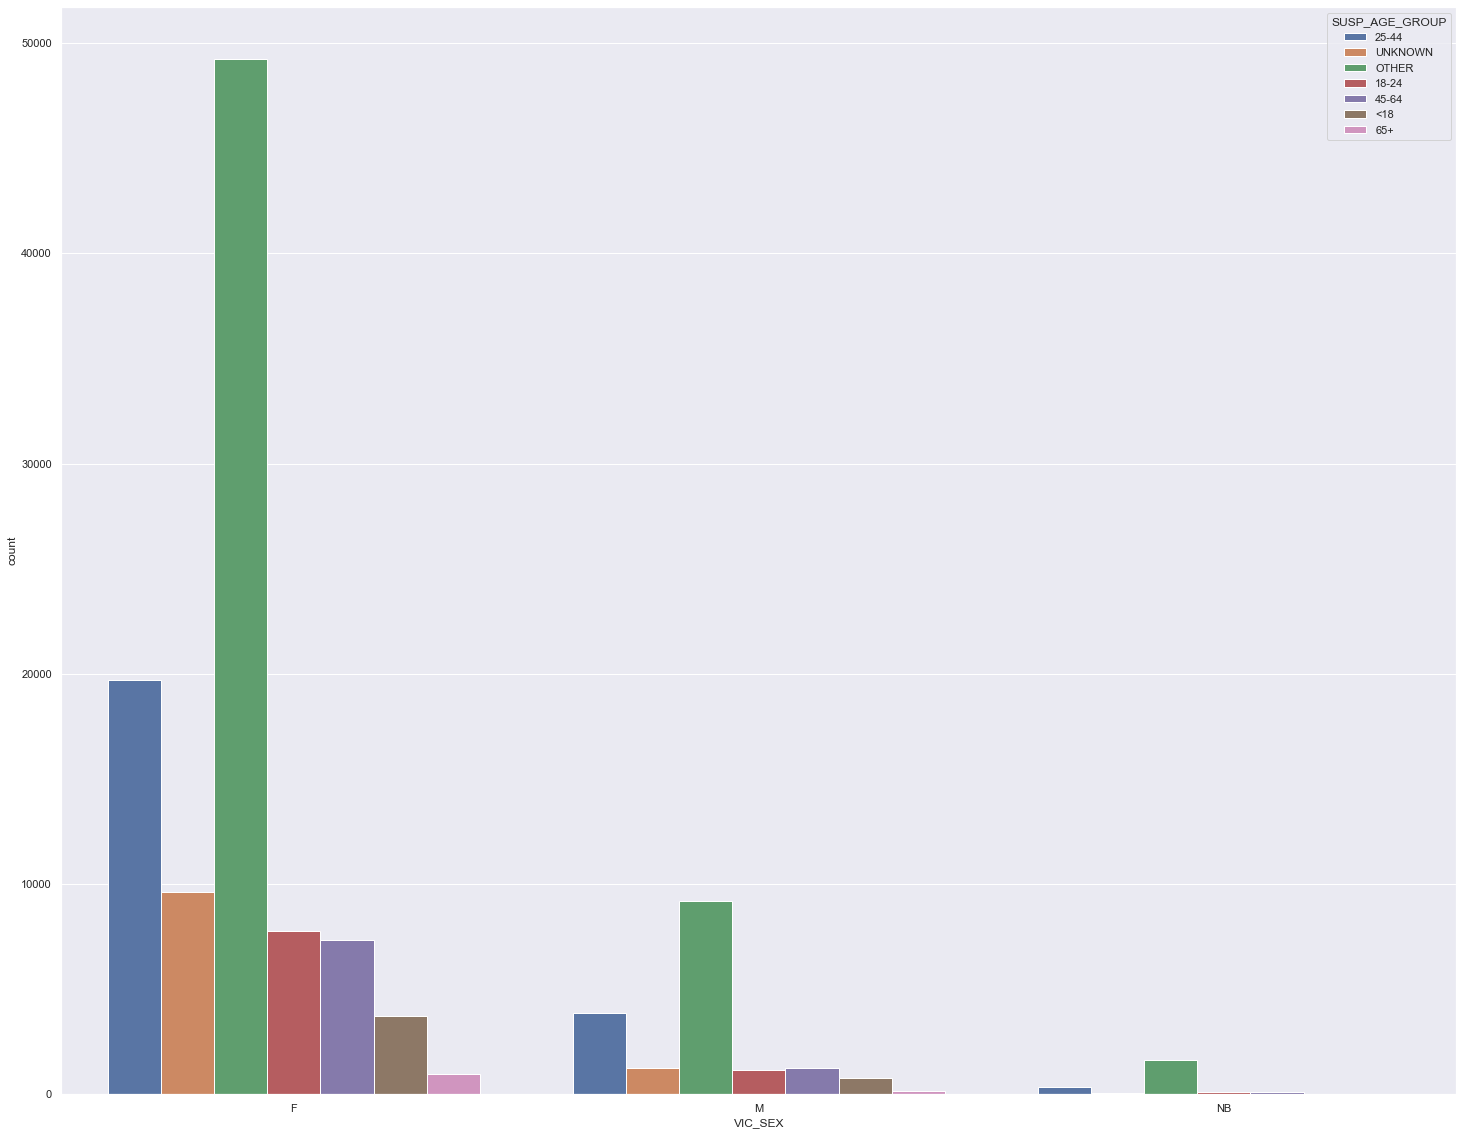

In [123]:
sns.countplot(data = df, hue = 'SUSP_AGE_GROUP', x = 'VIC_SEX')

### In most Sexual Assault crimes, the data does not have the Suspect's Age.

## Victim Age Group

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SEXUAL ABUSE 3,2'),
  Text(1, 0, 'CHILD, ENDANGERING WELFARE'),
  Text(2, 0, 'RAPE 1'),
  Text(3, 0, 'SODOMY 1'),
  Text(4, 0, 'SEXUAL ABUSE'),
  Text(5, 0, 'SEXUAL MISCONDUCT,INTERCOURSE'),
  Text(6, 0, 'AGGRAVATED SEXUAL ASBUSE'),
  Text(7, 0, 'RAPE 3'),
  Text(8, 0, 'RAPE 1,ATTEMPT'),
  Text(9, 0, 'RAPE 2')])

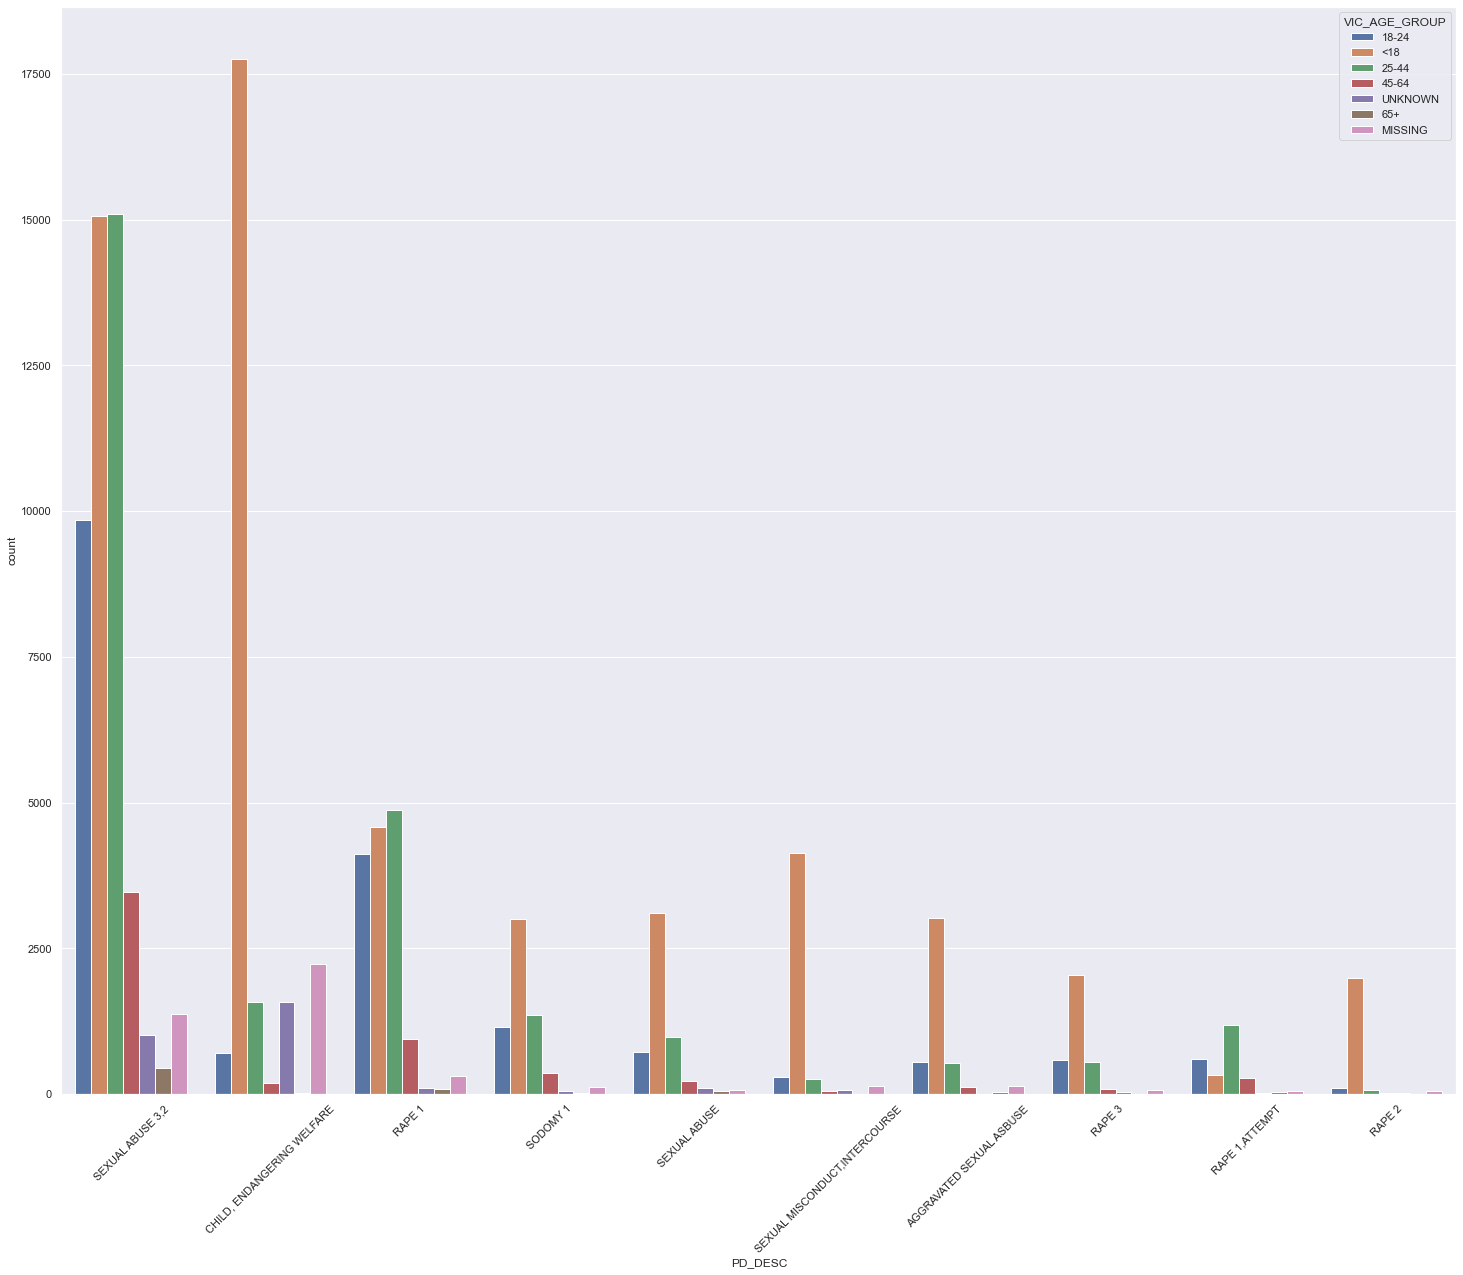

In [124]:
sns.countplot(data = df, hue = 'VIC_AGE_GROUP', x = 'PD_DESC', order=pd.value_counts(df["PD_DESC"]).iloc[:10].index)
plt.xticks(rotation=45)

Majority of Sexual Abuse 3,2 occurs in the age group below 18 and 25 to 44. Majority of Rape 1 occurs below 18 and between 18 to 44.

<AxesSubplot:xlabel='CRM_ATPT_CPTD_CD', ylabel='count'>

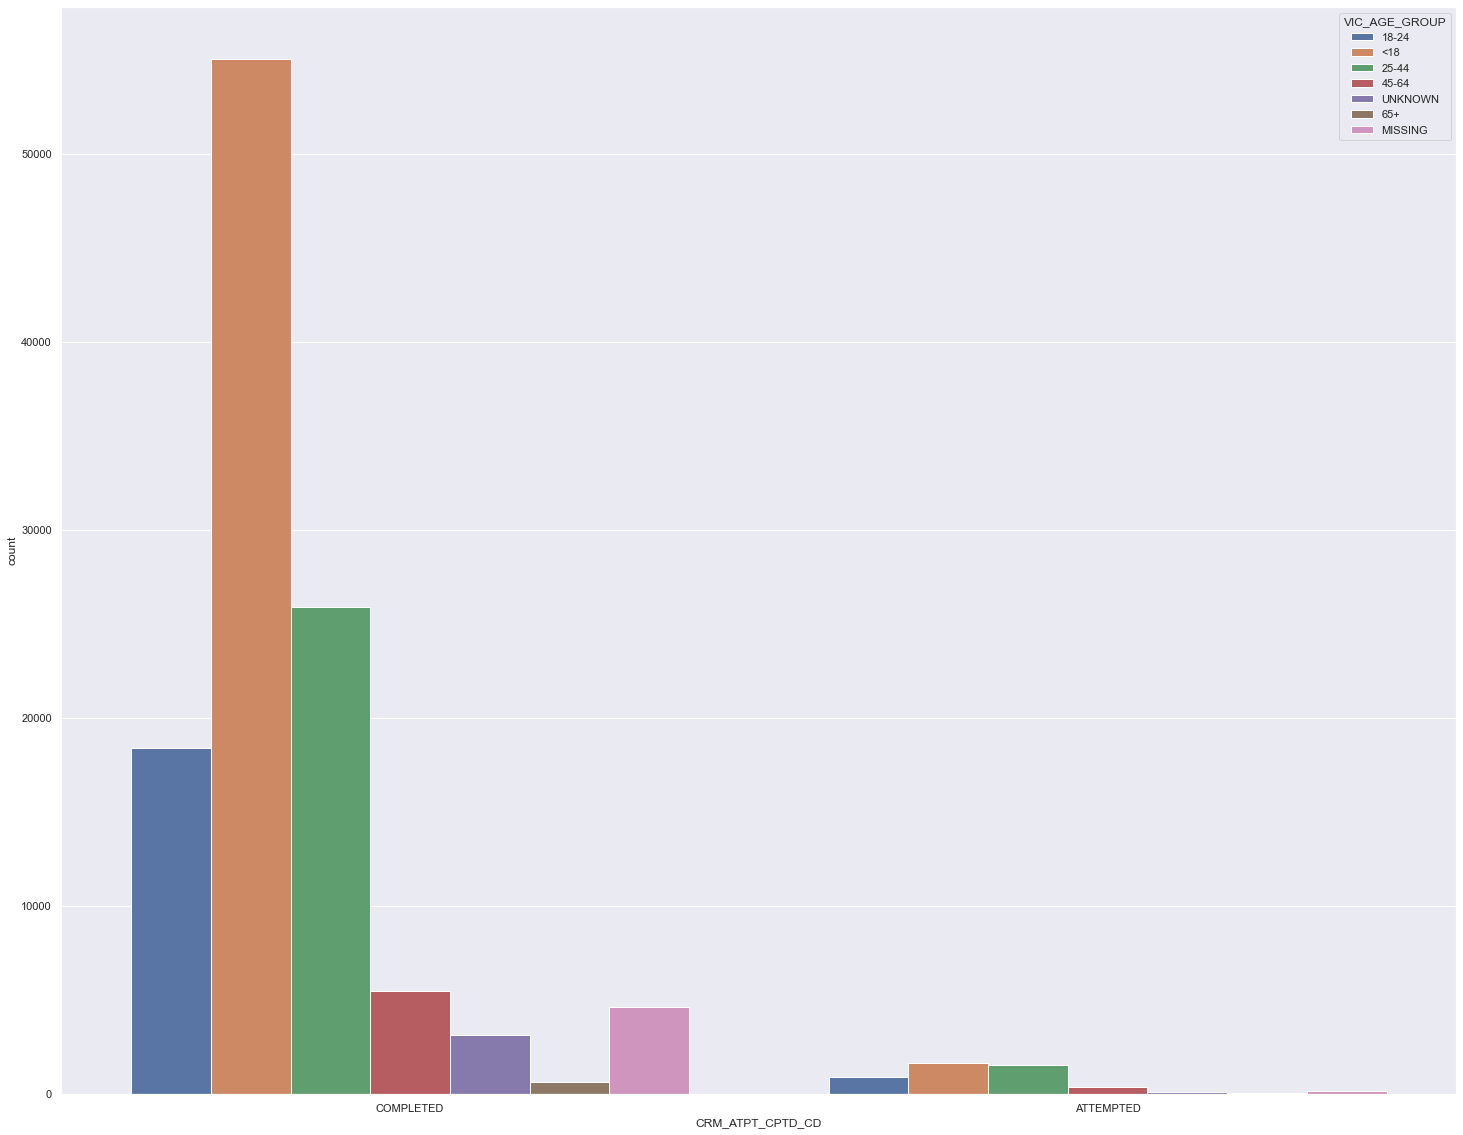

In [125]:
sns.countplot(data = df, hue = 'VIC_AGE_GROUP', x = 'CRM_ATPT_CPTD_CD')

Completed crimes were mainly in the age group below 18.

<AxesSubplot:xlabel='LAW_CAT_CD', ylabel='count'>

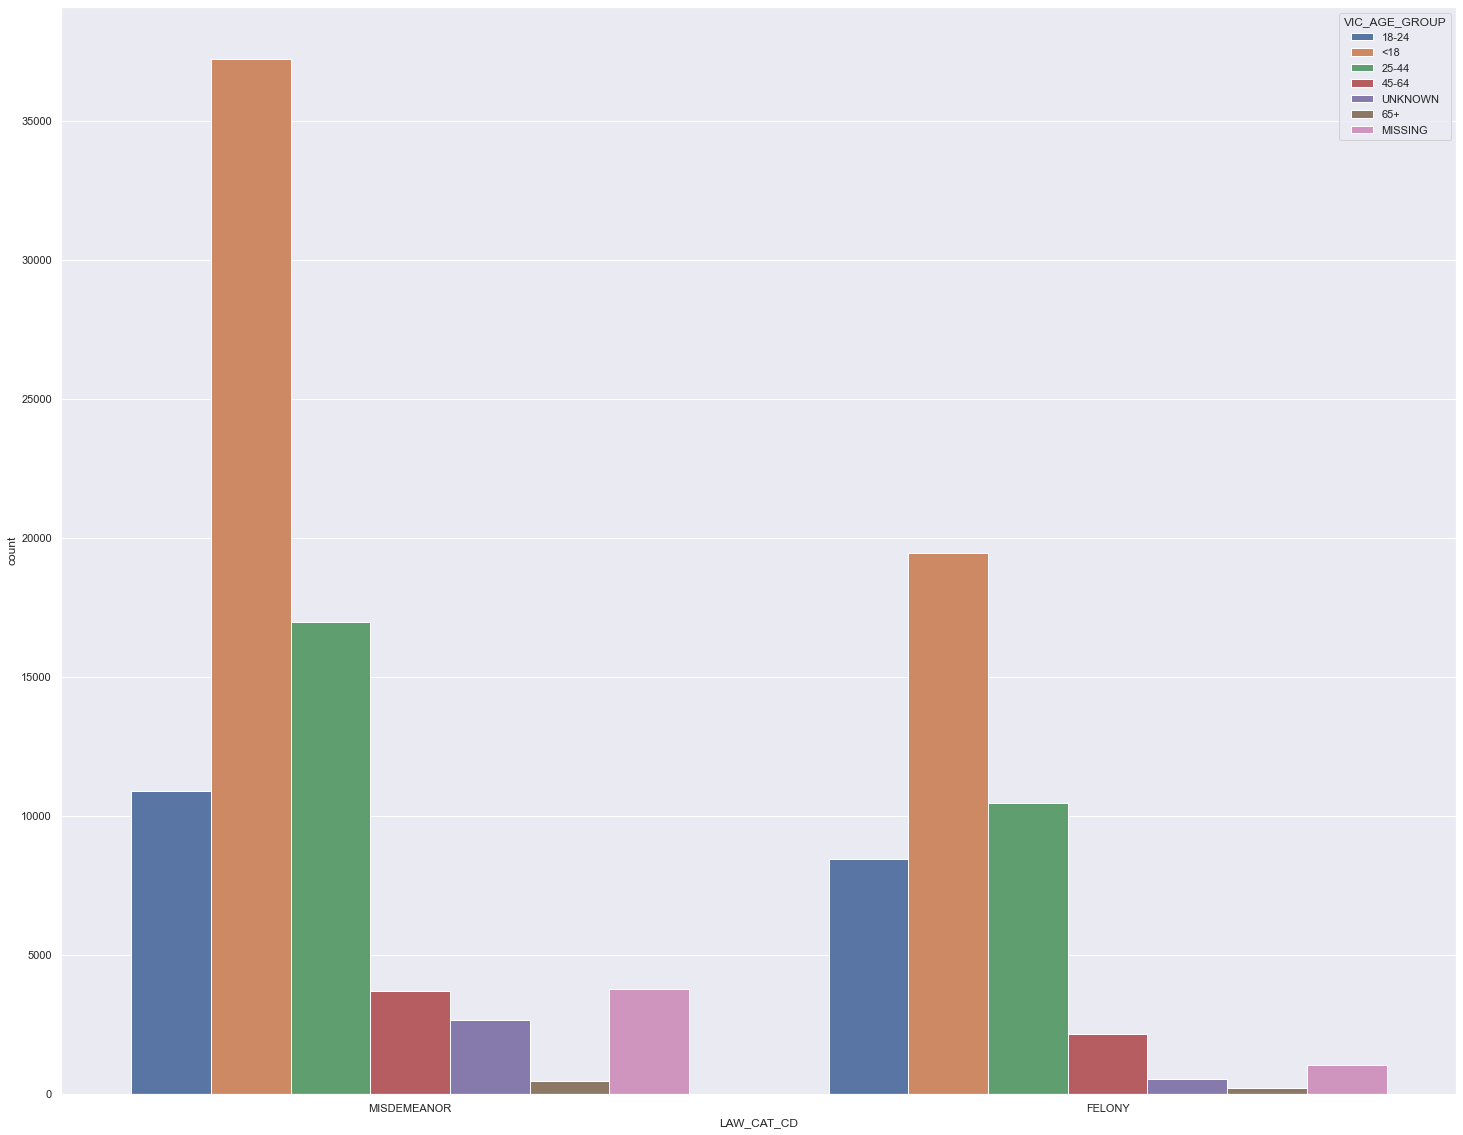

In [126]:
sns.countplot(data = df, hue = 'VIC_AGE_GROUP', x = 'LAW_CAT_CD')

Majority crimes were mainly in the age group below 18.

<AxesSubplot:xlabel='BORO_NM', ylabel='count'>

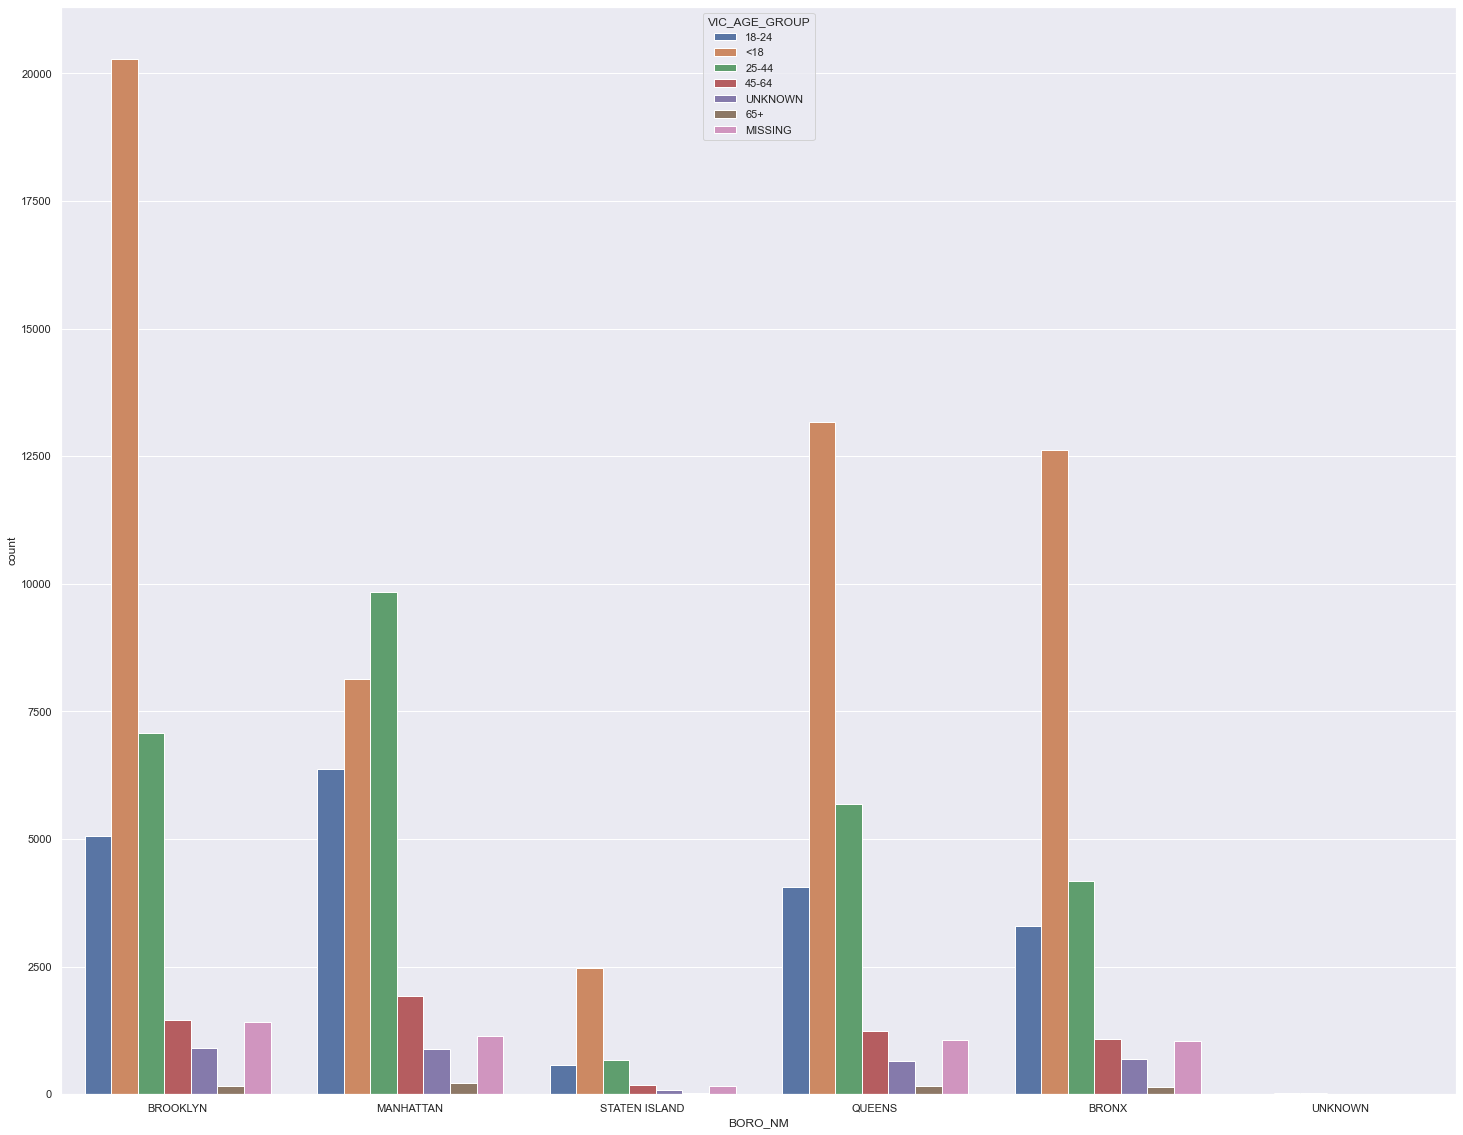

In [127]:
sns.countplot(data = df, hue = 'VIC_AGE_GROUP', x = 'BORO_NM')

In Brooklyn, Queens, Bronx and Staten Island most victims were below 18 years of age. In Manhattan, most victims are between 25 and 44.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'N.Y. POLICE DEPT'),
  Text(1, 0, 'N.Y. HOUSING POLICE'),
  Text(2, 0, 'N.Y. TRANSIT POLICE'),
  Text(3, 0, 'PORT AUTHORITY'),
  Text(4, 0, 'OTHER')])

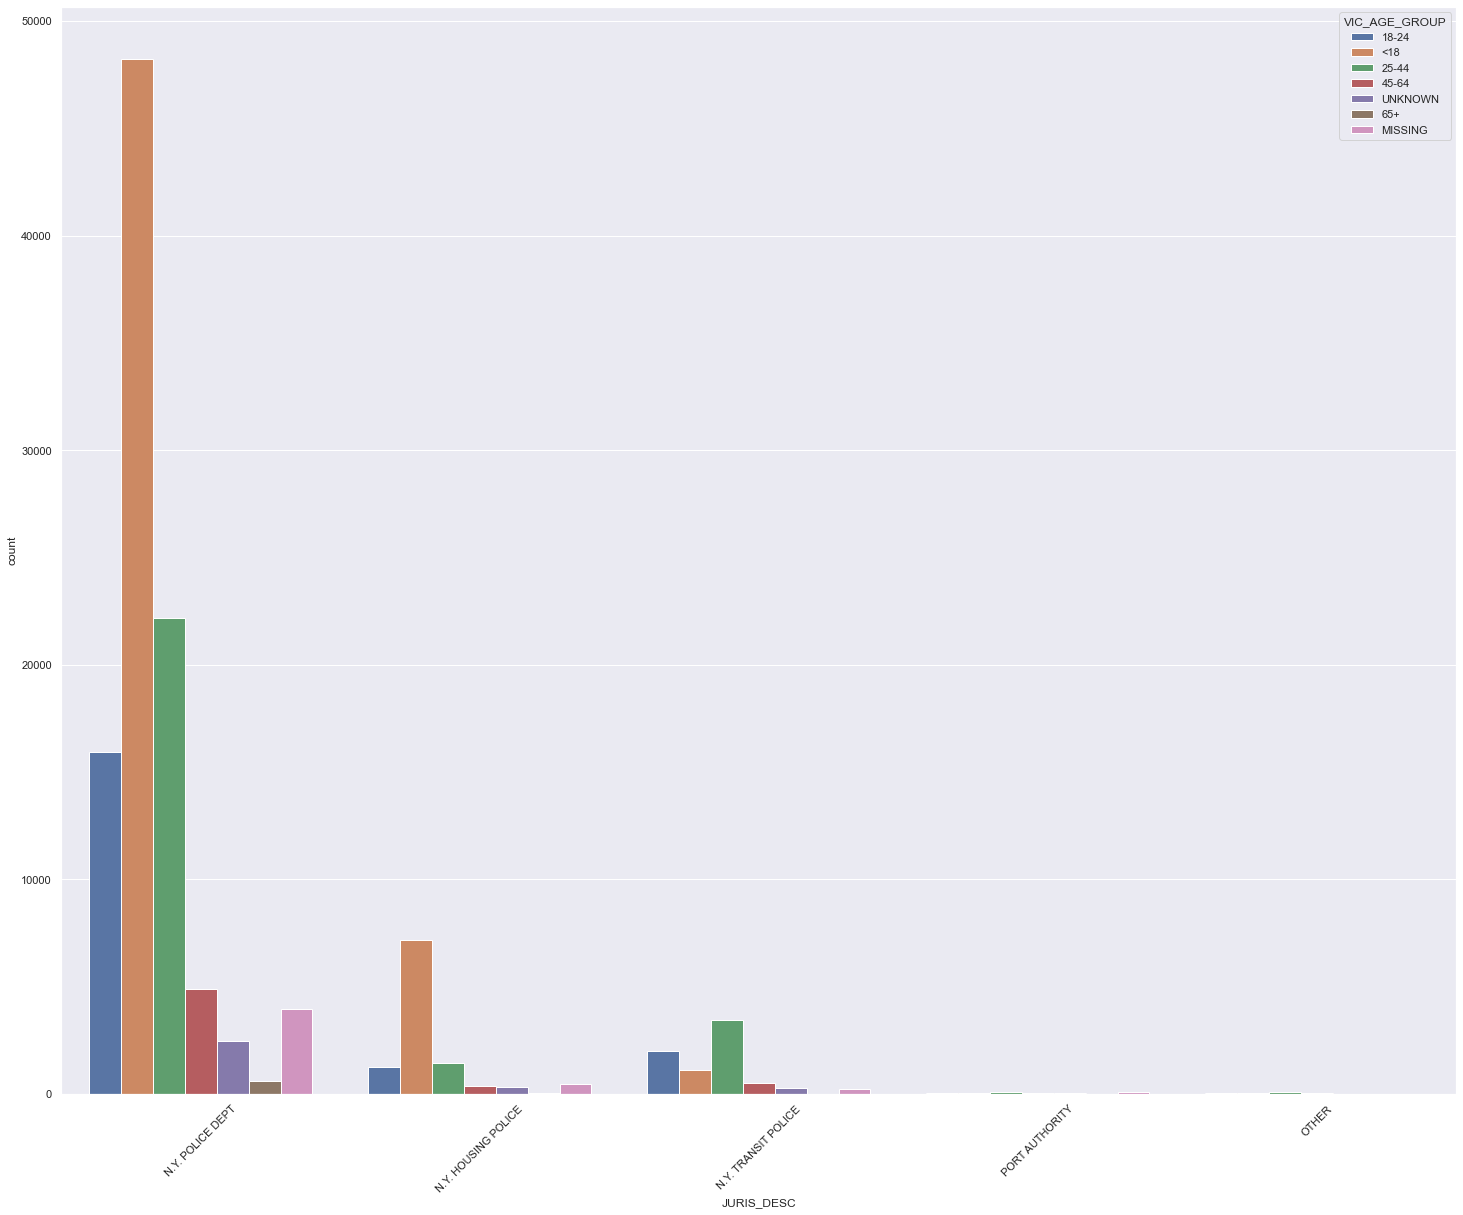

In [128]:
sns.countplot(data = df, hue = 'VIC_AGE_GROUP', x = 'JURIS_DESC', order=pd.value_counts(df["JURIS_DESC"]).iloc[:5].index)
plt.xticks(rotation=45)

Under NYPD and NY Housing Police, most victims are below 18. Under NY Transit Police, most victims are between 25 and 44.

<AxesSubplot:xlabel='SUSP_AGE_GROUP', ylabel='count'>

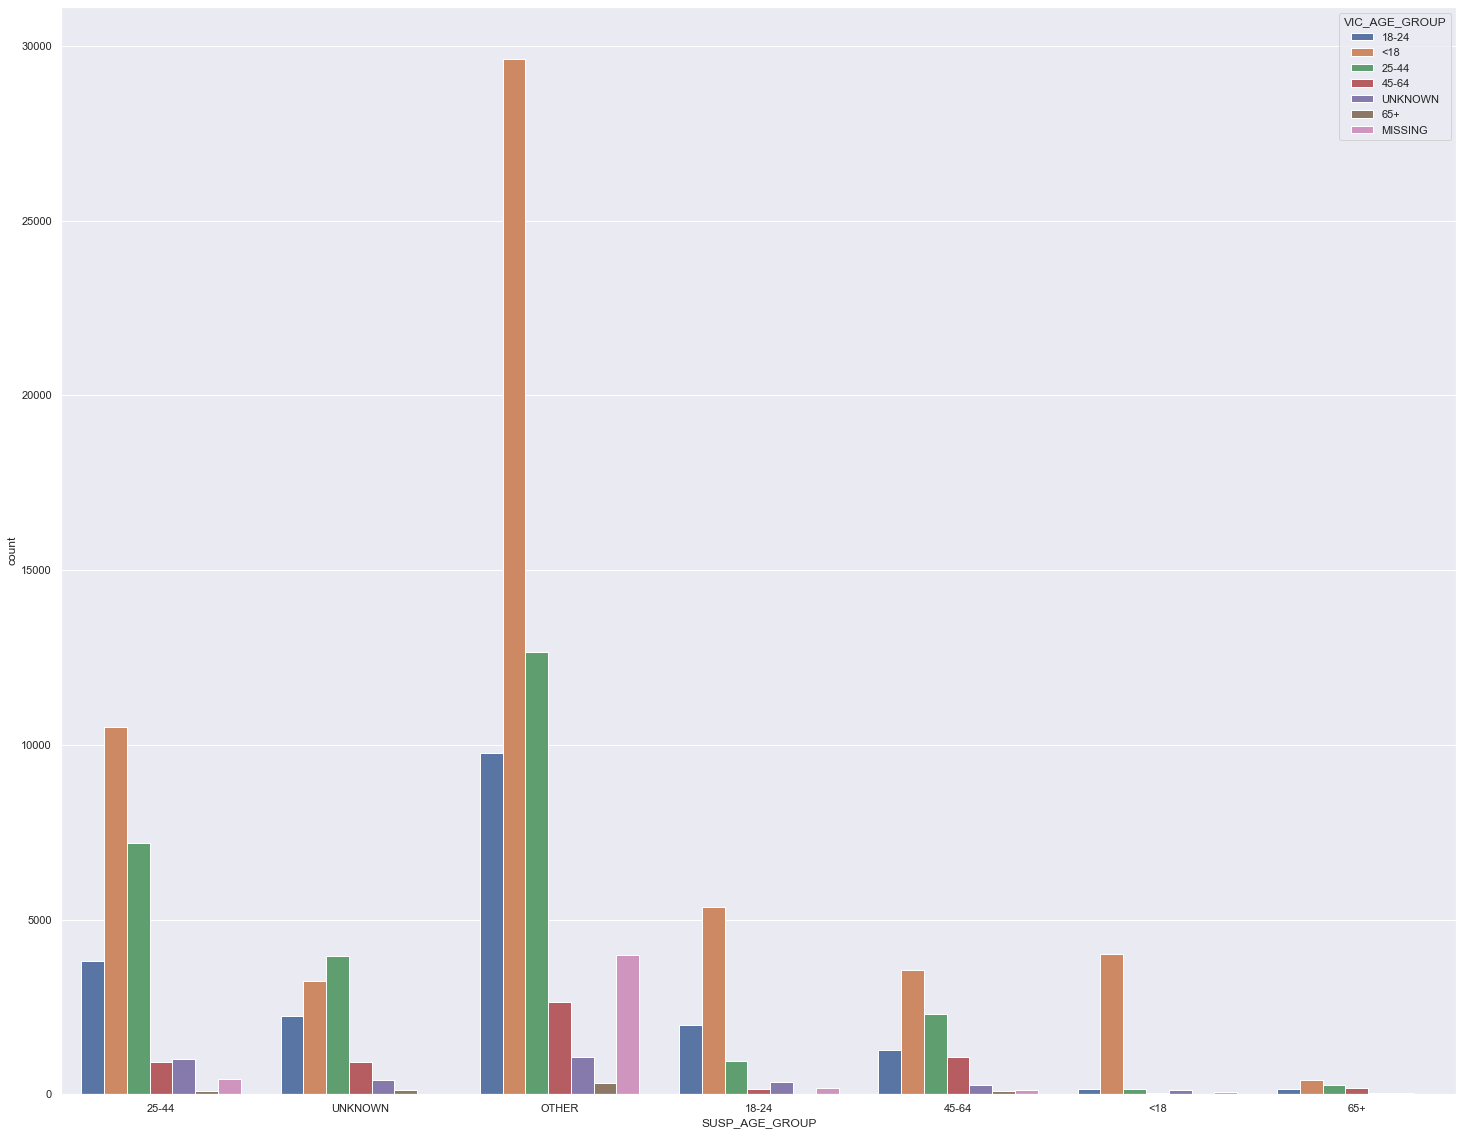

In [129]:
sns.countplot(data = df, hue = 'VIC_AGE_GROUP', x = 'SUSP_AGE_GROUP')

For suspects between 25 and 44 years of age, victims were mostly under 18 years. When the age group of the suspect was unknown, most victims were under 18. When the age group of the suspect was missing in the dataset, the age group ov vicyims was below 18. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'PATROL BORO BKLYN NORTH'),
  Text(1, 0, 'PATROL BORO MAN NORTH'),
  Text(2, 0, 'PATROL BORO STATEN ISLAND'),
  Text(3, 0, 'PATROL BORO QUEENS NORTH'),
  Text(4, 0, 'PATROL BORO MAN SOUTH'),
  Text(5, 0, 'PATROL BORO BRONX'),
  Text(6, 0, 'PATROL BORO BKLYN SOUTH'),
  Text(7, 0, 'PATROL BORO QUEENS SOUTH'),
  Text(8, 0, 'UNKNOWN')])

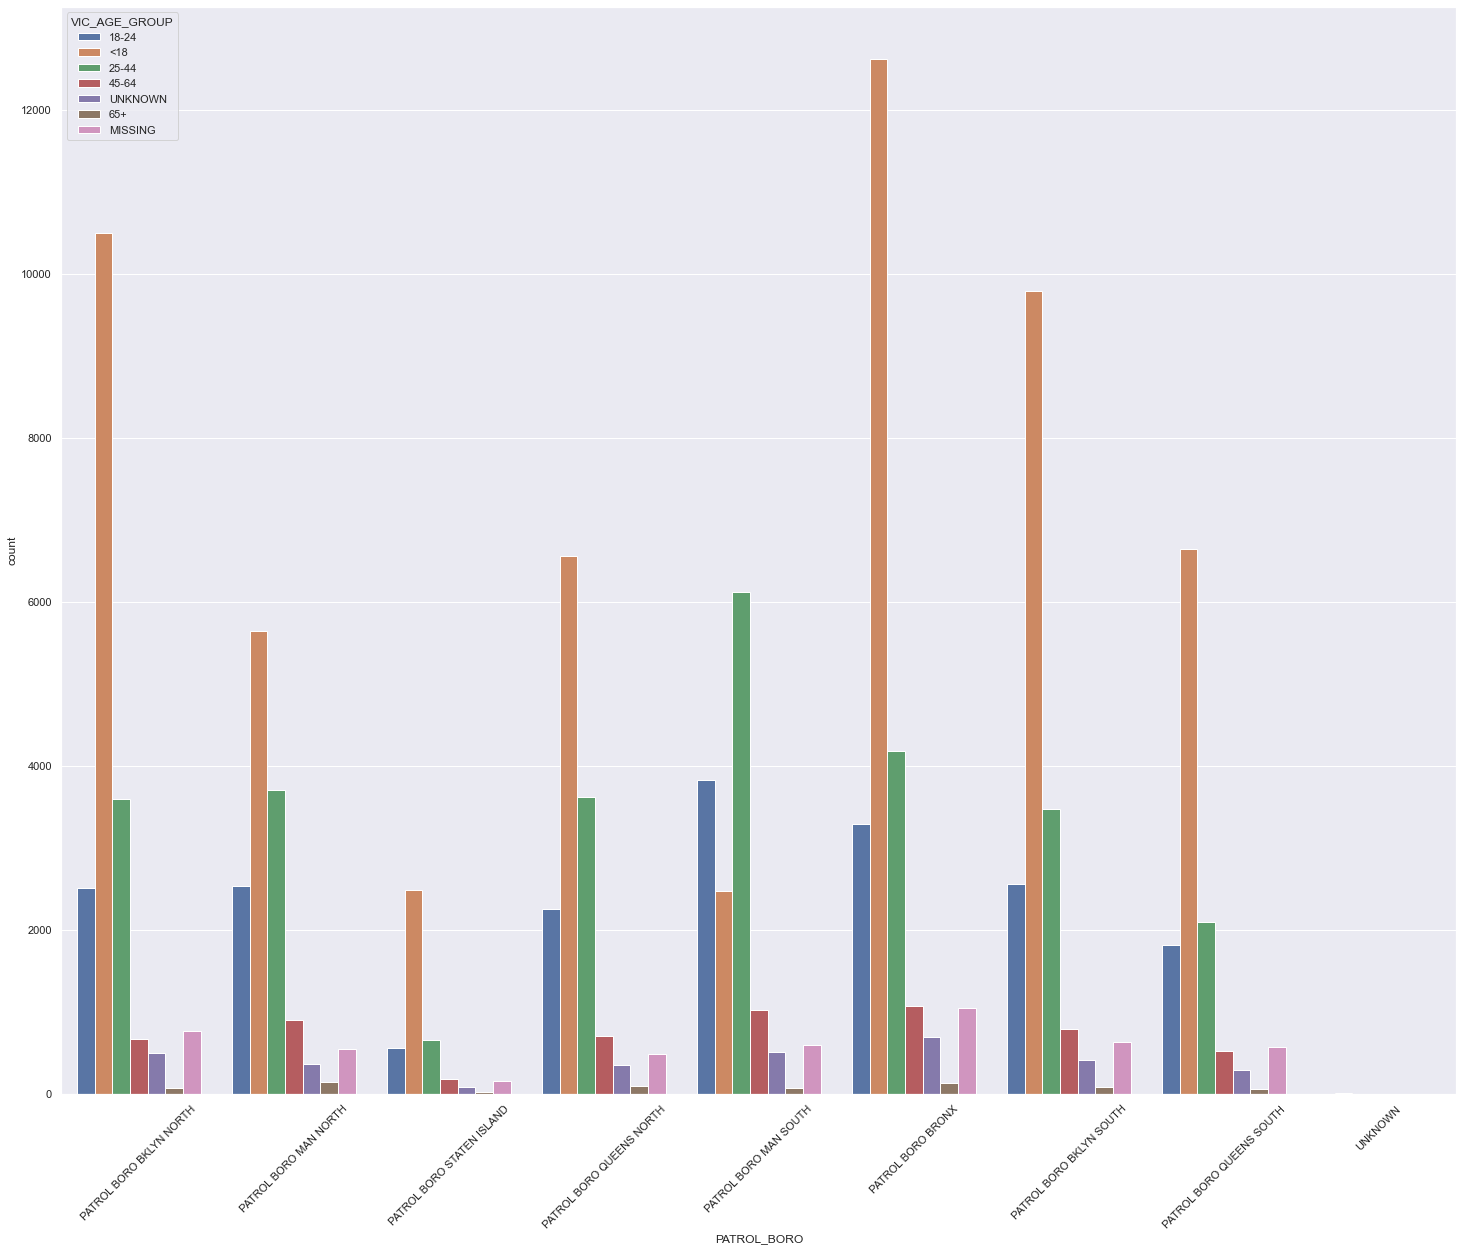

In [130]:
sns.countplot(data = df, hue = 'VIC_AGE_GROUP', x = 'PATROL_BORO')
plt.xticks(rotation=45)

All Patrol Boroughs except Manhattan South follow the same trend for Victim's Ages.

<AxesSubplot:xlabel='VIC_RACE', ylabel='count'>

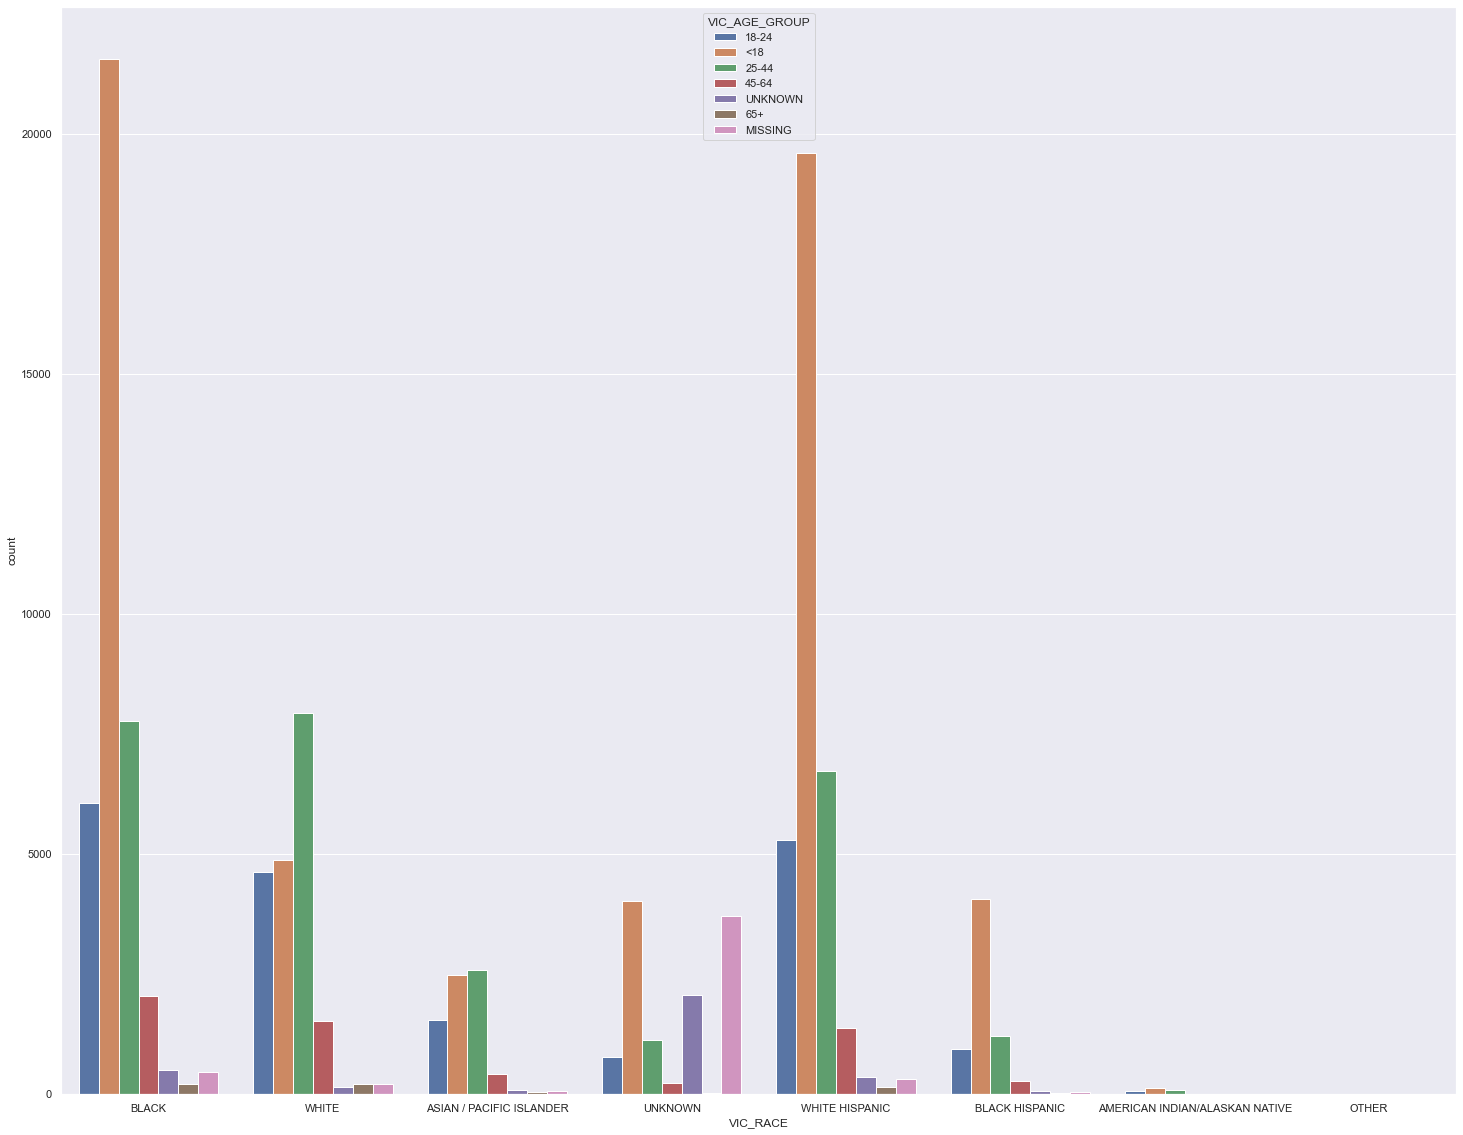

In [131]:
sns.countplot(data = df, hue = 'VIC_AGE_GROUP', x = 'VIC_RACE')

When the victims identify as Black, White Hispanic and Black Hispanic the majority victims are below 18. When the victims identify as White, the majority victims are between 25 and 44. 

<AxesSubplot:xlabel='VIC_SEX', ylabel='count'>

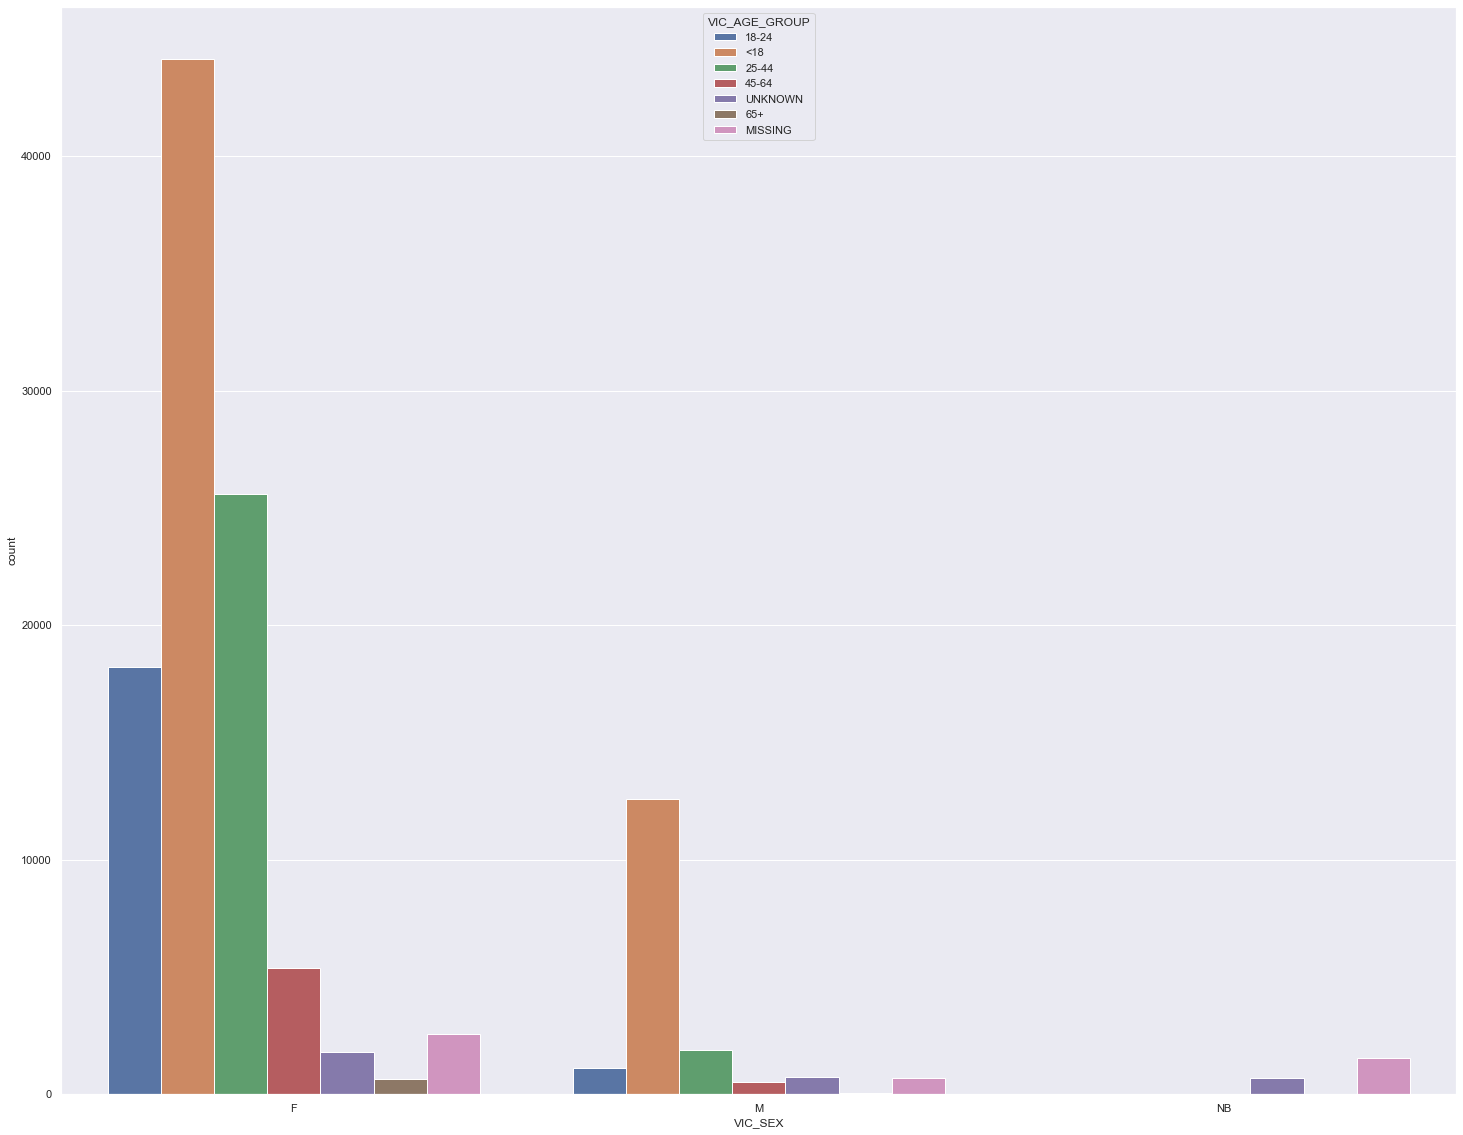

In [132]:
sns.countplot(data = df, hue = 'VIC_AGE_GROUP', x = 'VIC_SEX')

Male and Female victims are mostly below the age of 18.

## Victim Race

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SEXUAL ABUSE 3,2'),
  Text(1, 0, 'CHILD, ENDANGERING WELFARE'),
  Text(2, 0, 'RAPE 1'),
  Text(3, 0, 'SODOMY 1'),
  Text(4, 0, 'SEXUAL ABUSE'),
  Text(5, 0, 'SEXUAL MISCONDUCT,INTERCOURSE'),
  Text(6, 0, 'AGGRAVATED SEXUAL ASBUSE'),
  Text(7, 0, 'RAPE 3'),
  Text(8, 0, 'RAPE 1,ATTEMPT'),
  Text(9, 0, 'RAPE 2')])

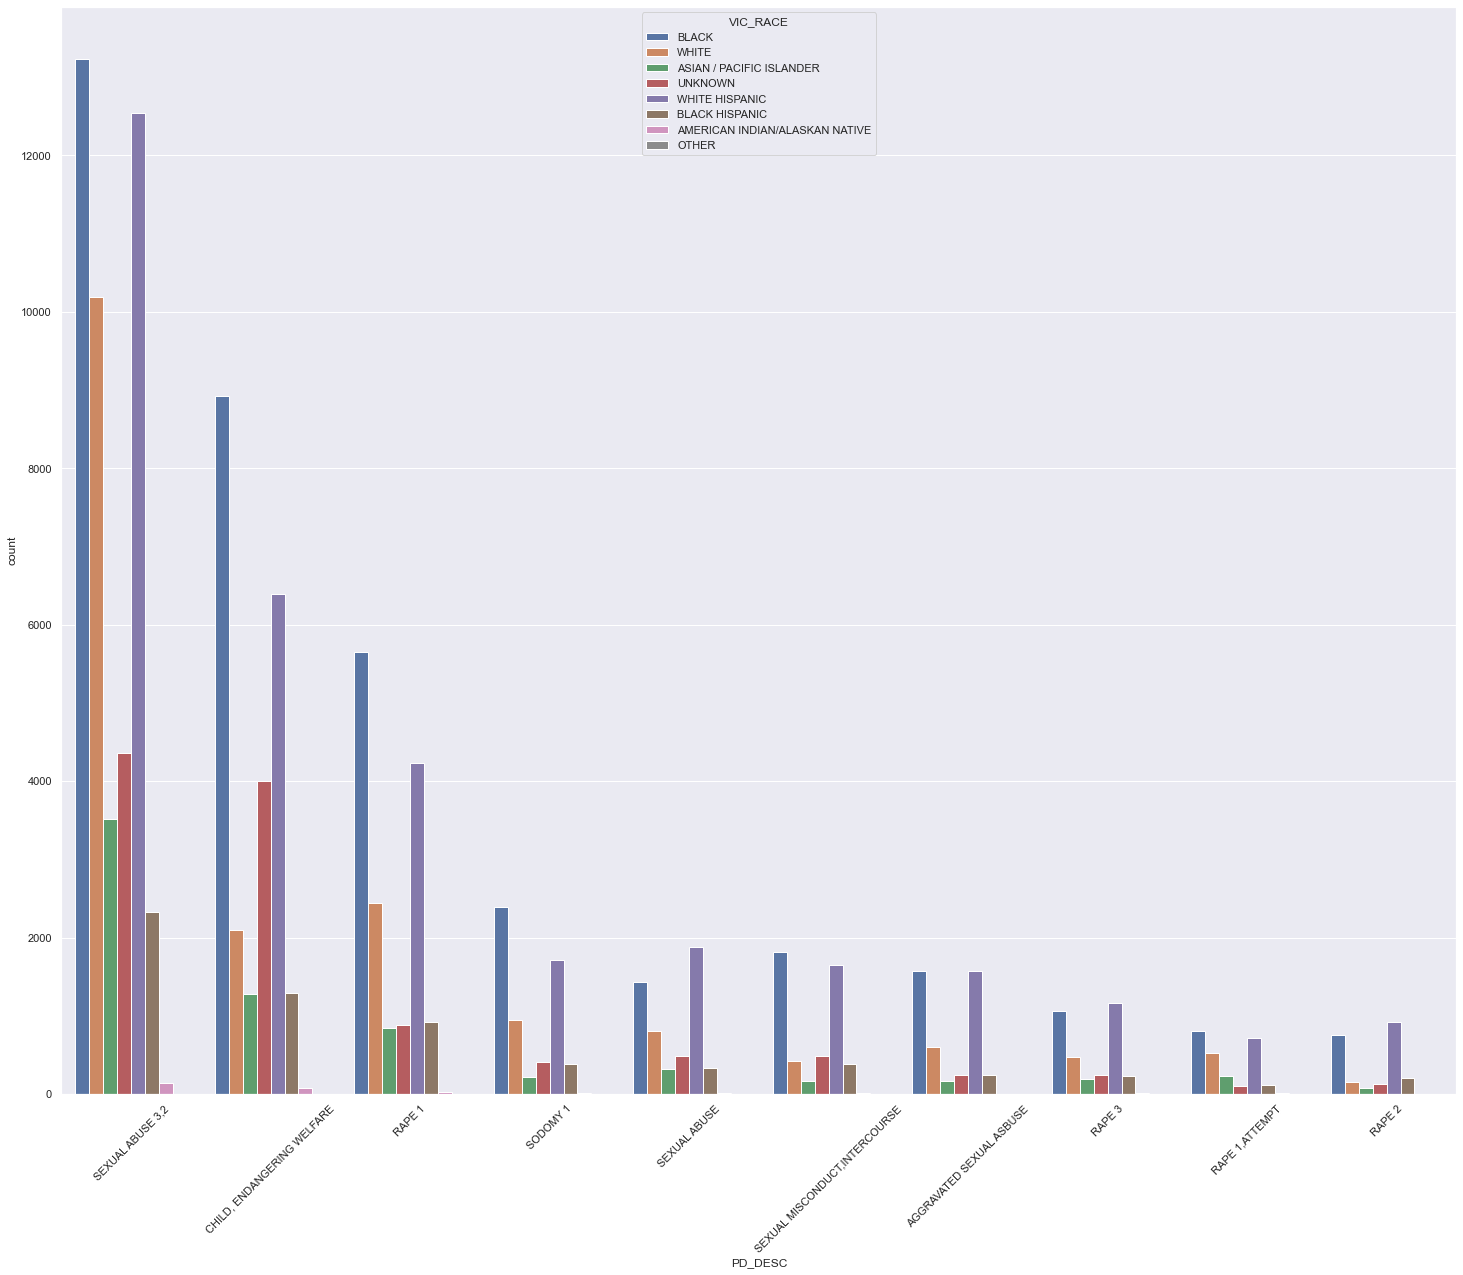

In [133]:
sns.countplot(data = df, hue = 'VIC_RACE', x = 'PD_DESC', order=pd.value_counts(df["PD_DESC"]).iloc[:10].index)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='CRM_ATPT_CPTD_CD', ylabel='count'>

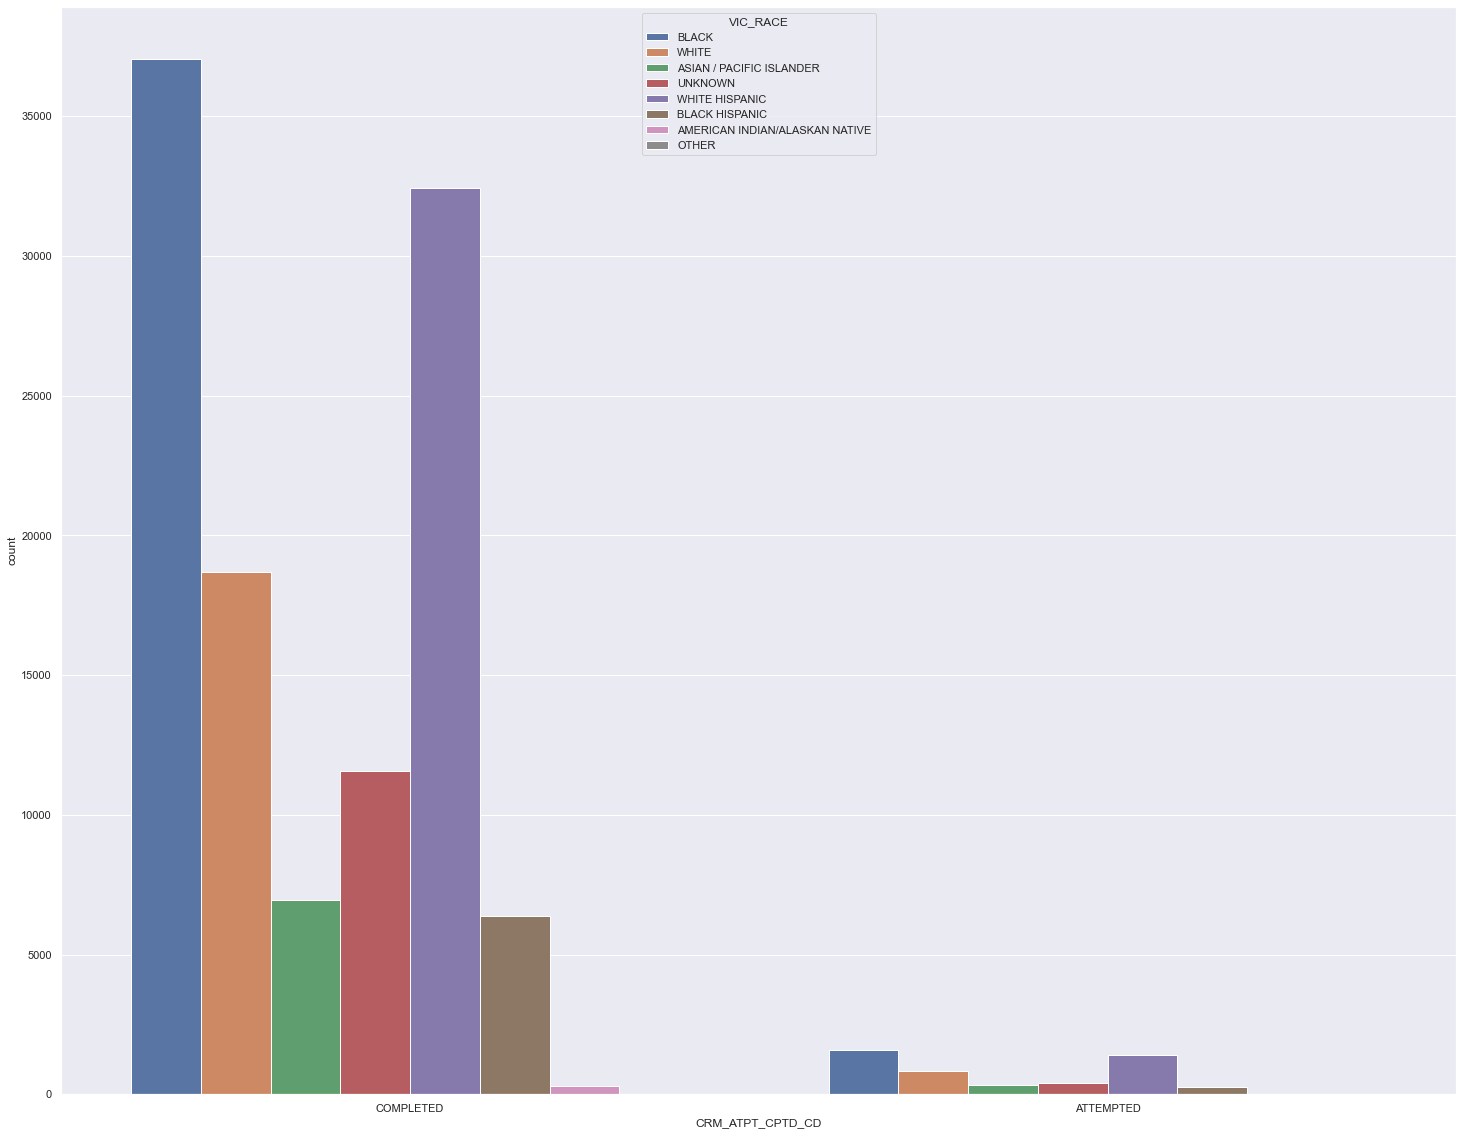

In [134]:
sns.countplot(data = df, hue = 'VIC_RACE', x = 'CRM_ATPT_CPTD_CD')

Completed crimes mostly have victims who identify as Black whereas attemped crimes are mostly have victims who identify as Black and White.

<AxesSubplot:xlabel='LAW_CAT_CD', ylabel='count'>

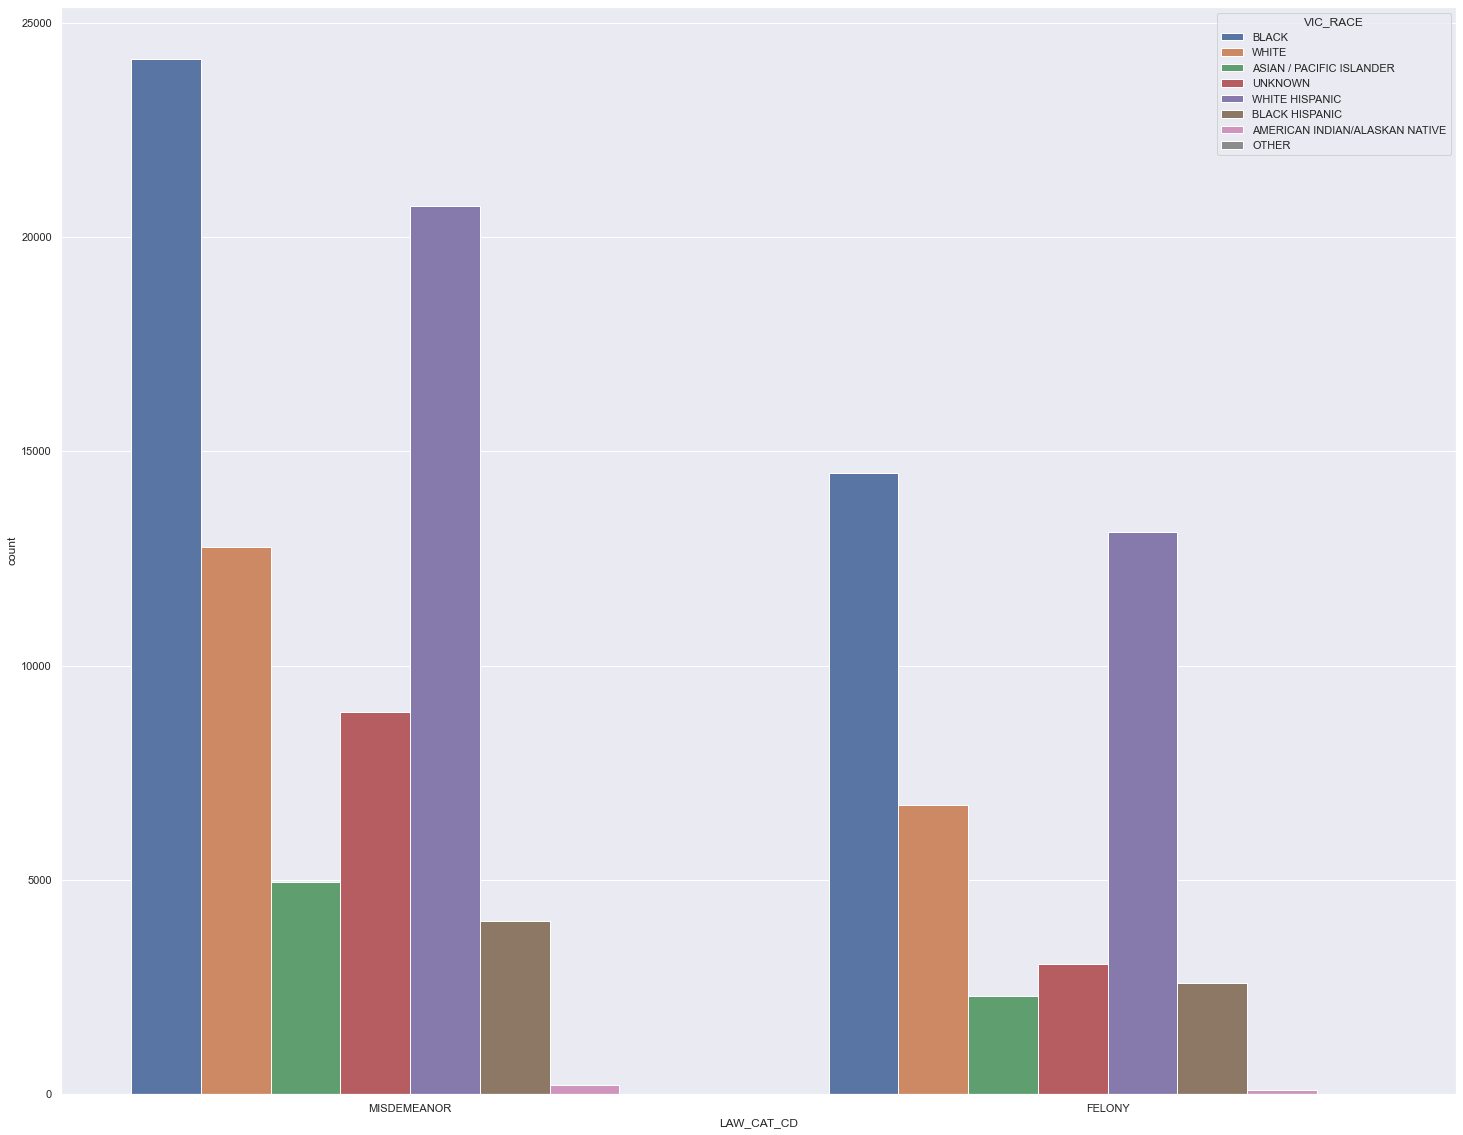

In [135]:
sns.countplot(data = df, hue = 'VIC_RACE', x = 'LAW_CAT_CD')

Both categories follow the same trend with respect to victim's race.

<AxesSubplot:xlabel='BORO_NM', ylabel='count'>

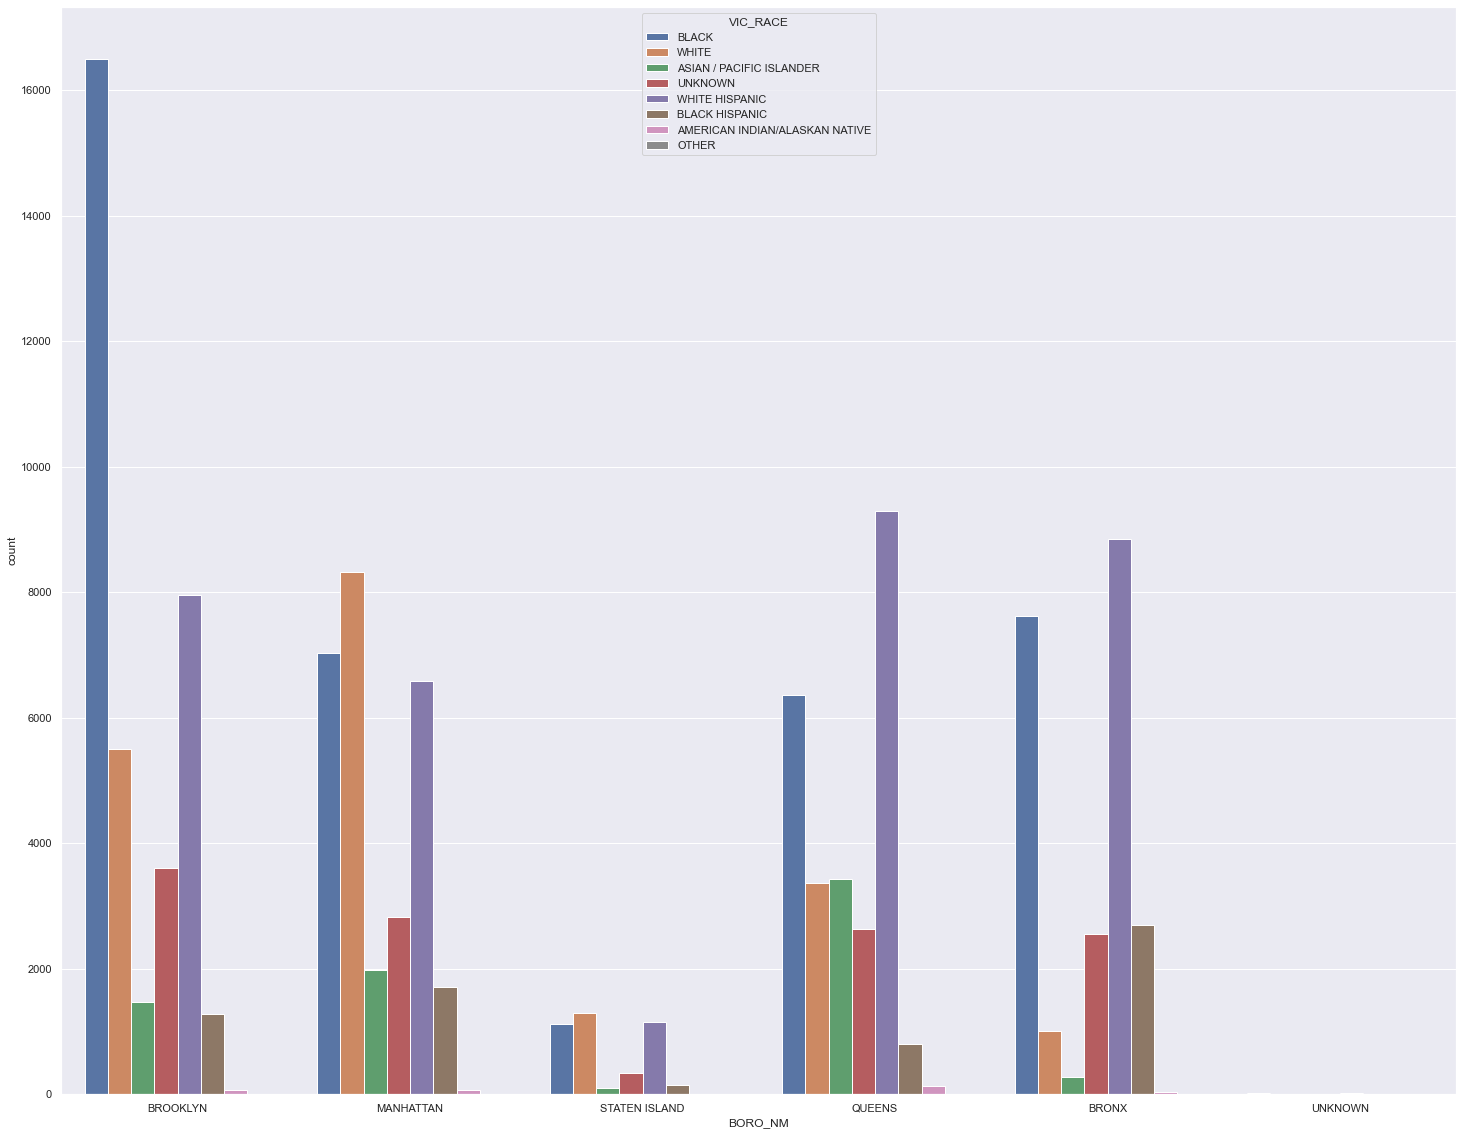

In [136]:
sns.countplot(data = df, hue = 'VIC_RACE', x = 'BORO_NM')

Brooklyn has maximum victims who identify as Black, Manhattan has maximum victims who identify as White, and Bronx and Queens has maximum victims who identify as White Hispanic.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'N.Y. POLICE DEPT'),
  Text(1, 0, 'N.Y. HOUSING POLICE'),
  Text(2, 0, 'N.Y. TRANSIT POLICE'),
  Text(3, 0, 'PORT AUTHORITY'),
  Text(4, 0, 'OTHER')])

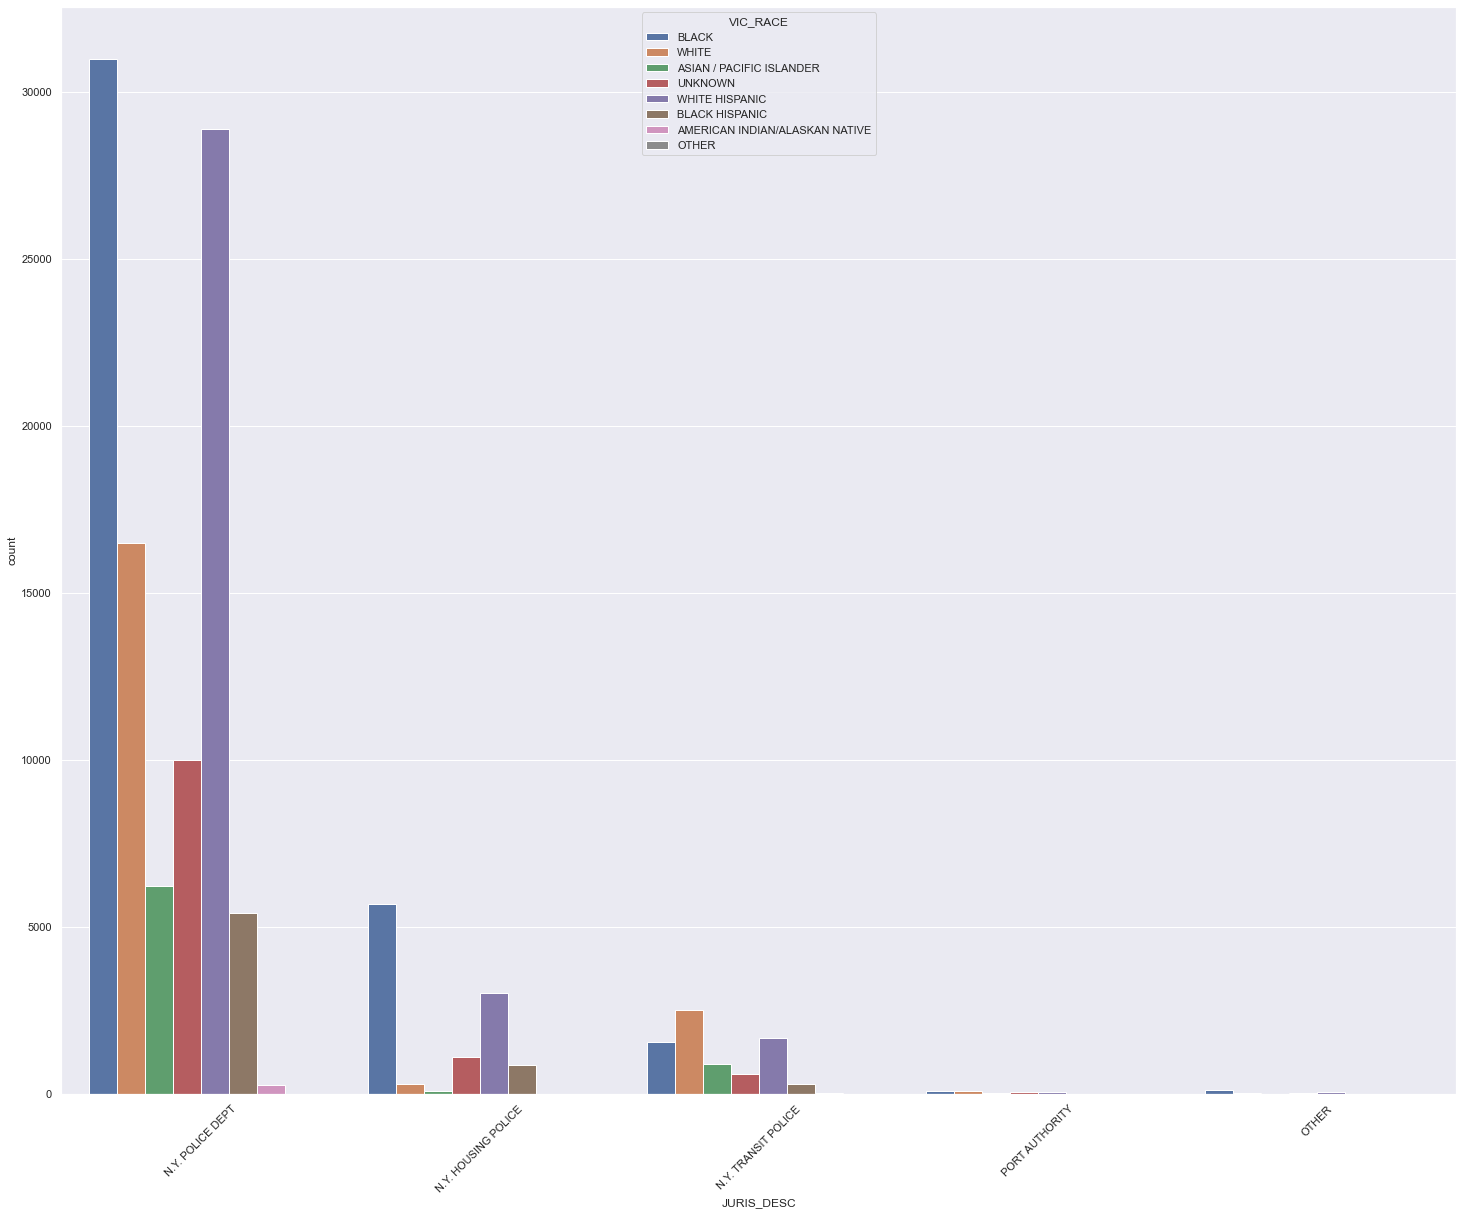

In [137]:
sns.countplot(data = df, hue = 'VIC_RACE', x = 'JURIS_DESC', order=pd.value_counts(df["JURIS_DESC"]).iloc[:5].index)
plt.xticks(rotation=45)

The NYPD has most suspects who identify as Black and White Hispanic. NY Transit Police has most suspects who identify as White.

<AxesSubplot:xlabel='SUSP_AGE_GROUP', ylabel='count'>

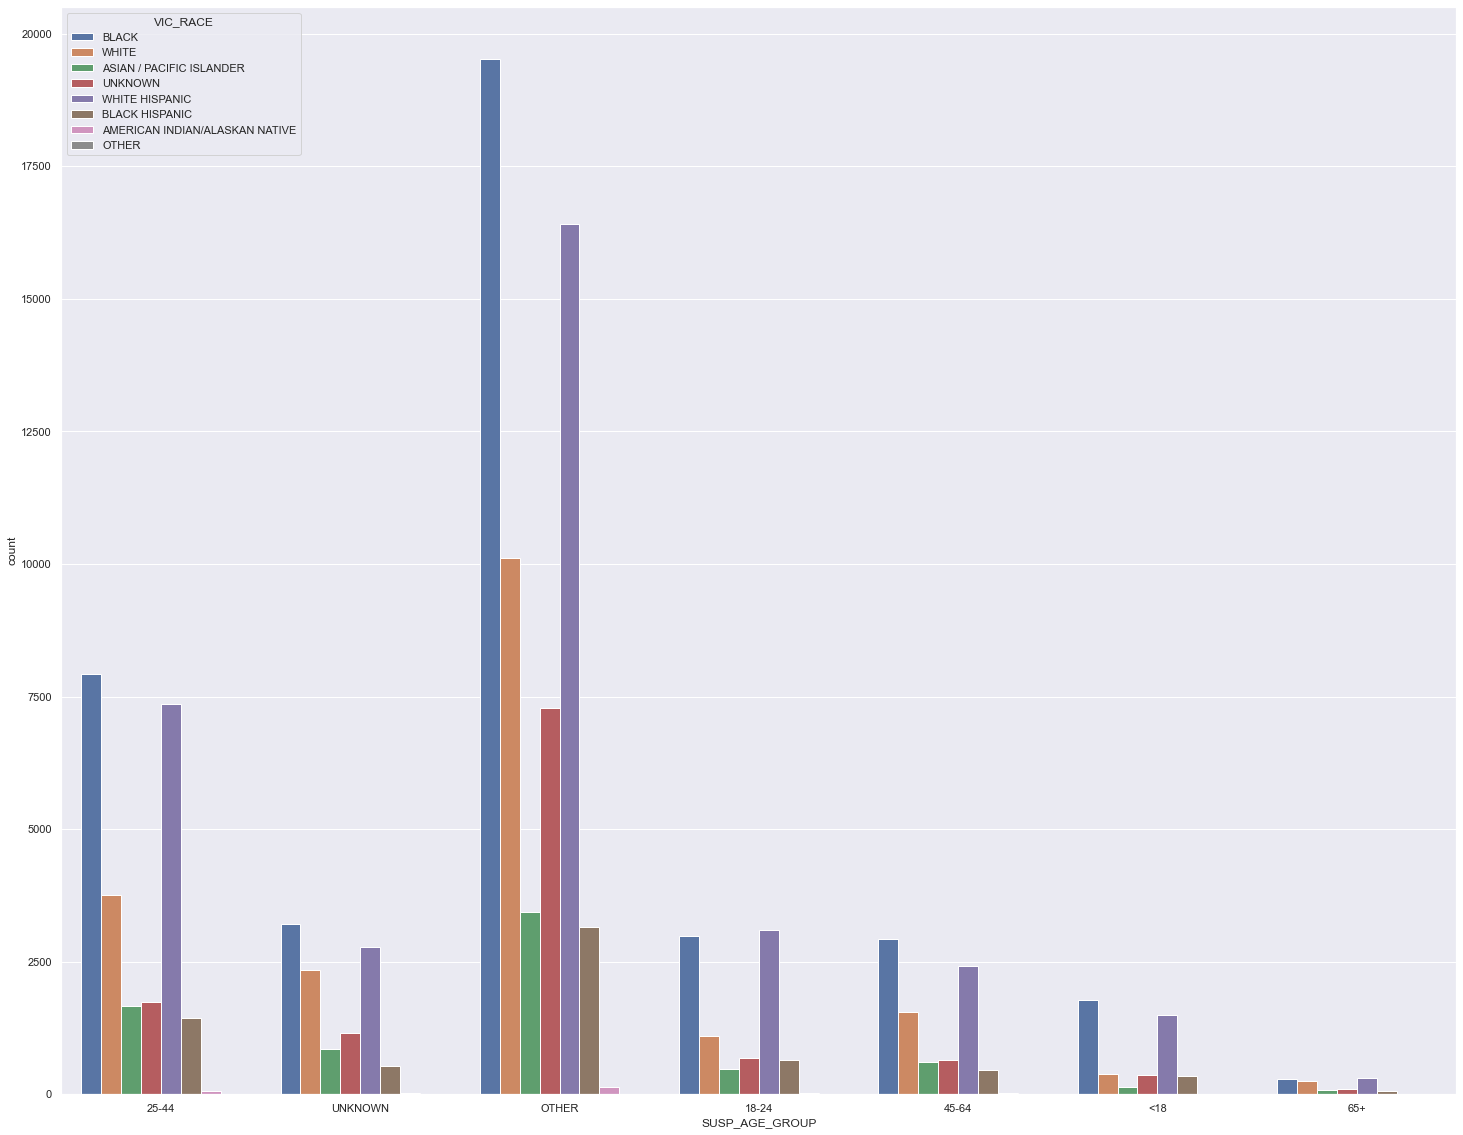

In [138]:
sns.countplot(data = df, hue = 'VIC_RACE', x = 'SUSP_AGE_GROUP')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'PATROL BORO BKLYN NORTH'),
  Text(1, 0, 'PATROL BORO MAN NORTH'),
  Text(2, 0, 'PATROL BORO STATEN ISLAND'),
  Text(3, 0, 'PATROL BORO QUEENS NORTH'),
  Text(4, 0, 'PATROL BORO MAN SOUTH'),
  Text(5, 0, 'PATROL BORO BRONX'),
  Text(6, 0, 'PATROL BORO BKLYN SOUTH'),
  Text(7, 0, 'PATROL BORO QUEENS SOUTH'),
  Text(8, 0, 'UNKNOWN')])

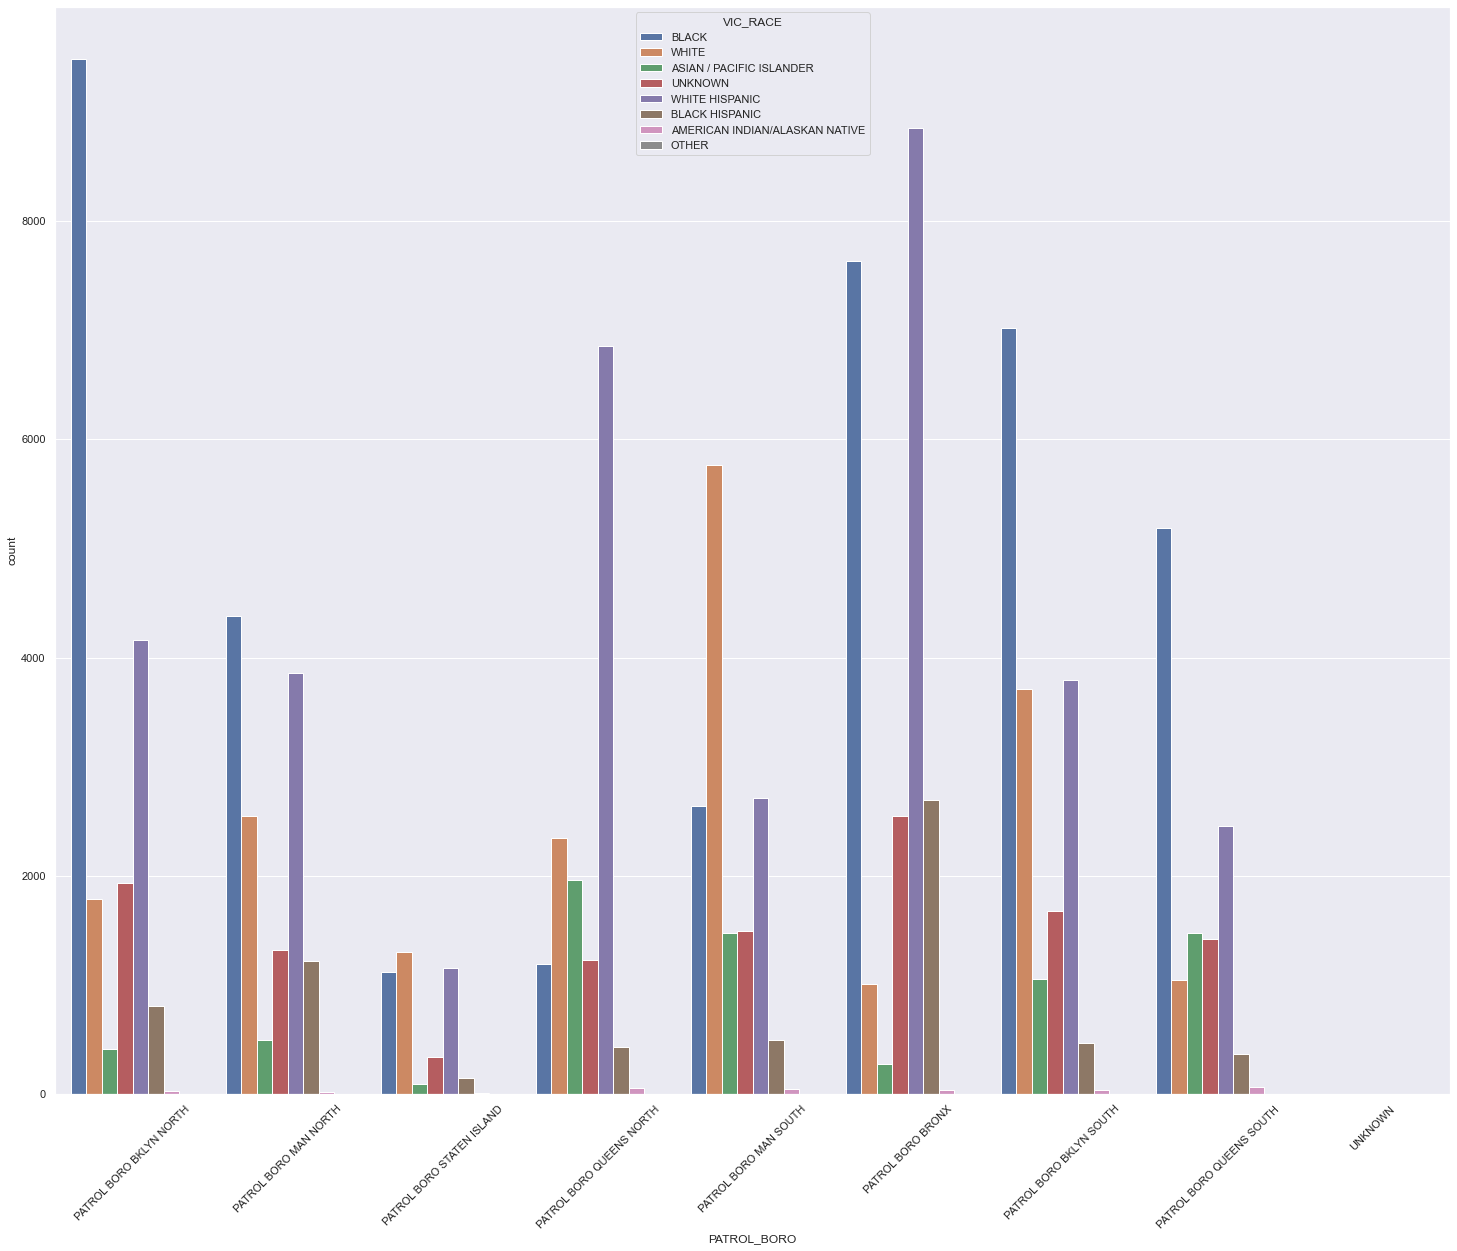

In [139]:
sns.countplot(data = df, hue = 'VIC_RACE', x = 'PATROL_BORO')
plt.xticks(rotation=45)

In Patrol Borough Brooklyn North, Manhattan North and Queens South most victims identify as Black, followed by White Hispanic. The maximum number of victims identify as White in Staten Island and Manhattan South. 

<AxesSubplot:xlabel='VIC_AGE_GROUP', ylabel='count'>

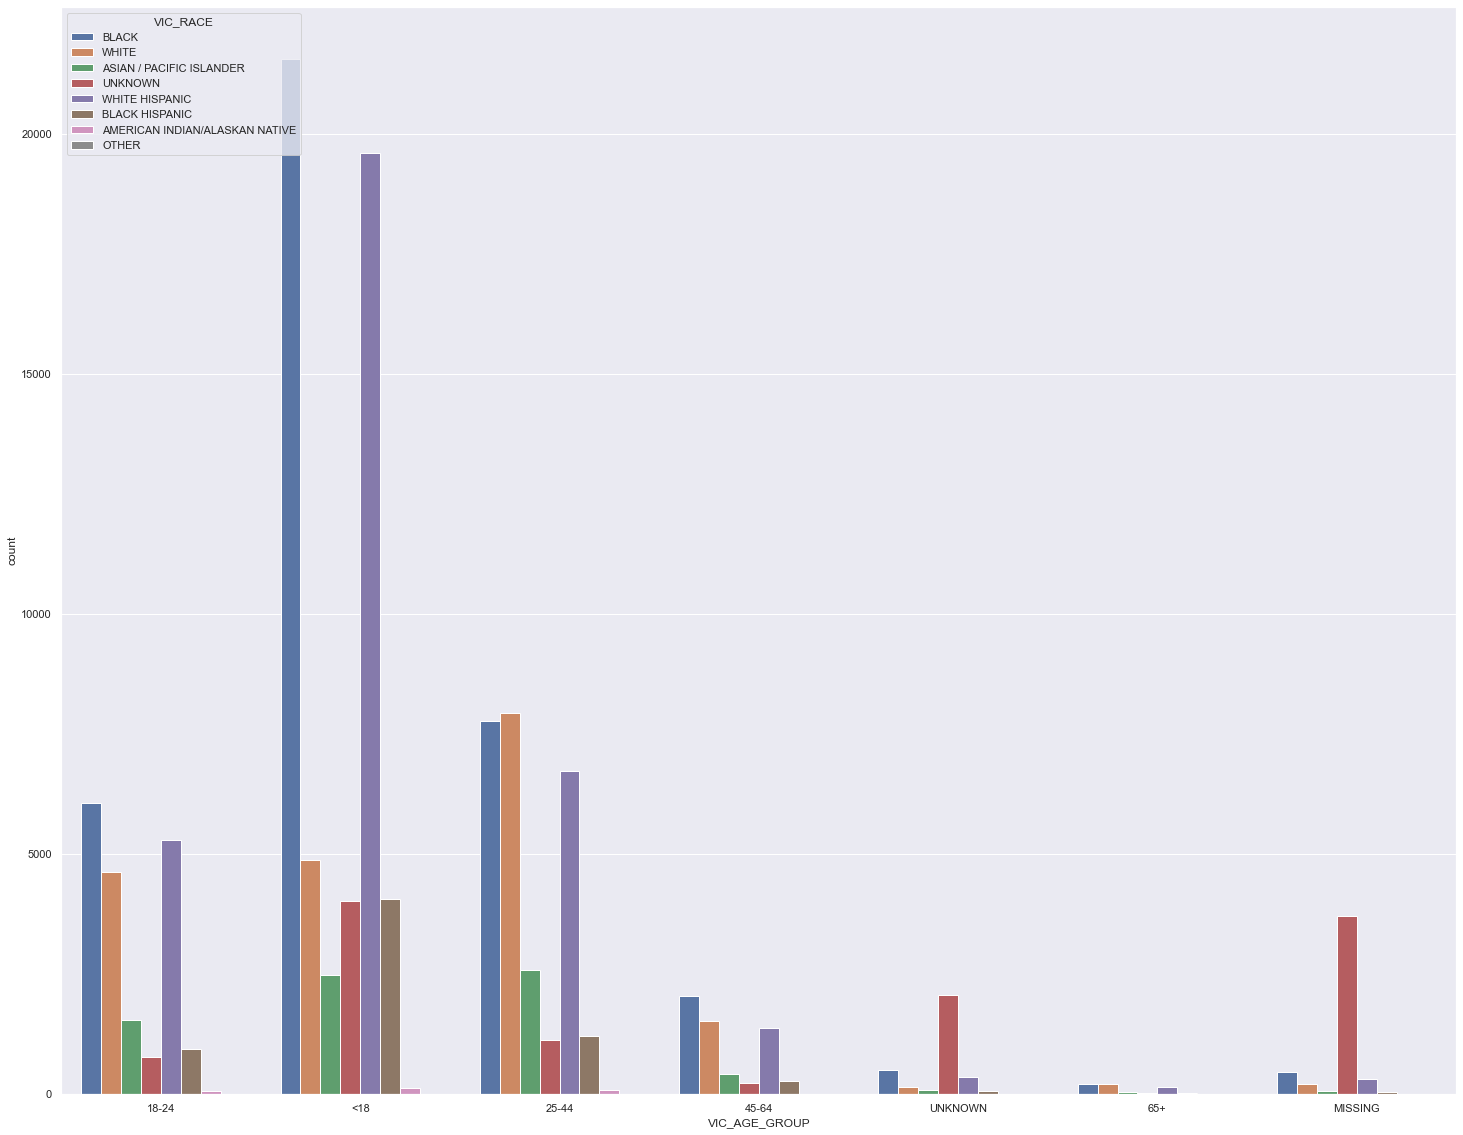

In [140]:
sns.countplot(data = df, hue = 'VIC_RACE', x = 'VIC_AGE_GROUP')

Victims under 18 years of age who experience sexual assault primarily identify as Black and White Hispanic. Victims who are between 18 and 44 identify as Black, White and White Hispanic. 

<AxesSubplot:xlabel='VIC_SEX', ylabel='count'>

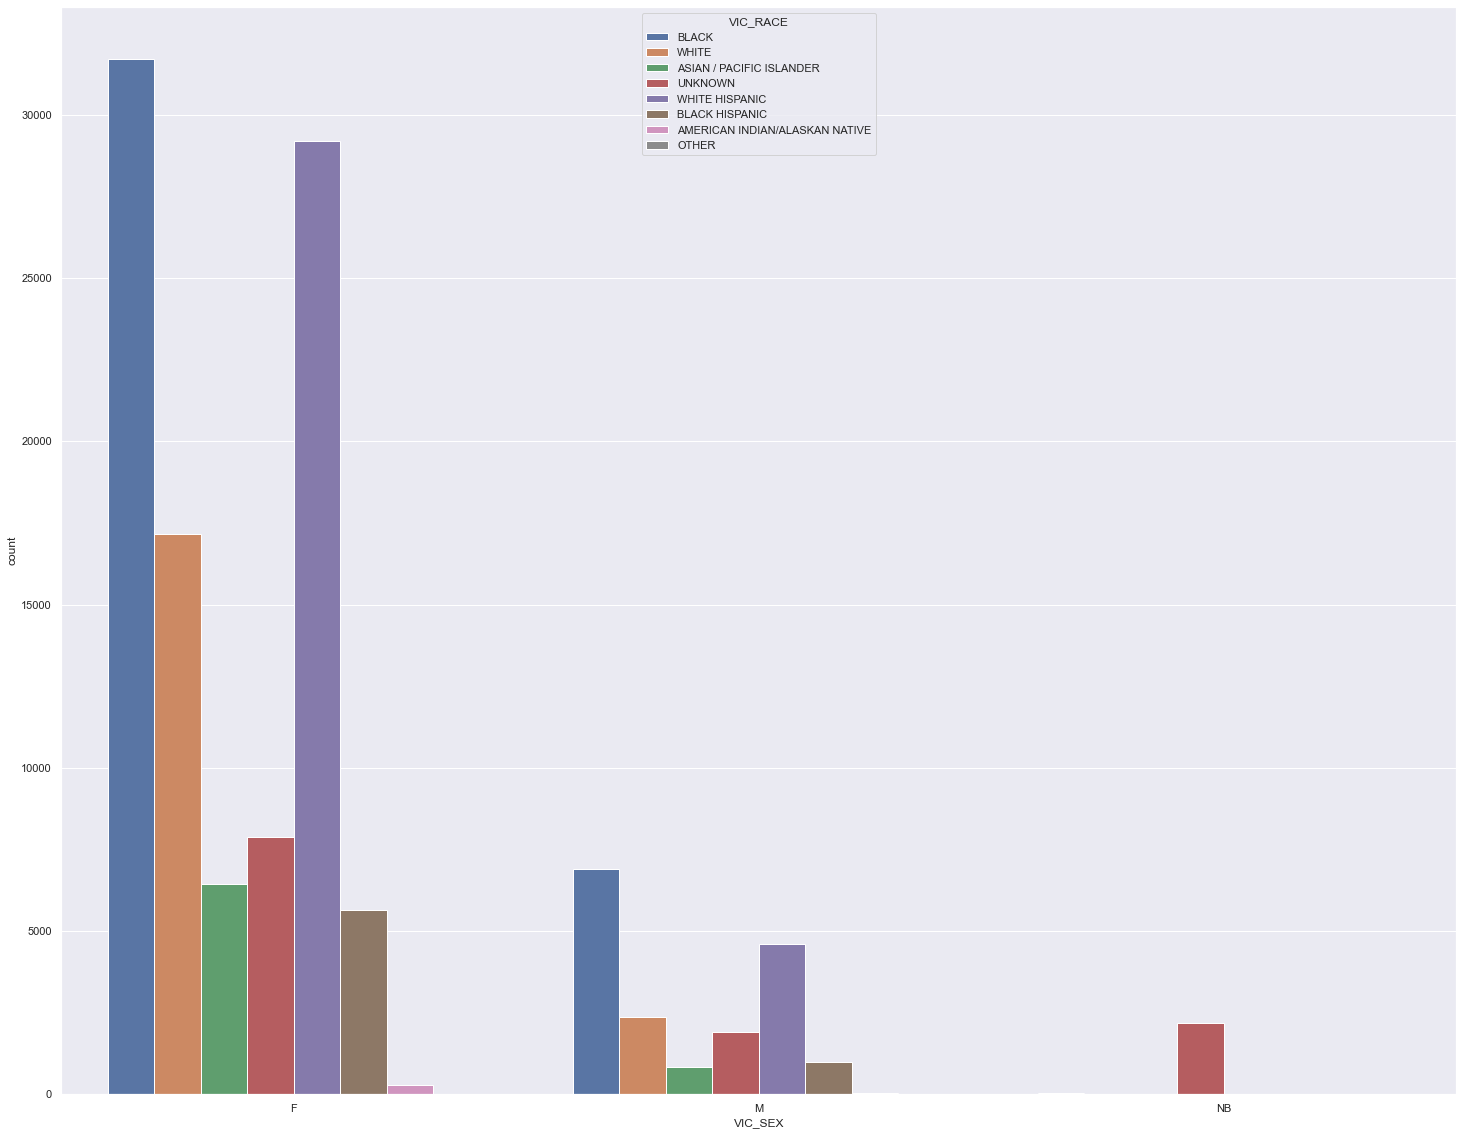

In [141]:
sns.countplot(data = df, hue = 'VIC_RACE', x = 'VIC_SEX')

The trend followed by victims race is constant for Male and Female. For non-binary victims, their race was not documented.

<AxesSubplot:xlabel='CRM_ATPT_CPTD_CD', ylabel='count'>

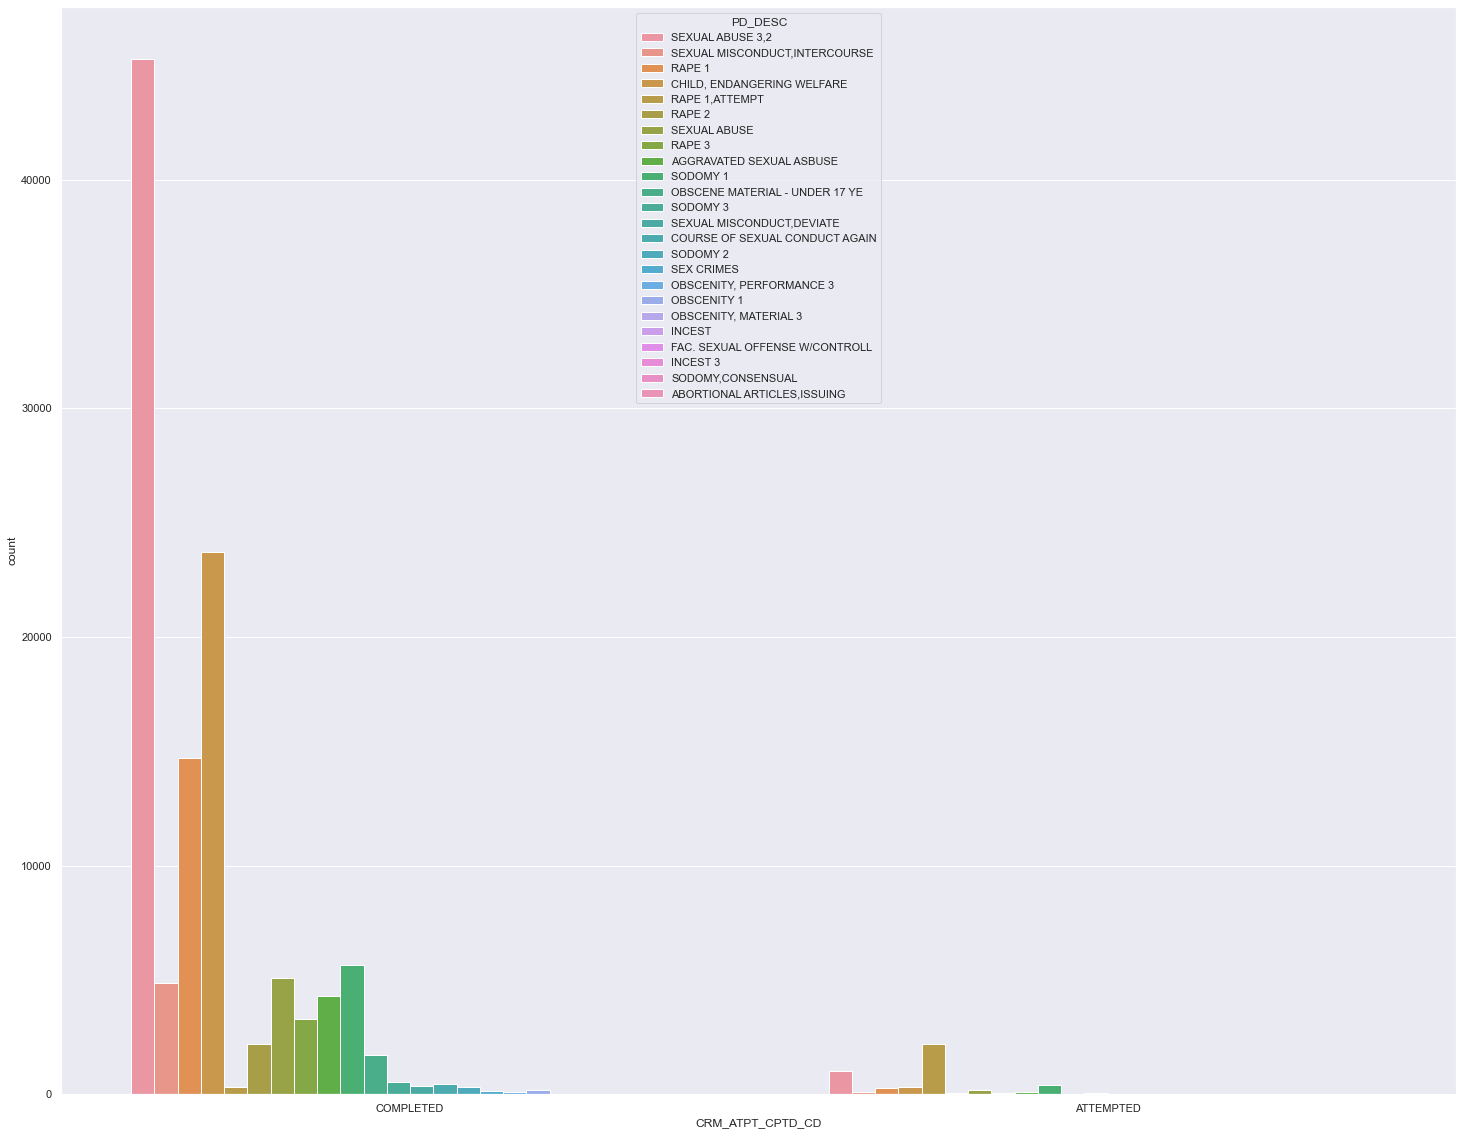

In [142]:
sns.countplot(data = df, hue = 'PD_DESC', x = 'CRM_ATPT_CPTD_CD')

Most attempted crimes were Rape 1 attempt followed by sexual abuse 3,2. Most of the completed crimes were Sexual Abuse followed by Child Endangering welfare and Rape 1.

<AxesSubplot:xlabel='LAW_CAT_CD', ylabel='count'>

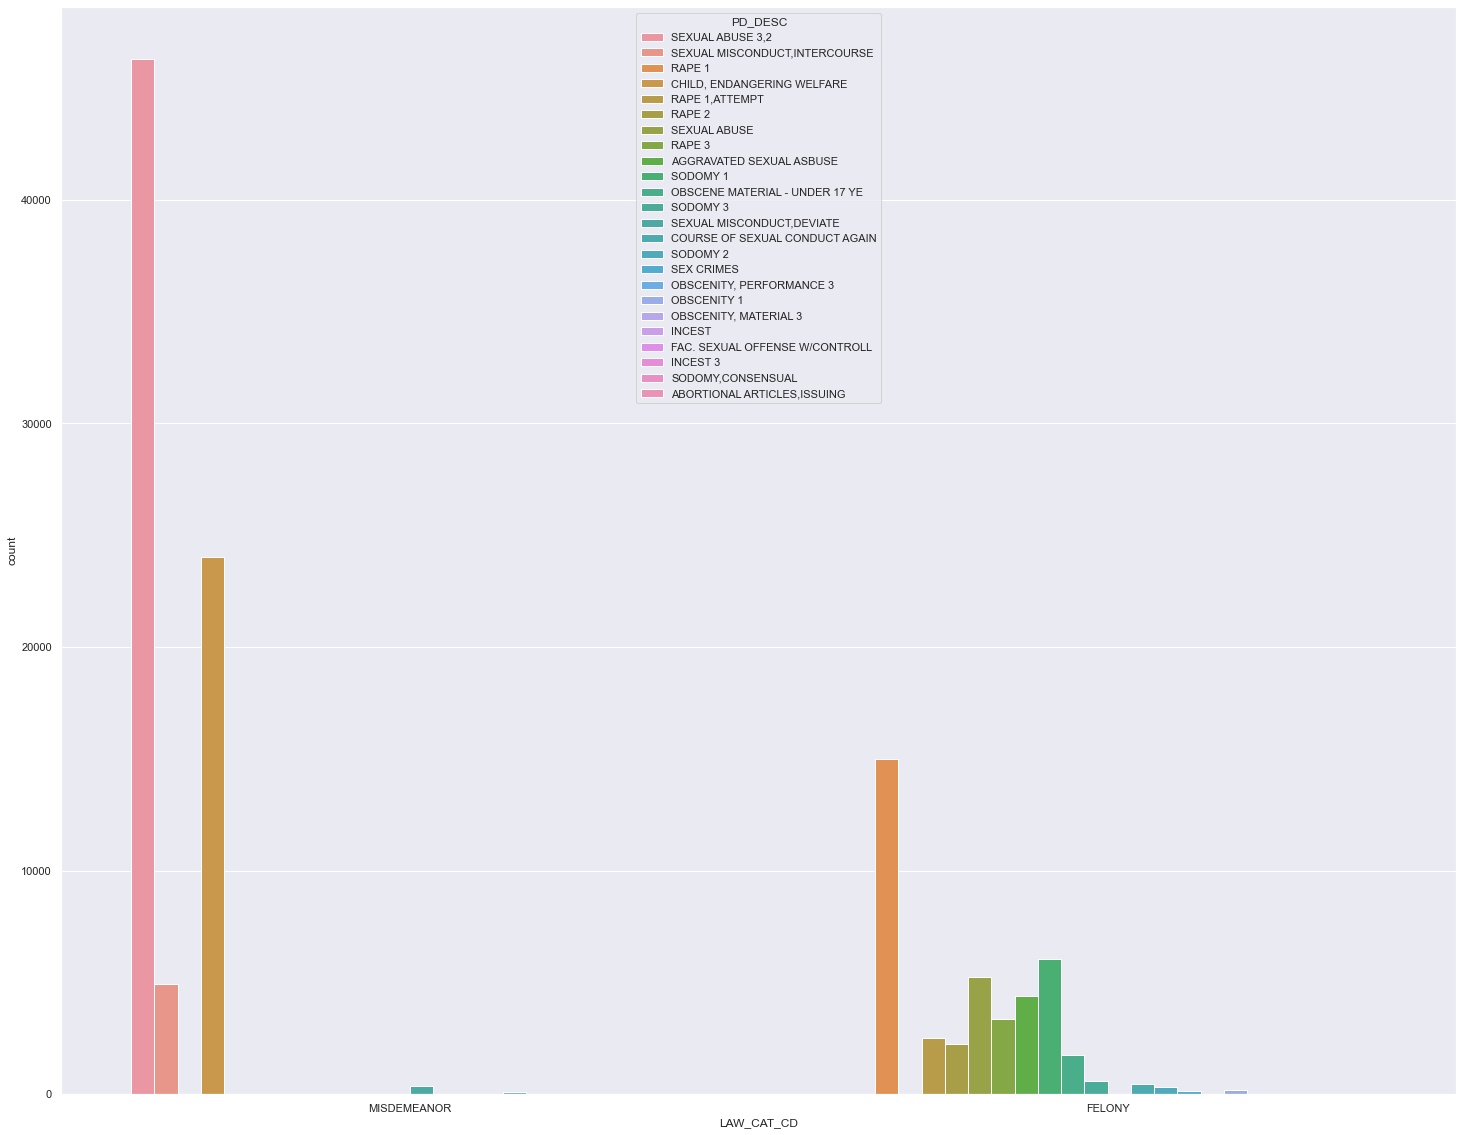

In [143]:
sns.countplot(data = df, hue = 'PD_DESC', x = 'LAW_CAT_CD')

Most misdemeanors are sexual abuse 3,2 followed by child endangering welfares. Most felonies are Rape 1.

<AxesSubplot:xlabel='PREM_TYP_DESC', ylabel='count'>

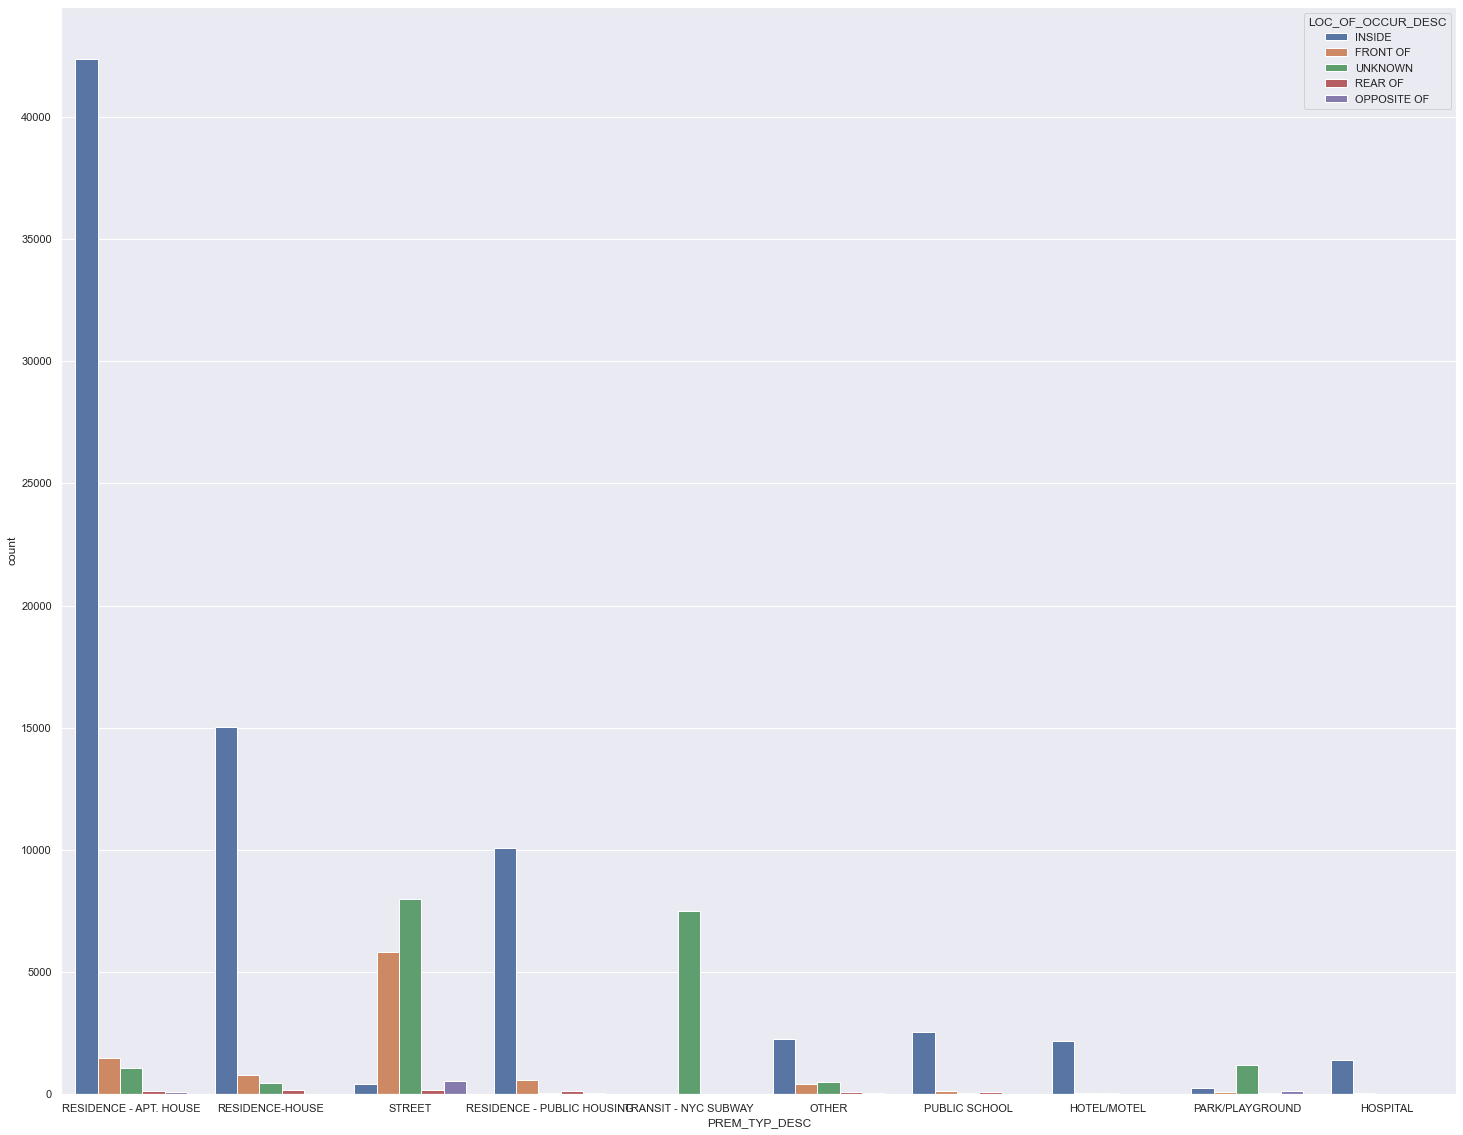

In [144]:
sns.countplot(data = df, hue = 'LOC_OF_OCCUR_DESC', x = 'PREM_TYP_DESC', order=pd.value_counts(df["PREM_TYP_DESC"]).iloc[:10].index)

Most crimes occur inside of apartment residences.